# Phase 1

# Video Game Sales Data with Ratings

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import researchpy as rp
import scipy.stats as stats
from scipy.stats import chi2_contingency
from datetime import datetime

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("videogame_sales.csv")
df = data.copy()

# Dataset Description
The chosen dataset is a comprehensive collection of sales figures for a variety of video games across multiple platforms. The dataset originates from user [Gregory Smith's](https://www.kaggle.com/gregorut) scrape of the website [vgchartz.com](https://www.vgchartz.com/), which contains the sales of various consoles and video games throughout the years. For the user and critique scores, its data is scraped from [Metacritic](https://www.metacritic.com/) by user [Rush Kirubi](https://www.kaggle.com/rush4ratio). 

## Data Collection Method Implications 
Scraped data may contain errors, missing values, or inaccuracies, depending on the quality of the website's content and the scraping process. Thus, cleaning and preprocessing this data is critical in order to ensure its accuracy. Another thing to consider is that websites can change over time, which may lead to inconsistencies or outdated information in the data if the scraping process is not updated regularly to account for these changes.

## Features Description
The dataset contains a total of 16 variables containing information on the release dates, genre, rating, publisher, total sales figure for each region, as well as the user and critique score. There are a total of 16719 rows of entries. Each row represents a video game title and its details. Each column represents the value of a given variable. 

Each variable represents the following: 
1. **Name**: The name/title of the video game.
2. **Platform**: The platform the game was released on.
3. **Year_of_Release**: The year the game came out.
4. **Genre**: The type or category of the game (e.g. Sports, Racing, Action, etc.).
5. **Publisher**: The company that published the game.
6. **NA_Sales**: How many copies were sold in North America (In millions).
7. **EU_Sales**: How many copies were sold in Europe (In millions).
8. **JP_Sales**: How many copies were sold in Japan (In millions).
9. **Other_Sales**: How many copies were sold in other regions outside of NA, EU, and Japan (In millions).
10. **Global_Sales**: The total worldwide sales of the game (In millions).
11. **Critic_Score**: A rating given by game critics, ranging from 0-100 with a one-place decimal precision 
12. **Critic_Count**: The number of critic reviews.
13. **User_Score**: A rating given by players, ranging from 0-10 with a one-place decimal precision 
14. **User_Count**: The number of player ratings.
15. **Developer**: The name/identity of the company or individuals responsible for creating the game
16. **Rating**: The game's ESRB Rating (e.g. Everyone, Teen, Adults, etc.), a content label that provides age and content guidelines. 

# Data Cleaning
First, we need to identify what variables in the dataset needs to be cleaned. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
df.head()

Name 
 Platform 
 Year_of_Release 
 Genre 
 Publisher 
 NA_Sales 
 EU_Sales 
 JP_Sales 
 Other_Sales 
 Global_Sales 
 Critic_Score 
 Critic_Count 
 User_Score 
 User_Count 
 Developer 
 Rating 
 
 
 
 
 0 
 Wii Sports 
 Wii 
 2006.0 
 Sports 
 Nintendo 
 41.36 
 28.96 
 3.77 
 8.45 
 82.53 
 76.0 
 51.0 
 8 
 322.0 
 Nintendo 
 E 
 
 
 1 
 Super Mario Bros. 
 NES 
 1985.0 
 Platform 
 Nintendo 
 29.08 
 3.58 
 6.81 
 0.77 
 40.24 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2 
 Mario Kart Wii 
 Wii 
 2008.0 
 Racing 
 Nintendo 
 15.68 
 12.76 
 3.79 
 3.29 
 35.52 
 82.0 
 73.0 
 8.3 
 709.0 
 Nintendo 
 E 
 
 
 3 
 Wii Sports Resort 
 Wii 
 2009.0 
 Sports 
 Nintendo 
 15.61 
 10.93 
 3.28 
 2.95 
 32.77 
 80.0 
 73.0 
 8 
 192.0 
 Nintendo 
 E 
 
 
 4 
 Pokemon Red/Pokemon Blue 
 GB 
 1996.0 
 Role-Playing 
 Nintendo 
 11.27 
 8.89 
 10.22 
 1.00 
 31.37 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN

We'll rename some of these columns to be more descriptive

In [6]:
df = df.rename(columns={"Year_of_Release": "Release_Year", 
                            "Rating": "ESRB_Rating"})

There seems to be some inconsistent data here, null values and non-unique values for fields that should be unique. Let's describe each column to see what we need to clean.

In [7]:
df.describe(include="all")

Name 
 Platform 
 Release_Year 
 Genre 
 Publisher 
 NA_Sales 
 EU_Sales 
 JP_Sales 
 Other_Sales 
 Global_Sales 
 Critic_Score 
 Critic_Count 
 User_Score 
 User_Count 
 Developer 
 ESRB_Rating 
 
 
 
 
 count 
 16717 
 16719 
 16450.000000 
 16717 
 16665 
 16719.000000 
 16719.000000 
 16719.000000 
 16719.000000 
 16719.000000 
 8137.000000 
 8137.000000 
 10015 
 7590.000000 
 10096 
 9950 
 
 
 unique 
 11562 
 31 
 NaN 
 12 
 581 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 96 
 NaN 
 1696 
 8 
 
 
 top 
 Need for Speed: Most Wanted 
 PS2 
 NaN 
 Action 
 Electronic Arts 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 tbd 
 NaN 
 Ubisoft 
 E 
 
 
 freq 
 12 
 2161 
 NaN 
 3370 
 1356 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 2425 
 NaN 
 204 
 3991 
 
 
 mean 
 NaN 
 NaN 
 2006.487356 
 NaN 
 NaN 
 0.263330 
 0.145025 
 0.077602 
 0.047332 
 0.533543 
 68.967679 
 26.360821 
 NaN 
 162.229908 
 NaN 
 NaN 
 
 
 std 
 NaN 
 NaN 
 5.878995 
 NaN 
 NaN 
 0.813514 
 0.503283 
 0.308818 
 0.186710 
 1.547935 
 13.938165 
 18.980495 
 NaN 
 561.282326 
 NaN 
 NaN 
 
 
 min 
 NaN 
 NaN 
 1980.000000 
 NaN 
 NaN 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.010000 
 13.000000 
 3.000000 
 NaN 
 4.000000 
 NaN 
 NaN 
 
 
 25% 
 NaN 
 NaN 
 2003.000000 
 NaN 
 NaN 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.060000 
 60.000000 
 12.000000 
 NaN 
 10.000000 
 NaN 
 NaN 
 
 
 50% 
 NaN 
 NaN 
 2007.000000 
 NaN 
 NaN 
 0.080000 
 0.020000 
 0.000000 
 0.010000 
 0.170000 
 71.000000 
 21.000000 
 NaN 
 24.000000 
 NaN 
 NaN 
 
 
 75% 
 NaN 
 NaN 
 2010.000000 
 NaN 
 NaN 
 0.240000 
 0.110000 
 0.040000 
 0.030000 
 0.470000 
 79.000000 
 36.000000 
 NaN 
 81.000000 
 NaN 
 NaN 
 
 
 max 
 NaN 
 NaN 
 2020.000000 
 NaN 
 NaN 
 41.360000 
 28.960000 
 10.220000 
 10.570000 
 82.530000 
 98.000000 
 113.000000 
 NaN 
 10665.000000 
 NaN 
 NaN

The top value in User_Score is "tbd", so basically nothing yet. We will mark it as so

In [8]:
df["User_Score"] = df["User_Score"].replace("tbd", np.nan)

It is also important to know how much missing values each column has

In [9]:
# Check for missing values
def check_missing_percentage():
    missing_values = df.isnull().sum()

    missing_percentage = (df.isnull().sum() / len(df)) * 100

    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage}).sort_values(by='Percentage (%)', ascending=False)

    print(missing_data)

check_missing_percentage()

              Missing Values  Percentage (%)
User_Score              9129       54.602548
User_Count              9129       54.602548
Critic_Score            8582       51.330821
Critic_Count            8582       51.330821
ESRB_Rating             6769       40.486871
Developer               6623       39.613613
Release_Year             269        1.608948
Publisher                 54        0.322986
Name                       2        0.011962
Genre                      2        0.011962
Platform                   0        0.000000
NA_Sales                   0        0.000000
EU_Sales                   0        0.000000
JP_Sales                   0        0.000000
Other_Sales                0        0.000000
Global_Sales               0        0.000000


That is a lot of missing values. It is important to look and analyze each feature of the dataset to know what proper data cleaning method must be done.

## Handling Missing Values

### Critic/User Scores & Counts
In the variables pertaining to critic score, critic count, user scores, and user count, over 50% is missing. The scores are one of the main features of this dataset, so we'll either have to drop rows with columns of these values missing, or find a workaround later on. We think that for now it is better to keep these rows as even what titles have missing scores can be an interesting exploratory data analysis topic.

### Missing Names, Genres, Publisher, and Year of Release
These variables have a small number of rows with missing data. Not to mention the rows without the game's name and genre does not feel like a valid row, and there are only two missing for both. The year of release seems important as we're planning on creating a lot of year-based correlations. The same can be said about the publisher, as this feels like a valuable continuous variable. Thus, dropping rows with the missing values given the variable will be done.

### Developer and ESRB Rating
While these variables also seem like they could be valuable categorical variables, there are a large number of rows that do not have them. That being said, we may still be able to use them in data analysis, so we'll keep these variables as null for now. 

In [10]:
df = df[df["Name"].notnull()]
df = df[df["Genre"].notnull()]
df = df[df["Publisher"].notnull()]
df = df[df["Release_Year"].notnull()]

check_missing_percentage()

              Missing Values  Percentage (%)
User_Score              8955       54.550439
User_Count              8955       54.550439
Critic_Score            8434       51.376706
Critic_Count            8434       51.376706
ESRB_Rating             6649       40.503168
Developer               6512       39.668616
Name                       0        0.000000
Platform                   0        0.000000
Release_Year               0        0.000000
Genre                      0        0.000000
Publisher                  0        0.000000
NA_Sales                   0        0.000000
EU_Sales                   0        0.000000
JP_Sales                   0        0.000000
Other_Sales                0        0.000000
Global_Sales               0        0.000000


## Fixing Inconsistent Data

### Fixing the Year of Release Data Type

Currently, the assigned datatype for the "Release_Year" is float. Since there are no years with decimals, it is better to convert it into an integer.

In [11]:
df['Release_Year'] = df['Release_Year'].astype(int)
df['Release_Year'].dtype

dtype('int64')

As mentioned before, this dataset was made in 2016 but there are game releases from 2017 onwards. It can be speculated that these games are future release dates of announced games but for the sake of the research, these games will be ommited.

In [12]:
df = df[df['Release_Year'] <= 2016]
df['Release_Year'].sort_values(ascending=False).unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984,
 1983, 1982, 1981, 1980])

### Name

The first thing we notice here is that there are repeating title names, why is that?

In [13]:
df.loc[df['Name'] == 'Need for Speed: Most Wanted']

Name 
 Platform 
 Release_Year 
 Genre 
 Publisher 
 NA_Sales 
 EU_Sales 
 JP_Sales 
 Other_Sales 
 Global_Sales 
 Critic_Score 
 Critic_Count 
 User_Score 
 User_Count 
 Developer 
 ESRB_Rating 
 
 
 
 
 253 
 Need for Speed: Most Wanted 
 PS2 
 2005 
 Racing 
 Electronic Arts 
 2.03 
 1.79 
 0.08 
 0.47 
 4.37 
 82.0 
 36.0 
 9.1 
 137.0 
 EA Canada 
 T 
 
 
 523 
 Need for Speed: Most Wanted 
 PS3 
 2012 
 Racing 
 Electronic Arts 
 0.71 
 1.46 
 0.06 
 0.58 
 2.81 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 1190 
 Need for Speed: Most Wanted 
 X360 
 2012 
 Racing 
 Electronic Arts 
 0.62 
 0.78 
 0.01 
 0.15 
 1.56 
 83.0 
 54.0 
 8.5 
 134.0 
 EA Canada 
 T 
 
 
 1591 
 Need for Speed: Most Wanted 
 X360 
 2005 
 Racing 
 Electronic Arts 
 1.00 
 0.13 
 0.02 
 0.10 
 1.25 
 83.0 
 54.0 
 8.5 
 134.0 
 EA Canada 
 T 
 
 
 1998 
 Need for Speed: Most Wanted 
 XB 
 2005 
 Racing 
 Electronic Arts 
 0.53 
 0.46 
 0.00 
 0.05 
 1.04 
 83.0 
 32.0 
 8.8 
 29.0 
 EA Canada 
 T 
 
 
 2048 
 Need for Speed: Most Wanted 
 PSV 
 2012 
 Racing 
 Electronic Arts 
 0.33 
 0.45 
 0.01 
 0.22 
 1.01 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 3581 
 Need for Speed: Most Wanted 
 GC 
 2005 
 Racing 
 Electronic Arts 
 0.43 
 0.11 
 0.00 
 0.02 
 0.56 
 80.0 
 18.0 
 9.1 
 22.0 
 EA Canada 
 T 
 
 
 5973 
 Need for Speed: Most Wanted 
 PC 
 2005 
 Racing 
 Electronic Arts 
 0.02 
 0.23 
 0.00 
 0.04 
 0.29 
 82.0 
 19.0 
 8.5 
 525.0 
 Black Box 
 T 
 
 
 6274 
 Need for Speed: Most Wanted 
 WiiU 
 2013 
 Racing 
 Electronic Arts 
 0.13 
 0.12 
 0.00 
 0.02 
 0.27 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 6411 
 Need for Speed: Most Wanted 
 DS 
 2005 
 Racing 
 Electronic Arts 
 0.24 
 0.01 
 0.00 
 0.02 
 0.27 
 45.0 
 4.0 
 6.1 
 22.0 
 EA Canada 
 E 
 
 
 6474 
 Need for Speed: Most Wanted 
 GBA 
 2005 
 Racing 
 Electronic Arts 
 0.19 
 0.07 
 0.00 
 0.00 
 0.26 
 NaN 
 NaN 
 8.3 
 14.0 
 EA Canada 
 E 
 
 
 11716 
 Need for Speed: Most Wanted 
 PC 
 2012 
 Racing 
 Electronic Arts 
 0.00 
 0.06 
 0.00 
 0.02 
 0.08 
 82.0 
 19.0 
 8.5 
 525.0 
 Black Box 
 T

We find out that it is because there are some titles that are released for multiple platforms, and their ratings and sales are separate. Separating ratings by platform makes sense as the experience of a game may change from platform to platform, so we'll add the platform the game is released into the Name to uniquely identify them.

In [14]:
#Change all non-unique titles with the Name format of: Name - Platform, Year_of_Release
non_unique_titles = df['Name'].duplicated(keep=False)
df.loc[non_unique_titles, 'Name'] = df[non_unique_titles].apply(lambda row: f"{row['Name']} - {row['Platform']}, {row['Release_Year']}", axis=1)
df

Name 
 Platform 
 Release_Year 
 Genre 
 Publisher 
 NA_Sales 
 EU_Sales 
 JP_Sales 
 Other_Sales 
 Global_Sales 
 Critic_Score 
 Critic_Count 
 User_Score 
 User_Count 
 Developer 
 ESRB_Rating 
 
 
 
 
 0 
 Wii Sports 
 Wii 
 2006 
 Sports 
 Nintendo 
 41.36 
 28.96 
 3.77 
 8.45 
 82.53 
 76.0 
 51.0 
 8 
 322.0 
 Nintendo 
 E 
 
 
 1 
 Super Mario Bros. - NES, 1985 
 NES 
 1985 
 Platform 
 Nintendo 
 29.08 
 3.58 
 6.81 
 0.77 
 40.24 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2 
 Mario Kart Wii 
 Wii 
 2008 
 Racing 
 Nintendo 
 15.68 
 12.76 
 3.79 
 3.29 
 35.52 
 82.0 
 73.0 
 8.3 
 709.0 
 Nintendo 
 E 
 
 
 3 
 Wii Sports Resort 
 Wii 
 2009 
 Sports 
 Nintendo 
 15.61 
 10.93 
 3.28 
 2.95 
 32.77 
 80.0 
 73.0 
 8 
 192.0 
 Nintendo 
 E 
 
 
 4 
 Pokemon Red/Pokemon Blue 
 GB 
 1996 
 Role-Playing 
 Nintendo 
 11.27 
 8.89 
 10.22 
 1.00 
 31.37 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 16714 
 Samurai Warriors: Sanada Maru - PS3, 2016 
 PS3 
 2016 
 Action 
 Tecmo Koei 
 0.00 
 0.00 
 0.01 
 0.00 
 0.01 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 16715 
 LMA Manager 2007 
 X360 
 2006 
 Sports 
 Codemasters 
 0.00 
 0.01 
 0.00 
 0.00 
 0.01 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 16716 
 Haitaka no Psychedelica 
 PSV 
 2016 
 Adventure 
 Idea Factory 
 0.00 
 0.00 
 0.01 
 0.00 
 0.01 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 16717 
 Spirits & Spells - GBA, 2003 
 GBA 
 2003 
 Platform 
 Wanadoo 
 0.01 
 0.00 
 0.00 
 0.00 
 0.01 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 16718 
 Winning Post 8 2016 - PSV, 2016 
 PSV 
 2016 
 Simulation 
 Tecmo Koei 
 0.00 
 0.00 
 0.01 
 0.00 
 0.01 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 
 16412 rows × 16 columns

In [15]:
df["Name"].describe()

count 16412
unique 16411
top Madden NFL 13 - PS3, 2012
freq 2
Name: Name, dtype: object

It seems like there is still an existing non-unique value, let's explore this

In [16]:
df[df["Name"].duplicated(keep=False)]

Name 
 Platform 
 Release_Year 
 Genre 
 Publisher 
 NA_Sales 
 EU_Sales 
 JP_Sales 
 Other_Sales 
 Global_Sales 
 Critic_Score 
 Critic_Count 
 User_Score 
 User_Count 
 Developer 
 ESRB_Rating 
 
 
 
 
 604 
 Madden NFL 13 - PS3, 2012 
 PS3 
 2012 
 Sports 
 Electronic Arts 
 2.11 
 0.22 
 0.0 
 0.23 
 2.56 
 83.0 
 22.0 
 5.5 
 101.0 
 EA Tiburon 
 E 
 
 
 16233 
 Madden NFL 13 - PS3, 2012 
 PS3 
 2012 
 Sports 
 Electronic Arts 
 0.00 
 0.01 
 0.0 
 0.00 
 0.01 
 83.0 
 22.0 
 5.5 
 101.0 
 EA Tiburon 
 E

It seems that in the dataset, the game Madden NFL 13 has a duplicated entry for the PS3 platform, let us delete the entry with the least sales.

In [17]:
df = df.drop(16233)
df[df["Name"].duplicated(keep=False)]

Name 
 Platform 
 Release_Year 
 Genre 
 Publisher 
 NA_Sales 
 EU_Sales 
 JP_Sales 
 Other_Sales 
 Global_Sales 
 Critic_Score 
 Critic_Count 
 User_Score 
 User_Count 
 Developer 
 ESRB_Rating

### Making Sure Total Sales are Accurate

In [18]:
df_copy = df.copy()
df_copy['Sum Sales'] = round(df_copy["NA_Sales"] + df_copy["EU_Sales"] + df_copy["JP_Sales"] + df_copy["Other_Sales"],2) 
df_copy['Sum Match?'] = np.where(df_copy['Sum Sales'] == df_copy['Global_Sales'], 0, df_copy['Sum Sales'] - df_copy['Global_Sales'])

df_copy[['Name','Global_Sales', 'Sum Sales', 'Sum Match?']].loc[(df_copy['Sum Match?'] <= -1) | (df_copy['Sum Match?'] >= 1)]

Name 
 Global_Sales 
 Sum Sales 
 Sum Match?

There are no results for matches that include have a <= -1 or => 1 sale inaccuracy, so they are indeed accurate. 

### User and Critic Scores
It seems that users and critics score on different scales. To circumvent this, we can either scale the user score up or scale the critic score down. For simplicity and to not lose any information or precision of scores, it is best to scale up user scores. We will also change the datatype of User_Score to float64 as it is currently a String type

In [19]:
df['User_Score'] = df.loc[df['User_Score'].notnull(), 'User_Score'].astype(float) * 10 
df[['User_Score', 'Critic_Score']].head(10)

User_Score 
 Critic_Score 
 
 
 
 
 0 
 80.0 
 76.0 
 
 
 1 
 NaN 
 NaN 
 
 
 2 
 83.0 
 82.0 
 
 
 3 
 80.0 
 80.0 
 
 
 4 
 NaN 
 NaN 
 
 
 5 
 NaN 
 NaN 
 
 
 6 
 85.0 
 89.0 
 
 
 7 
 66.0 
 58.0 
 
 
 8 
 84.0 
 87.0 
 
 
 9 
 NaN 
 NaN

## Grouping Data & Adding New Variables
Some of these columns have too many different inputs that we can possibly clean. Better grouped variables and more variables and general also won't hurt in finding correlations. 

### ESRB Ratings
There are some ratings that are equivalent to other ratings, we can merge some of the lower value variables into the higher value ones to reduce variables

EC (early childhood and above) -> E (Everyone)

K-A (Kids to Adults)           -> E (Everyone) 

AO (Adults Only)               -> M (Mature)  

Games with no ratings will be marked as RP (No Rating/Rating Pending)

In [20]:
df['ESRB_Rating'] = df['ESRB_Rating'].replace({'EC' : 'E', 'K-A':'E', 'AO' : 'M'})
df['ESRB_Rating'] = df['ESRB_Rating'].fillna('RP')

df['ESRB_Rating'].value_counts()

RP 6647
E 3930
T 2904
M 1537
E10+ 1393
Name: ESRB_Rating, dtype: int64

### Platforms
There are too many different platforms, and most of them represent a very small percent of games, we can group most of these more generally by either their platform family company or by their platform type. We'll put both of these new columns. 

In [21]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
 'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
 'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
 '3DO', 'GG', 'PCFX'], dtype=object)

In [22]:
def get_group_label(x, groups=None):
    if groups is None:
        return "Other"
    else:
        for key, val in groups.items():
            if x in val:
                return key
        return "Other"
    
platforms_by_family = {"Playstation" : ["PS", "PSP", "PSV", "PS2", "PS3", "PS4"],
             "Xbox" : ["XB", "X360", "XOne"], 
             "PC" : ["PC"],
             "Nintendo" : ["NES", "GC", "DS", "3DS", "GB", "GBA", "Wii", "WiiU"]
            }
    
df["Platform_Family"] = df["Platform"].apply(lambda x: get_group_label(x, groups=platforms_by_family))


platforms_by_type = {
             "Console" : ["PS", "PS2", "PS3", "PS4", "XB", "X360", "XOne", "NES", "Wii", "WiiU"], 
             "PC" : ["PC"],
             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]
            }
    
df["Platform_Type"] = df["Platform"].apply(lambda x: get_group_label(x, groups=platforms_by_type))

print("Family Count")
print(df['Platform_Family'].value_counts())
print()
print("Type Count")
print(df['Platform_Type'].value_counts())

Family Count
Playstation    6634
Nintendo       5589
Xbox           2282
Other           954
PC              952
Name: Platform_Family, dtype: int64

Type Count
Console     8827
Portable    5678
Other        954
PC           952
Name: Platform_Type, dtype: int64


## Saving the cleaned dataset
For the purpose of the research we will about to do subsequent sections, the dataset is considered clean. Certain features that have missing features will not be dropped for the purpose of Exploratory Data Analysis.

In [23]:
df.to_csv("cleaned_videogame_sales.csv", index=True)
df

Name 
 Platform 
 Release_Year 
 Genre 
 Publisher 
 NA_Sales 
 EU_Sales 
 JP_Sales 
 Other_Sales 
 Global_Sales 
 Critic_Score 
 Critic_Count 
 User_Score 
 User_Count 
 Developer 
 ESRB_Rating 
 Platform_Family 
 Platform_Type 
 
 
 
 
 0 
 Wii Sports 
 Wii 
 2006 
 Sports 
 Nintendo 
 41.36 
 28.96 
 3.77 
 8.45 
 82.53 
 76.0 
 51.0 
 80.0 
 322.0 
 Nintendo 
 E 
 Nintendo 
 Console 
 
 
 1 
 Super Mario Bros. - NES, 1985 
 NES 
 1985 
 Platform 
 Nintendo 
 29.08 
 3.58 
 6.81 
 0.77 
 40.24 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 RP 
 Nintendo 
 Console 
 
 
 2 
 Mario Kart Wii 
 Wii 
 2008 
 Racing 
 Nintendo 
 15.68 
 12.76 
 3.79 
 3.29 
 35.52 
 82.0 
 73.0 
 83.0 
 709.0 
 Nintendo 
 E 
 Nintendo 
 Console 
 
 
 3 
 Wii Sports Resort 
 Wii 
 2009 
 Sports 
 Nintendo 
 15.61 
 10.93 
 3.28 
 2.95 
 32.77 
 80.0 
 73.0 
 80.0 
 192.0 
 Nintendo 
 E 
 Nintendo 
 Console 
 
 
 4 
 Pokemon Red/Pokemon Blue 
 GB 
 1996 
 Role-Playing 
 Nintendo 
 11.27 
 8.89 
 10.22 
 1.00 
 31.37 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 RP 
 Nintendo 
 Portable 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 16714 
 Samurai Warriors: Sanada Maru - PS3, 2016 
 PS3 
 2016 
 Action 
 Tecmo Koei 
 0.00 
 0.00 
 0.01 
 0.00 
 0.01 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 RP 
 Playstation 
 Console 
 
 
 16715 
 LMA Manager 2007 
 X360 
 2006 
 Sports 
 Codemasters 
 0.00 
 0.01 
 0.00 
 0.00 
 0.01 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 RP 
 Xbox 
 Console 
 
 
 16716 
 Haitaka no Psychedelica 
 PSV 
 2016 
 Adventure 
 Idea Factory 
 0.00 
 0.00 
 0.01 
 0.00 
 0.01 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 RP 
 Playstation 
 Portable 
 
 
 16717 
 Spirits & Spells - GBA, 2003 
 GBA 
 2003 
 Platform 
 Wanadoo 
 0.01 
 0.00 
 0.00 
 0.00 
 0.01 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 RP 
 Nintendo 
 Portable 
 
 
 16718 
 Winning Post 8 2016 - PSV, 2016 
 PSV 
 2016 
 Simulation 
 Tecmo Koei 
 0.00 
 0.00 
 0.01 
 0.00 
 0.01 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 RP 
 Playstation 
 Portable 
 
 
 
 16411 rows × 18 columns

# Exploratory Data Analysis

Video games revolutionized the entertainment industry since their introduction in the 1950s, evolving into a prominent form of digital entertainment. They offer a unique interactive experience, garnering a wide range of enthusiasts across various demographics. Today, it stands as a market powerhouse, boasting global sales in the millions, encapsulating a vast and diverse consumer base across the world. In our exploratory data analysis (EDA), we aim to commence with a general observation of the gaming landscape. This initial analysis will serve as a foundational understanding, paving the way for a more detailed examination in subsequent phases of our EDA. Later on, we plan to delve into the nuanced impacts of Entertainment Software Rating Board (ESRB) ratings on market dynamics and audience reception. By adopting a step-wise approach, starting with a broader perspective, we aim to ensure a thorough and insightful analysis as we progressively narrow down our investigative focus within the gaming ecosystem.

In [24]:
my_colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7", "#ffddc4", "#cdd3e1", "#939cfb", "#faefe3"]

def format_pie(value_count):
    def my_format(pct):
        total = sum(value_count)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

#Load the cleaned data
df = pd.read_csv('cleaned_videogame_sales.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16411 entries, 0 to 16410
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16411 non-null  int64  
 1   Name             16411 non-null  object 
 2   Platform         16411 non-null  object 
 3   Release_Year     16411 non-null  int64  
 4   Genre            16411 non-null  object 
 5   Publisher        16411 non-null  object 
 6   NA_Sales         16411 non-null  float64
 7   EU_Sales         16411 non-null  float64
 8   JP_Sales         16411 non-null  float64
 9   Other_Sales      16411 non-null  float64
 10  Global_Sales     16411 non-null  float64
 11  Critic_Score     7981 non-null   float64
 12  Critic_Count     7981 non-null   float64
 13  User_Score       7460 non-null   float64
 14  User_Count       7460 non-null   float64
 15  Developer        9902 non-null   object 
 16  ESRB_Rating      16411 non-null  object 
 17  Platform_Fam

## 1. General exploration of the dataset's numerous features
In this section, we aim to do a general analysis of what we find interesting about the video game dataset. Since the dataset encompasses the release of video games throughout the years. We aim to find the frequency and the proportion of game releases in total and throught the years given certain features like "Platform", "Genre" "Critic_Score", "User_Score" and "Release_Year"

### Platform
Let us get the number of games with and without review for all platforms.

In [25]:
x = df["Platform_Family"].unique()
bar_width = .2

count = 0

data = {
    "Platform_Family": [],
    "Critic Count": [],
    "Critic Has Review Percentage": [],
    "Critic No Review Percentage":[],
    "User Count": [],
    "User Has Review Percentage":[],
    "User No Review Percentage":[],
}

temp = pd.DataFrame(data)

for platform in x:
    critic_null_count = round(((df['Platform_Family'] == platform) & (df['Critic_Count'].isnull())).sum()*100/len(df[df['Platform_Family'] == platform]), 2)
    critic_count = round(((df['Platform_Family'] == platform) & (df['Critic_Count'].notnull())).sum()*100/len(df[df['Platform_Family'] == platform]), 2)
    user_null_count = round(((df['Platform_Family'] == platform) & (df['User_Count'].isnull())).sum()*100/len(df[df['Platform_Family'] == platform]), 2)
    user_count = round(((df['Platform_Family'] == platform) & (df['User_Count'].notnull())).sum()*100/len(df[df['Platform_Family'] == platform]), 2)
    
    temp.loc[len(temp.index)] = [platform, len(df['Critic_Count']), critic_count, critic_null_count, len(df['User_Count']), user_count, user_null_count] 

temp

Platform_Family 
 Critic Count 
 Critic Has Review Percentage 
 Critic No Review Percentage 
 User Count 
 User Has Review Percentage 
 User No Review Percentage 
 
 
 
 
 0 
 Nintendo 
 16411 
 42.92 
 57.08 
 16411 
 34.69 
 65.31 
 
 
 1 
 Xbox 
 16411 
 77.52 
 22.48 
 16411 
 74.41 
 25.59 
 
 
 2 
 Playstation 
 16411 
 46.74 
 53.26 
 16411 
 46.07 
 53.93 
 
 
 3 
 Other 
 16411 
 1.47 
 98.53 
 16411 
 1.47 
 98.53 
 
 
 4 
 PC 
 16411 
 73.32 
 26.68 
 16411 
 79.10 
 20.90

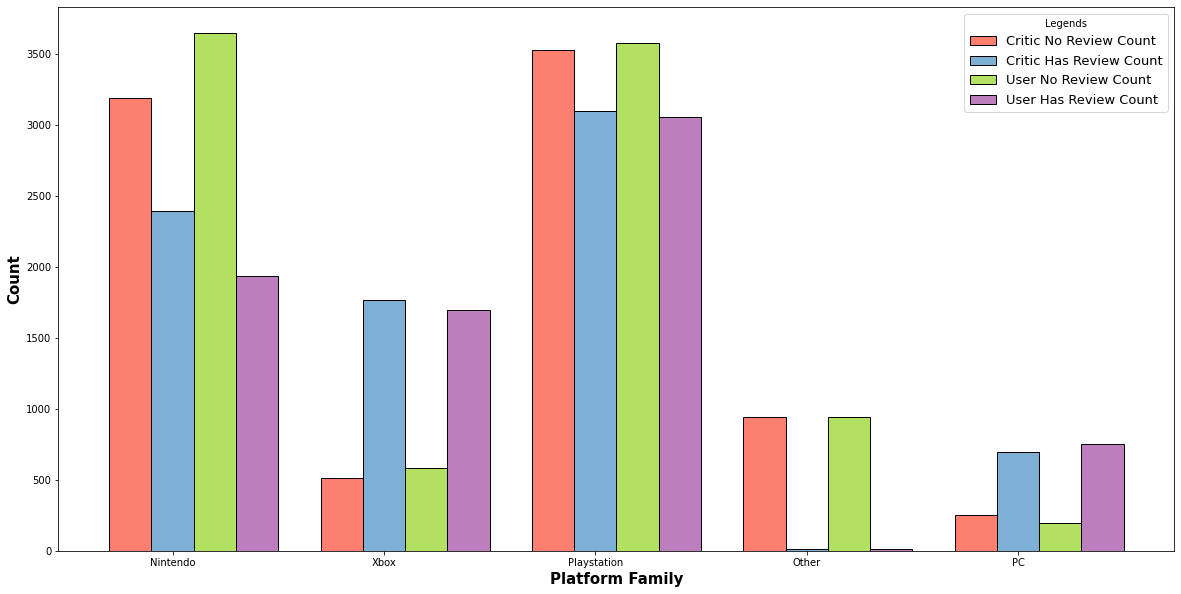

In [26]:
x = df["Platform_Family"].unique()
bar_width = .2

critic_none_count = []
critic_has_count = []
user_none_count = []
user_has_count = []

for platform in x:
    critic_none_count.append(len(df.loc[(df['Platform_Family'] == platform) & df['Critic_Count'].isnull()]))
    critic_has_count.append(len(df.loc[(df['Platform_Family'] == platform) & df['Critic_Count'].notnull()]))
    user_none_count.append(len(df.loc[(df['Platform_Family'] == platform) & df['User_Count'].isnull()]))
    user_has_count.append(len(df.loc[(df['Platform_Family'] == platform) & df['User_Count'].notnull()]))

x_axis = np.arange(len(critic_has_count))

plt.figure(figsize = (20,10))

plt.bar(x_axis, critic_none_count, color = my_colors[0], width = bar_width, edgecolor ='black', label="Critic No Review Count")
plt.bar(x_axis+bar_width, critic_has_count, color = my_colors[1], width = bar_width, edgecolor ='black', label="Critic Has Review Count")
plt.bar(x_axis+bar_width*2, user_none_count, color = my_colors[2], width = bar_width, edgecolor ='black', label="User No Review Count")
plt.bar(x_axis+bar_width*3, user_has_count, color = my_colors[3], width = bar_width, edgecolor ='black', label="User Has Review Count")

# Adding Xticks
plt.xlabel('Platform Family', fontweight ='bold', fontsize = 15)
plt.ylabel('Count', fontweight ='bold', fontsize = 15)
plt.xticks([r + bar_width for r in range(len(critic_has_count))],x)

plt.legend(prop={'size': 13}, title="Legends")
plt.show()

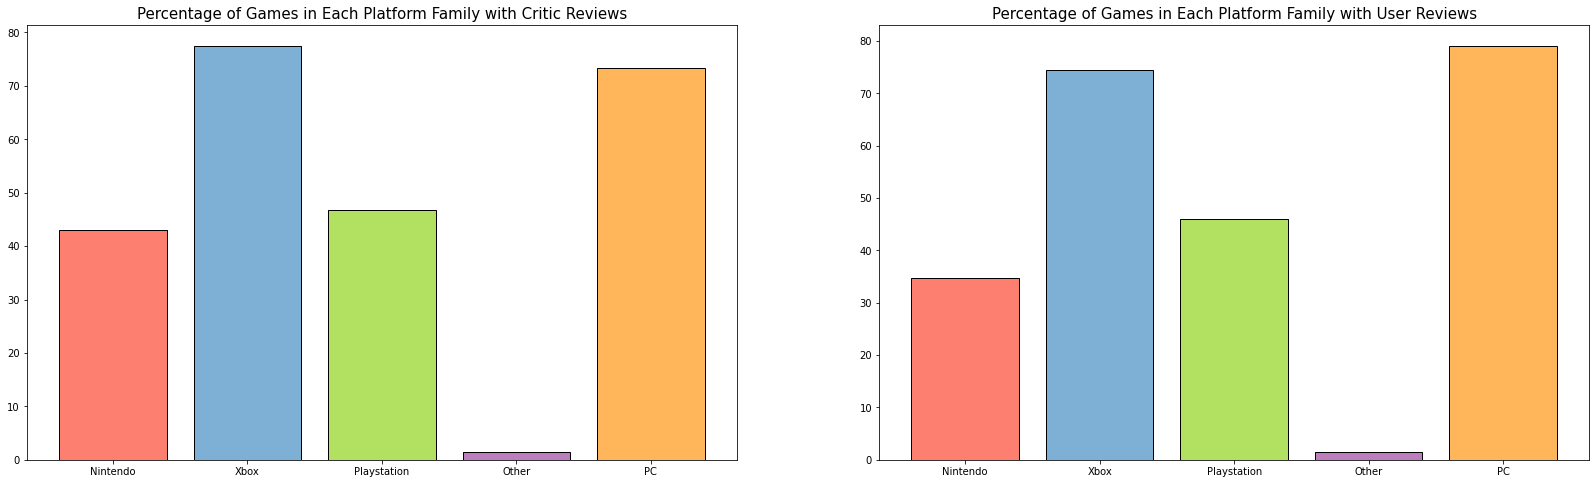

In [27]:
plt.figure(figsize=(28,8))

plt.subplot(1, 2, 1)
plt.bar(temp["Platform_Family"].unique(), temp["Critic Has Review Percentage"], color=my_colors, edgecolor='black')
plt.title('Percentage of Games in Each Platform Family with Critic Reviews', fontsize = 15)

plt.subplot(1, 2, 2)
plt.bar(temp["Platform_Family"].unique(), temp["User Has Review Percentage"], color=my_colors, edgecolor='black')
plt.title('Percentage of Games in Each Platform Family with User Reviews', fontsize = 15)

plt.show()

There seems to be a lot more game reviews for Nintendo and Playstation Platforms compared to PC and Xbox. Most of the platforms outside the mainstream ones have an absence of reviews. 

### Release Year
Let us plot a histogram to see how many games have reviews and doesn't have reviews over the years. 

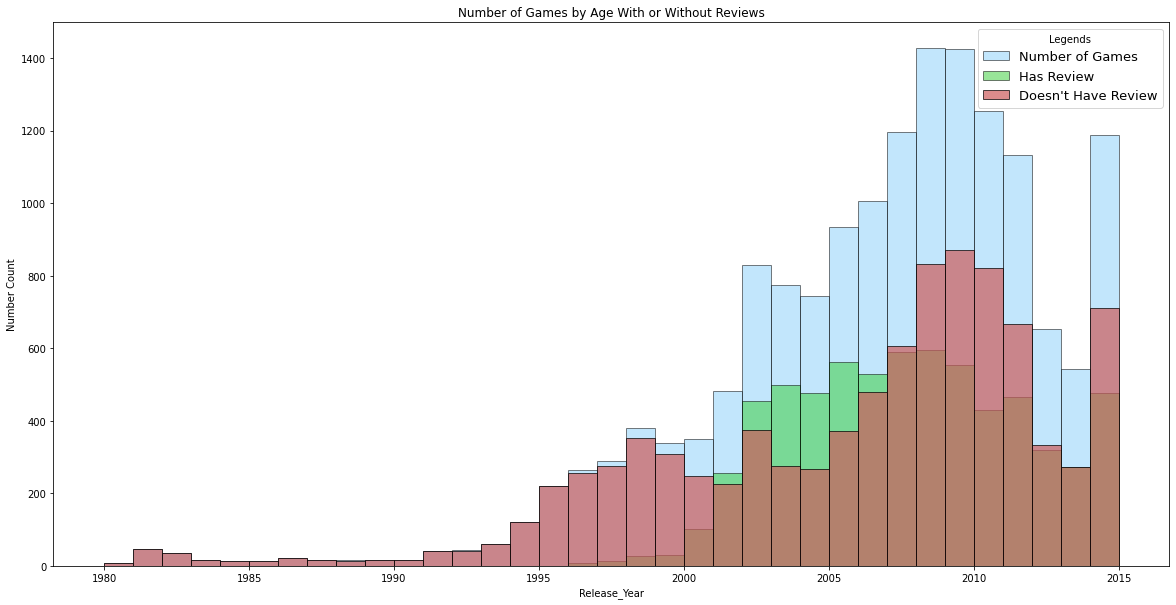

In [28]:
plt.figure(figsize = (20,10))
age_range=range(df["Release_Year"].min(), df["Release_Year"].max())
plt.hist(df["Release_Year"], color="lightskyblue", alpha=0.5, bins=age_range, edgecolor="black")
plt.hist(df[df["User_Score"].notnull() & df["Critic_Score"].notnull()==True]["Release_Year"], color="limegreen", alpha=0.5, 
         bins=age_range, edgecolor="black")
plt.hist(df[df["User_Score"].notnull() & df["Critic_Score"].notnull()==False]["Release_Year"], color="indianred", alpha=0.7, 
         bins=age_range, edgecolor="black")

plt.title("Number of Games by Age With or Without Reviews")
plt.xlabel("Release_Year")
plt.ylabel("Number Count")
plt.legend(["Number of Games", "Has Review", "Doesn't Have Review"], prop={'size': 13}, title="Legends")

It looks like the older the game is, the higher chance that it doesn't contain reviews, games from 8-23 years ago having the most reviews. But that age range also has the most amount of games that doesn't have reviews, it also has the most amount of games overall, perhaps because there were a large number of games developed that year, many games went under the radar.

### Genre
Maybe certain genres have a higher proportion of getting a review?

In [29]:
x = df["Genre"].unique()
bar_width = .2

count = 0

data = {
    "Genre": [],
    "Critic Count": [],
    "Critic Has Review Percentage": [],
    "Critic No Review Percentage":[],
    "User Count": [],
    "User Has Review Percentage":[],
    "User No Review Percentage":[],
}

temp = pd.DataFrame(data)

for genre in x:
    critic_null_count = round(((df['Genre'] == genre) & (df['Critic_Count'].isnull())).sum()*100/len(df[df['Genre'] == genre]), 2)
    critic_count = round(((df['Genre'] == genre) & (df['Critic_Count'].notnull())).sum()*100/len(df[df['Genre'] == genre]), 2)
    user_null_count = round(((df['Genre'] == genre) & (df['User_Count'].isnull())).sum()*100/len(df[df['Genre'] == genre]), 2)
    user_count = round(((df['Genre'] == genre) & (df['User_Count'].notnull())).sum()*100/len(df[df['Genre'] == genre]), 2)
    
    temp.loc[len(temp.index)] = [genre, len(df['Critic_Count']), critic_count, critic_null_count, len(df['User_Count']), user_count, user_null_count] 

temp

Genre 
 Critic Count 
 Critic Has Review Percentage 
 Critic No Review Percentage 
 User Count 
 User Has Review Percentage 
 User No Review Percentage 
 
 
 
 
 0 
 Sports 
 16411 
 50.50 
 49.50 
 16411 
 46.85 
 53.15 
 
 
 1 
 Platform 
 16411 
 55.81 
 44.19 
 16411 
 48.29 
 51.71 
 
 
 2 
 Racing 
 16411 
 59.18 
 40.82 
 16411 
 51.35 
 48.65 
 
 
 3 
 Role-Playing 
 16411 
 49.36 
 50.64 
 16411 
 49.76 
 50.24 
 
 
 4 
 Puzzle 
 16411 
 38.66 
 61.34 
 16411 
 21.97 
 78.03 
 
 
 5 
 Misc 
 16411 
 29.99 
 70.01 
 16411 
 25.28 
 74.72 
 
 
 6 
 Shooter 
 16411 
 71.22 
 28.78 
 16411 
 69.83 
 30.17 
 
 
 7 
 Simulation 
 16411 
 40.75 
 59.25 
 16411 
 39.58 
 60.42 
 
 
 8 
 Action 
 16411 
 55.99 
 44.01 
 16411 
 54.33 
 45.67 
 
 
 9 
 Fighting 
 16411 
 48.39 
 51.61 
 16411 
 47.19 
 52.81 
 
 
 10 
 Adventure 
 16411 
 24.79 
 75.21 
 16411 
 23.08 
 76.92 
 
 
 11 
 Strategy 
 16411 
 43.90 
 56.10 
 16411 
 45.24 
 54.76

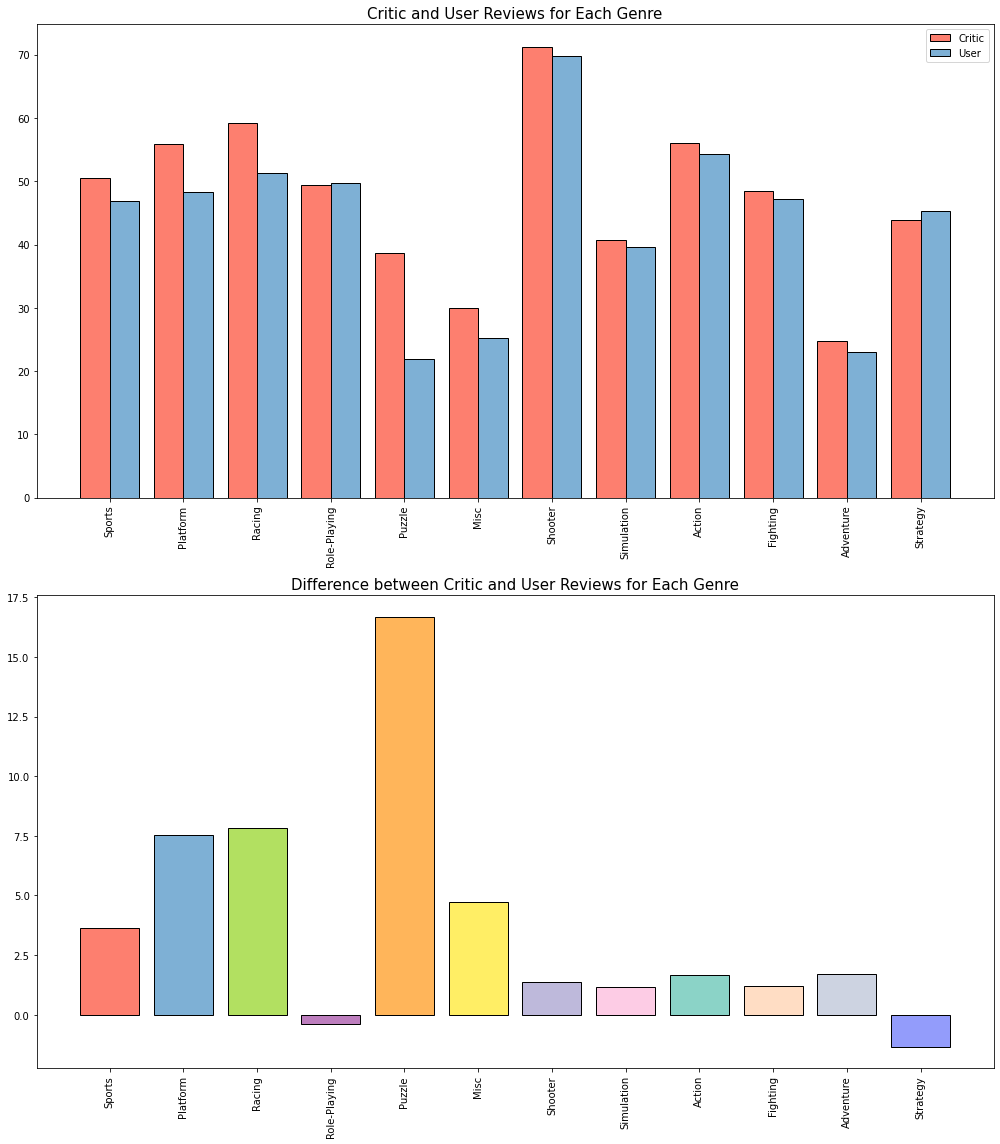

In [30]:

x = np.arange(len(temp["Genre"].unique()))

plt.figure(figsize=(14,16))

# First subplot: side by side bar plot
plt.subplot(2, 1, 1)
plt.bar(x - 0.2, temp["Critic Has Review Percentage"], 0.4, color=my_colors[0], edgecolor='black', label='Critic')
plt.bar(x + 0.2, temp["User Has Review Percentage"], 0.4, color=my_colors[1], edgecolor='black', label='User')
plt.xticks(x, temp["Genre"].unique(), rotation=90)
plt.title('Critic and User Reviews for Each Genre', fontsize = 15)
plt.legend()

# Second subplot: difference bar plot
plt.subplot(2, 1, 2)
difference = temp["Critic Has Review Percentage"] - temp["User Has Review Percentage"]
plt.bar(temp["Genre"].unique(), difference, color=my_colors, edgecolor='black')
plt.title('Difference between Critic and User Reviews for Each Genre', fontsize = 15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

First, we see that there are a few outliers here. It seems a lot of shooter games have reviews both from users and critics. Puzzle games have the most even reviews from both users and critics. Next, puzzle games seem to receive a lot more from critics than users. Lastly, Adventure and Puzzle games have the least amount of reviews both from critics and users.

### Conclusion
There are certain platforms, genres, and the age of the game that tends to garner more user and critic scores. Games that are older, released on the Nintendo and/or Playstation platform, or belongs to the Puzzle or Adventure genre are more likely to lack user/critic reviews. 

## 2. Exploring who are the top Publishers given possible factors. 

Investigating game publishers provides valuable insights into the gaming industry. Their reputation hinges on the quality of their games, and identifying top publishers and their game types can reveal industry trends.

In this analysis, we’ll first examine general data about publishers. Then, we’ll select one standout publisher for a more detailed study. This approach offers a comprehensive view of the industry and highlights the strategies of individual players.

### Preliminary Code
Setting up all the necessary data for analysis

In [31]:
top_n = 10

#Sales per region and in total

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

sales_data = pd.DataFrame()

for region in regions:
    sales_data[region] = df.groupby('Publisher')[region].sum()
sales_data['Total_Sales'] = sales_data.sum(axis=1)


# Number of Games
num_games = df['Publisher'].value_counts()
top_games = num_games.head(top_n).iloc[::-1]

#Average User Score
user_scores = df.groupby('Publisher')["User_Score"].mean()
top_user = user_scores.sort_values( ascending=False).head(10).iloc[::-1]

#Average Critic Score
critic_scores = df.groupby('Publisher')["Critic_Score"].mean()
top_critic = critic_scores.sort_values(ascending=False).head(10).iloc[::-1]

#Overall Rating, assuming user and critic are equally weighted on importance
overall_score = (user_scores + critic_scores) / 2

#Combine User and Critic score for correlation for publisher
scores_category = ['User_Score', 'Critic_Score', 'Overall_Score']
scores_df = pd.DataFrame({scores_category[0]: user_scores, scores_category[1]: critic_scores, scores_category[2] : overall_score})
scores_df['Scores_Difference'] = abs(scores_df['User_Score'] - scores_df['Critic_Score'])

#Add number of games the publisher has
num_games_df = num_games.rename_axis('Publisher').reset_index(name='Game_Count').set_index('Publisher')
scores_df = scores_df.merge(num_games_df, left_index=True, right_index=True)

# By Genre
genres = df["Genre"].unique()
game_genre = df.groupby(['Genre', 'Publisher']).size().reset_index(name='Game_Count')
top_genre = pd.DataFrame()

for genre in genres:
    genre_df = game_genre[game_genre['Genre'] == genre]
    
    genre_df.set_index('Publisher', inplace=True)
    genre_df = genre_df['Game_Count']
    
    top_genre = pd.concat([top_genre, genre_df], axis=1)

top_genre.columns = genres

# Group by 'Platform' and 'Publisher' to count the number of games for each publisher on each platform
platforms = df["Platform_Family"].unique()
game_platform = df.groupby(['Platform_Family', 'Publisher']).size().reset_index(name='Game_Count')
top_platform = pd.DataFrame()

for platform in platforms:
    platform_df = game_platform[game_platform['Platform_Family'] == platform]
    
    platform_df.set_index('Publisher', inplace=True)
    platform_df = platform_df['Game_Count']
    
    top_platform = pd.concat([top_platform, platform_df], axis=1)

top_platform.columns = platforms

### Which publishers dominate the market of a specific region and overall market across regions?

In [32]:
for x in range(0, 5):
    print(sales_data[regions[x]].sort_values(ascending=False).head(top_n))
    print()

Publisher
Nintendo                       815.86
Electronic Arts                588.65
Activision                     428.92
Sony Computer Entertainment    266.17
Ubisoft                        251.85
Take-Two Interactive           222.92
THQ                            207.55
Microsoft Game Studios         157.43
Sega                           107.99
Atari                          101.03
Name: NA_Sales, dtype: float64

Publisher
Nintendo                        418.58
Electronic Arts                 370.01
Activision                      214.10
Sony Computer Entertainment     186.40
Ubisoft                         161.72
Take-Two Interactive            119.06
THQ                              93.66
Sega                             80.08
Microsoft Game Studios           68.64
Konami Digital Entertainment     67.93
Name: EU_Sales, dtype: float64

Publisher
Nintendo                        457.74
Namco Bandai Games              127.62
Konami Digital Entertainment     91.03
Sony Computer Enter

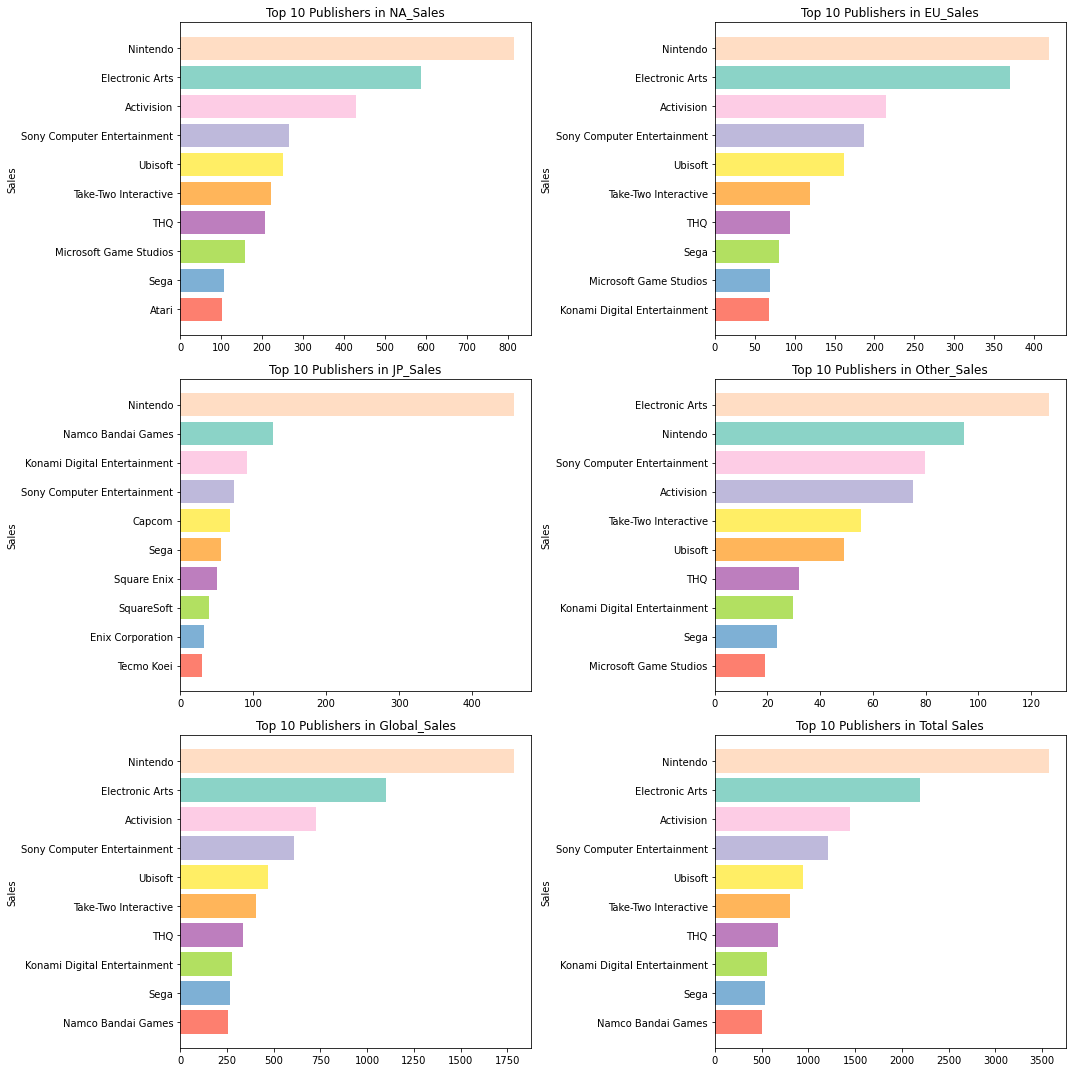

In [33]:
# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs = axs.ravel()  # Flatten the array of axes for easy indexing

# Loop through regions and create bar plots
for i, region in enumerate(regions):
    top_publishers = sales_data[region].sort_values(ascending=False).head(top_n).iloc[::-1]
    axs[i].barh(top_publishers.index, top_publishers.values, color=my_colors)
    axs[i].set_title(f'Top {top_n} Publishers in {region}')
    axs[i].set_ylabel('Sales')
    axs[i].tick_params(axis='x')

#Finally, barplot for the total sales
top_publishers = sales_data['Total_Sales'].sort_values(ascending=False).head(top_n).iloc[::-1]
axs[5].barh(top_publishers.index, top_publishers.values, color=my_colors)
axs[5].set_title(f'Top {top_n} Publishers in Total Sales')
axs[5].set_ylabel('Sales')
axs[5].tick_params(axis='x')

plt.tight_layout()
plt.show()

In [34]:
sales_data.sort_values(by=['Total_Sales'],ascending=False).head(top_n)

NA_Sales 
 EU_Sales 
 JP_Sales 
 Other_Sales 
 Global_Sales 
 Total_Sales 
 
 
 Publisher 
 
 
 
 
 
 
 
 
 
 
 Nintendo 
 815.86 
 418.58 
 457.74 
 94.55 
 1786.72 
 3573.45 
 
 
 Electronic Arts 
 588.65 
 370.01 
 14.29 
 126.82 
 1100.04 
 2199.81 
 
 
 Activision 
 428.92 
 214.10 
 6.71 
 75.27 
 725.14 
 1450.14 
 
 
 Sony Computer Entertainment 
 266.17 
 186.40 
 74.15 
 79.62 
 606.27 
 1212.61 
 
 
 Ubisoft 
 251.85 
 161.72 
 7.35 
 49.07 
 470.16 
 940.15 
 
 
 Take-Two Interactive 
 222.92 
 119.06 
 5.93 
 55.68 
 403.58 
 807.17 
 
 
 THQ 
 207.55 
 93.66 
 5.01 
 31.87 
 338.11 
 676.20 
 
 
 Konami Digital Entertainment 
 88.67 
 67.93 
 91.03 
 29.54 
 277.36 
 554.53 
 
 
 Sega 
 107.99 
 80.08 
 56.17 
 23.59 
 268.06 
 535.89 
 
 
 Namco Bandai Games 
 69.76 
 42.14 
 127.62 
 14.55 
 254.19 
 508.26

From the data, it is clear that Nintendo is the top publisher dominating the gaming market across all regions.

### How does the number of games released vary among the top publishers?

In [35]:
num_games

Electronic Arts 1343
Activision 976
Namco Bandai Games 935
Ubisoft 929
Konami Digital Entertainment 825
 ... 
Max Five 1
On Demand 1
Bomb 1
Detn8 Games 1
Red Flagship 1
Name: Publisher, Length: 579, dtype: int64

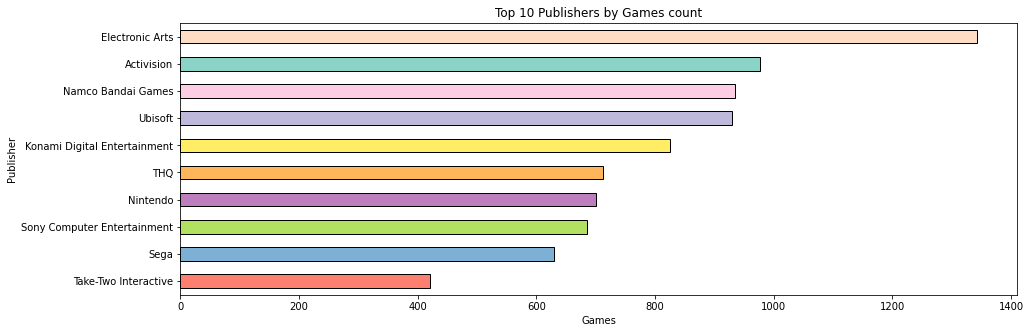

In [36]:
plt.figure(figsize=(15,5))
top_games.plot(kind='barh', color=my_colors, edgecolor='black')
plt.xlabel('Games')
plt.ylabel('Publisher')
plt.title('Top 10 Publishers by Games count')
plt.show()

In terms of game count, Electronic Arts (EA) has the most. This leads to an interesting question of whether the quantity of games correlate to higher sales figure. Let us explore this question using correlation and scatter plot.

In [37]:
num_games = df['Publisher'].value_counts()

combined_data = pd.concat([sales_data, num_games], axis=1)

combined_data.columns = list(sales_data.columns) + ['Number_of_Games']

combined_data.sort_values(by=['Total_Sales'], ascending=False)

correlation = combined_data['Total_Sales'].corr(combined_data['Number_of_Games'])

print(f'The correlation between Publisher\'s number of games and total sales is {correlation}')

The correlation between Publisher's number of games and total sales is 0.7978500798510116


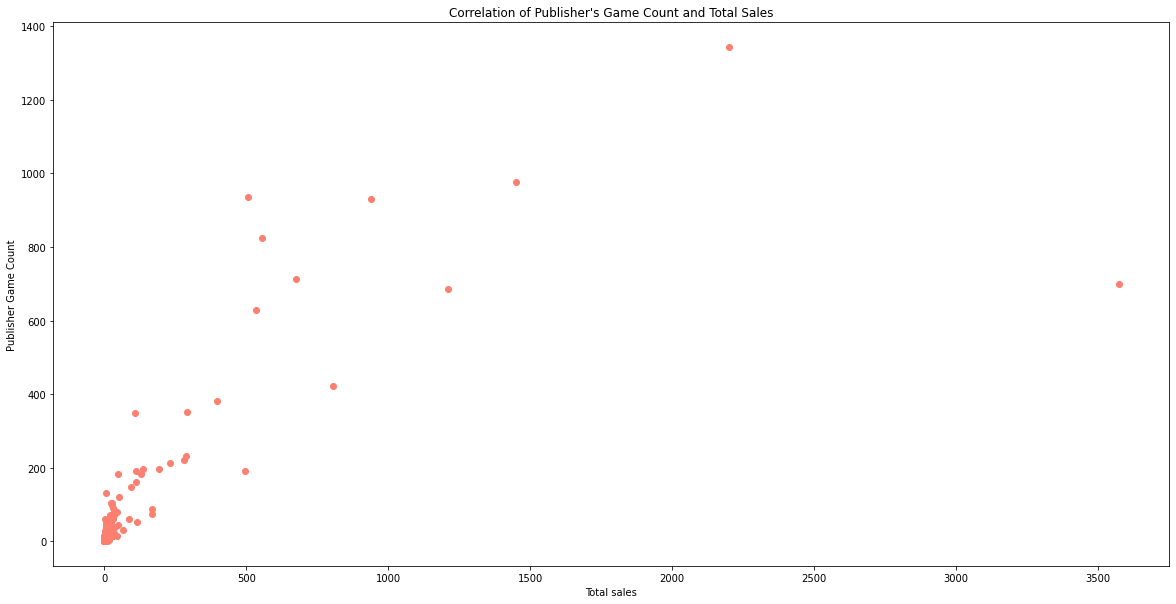

In [38]:
# Create the scatter plot
plt.figure(figsize=(20, 10))
plt.scatter(combined_data['Total_Sales'], combined_data['Number_of_Games'], color=my_colors[0])
plt.xlabel('Total sales')
plt.ylabel('Publisher Game Count')
plt.title('Correlation of Publisher\'s Game Count and Total Sales')
plt.show()

The scatter plot and positive correlation suggest that publishers generally see increased sales with more game releases. However, Nintendo, an outlier with the highest sales from around 700 games, contradicts this trend. This implies that factors beyond quantity, such as game quality or popular franchises, can significantly impact sales. Thus, while quantity can influence sales, Nintendo’s success highlights the potential of quality.

### How do user and critic ratings compare among the top publishers?

In [39]:
scores_df.sort_values(by=['Overall_Score'], ascending=False)

User_Score 
 Critic_Score 
 Overall_Score 
 Scores_Difference 
 Game_Count 
 
 
 Publisher 
 
 
 
 
 
 
 
 
 
 Square 
 91.0 
 89.0 
 90.0 
 2.0 
 6 
 
 
 Valve 
 84.0 
 95.0 
 89.5 
 11.0 
 1 
 
 
 Blue Byte 
 88.0 
 91.0 
 89.5 
 3.0 
 2 
 
 
 Valve Software 
 86.0 
 93.0 
 89.5 
 7.0 
 3 
 
 
 Graphsim Entertainment 
 86.0 
 90.0 
 88.0 
 4.0 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 fonfun 
 NaN 
 NaN 
 NaN 
 NaN 
 1 
 
 
 iWin 
 NaN 
 NaN 
 NaN 
 NaN 
 1 
 
 
 imageepoch Inc. 
 NaN 
 NaN 
 NaN 
 NaN 
 2 
 
 
 mixi, Inc 
 NaN 
 NaN 
 NaN 
 NaN 
 1 
 
 
 responDESIGN 
 NaN 
 NaN 
 NaN 
 NaN 
 2 
 
 
 
 579 rows × 5 columns

It seems that the top are populated by publishers that have released few to little games. To ensure a fair representation of top publishers based on critical reception, we’re focusing on those with a substantial number of game releases. Thus, a threshold is set to include only publishers who have released equal or more games than 75% of all publishers, providing a more reliable overview of consistent performance.

In [40]:
#Calculating Q1 and Q3
Q1 = scores_df['Game_Count'].quantile(0.25)
Q2 = scores_df['Game_Count'].quantile(0.50)
Q3 = scores_df['Game_Count'].quantile(0.75)

#IQR
IQR = Q3 - Q1

treshold = Q3
print(scores_df['Game_Count'].describe())
filtered_score_df = scores_df[scores_df['Game_Count'] >= treshold]

filtered_score_df.sort_values(by=['Overall_Score'], ascending=False)

count     579.000000
mean       28.343696
std       115.831152
min         1.000000
25%         1.000000
50%         3.000000
75%        10.500000
max      1343.000000
Name: Game_Count, dtype: float64


User_Score 
 Critic_Score 
 Overall_Score 
 Scores_Difference 
 Game_Count 
 
 
 Publisher 
 
 
 
 
 
 
 
 
 
 Psygnosis 
 85.000000 
 89.750000 
 87.375000 
 4.750000 
 32 
 
 
 GT Interactive 
 87.333333 
 86.666667 
 87.000000 
 0.666667 
 45 
 
 
 Kadokawa Shoten 
 90.000000 
 82.000000 
 86.000000 
 8.000000 
 50 
 
 
 SquareSoft 
 84.888889 
 85.888889 
 85.388889 
 1.000000 
 52 
 
 
 Falcom Corporation 
 83.666667 
 79.000000 
 81.333333 
 4.666667 
 16 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 SNK Playmore 
 NaN 
 69.333333 
 NaN 
 NaN 
 18 
 
 
 Storm City Games 
 NaN 
 36.500000 
 NaN 
 NaN 
 19 
 
 
 Takara 
 NaN 
 NaN 
 NaN 
 NaN 
 16 
 
 
 UFO Interactive 
 NaN 
 40.000000 
 NaN 
 NaN 
 16 
 
 
 Yeti 
 NaN 
 NaN 
 NaN 
 NaN 
 11 
 
 
 
 145 rows × 5 columns

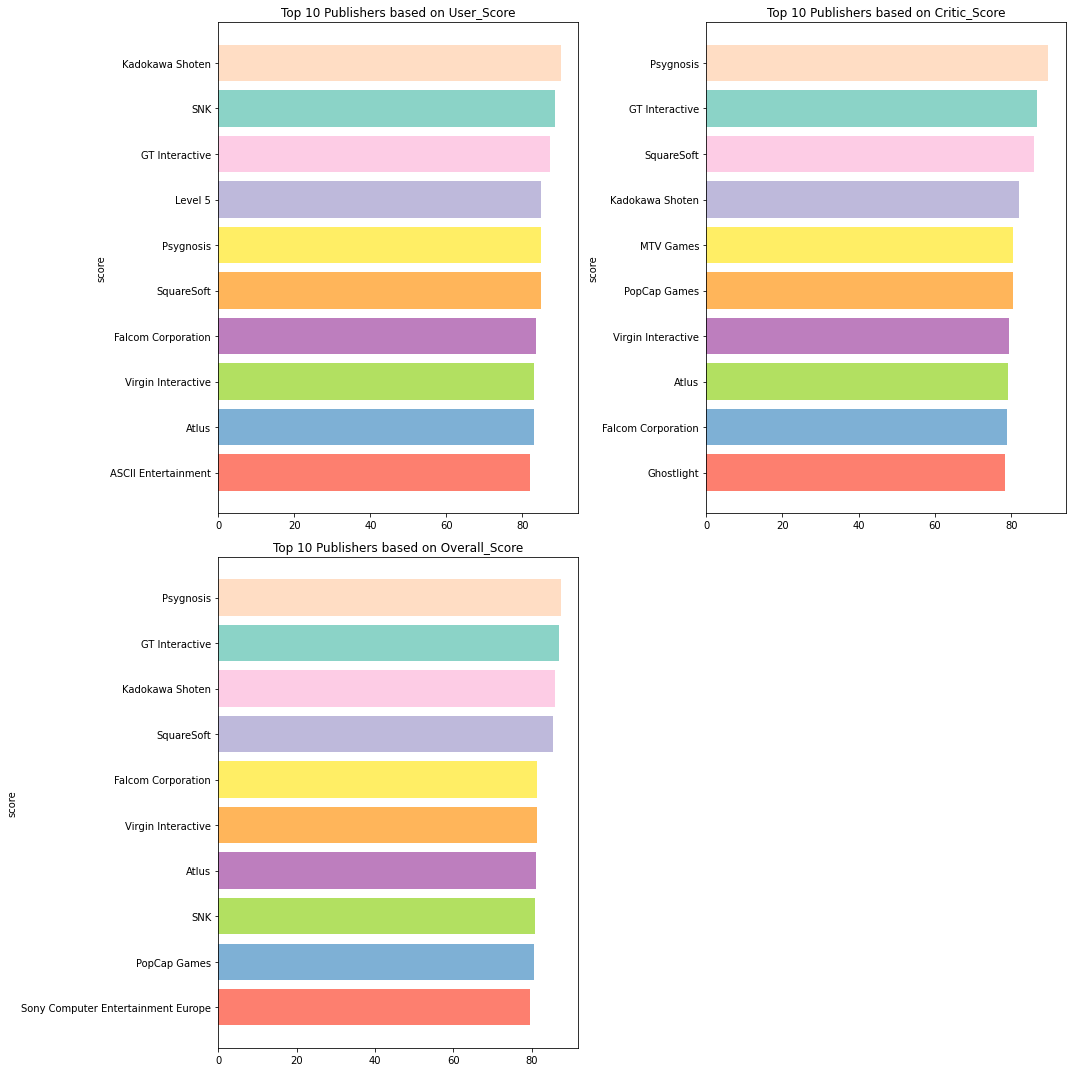

In [41]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.ravel()  # Flatten the array of axes for easy indexing

for i, score in enumerate (scores_category):
    top_publisher = filtered_score_df[score].sort_values(ascending=False).head(top_n).iloc[::-1]
    axs[i].barh(top_publisher.index, top_publisher.values, color=my_colors)
    axs[i].set_title(f'Top {top_n} Publishers based on {score}', fontsize=12)
    axs[i].set_ylabel('score')
    axs[i].tick_params(axis='x')

fig.delaxes(axs[3])

plt.tight_layout()
plt.show()

User and critic ratings for publishers can vary, reflecting different perspectives. Analyzing the correlation between these scores can reveal whether there’s a general agreement. However, it’s important to remember that correlation doesn’t imply causation, and other factors could influence these ratings.

Correlation:  0.60931277280894


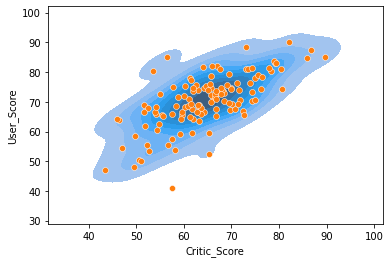

In [42]:
sns.kdeplot(x = 'Critic_Score', y = 'User_Score', data = filtered_score_df, fill=True)
sns.scatterplot(x = 'Critic_Score', y = 'User_Score', data = filtered_score_df)

correlation = scores_df['User_Score'].corr(scores_df['Critic_Score'])
print("Correlation: ", correlation)

The correlation of user and critic score on publisher's games seems to be positive, and the graph does show that in general, critics and users tend to agree on their score. However, there seems to be outliers where critics and users do not agree. Let us explore this further and see the top publishers where users and critics do not agree with their scores. 

In [43]:
filtered_score_df.sort_values(by='Scores_Difference',ascending=False).head(top_n)

User_Score 
 Critic_Score 
 Overall_Score 
 Scores_Difference 
 Game_Count 
 
 
 Publisher 
 
 
 
 
 
 
 
 
 
 Level 5 
 85.000000 
 56.500000 
 70.750000 
 28.500000 
 27 
 
 
 Zushi Games 
 80.500000 
 53.500000 
 67.000000 
 27.000000 
 18 
 
 
 XS Games 
 64.250000 
 46.000000 
 55.125000 
 18.250000 
 12 
 
 
 Enterbrain 
 81.666667 
 64.000000 
 72.833333 
 17.666667 
 15 
 
 
 Natsume 
 72.571429 
 55.000000 
 63.785714 
 17.571429 
 18 
 
 
 Activision Value 
 63.850000 
 46.444444 
 55.147222 
 17.405556 
 29 
 
 
 From Software 
 69.000000 
 51.600000 
 60.300000 
 17.400000 
 15 
 
 
 Play It 
 75.000000 
 57.800000 
 66.400000 
 17.200000 
 14 
 
 
 Hudson Entertainment 
 78.000000 
 61.333333 
 69.666667 
 16.666667 
 11 
 
 
 O-Games 
 41.000000 
 57.500000 
 49.250000 
 16.500000 
 17

Knowing how frequent or the proportion where users score lower than the critics and vice versa is important to know on who is more critical of the quality of the publisher's game.

In [44]:
user_lower = (filtered_score_df['User_Score'] < filtered_score_df['Critic_Score']).sum()

critic_lower = (filtered_score_df['Critic_Score'] < filtered_score_df['User_Score']).sum()

total = len(filtered_score_df)

user_prop = user_lower / total
critic_prop = critic_lower / total

print(f"Number of times user score is lower: {user_lower}")
print(f"Number of times critic score is lower: {critic_lower}")
print(f"The proportion of users scoring lower than critics: {round((user_prop * 100), 2)}%")
print(f"The proportion of critics scoring lower than users: {round((critic_prop * 100), 2)}%")

Number of times user score is lower: 24
Number of times critic score is lower: 101
The proportion of users scoring lower than critics: 16.55%
The proportion of critics scoring lower than users: 69.66%


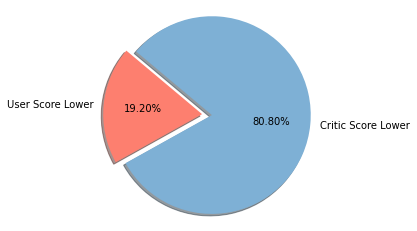

In [45]:
labels = 'User Score Lower', 'Critic Score Lower'
sizes = [user_prop, critic_prop]
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=my_colors,
autopct='%1.2f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

The observed trend suggests that critics tend to rate games lower than users, possibly indicating higher standards or expectations. However, it’s important to consider that these scores could be influenced by various factors. Critics and users may focus on different aspects of a game, such as gameplay mechanics, graphics, storyline, or replay value. Additionally, critics often have extensive experience and might compare a game to a wide range of others in the genre, while users might rate based on personal enjoyment. Therefore, while the scores provide valuable insights, they represent different perspectives and should be interpreted accordingly.

### Who are the top publishers on a genre based on game releases?
Knowing who are the top publishers per genre will give general insight on what genre publishers are best at. For now, the general factor will be done on the number of games a publisher has released for a specific genre. 

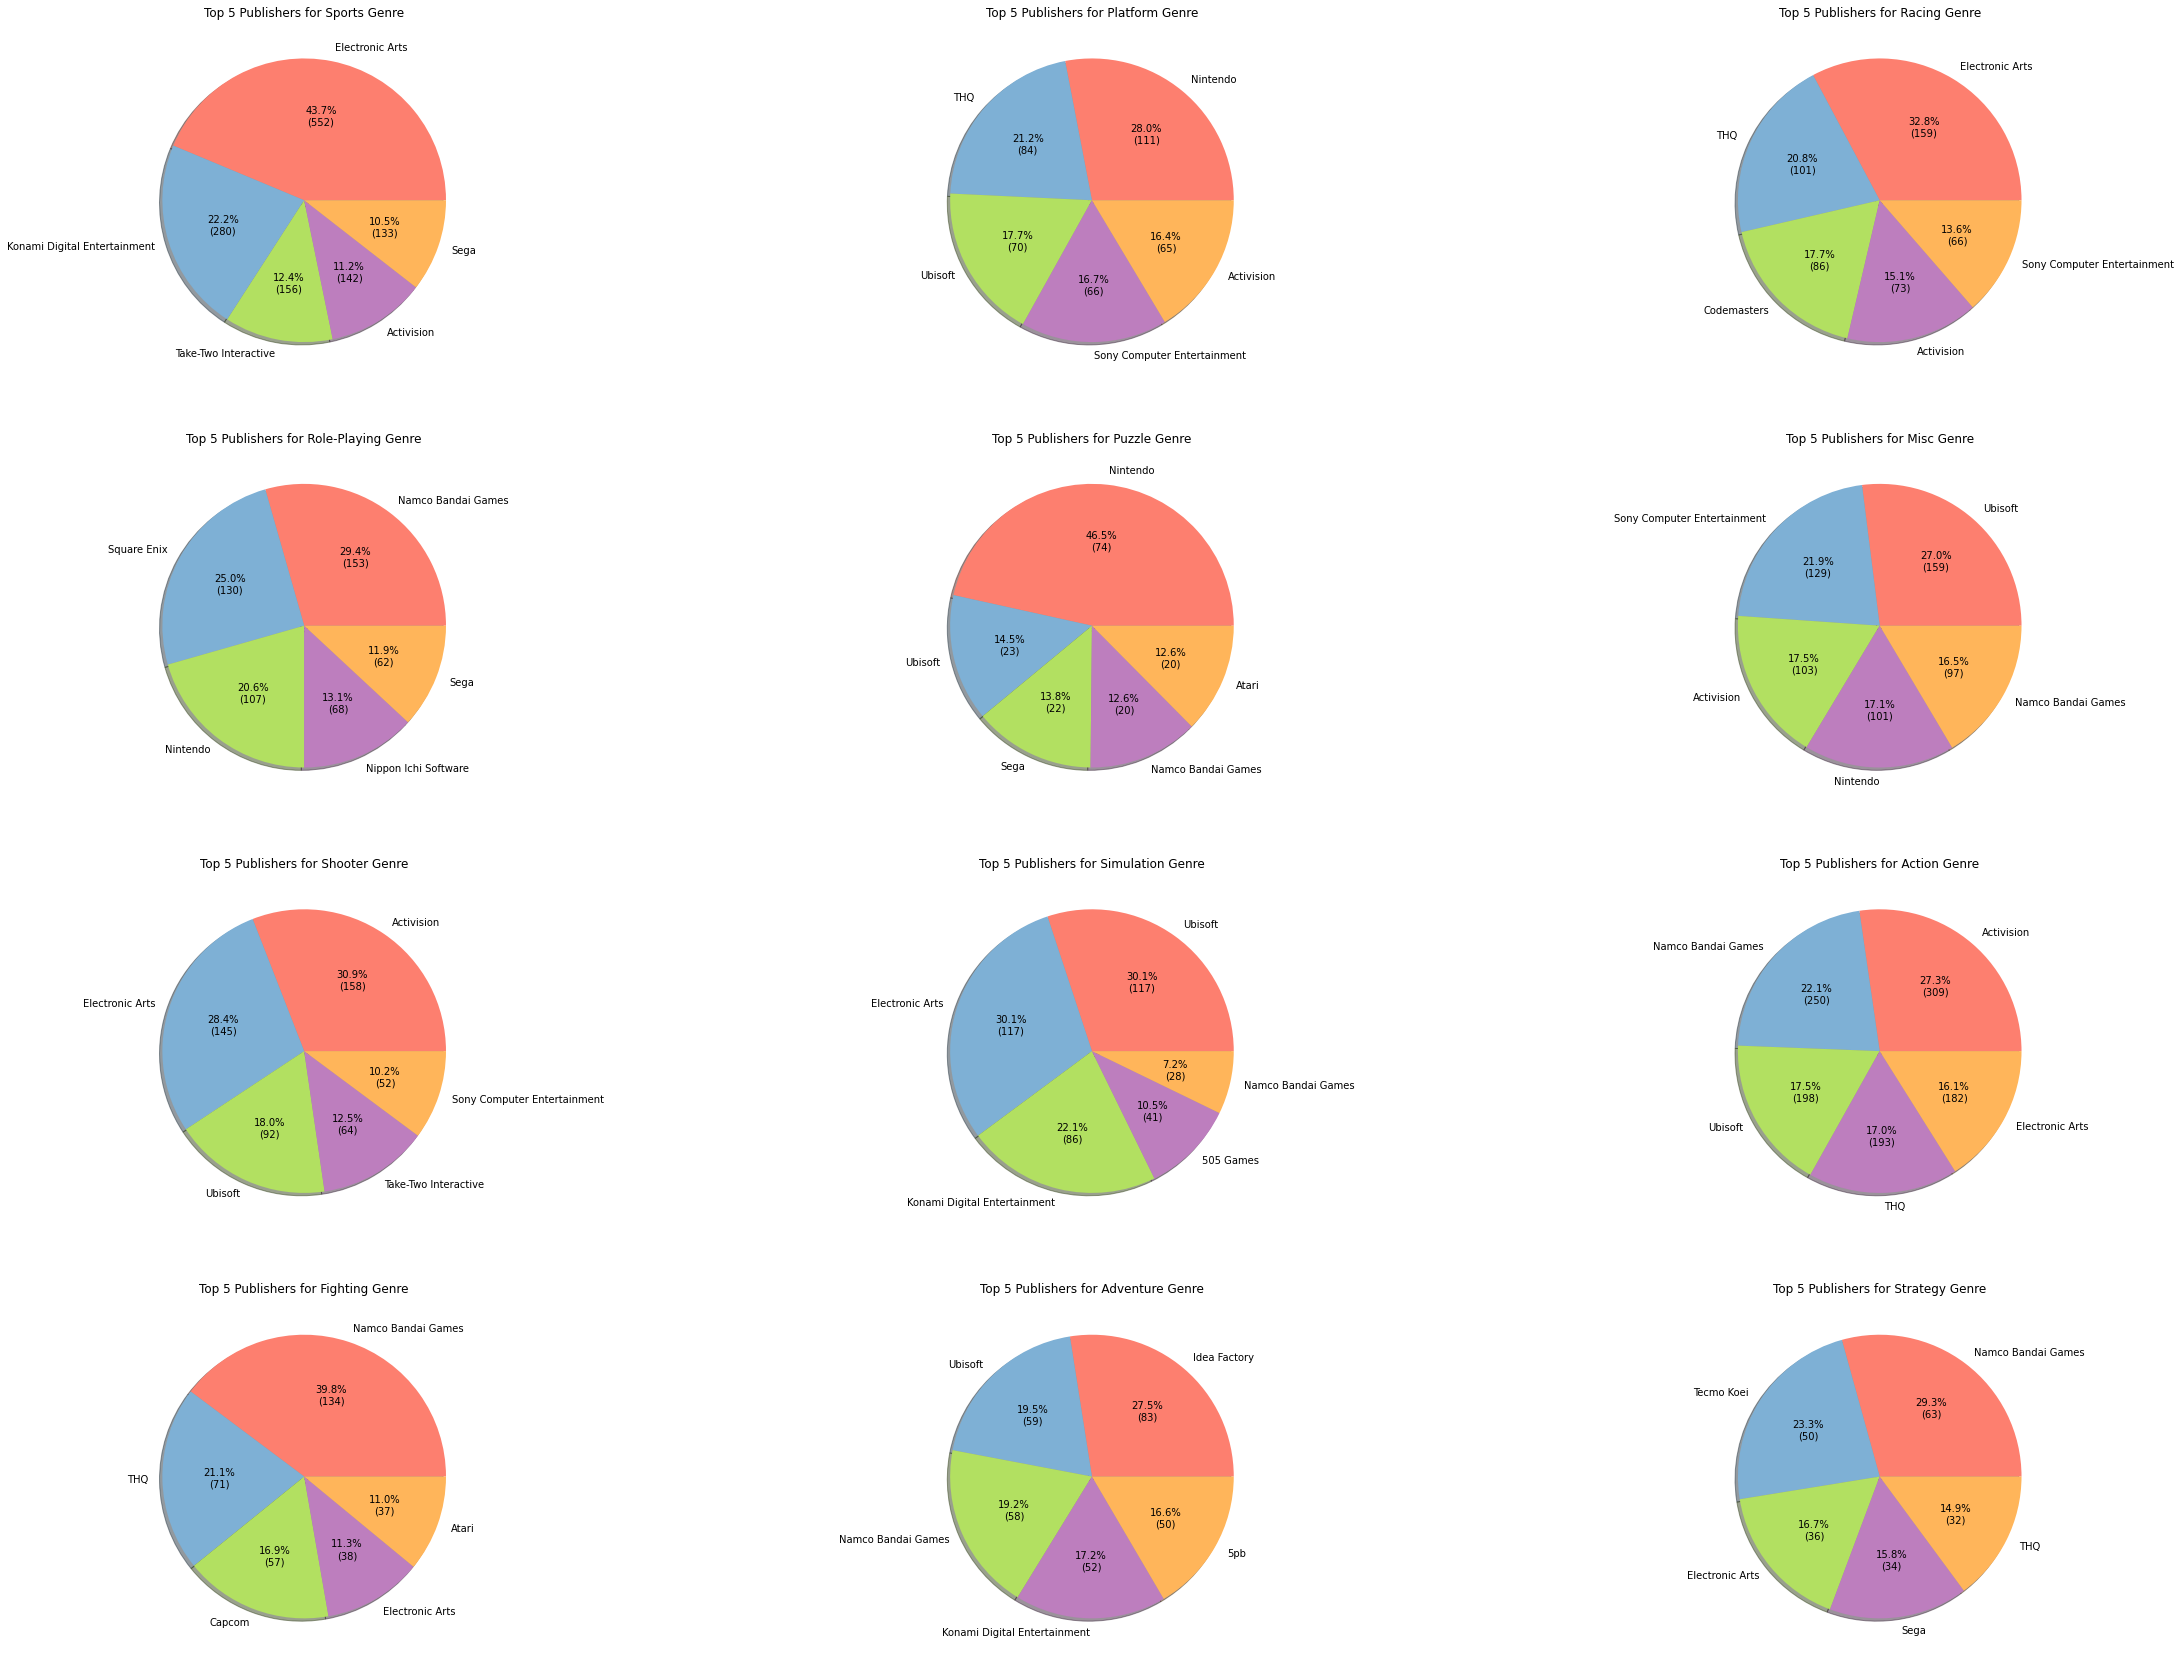

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [46]:
x = df["Genre"].unique()

fig, axs = plt.subplots(4, 3, figsize=(40, 30))
axs = axs.ravel()  # Flatten the array of axes for easy indexing

for i in range(0, len(x)):
    x_axis = top_genre[x[i]].sort_values(ascending=False).keys().tolist()[:5]
    y_axis = top_genre[x[i]].sort_values(ascending=False).tolist()[:5]
    plt.figure(figsize=(8,8))
    axs[i].pie(y_axis, labels = x_axis, autopct = format_pie(y_axis), colors = my_colors,shadow = True,wedgeprops = {'linewidth': 1})
    axs[i].set_title(f'Top 5 Publishers for {x[i]} Genre')

plt.show()

Some interesting findings are Namco Bandai Games dominates the Fighting, Strategy, and  Role-Playing genre in terms of the number of games released. Nintendo also takes a whopping 46.5% of puzzle games. 

### What is the proportion of game releases across different platform family for each of the top publishers?

Knowing the top publisher's platform preference and the number of games released on it will give general insight on the publisher's success on each major platform.

array([[%lt;Axes: ylabel='Activision'%gt;, %lt;Axes: ylabel='Electronic Arts'%gt;,
 %lt;Axes: ylabel='Konami Digital Entertainment'%gt;,
 %lt;Axes: ylabel='Namco Bandai Games'%gt;, %lt;Axes: ylabel='Nintendo'%gt;],
 [%lt;Axes: ylabel='Sega'%gt;,
 %lt;Axes: ylabel='Sony Computer Entertainment'%gt;,
 %lt;Axes: ylabel='THQ'%gt;, %lt;Axes: ylabel='Take-Two Interactive'%gt;,
 %lt;Axes: ylabel='Ubisoft'%gt;]], dtype=object)

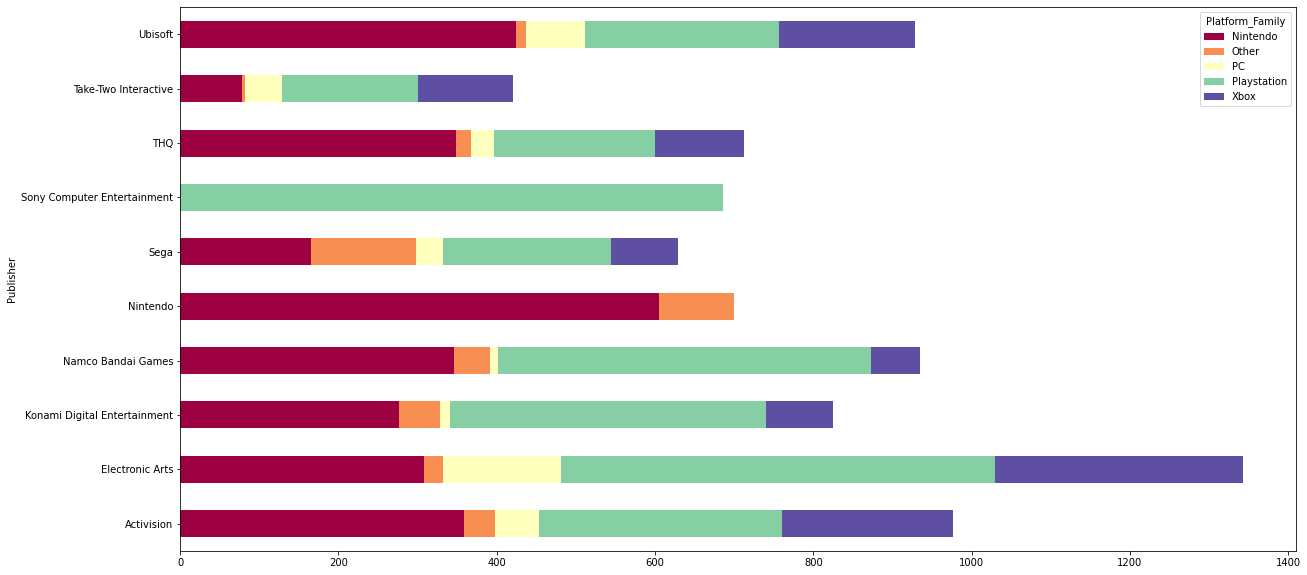

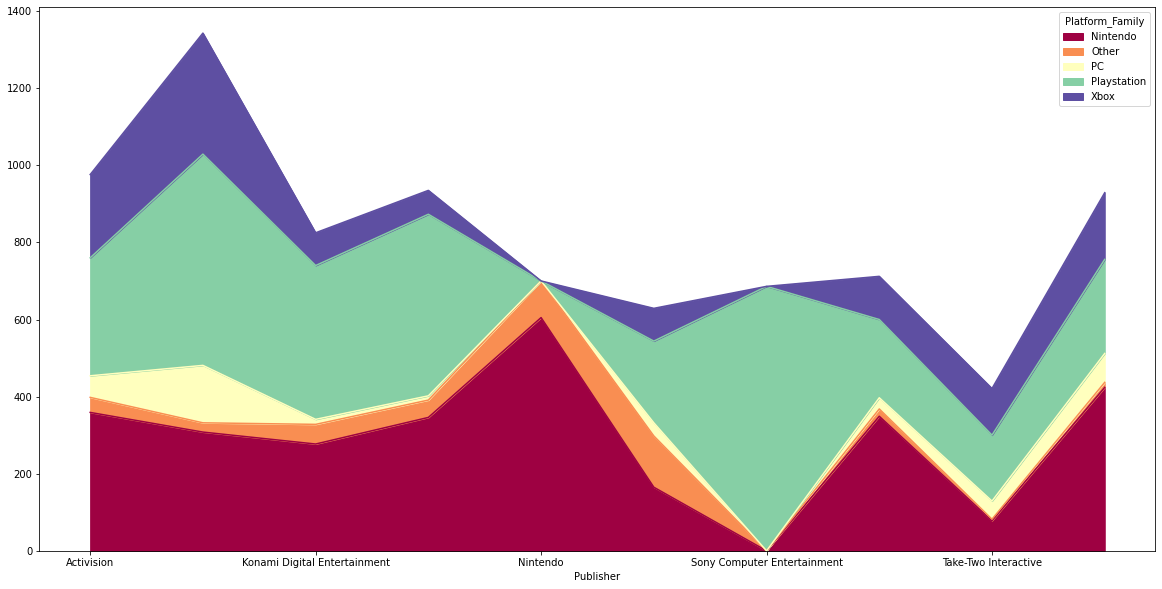

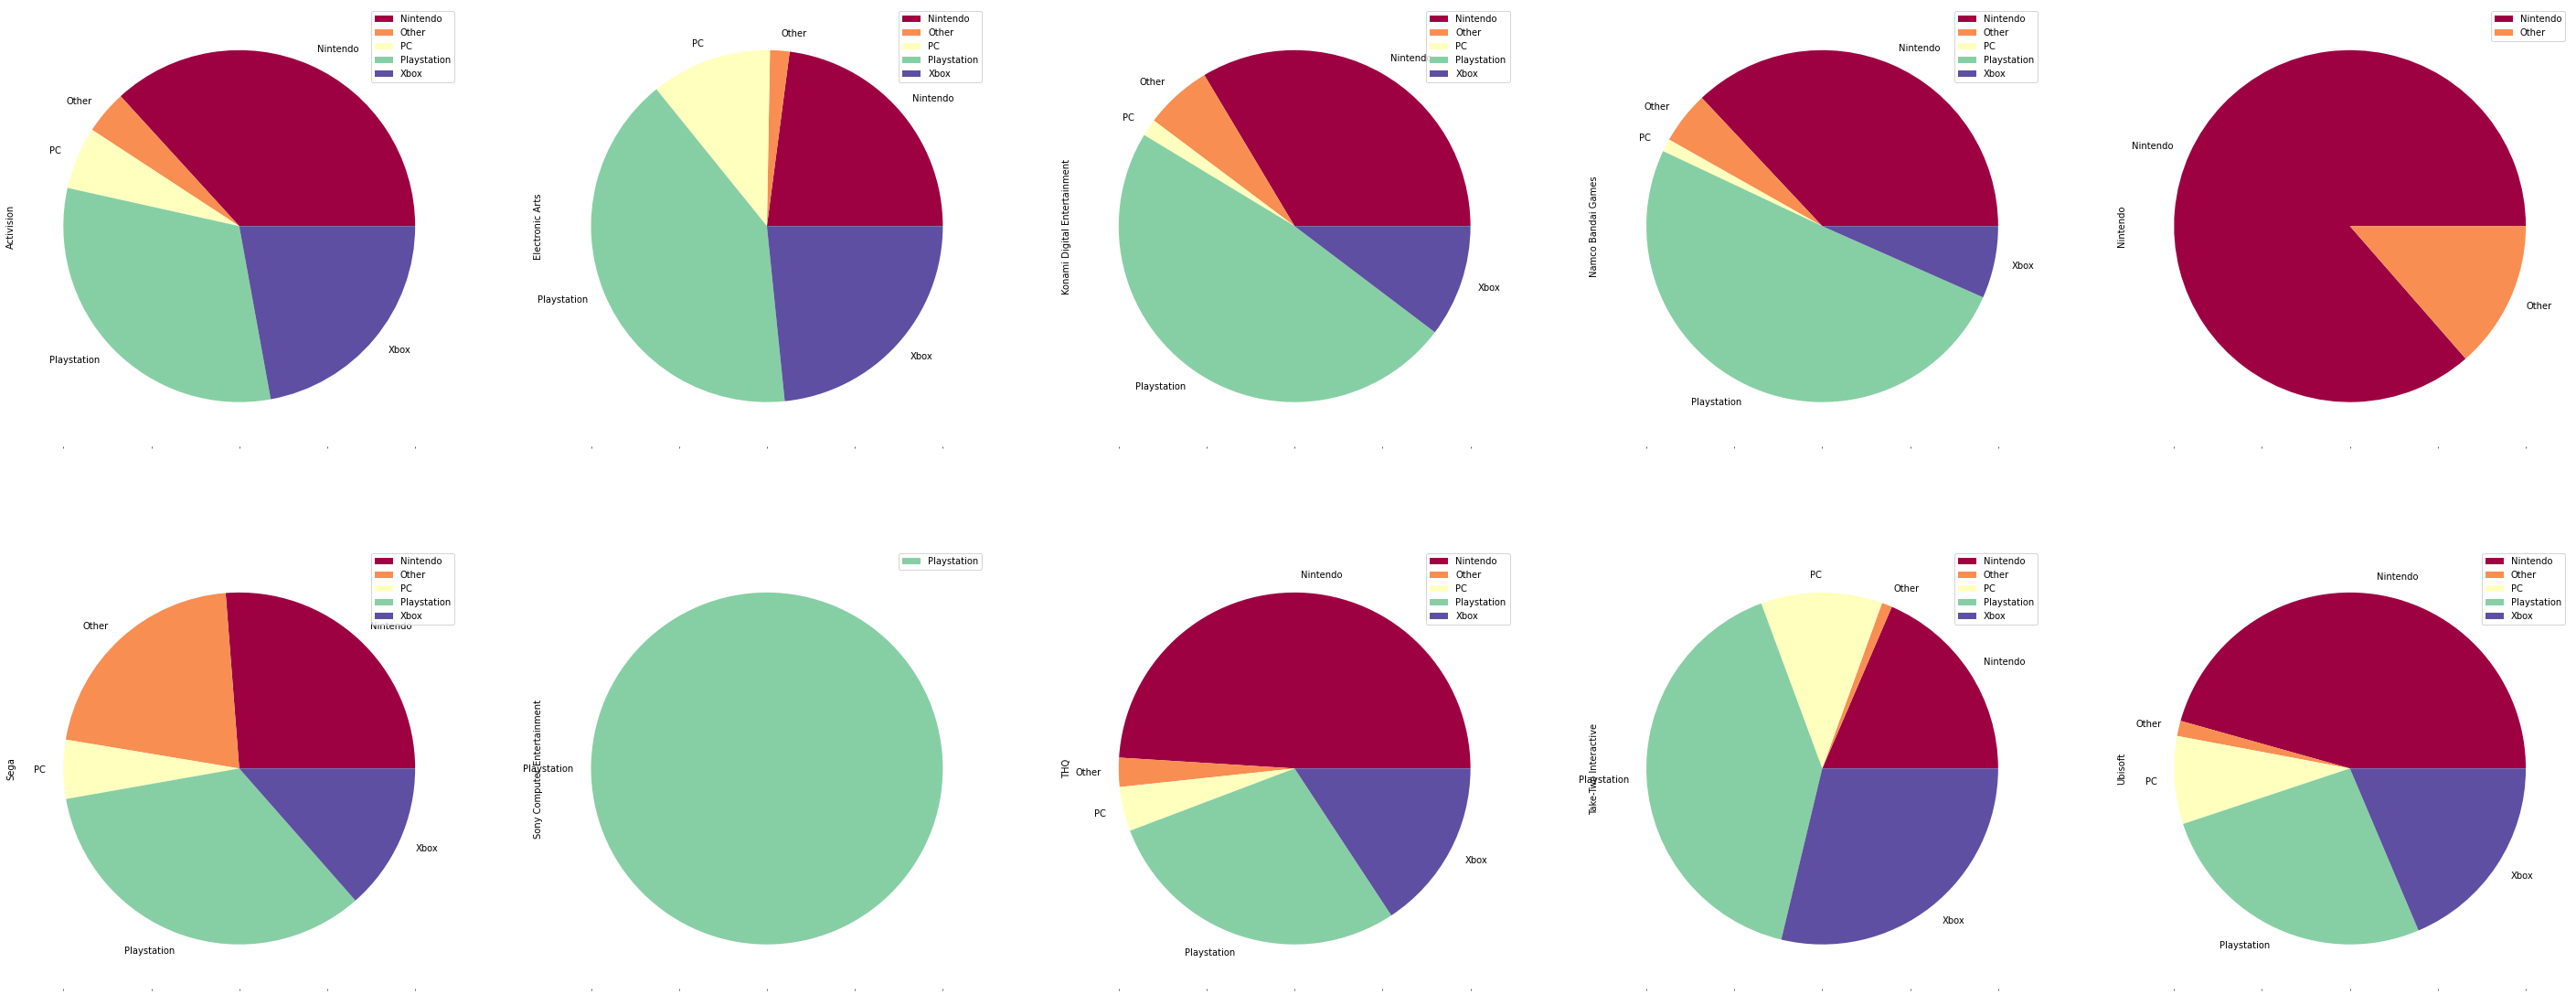

In [47]:
top_pubs = df['Publisher'].value_counts()[:10].index.tolist()
temp = df[df['Publisher'].isin(top_pubs)]

pub_game_dist = (temp.groupby(['Publisher', 'Platform_Family']).Platform_Family.count())
pub_game_dist.unstack().plot(kind='barh',stacked=True, colormap= 'Spectral', figsize=(20, 10))
pub_game_dist.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(20, 10))

pub_game_dist = (temp.groupby(['Platform_Family', 'Publisher']).Platform_Family.count())
pub_game_dist.unstack().plot(kind='pie', colormap= 'Spectral', figsize=(50, 20), subplots=True, layout=(2,5))

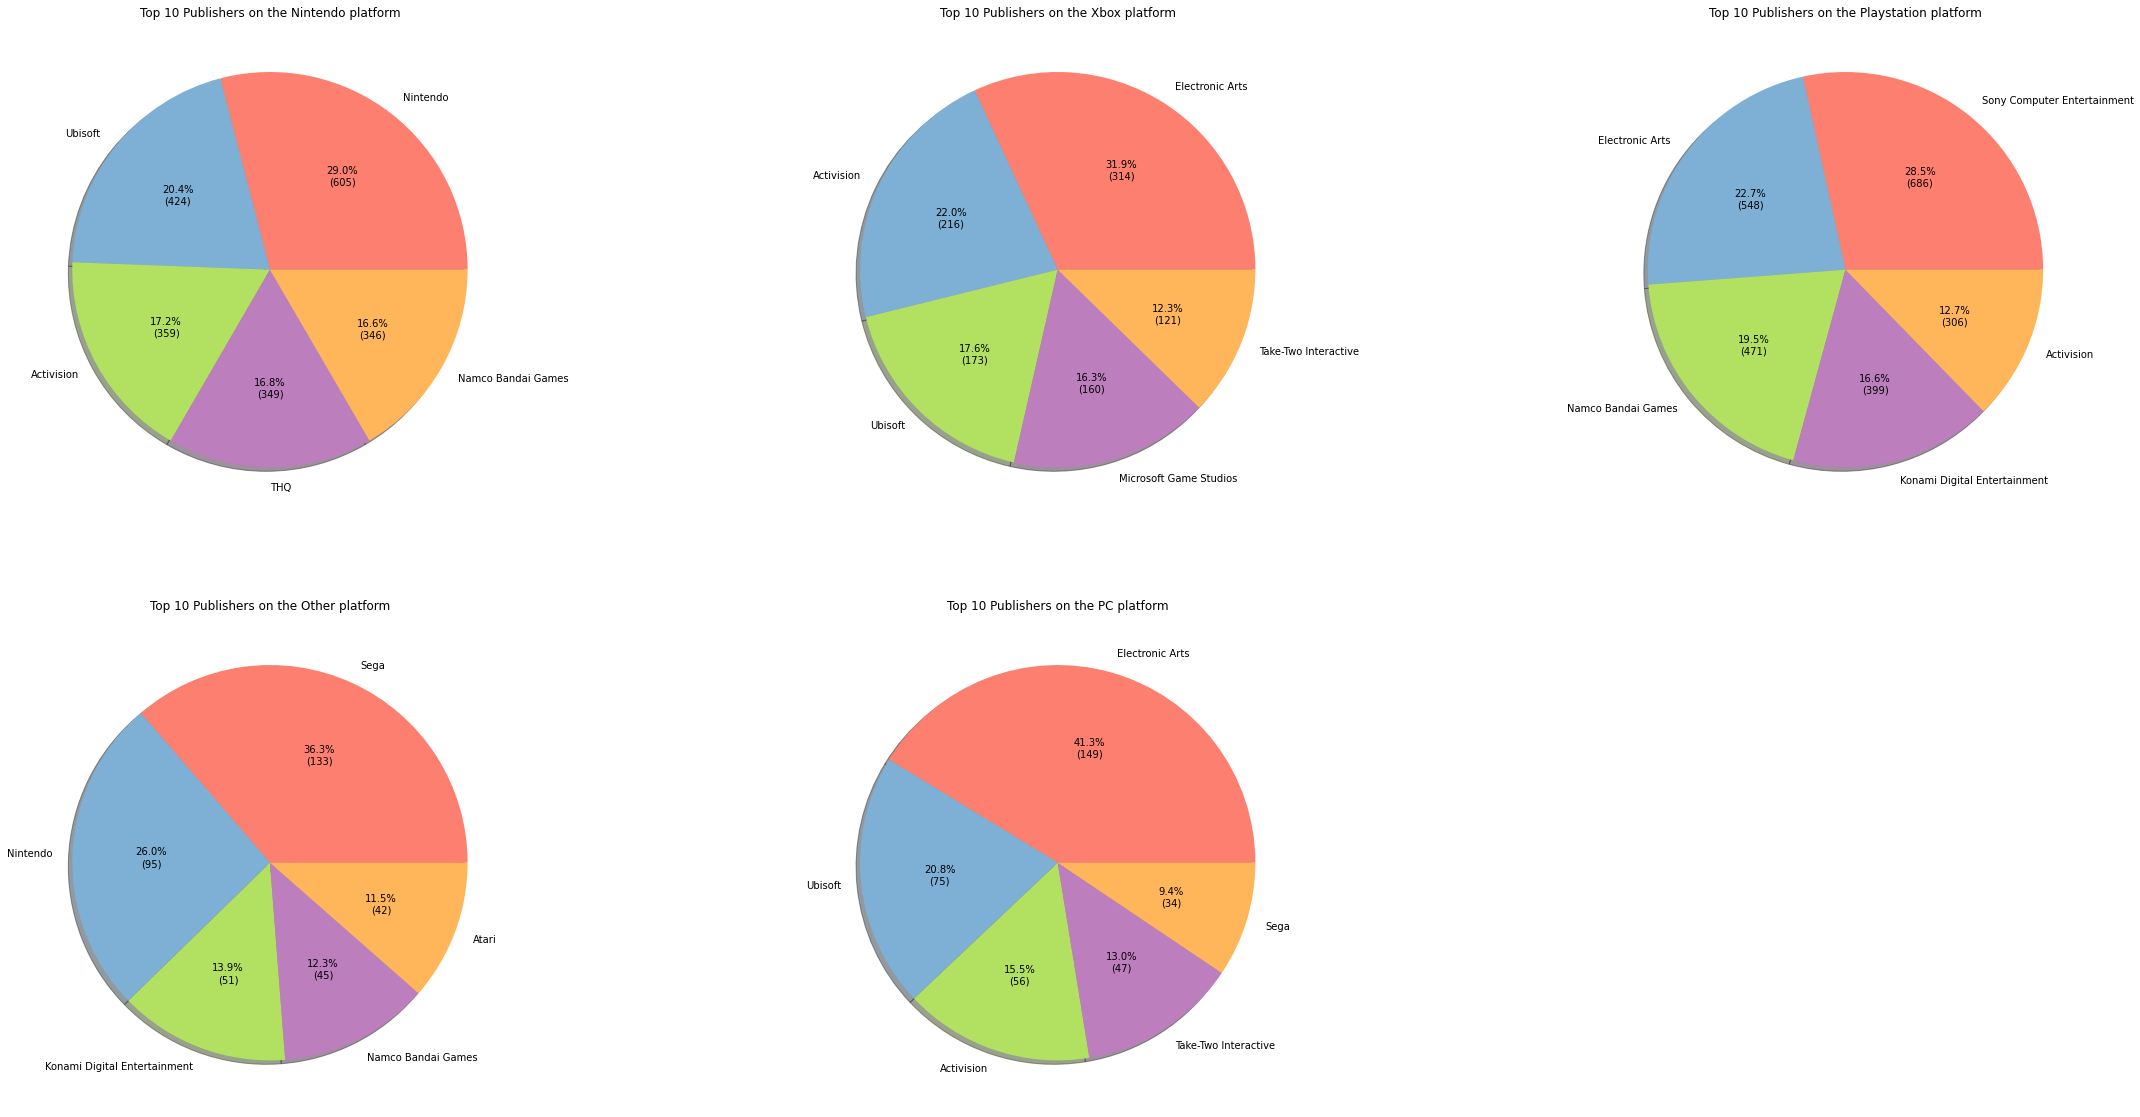

In [48]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(40, 20))
axs = axs.ravel()  # Flatten the array of axes for easy indexing

for i, platform in enumerate (platforms):
    x_axis = top_platform[platform].sort_values(ascending=False).keys().tolist()[:5]
    y_axis = top_platform[platform].sort_values(ascending=False).tolist()[:5]

    axs[i].pie(y_axis, labels=x_axis, autopct = format_pie(y_axis), colors = my_colors,shadow = True,wedgeprops = {'linewidth': 1})
    axs[i].set_title(f'Top {top_n} Publishers on the {platform} platform')

fig.delaxes(axs[5])
plt.show()

Aside from Sony, who exclusively makes games for Playstation, there seems to be a battle between Nintendo and Playstation for games made by the top publishers

### Conclusion
There's a lot to take in from this part. For one, it's clear that Nintendo has had the most overall success in terms of sales. The games with the highest user and critic ratings unexpectedly come from small game publishers that have only made a small number of games. When parsed to only include those who made many games, however, it is interesting to see none of the publishers who made the most sales and the most number of games crack the highest ratings, still going to relatively smaller publishers. The top publishers seem to have their own niche for genres, with the bigger studios with more games encompassing more genres. Finally, most top publishers prefer Nintendo and PlayStation as their go-to platforms.

## 3. Is there a correlation between User and Critic Score and Global Sales?

In quantifying the degree of relationship between "User_Score", "Critic_Score" to "Global_Sales", there are correlation types we can use. In this analysis, we will use both Pearson and Spearman correlation methods. Pearson assesses linear relationships, while Spearman is used for monotonic relationships. By comparing both, we can better understand the nature of the relationship between our variables.

In [49]:

filtered_data = df.dropna(subset=['Critic_Score', 'User_Score'])

# Compute Spearman's rho
rho_user_score = filtered_data['Global_Sales'].corr(filtered_data['User_Score'], method='spearman')
rho_critic_score = filtered_data['Global_Sales'].corr(filtered_data['Critic_Score'], method='spearman')

# Compute Pearson's r
r_user_score = filtered_data['Global_Sales'].corr(filtered_data['User_Score'], method='pearson')
r_critic_score = filtered_data['Global_Sales'].corr(filtered_data['Critic_Score'], method='pearson')

correlation_df = pd.DataFrame({
    'Global Sales Correlation': ['User Score', 'Critic Score', 'User Score', 'Critic Score'],
    'Correlation Coefficient': [rho_user_score, rho_critic_score, r_user_score, r_critic_score],
    'Correlation Type': ['Spearman', 'Spearman', 'Pearson', 'Pearson']
})

print(correlation_df)

  Global Sales Correlation  Correlation Coefficient Correlation Type
0               User Score                 0.155902         Spearman
1             Critic Score                 0.380266         Spearman
2               User Score                 0.088272          Pearson
3             Critic Score                 0.237126          Pearson


Spearman has the higher correlation coefficient for both User and Critic Score. This suggests a monotonic but not necessarily linear relationship. 

Moving forward, Spearman Correlation will be used for interpretation.

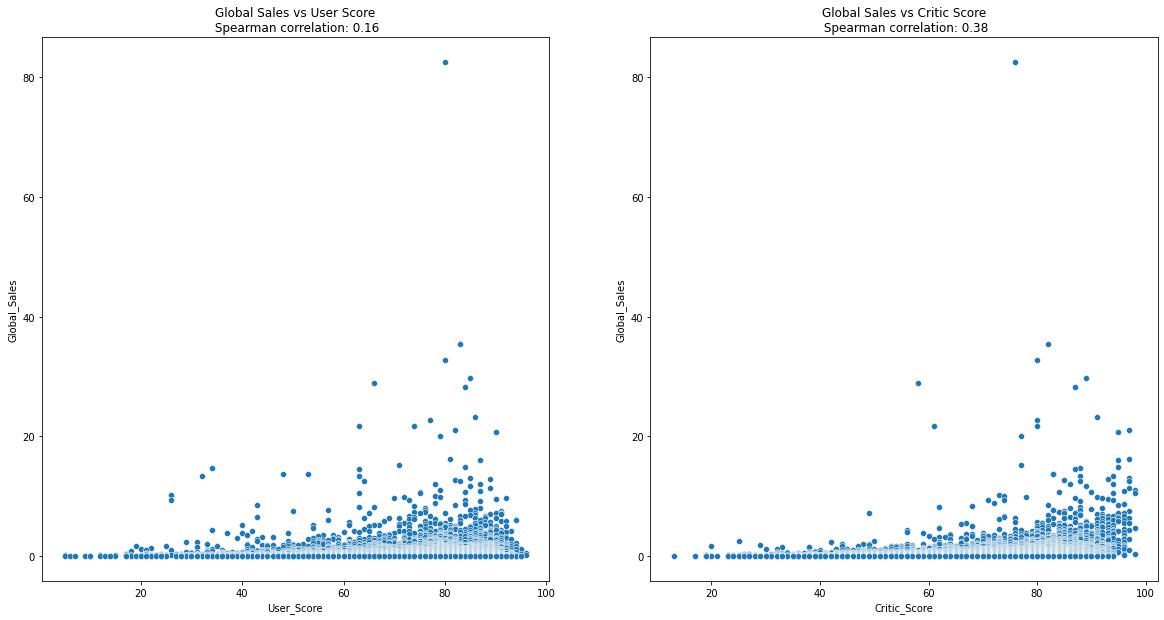

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
# Scatter plot for Global_Sales and User_Score
sns.scatterplot(x='User_Score', y='Global_Sales', data=filtered_data, ax=axes[0])
axes[0].set_title(f'Global Sales vs User Score\n Spearman correlation: {rho_user_score:.2f}')

# Scatter plot for Global_Sales and Critic_Score
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=filtered_data, ax=axes[1])
axes[1].set_title(f'Global Sales vs Critic Score\n Spearman correlation: {rho_critic_score:.2f}')

plt.show()

### Interpreting Spearman's Correlation

Let us base our interpretation of Spearman's Correlation from [this table](https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf) at page 2.

<table>
<tr>
<th> Spearman's Correlation</th>
<th> Interpretation </th>
</tr>
<tr>
<td> 0.0 - 0.19 </td>
<td> Very Weak </td>
</tr>
<tr>
<td> 0.20 - 0.39 </td>
<td> Weak </td>
</tr>
<tr>
<td> 0.40 - 0.59 </td>
<td> Moderate </td>
</tr>
<tr>
<td> 0.60 - 0.79 </td>
<td> Strong </td>
</tr>
<tr>
<td> > 0.80 - 1.0 </td>
<td> Very Strong </td>
</tr>
</table>

### Conclusion
Using the Spearman Correlation, there is a very weak positive relationship between the global sales and the user score, while there is a weak positive correlation between the global sales and the critic score.

## Exploratory Data Analysis Midpoint
Throughout our exploratory data analysis, we've delved into various facets of the dataset, gaining insights into the roles played by different variables such as Genre, Platform, Publisher, and Year of Release. While each of these aspects offers valuable perspectives, it's important to narrow our focus for the remainder of this analysis.

In light of this, we will now zoom in on specific variables that exhibit significant relationships within the dataset. Specifically, we will direct our attention to understanding the intricate connections between Genre, Year of Release, and ESRB Ratings, shedding light on how these elements collectively contribute to the evolving landscape of the video game industry.

### Genre and Release Year
Video game Genre is a fundamental attribute that reflects the content and gameplay style of a game. It is a crucial factor influencing consumer choice. Analyzing genres can help us understand which types of games tend to be more popular at different points in time, contributing to market analysis and strategic decision-making.

Year of Release is a critical variable in the video game industry. It provides a temporal dimension, allowing us to observe trends, shifts, and evolution over time. Analyzing how game releases have changed over the years can reveal crucial insights into the industry's growth and changing consumer preferences.

An exploration of these factors offers insights into the evolution of gaming content, trends, and audience preferences over the decades.

### Association with ESRB rating
ESRB Ratings reflect the content appropriateness of a game for different age groups. Understanding how ESRB Ratings are distributed across genres and how they have evolved over the years can provide insights into shifts in content standards, consumer expectations, and regulatory changes. It can also help assess the impact of ratings on game sales.

While numerous elements can shape a game's ESRB rating, we're interested in discerning patterns in how genres and their associated ESRB ratings have evolved over the years. Has the rating landscape for certain genres transformed as the years progressed? Do specific eras showcase a bias towards particular ESRB ratings for certain genres? Can we identify clear patterns between the release year, genre, and ESRB ratings?

From this point forward, we will be focusing on asking EDA questions that focus on these three variables.

## 4. What are the Trend of Genres Overtime?

### Which Genres Were Most Games Made Of?

In [51]:
df['Genre'].describe()

count 16411
unique 12
top Action
freq 3306
Name: Genre, dtype: object

<Axes: >

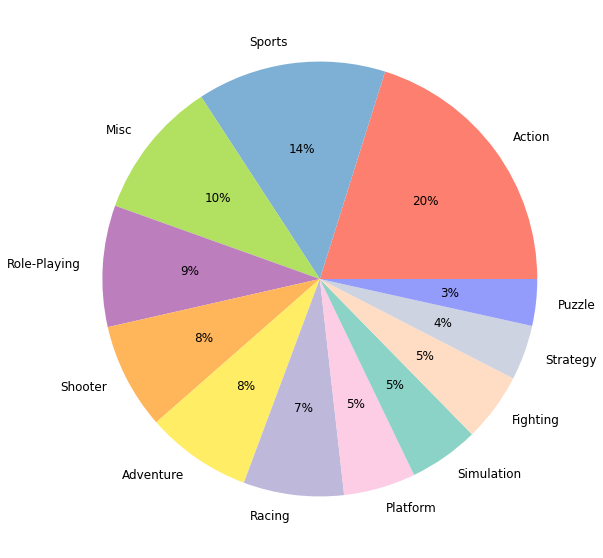

In [52]:
df['Genre'].value_counts().plot(kind='pie', figsize=(10,10), fontsize=12, autopct='%1.0f%%', ylabel='', colors=my_colors)

The "Action" genre is the most released type of genre in games taking about 20% of the total size of the dataset.

### How has the frequency of game releases per Genre evolved over the years?

In [53]:
frequency_over_years = df.groupby(['Release_Year', 'Genre']).size().unstack()

frequency_over_years.describe()


Genre 
 Action 
 Adventure 
 Fighting 
 Misc 
 Platform 
 Puzzle 
 Racing 
 Role-Playing 
 Shooter 
 Simulation 
 Sports 
 Strategy 
 
 
 
 
 count 
 37.000000 
 28.000000 
 29.000000 
 31.000000 
 36.000000 
 34.000000 
 32.00000 
 31.000000 
 36.000000 
 30.000000 
 37.000000 
 26.000000 
 
 
 mean 
 89.351351 
 46.107143 
 28.862069 
 54.741935 
 24.388889 
 16.735294 
 38.28125 
 47.774194 
 36.000000 
 28.466667 
 62.297297 
 25.846154 
 
 
 std 
 96.752323 
 47.285844 
 17.636659 
 67.035795 
 24.763196 
 20.769017 
 34.41327 
 38.026929 
 34.012603 
 33.697164 
 64.070649 
 18.486086 
 
 
 min 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.00000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 2.000000 
 
 
 25% 
 5.000000 
 12.750000 
 18.000000 
 5.000000 
 5.750000 
 3.000000 
 2.75000 
 13.000000 
 3.000000 
 7.250000 
 4.000000 
 13.250000 
 
 
 50% 
 40.000000 
 30.000000 
 29.000000 
 26.000000 
 13.500000 
 7.500000 
 28.50000 
 41.000000 
 25.000000 
 18.000000 
 52.000000 
 20.500000 
 
 
 75% 
 184.000000 
 62.750000 
 43.000000 
 60.000000 
 36.250000 
 18.750000 
 71.00000 
 78.000000 
 70.000000 
 33.250000 
 106.000000 
 36.500000 
 
 
 max 
 272.000000 
 166.000000 
 56.000000 
 212.000000 
 87.000000 
 79.000000 
 109.00000 
 112.000000 
 96.000000 
 123.000000 
 200.000000 
 67.000000

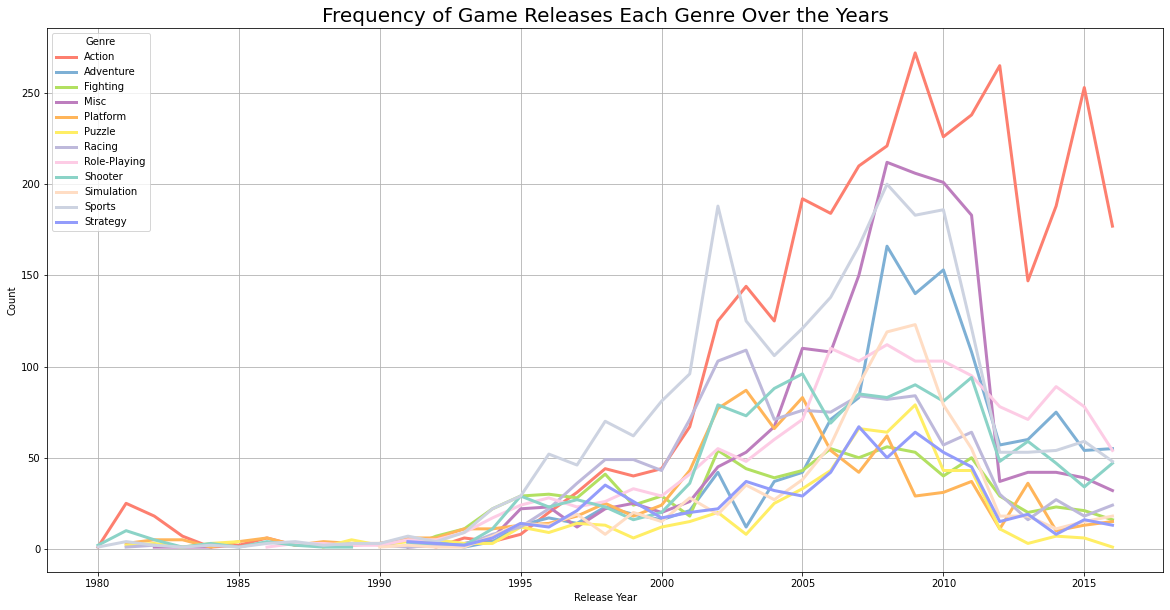

In [54]:
frequency_over_years.plot(figsize=(20,10), grid=True, color=my_colors, linewidth=3)
plt.ylabel('Count')
plt.xlabel('Release Year')
plt.title('Frequency of Game Releases Each Genre Over the Years', fontsize=20)
plt.show()

You can see from this line chart that some genres like Action, Shooter, and Role-Playing saw significant growth in game releases over the years. But for other genres like Puzzle and Platform, they saw a decline in releases. The trends suggest a genre's popularity and gamers' preferences evolved over the decades, with genres like Shooter becoming more popular. There is also an upward trend in the number of games released beyond 1995, as well as a decline after 2010.

### Which Genres sold the best in terms of global sales overtime?

<Axes: xlabel='Release_Year'>

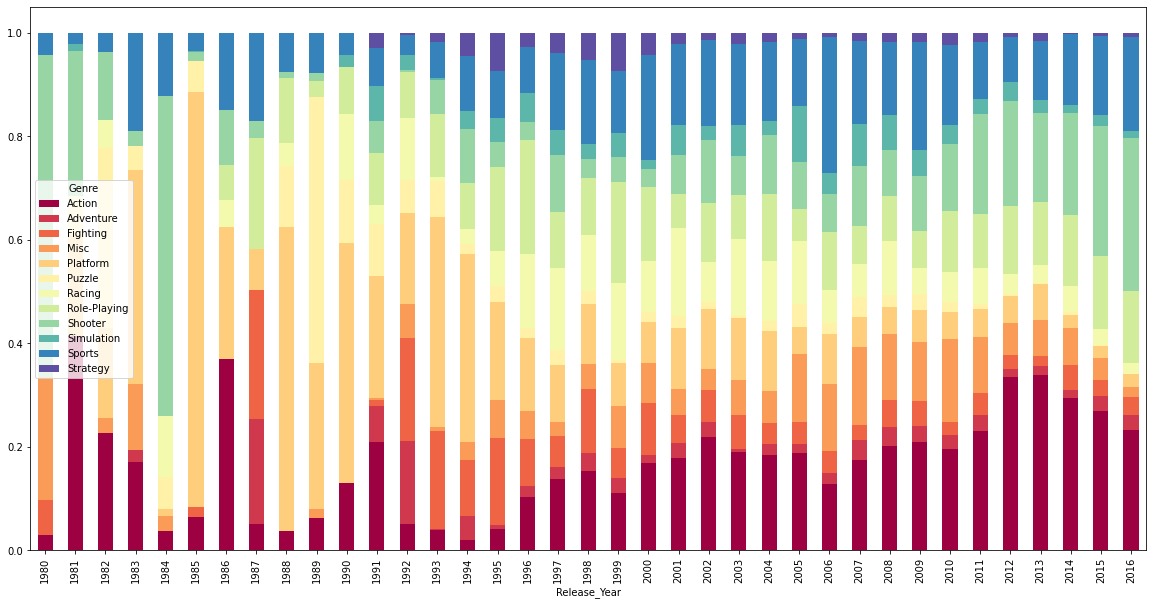

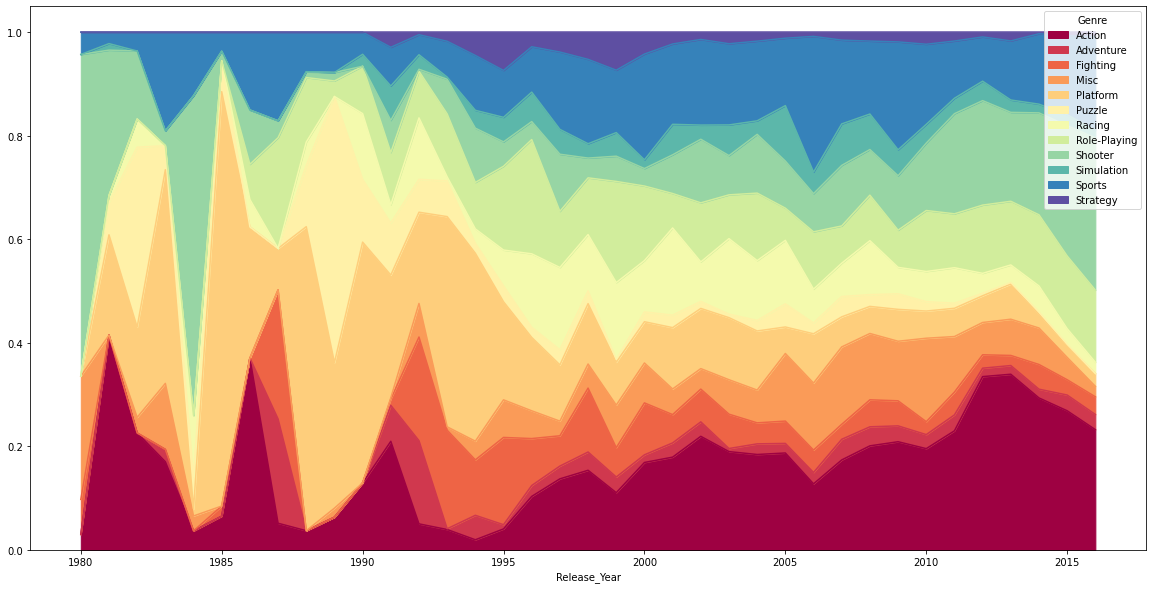

In [55]:
# Which Genres Sold the best overtime?
rating_sales_percentages_by_year = (df.groupby(['Release_Year', 'Genre']).Global_Sales.sum())/df.groupby(['Release_Year']).Global_Sales.sum()
rating_sales_percentages_by_year.unstack().plot(kind='bar',stacked=True, colormap= 'Spectral', figsize=(20, 10))
rating_sales_percentages_by_year.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(20, 10))

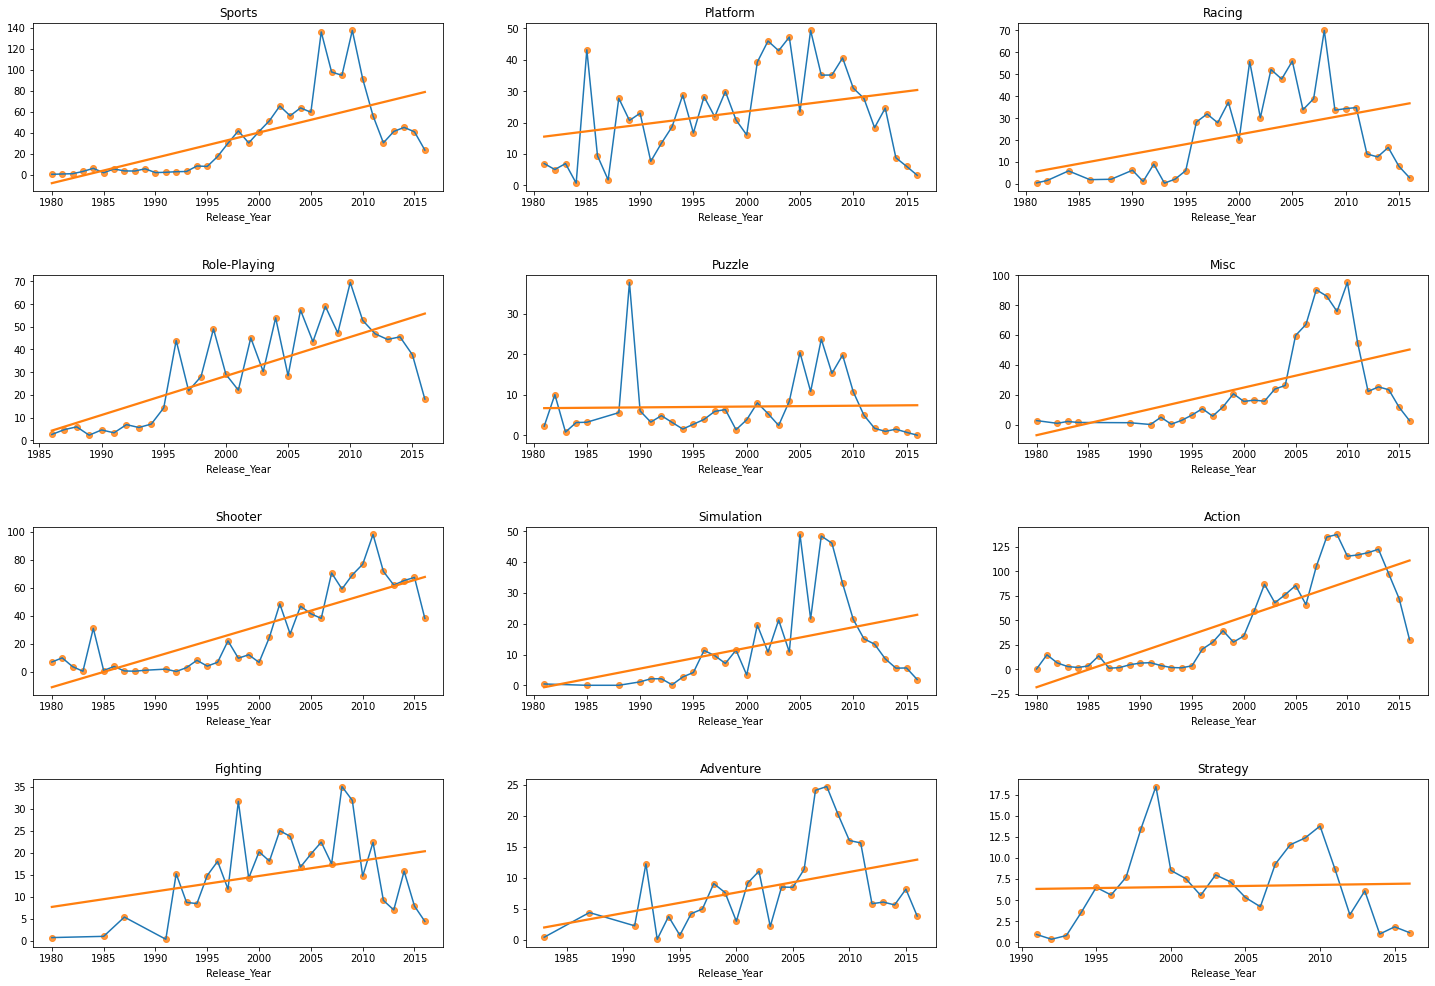

In [56]:
# Get unique genres
unique_genres = df['Genre'].unique()
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(25,17), gridspec_kw={'hspace': 0.5})
row = 0
index = 0

# Get each genre
for genre in unique_genres:
    genre_data = df[df['Genre'] == genre]
    
    # Get the global sales of the chosen genre
    genre_sales_per_year = genre_data.groupby('Release_Year').Global_Sales.sum()
    genre_sales_per_year.plot(ax=ax[row,index], title=genre)

    #Add a regression line
    sns.regplot(x=genre_sales_per_year.index, y=genre_sales_per_year.values, ax=ax[row, index], ci=None)
    index += 1
    if index == 3:
        row += 1
        index = 0

We could see that there are a handful of genres that have spikes in sales in some years and have an inconsistent trend. Take for instance, the *Strategy* genre; Its regression line struggles to represent its trend due to having multiple fluctuations in sales. Moreover, based on both the stacked bar chart and the line graph, strategy games have the least amount of sales along the years, while action games have the most amount of sales alongside with a consistent trend throughout the years. 

           Genre  Mean_Global_Sales  Std_Global_Sales
1      Adventure           0.180674          0.505795
11      Strategy           0.256979          0.522677
2       Fighting           0.528829          0.954169
0         Action           0.519543          1.153846
9     Simulation           0.454251          1.198749
3           Misc           0.461514          1.321628
5         Puzzle           0.422373          1.577094
6         Racing           0.590767          1.671465
7   Role-Playing           0.628528          1.719232
8        Shooter           0.803881          1.831543
10        Sports           0.568495          2.100021
4       Platform           0.940615          2.587494


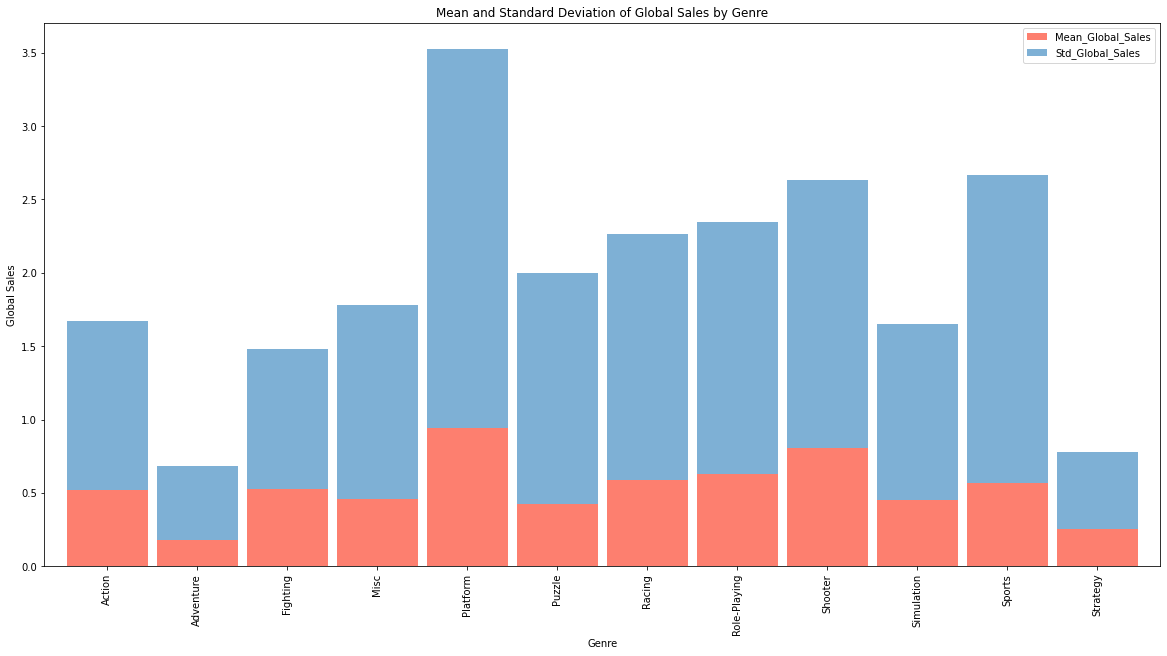

In [57]:
# Analyze the dispersion and central tendency of each genre

# Display the mean and std per genre
genre_stats = df.groupby('Genre').agg(
    Mean_Global_Sales=pd.NamedAgg(column='Global_Sales', aggfunc='mean'),
    Std_Global_Sales=pd.NamedAgg(column='Global_Sales', aggfunc='std')
).reset_index()

print(genre_stats.sort_values(by='Std_Global_Sales'))
genre_stats.plot(kind='bar',stacked=True, color=my_colors, figsize=(20, 10), x='Genre', width=0.9)
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Mean and Standard Deviation of Global Sales by Genre')
plt.show()

The dispersion of global sales for each genre is very high, we could show this via a violin plot

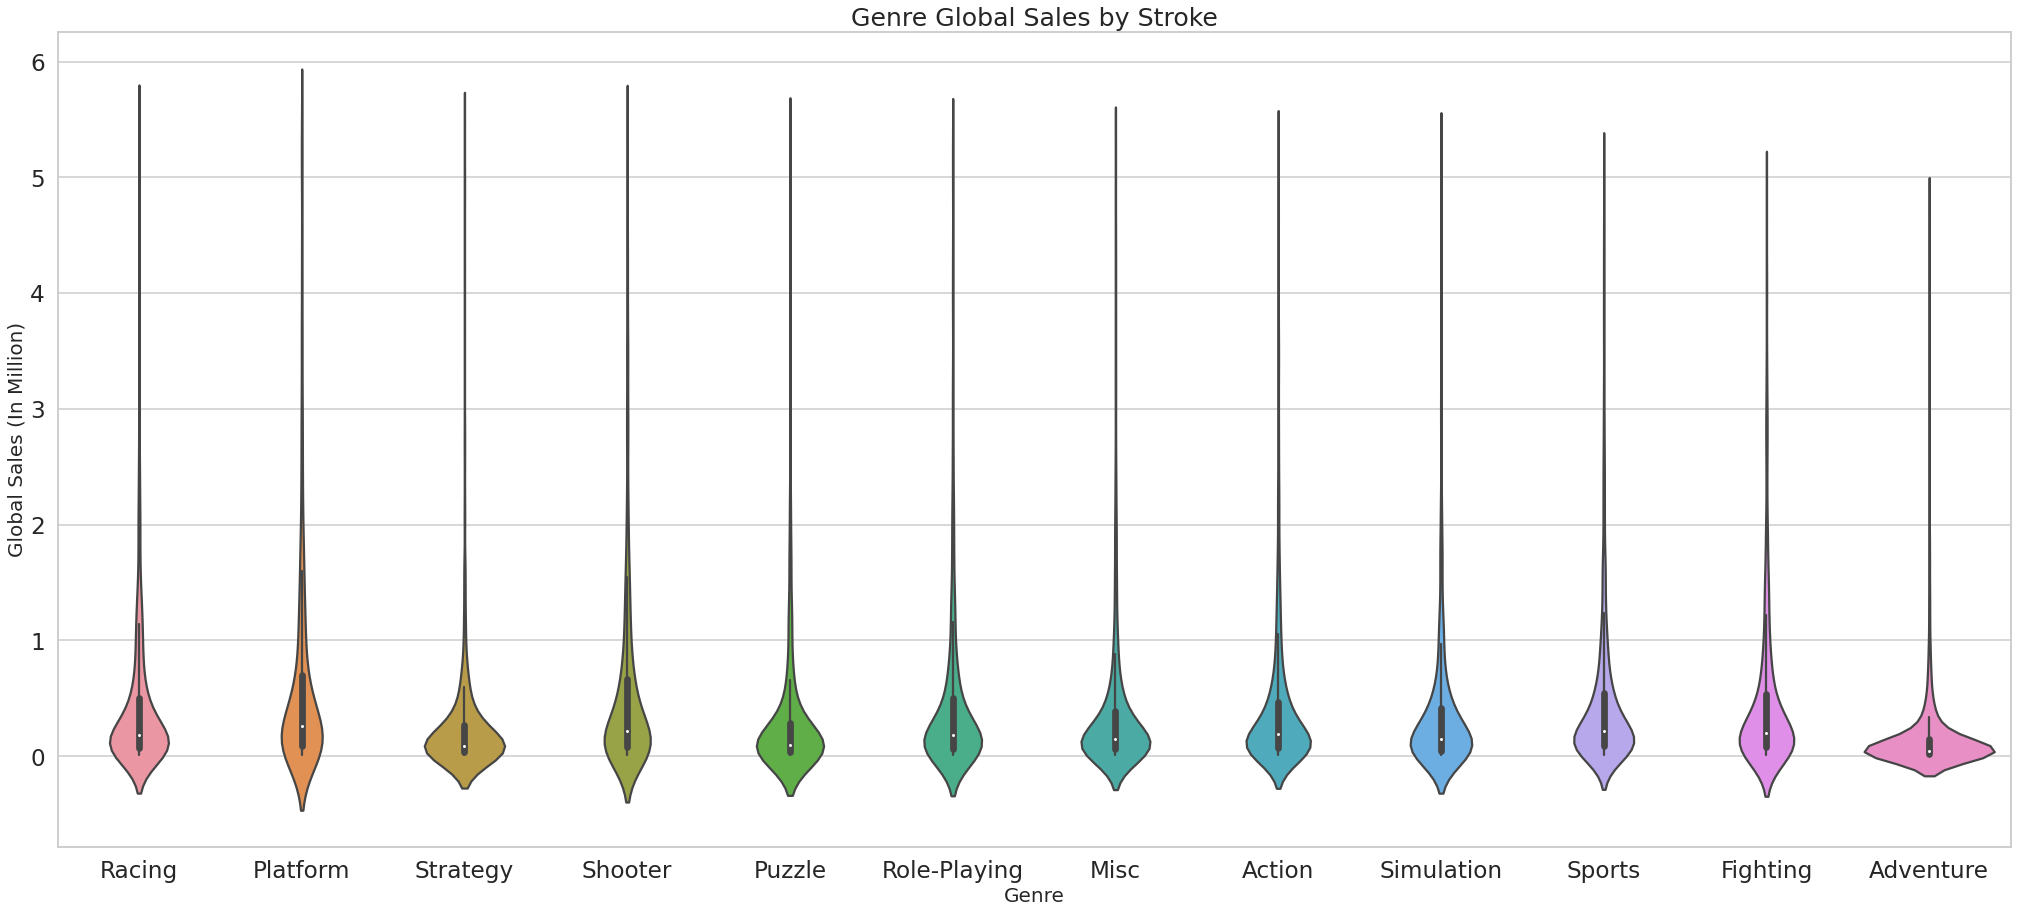

In [58]:
# Violin Plot
plt.figure(figsize=(35, 15))
temp = df.copy()

q = df["Global_Sales"].quantile(.99)
temp = temp[temp["Global_Sales"] < q]
sns.set(style="whitegrid", context="talk", font_scale=1.4)
sns.violinplot(x="Genre", y="Global_Sales", data=temp)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Global Sales (In Million)', fontsize=20)
plt.title('Genre Global Sales by Stroke')
plt.show()

To better visualize the violin plot, only the 99th quantile of data was taken. Despite this, the outliers for the global sales of each genre distorts the data thus making it difficult to see what genre's sold the best over time. To answer question, we must analyze both the line graph and the violin plot. Platforming games contain both the highest mean and standard deviation, the graph clearly shows fluctuating sales. Action and shooter games, on the other hand, have the most consistent trend visually up until 2014/2015. Thus, we could say that both of these genres have sold the best over time. 

The low amount of sales and releases for most games, roughly from the years 1980 to 2000 has bumped up the standard deviation. Although we could see that there are a handful sudden spikes for some genres within those years.

### Do Certain Genres Tend To Have Higher Scores?

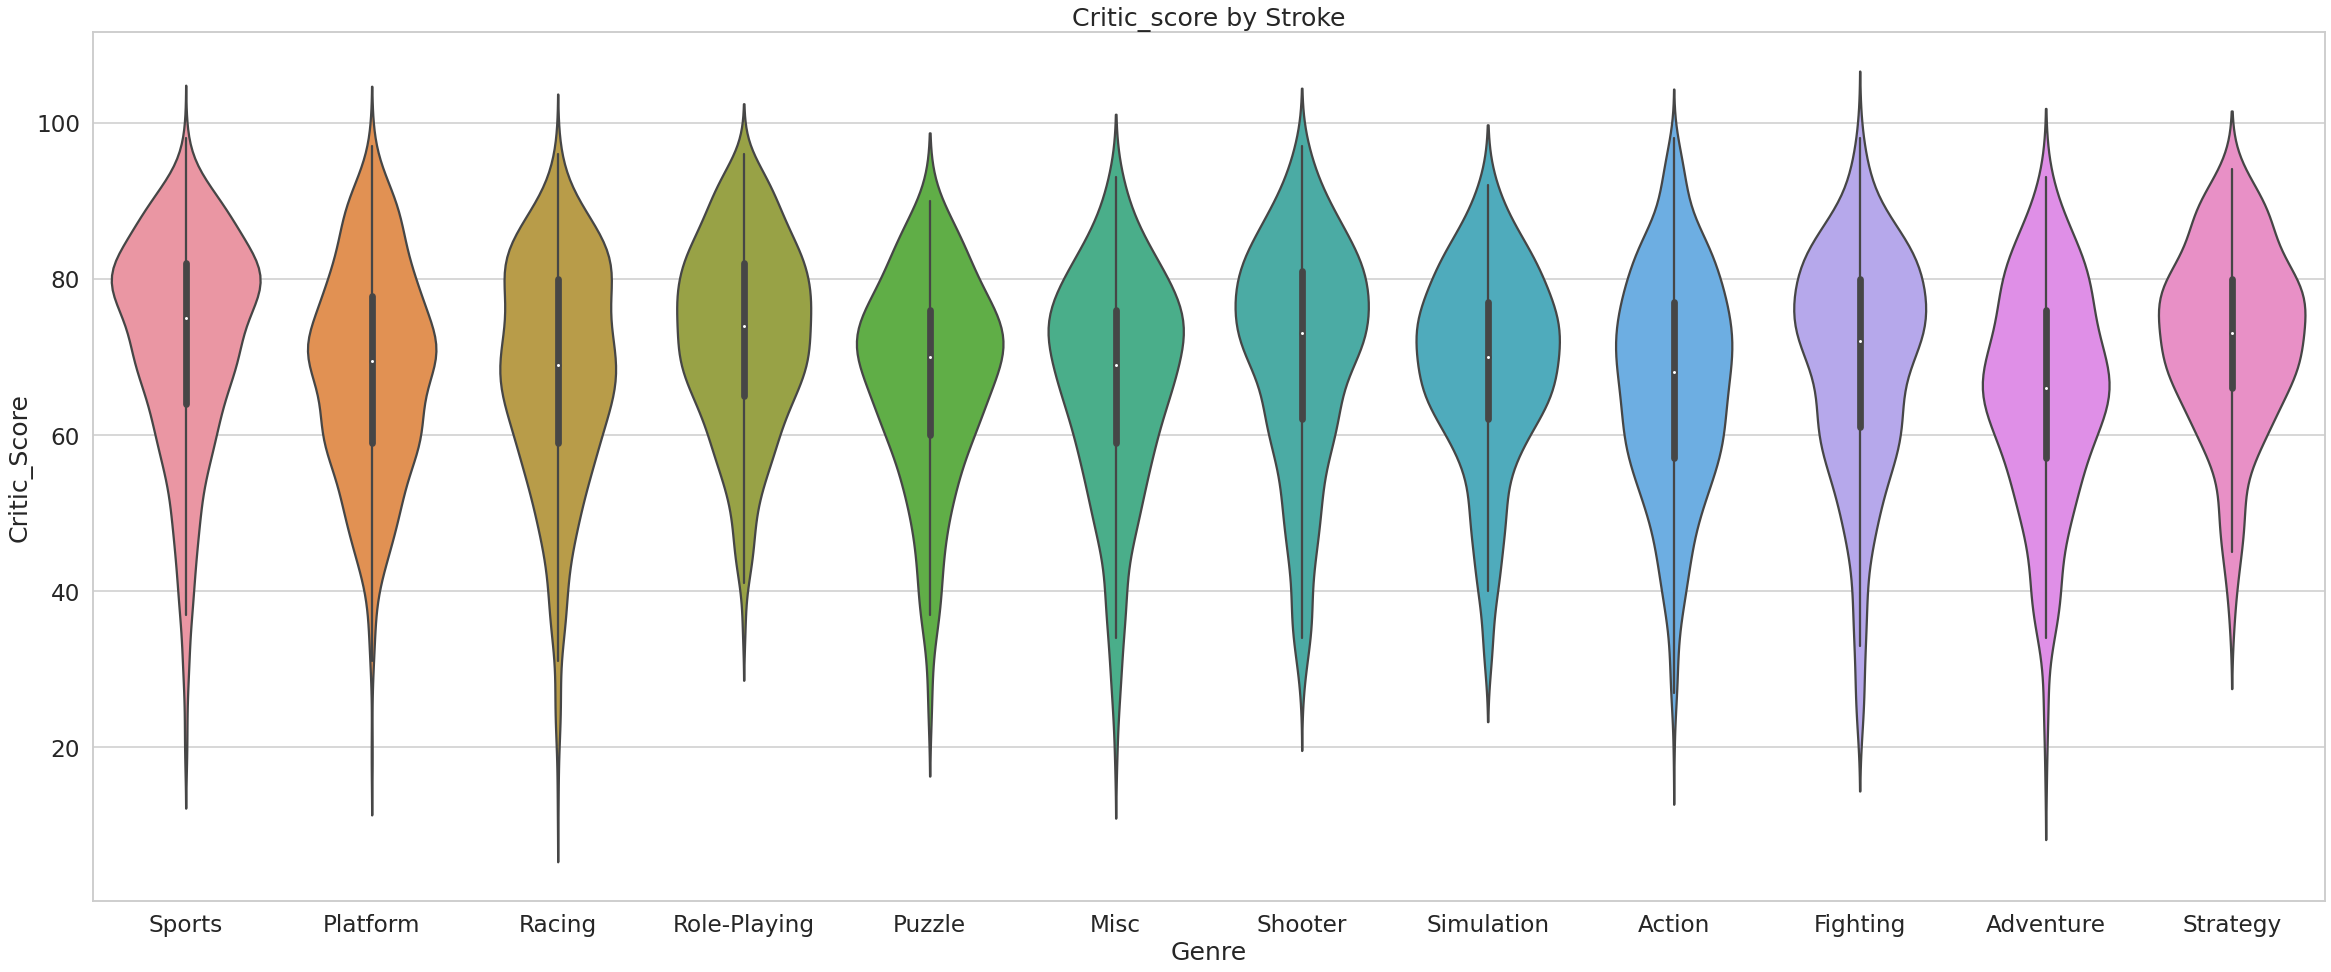

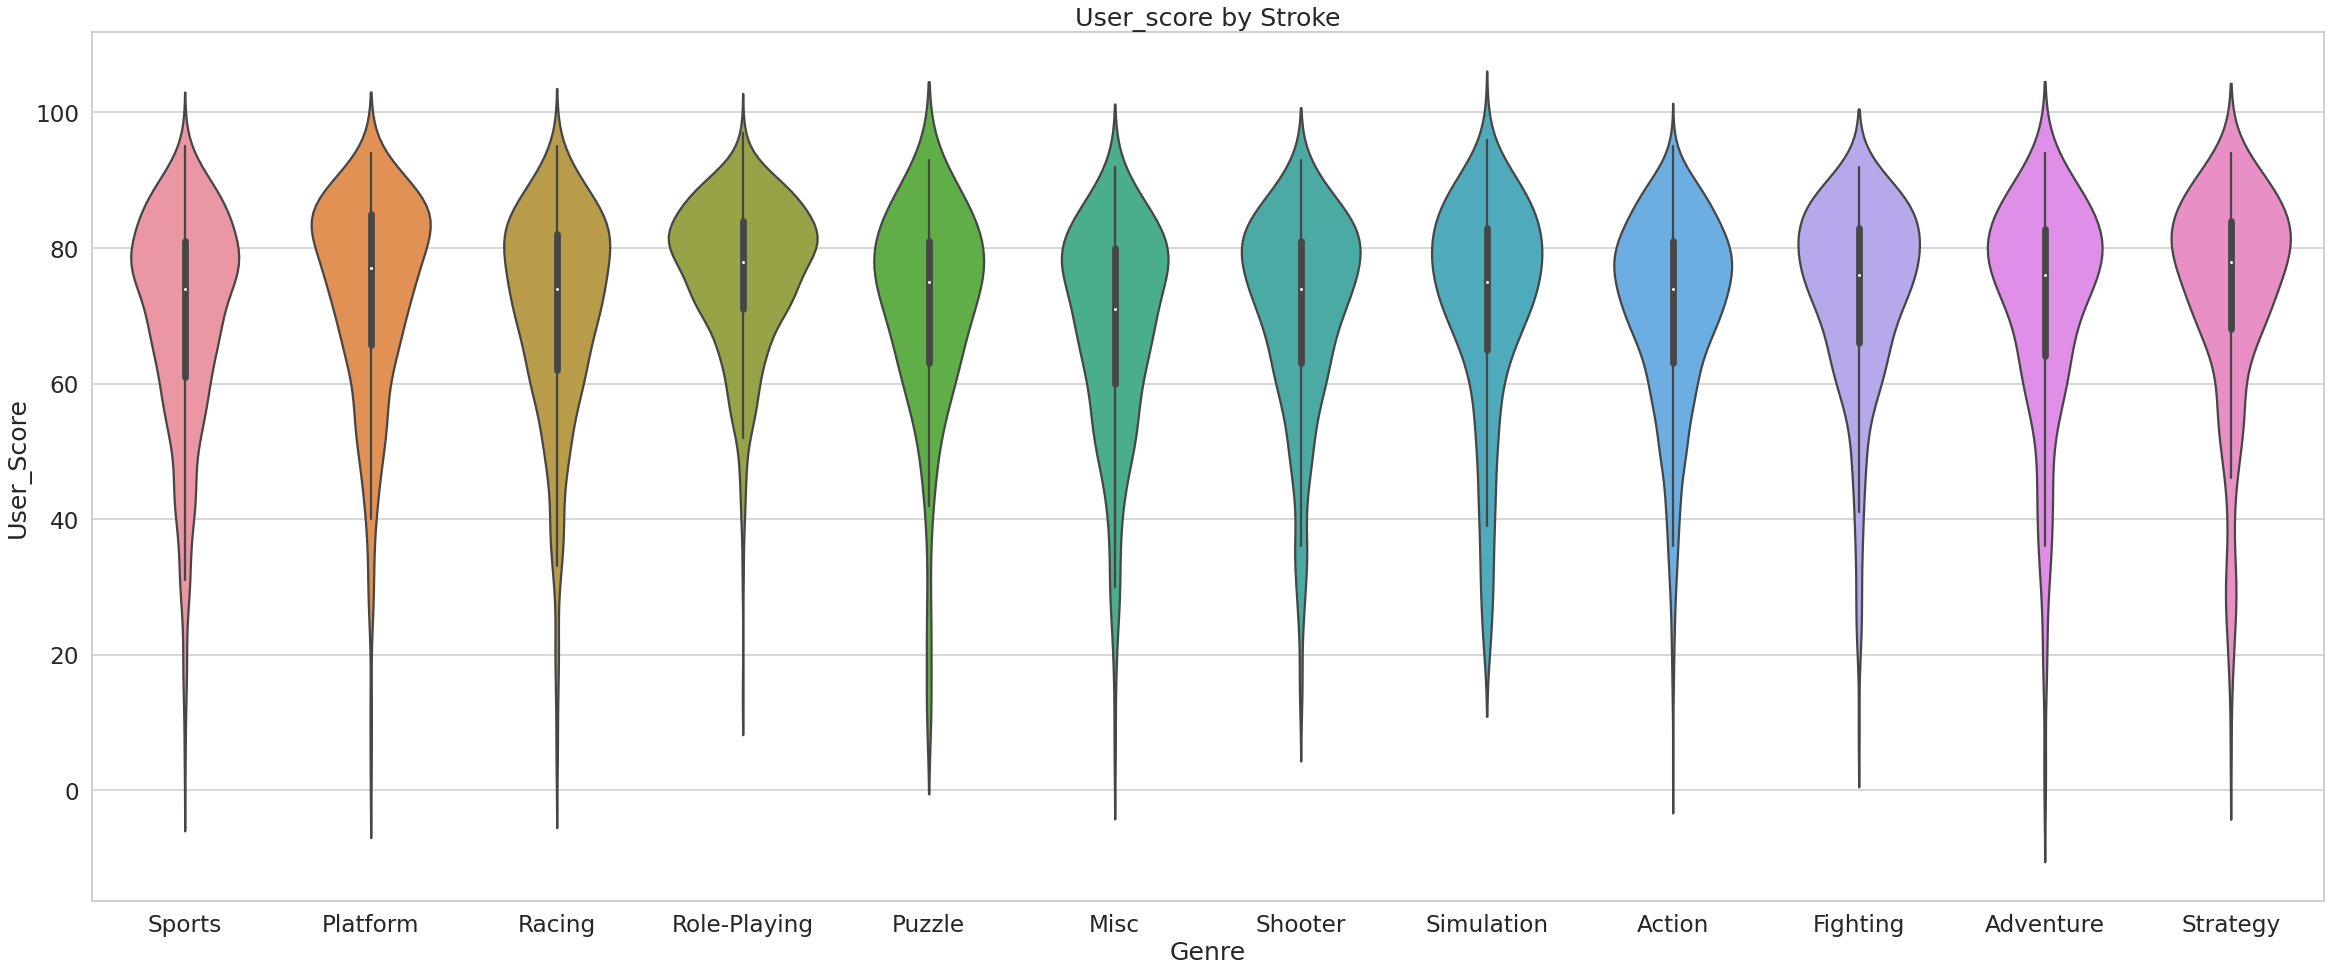

In [59]:
feature_list = ["Critic_Score", "User_Score"]
for feature in feature_list:
    plt.figure(figsize=(40, 16))
    sns.violinplot(x="Genre", y=feature, data=df)
    plt.title(f'{feature.capitalize()} by Stroke')
    plt.show()

Surprisingly, rating of games throughout different genres seem to be quite uniform for the most part for both users and critics. Critics seem to be a little harsher than users, having a higher frequency in the lower scores, nevertheless we can see that most games with ratings have a score of around 70-80.

### Conclusion
On paper, sales and made games are related, which makes sense as if there are more games in a genre, it is logical to think that there'll be more sales for that genre as each game adds up to its sales. Take for instance the action genre, it is the genre most games are made of and it also sells the most. We can also see there have been trends and dominance of certain genres, which seem very interesting to look at.

## 5. What is the total proportion of ESRB ratings in each genre?

In [60]:
genre_grouped = df.groupby('Genre')['ESRB_Rating'].value_counts().unstack().fillna(0)

ratings_proportion = (genre_grouped.div(genre_grouped.sum(axis=1), axis=0) * 100).round(2)
ratings_proportion

ESRB_Rating 
 E 
 E10+ 
 M 
 RP 
 T 
 
 
 Genre 
 
 
 
 
 
 
 
 
 
 Action 
 12.43 
 14.16 
 18.06 
 35.09 
 20.27 
 
 
 Adventure 
 12.47 
 5.19 
 7.59 
 65.92 
 8.83 
 
 
 Fighting 
 0.96 
 2.27 
 5.73 
 48.39 
 42.65 
 
 
 Misc 
 26.81 
 9.78 
 0.77 
 49.20 
 13.44 
 
 
 Platform 
 40.32 
 16.06 
 0.34 
 36.10 
 7.18 
 
 
 Puzzle 
 49.91 
 7.38 
 0.00 
 40.95 
 1.76 
 
 
 Racing 
 47.02 
 7.76 
 1.47 
 30.12 
 13.63 
 
 
 Role-Playing 
 5.60 
 7.49 
 10.87 
 48.01 
 28.02 
 
 
 Shooter 
 3.63 
 4.32 
 42.67 
 23.15 
 26.23 
 
 
 Simulation 
 37.47 
 5.50 
 0.59 
 34.66 
 21.78 
 
 
 Sports 
 50.37 
 4.56 
 0.69 
 35.92 
 8.46 
 
 
 Strategy 
 10.42 
 11.31 
 3.72 
 50.89 
 23.66

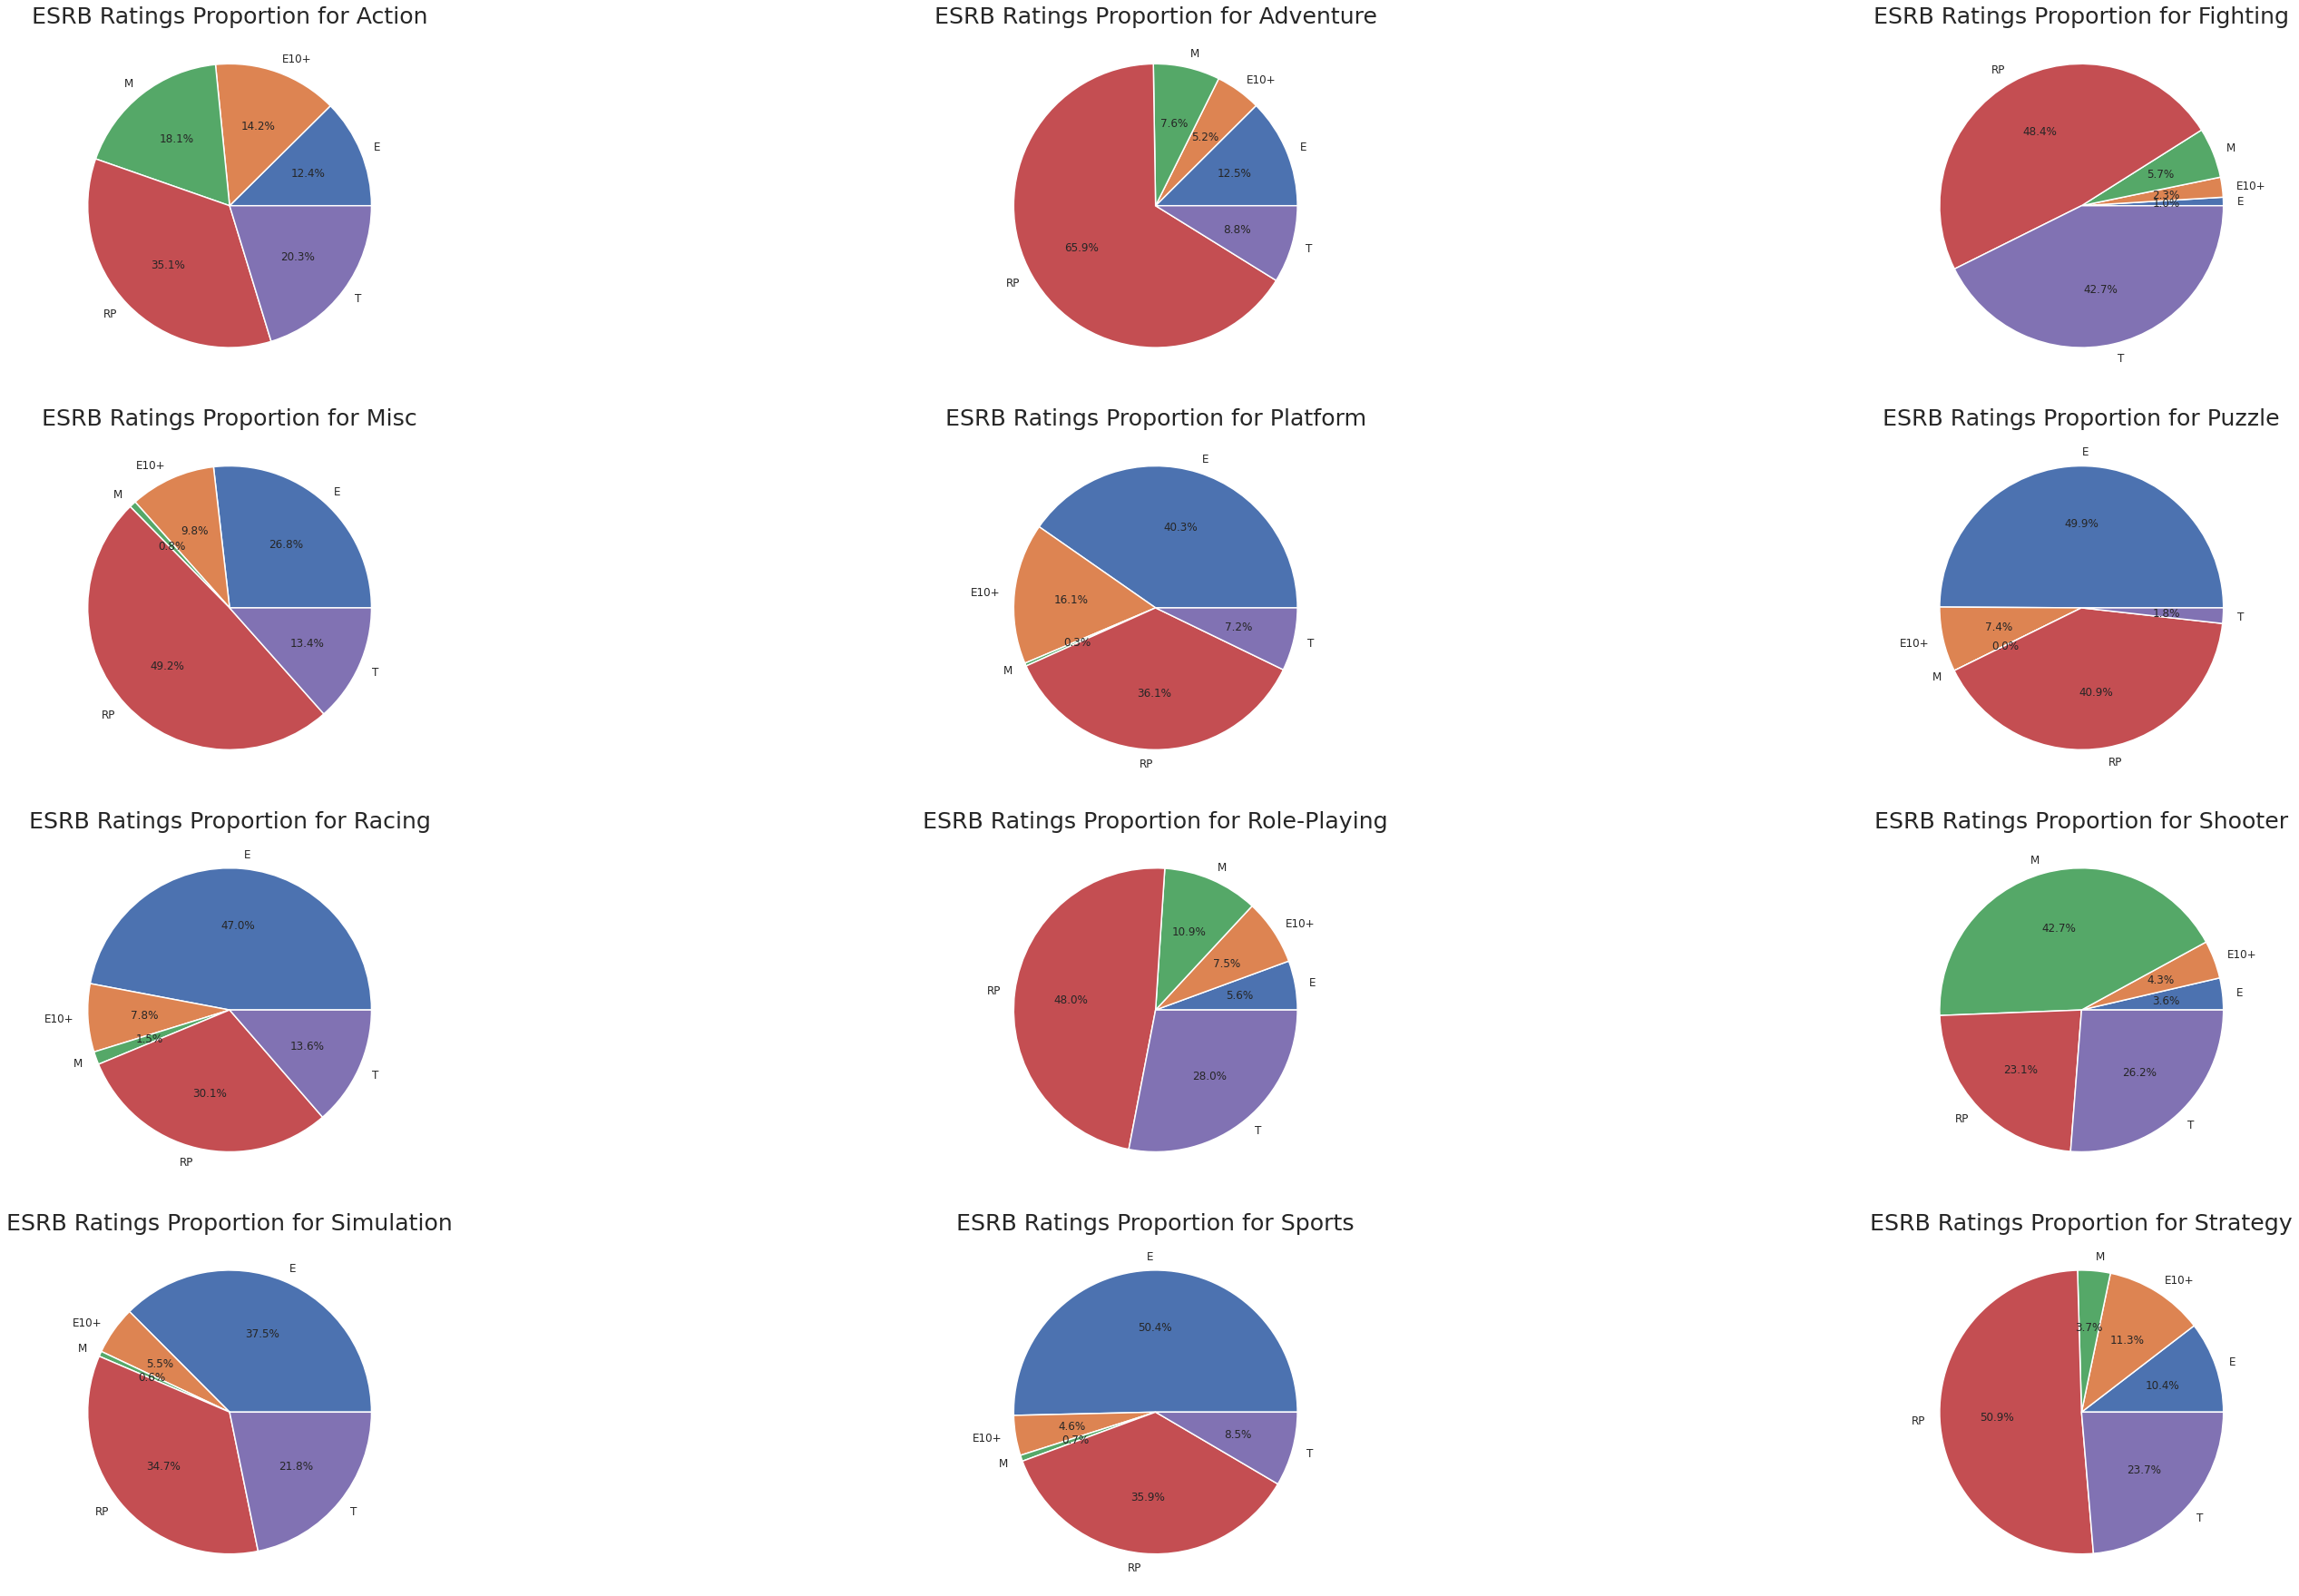

In [61]:
num_genres = len(ratings_proportion.index)
cols = 3
rows = num_genres // cols 
rows += num_genres % cols
position = range(1,num_genres + 1)

fig = plt.figure(figsize=(50,25))

for k, genre in zip(position, ratings_proportion.index):
    ax = fig.add_subplot(rows,cols,k)
    proportions = ratings_proportion.loc[genre]
    wedges, texts, autotexts = ax.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
    ax.set_title(f'ESRB Ratings Proportion for {genre}')

    plt.setp(autotexts, size=12)
    plt.setp(texts, size=12)

plt.tight_layout()
plt.show()

The proportion of "RP" ratings are high for all genres. As this rating will be explored later on, let us exclude the "RP" rating to better visualize actual ratings per genre.

In [62]:
no_rp = df[df['ESRB_Rating'] != 'RP'] 
genre_grouped = no_rp.groupby('Genre')['ESRB_Rating'].value_counts().unstack().fillna(0)

ratings_proportion = (genre_grouped.div(genre_grouped.sum(axis=1), axis=0) * 100).round(2)
ratings_proportion

ESRB_Rating 
 E 
 E10+ 
 M 
 T 
 
 
 Genre 
 
 
 
 
 
 
 
 
 Action 
 19.15 
 21.81 
 27.82 
 31.22 
 
 
 Adventure 
 36.59 
 15.23 
 22.27 
 25.91 
 
 
 Fighting 
 1.85 
 4.40 
 11.11 
 82.64 
 
 
 Misc 
 52.78 
 19.26 
 1.51 
 26.45 
 
 
 Platform 
 63.10 
 25.13 
 0.53 
 11.23 
 
 
 Puzzle 
 84.52 
 12.50 
 0.00 
 2.98 
 
 
 Racing 
 67.29 
 11.10 
 2.10 
 19.51 
 
 
 Role-Playing 
 10.78 
 14.42 
 20.91 
 53.90 
 
 
 Shooter 
 4.72 
 5.62 
 55.52 
 34.14 
 
 
 Simulation 
 57.35 
 8.42 
 0.90 
 33.33 
 
 
 Sports 
 78.61 
 7.11 
 1.08 
 13.20 
 
 
 Strategy 
 21.21 
 23.03 
 7.58 
 48.18

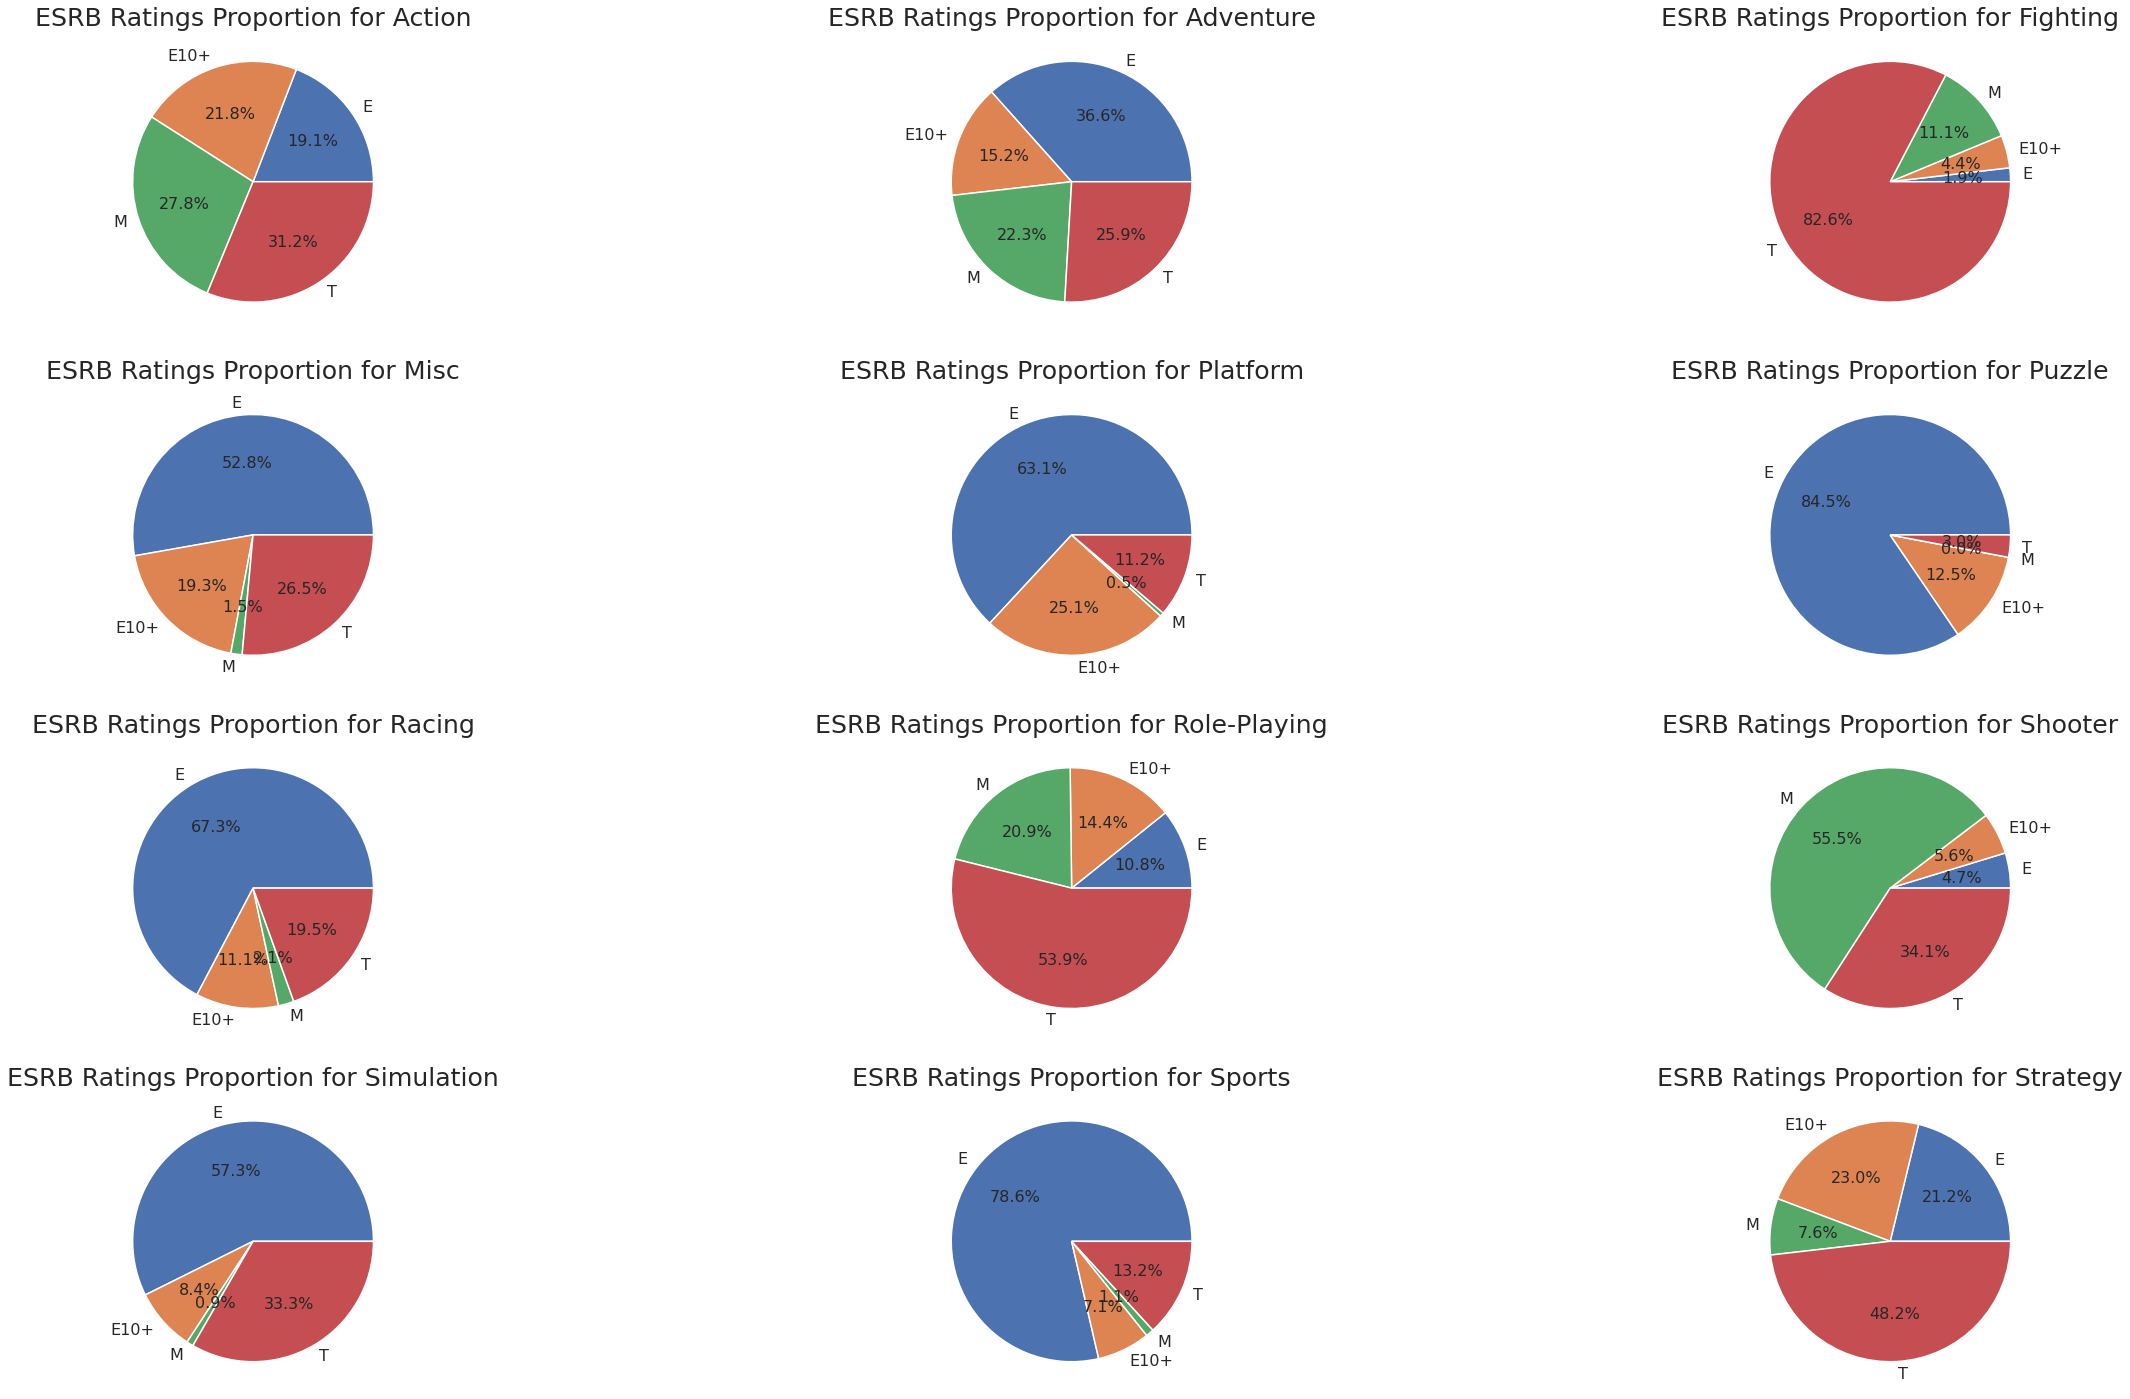

In [63]:
num_genres = len(ratings_proportion.index)
cols = 3
rows = num_genres // cols 
rows += num_genres % cols
position = range(1,num_genres + 1)

fig = plt.figure(figsize=(40,20))

for k, genre in zip(position, ratings_proportion.index):
    ax = fig.add_subplot(rows,cols,k)
    proportions = ratings_proportion.loc[genre]
    wedges, texts, autotexts = ax.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
    ax.set_title(f'ESRB Ratings Proportion for {genre}')

    plt.setp(autotexts, size=16)
    plt.setp(texts, size=16)

plt.tight_layout()
plt.show()

As you can see, each genre differs significantly in their ESRB rating proportions. Let's breakdown each genre's ESRB Rating

**Action**
Has a diverse ESRB rating proportion but the dominant rating is "Teen"

**Adventure**
Has a diverse ESRB rating proportion but the dominant rating is "Everyone"

**Fighting**
ESRB rating for this genre is predominantly "Teen"
  
**Misc**
ESRB rating for this genre is predominantly "Everyone"

**Platform**
ESRB rating for this genre is predominantly "Everyone"

**Puzzle**
ESRB rating for this genre is predominantly "Everyone"

**Racing**
ESRB rating for this genre is predominantly "Everyone"

**Role-Playing**
ESRB rating for this genre is predominantly "Teen"

**Shooter**
ESRB rating for this genre is predominantly "Mature"

**Simulation**
ESRB rating for this genre is predominantly "Everyone"

**Sports**
ESRB rating for this genre is predominantly "Everyone"

**Strategy**
ESRB rating for this genre is predominantly "Teen"

### Conclusion

Genres with a dominant “Everyone” ESRB rating such as “Adventure”, “Misc”, “Platform”, “Puzzle”, “Racing”, “Simulation”, and “Sports” might be targeting a wider audience, including younger players, and therefore, their content is often designed to be suitable for all ages.

On the other hand, genres like “Action”, “Fighting”, “Role-Playing”, and “Strategy” that have a dominant “Teen” rating might contain more complex themes or gameplay mechanics that are more suitable for teenagers.

The “Shooter” genre, which predominantly has a “Mature” rating, often includes elements of violence or conflict that may not be suitable for younger audiences, hence targeting an older demographic.

However, these are broad assumptions and the content can vary significantly within each genre. The ESRB rating is just one factor to consider when evaluating the content and target audience of a video game. It’s also important to consider other factors such as the game’s theme, gameplay mechanics, and narrative.

## 6. Is there a statistically significant change in the frequency of each ESRB rating over the years?

### ESRB Ratings throughout the Years
Let us first visualize the frequency of each ESRB rating throughout the years, including games that have no rating (tagged as *RP*)

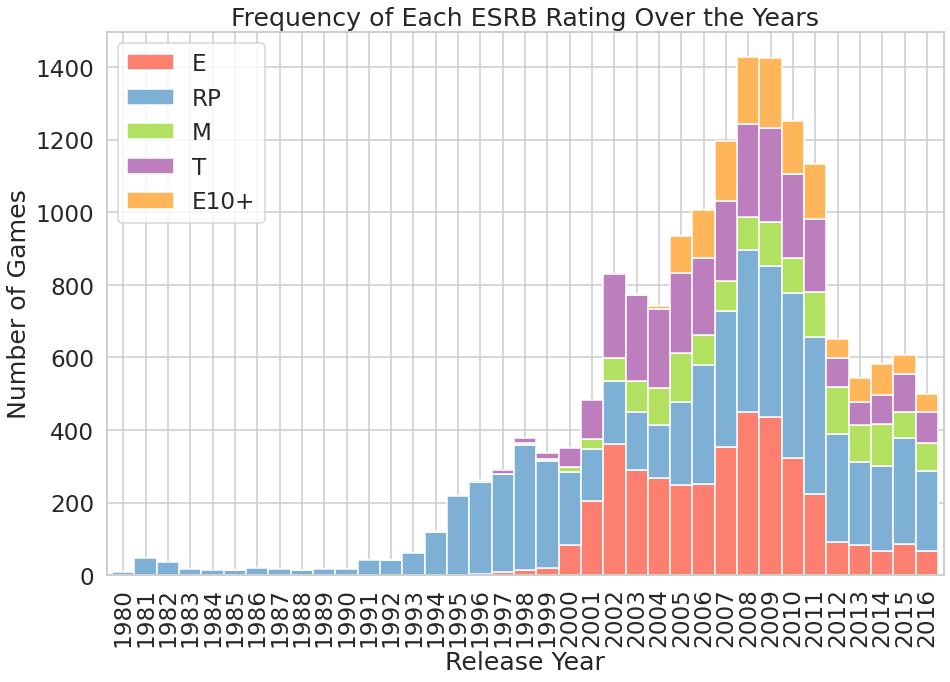

In [64]:
esrb_ratings = df["ESRB_Rating"].unique()
esrb_ratings = esrb_ratings
esrb_year_df = pd.DataFrame()

for rating in esrb_ratings:
    year_value_counts =  df[df["ESRB_Rating"] == rating]["Release_Year"].value_counts()
    esrb_year_df = pd.concat([esrb_year_df, year_value_counts], axis=1)

esrb_year_df.columns = esrb_ratings
esrb_year_df = esrb_year_df.sort_index()

fig, ax = plt.subplots(figsize=(15,10))
esrb_year_df.plot(kind="bar", stacked=True, ax=ax, color=my_colors, width=1.0)
ax.set_title("Frequency of Each ESRB Rating Over the Years")
ax.set_xlabel("Release Year")
ax.set_ylabel("Number of Games")
fig.patch.set_facecolor('white')
plt.show()

Visually, games released within the years 1980 to 1993 seem to have no ESRB rating at all (RP). Since the ESRB rating system was **founded in 1994**, it makes sense that games released before its founding have no rating. To confirm, let's check the actual numbers of games with no rating and with a rating within those years.

In [65]:
filtered_years_df = df[(df['Release_Year'] >= 1980) & (df['Release_Year'] <= 1993)]
games_with_no_rating = filtered_years_df[filtered_years_df["ESRB_Rating"] == "RP"].shape[0]
games_with_rating = filtered_years_df[filtered_years_df["ESRB_Rating"] != "RP"].shape[0]

print("1980-1993")
print(f"Games with no rating: {games_with_no_rating}")
print(f"Games with rating: {games_with_rating}")

1980-1993
Games with no rating: 361
Games with rating: 4


Surprisingly, there are 4 games that have ratings within those years, let's see what those are.

In [66]:
filtered_years_df[filtered_years_df["ESRB_Rating"] != "RP"]

Unnamed: 0 
 Name 
 Platform 
 Release_Year 
 Genre 
 Publisher 
 NA_Sales 
 EU_Sales 
 JP_Sales 
 Other_Sales 
 Global_Sales 
 Critic_Score 
 Critic_Count 
 User_Score 
 User_Count 
 Developer 
 ESRB_Rating 
 Platform_Family 
 Platform_Type 
 
 
 
 
 2573 
 2612 
 The 7th Guest 
 PC 
 1992 
 Adventure 
 Virgin Interactive 
 0.02 
 0.77 
 0.0 
 0.00 
 0.78 
 NaN 
 NaN 
 NaN 
 NaN 
 Trilobyte 
 T 
 PC 
 PC 
 
 
 14216 
 14472 
 Alter Ego 
 PC 
 1985 
 Simulation 
 Activision 
 0.00 
 0.03 
 0.0 
 0.01 
 0.03 
 59.0 
 9.0 
 58.0 
 19.0 
 Viva Media, Viva Media, LLC 
 T 
 PC 
 PC 
 
 
 14354 
 14612 
 Doom - PC, 1992 
 PC 
 1992 
 Shooter 
 id Software 
 0.02 
 0.00 
 0.0 
 0.00 
 0.03 
 85.0 
 44.0 
 82.0 
 1796.0 
 id Software 
 M 
 PC 
 PC 
 
 
 14365 
 14623 
 SimCity - PC, 1988 
 PC 
 1988 
 Simulation 
 Maxis 
 0.00 
 0.02 
 0.0 
 0.01 
 0.03 
 64.0 
 75.0 
 22.0 
 4572.0 
 Maxis 
 E10+ 
 PC 
 PC

These games must've caught the attention of ESRB for them to be rated despite its release year being before the founding of ESRB itself. 

Going back to the stacked bar chart, visually speaking, the top 4 ESRB ratings throughout the years, ranked from most dominant to least dominant are:
1. E for Everyone
2. T for Teen
3. E10+ for ages 10 and up
4. M for mature

### Annual Percentages of ESRB Ratings
To get a clearer view of how the frequency of each ESRB rating has evolved over time, let's visualize the annual percentages of each rating using a stacked bar chart.

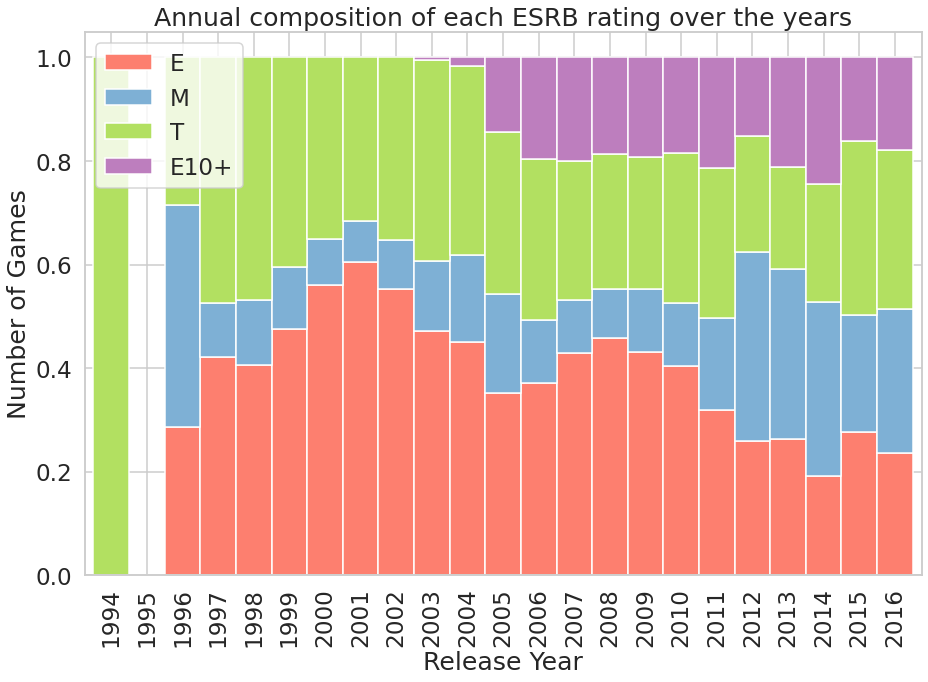

In [67]:
filtered_df = df[(df["Release_Year"] >= 1994)]
total_games_per_year = filtered_df["Release_Year"].value_counts().sort_index()
rp_counts_per_year = filtered_df[filtered_df["ESRB_Rating"] == "RP"]["Release_Year"].value_counts().sort_index()
# Remove games with no ESRB ratings
adjusted_total_games_per_year = total_games_per_year - rp_counts_per_year

unique_ratings = df["ESRB_Rating"].unique()
rating_counts_dict = {"Year": adjusted_total_games_per_year.index}

for rating in unique_ratings:
        rating_counts = filtered_df[filtered_df["ESRB_Rating"] == rating]["Release_Year"].value_counts().sort_index()
        rating_counts_dict[rating] = rating_counts
    
ratings_df = pd.DataFrame(rating_counts_dict)
ratings_df = ratings_df.fillna(0)
ratings_df["Adjusted_Total"] = adjusted_total_games_per_year

# Set the "Year" as index for better readability and manipulation
ratings_df.set_index("Year", inplace=True)

for rating in unique_ratings:
    ratings_df[rating] = (ratings_df[rating] / ratings_df["Adjusted_Total"])

# Drop the "Adjusted_Total" column as we won't need it for the chart
ratings_df = ratings_df.drop("RP", axis=1)
ratings_df.drop(columns=["Adjusted_Total"], inplace=True)
ratings_df.replace([float('inf'), -float('inf'), float('NaN')], 0, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
ratings_df.plot(kind="bar", stacked=True, ax=ax, color=my_colors, width=1.0)
ax.set_title("Annual composition of each ESRB rating over the years")
ax.set_xlabel("Release Year")
ax.set_ylabel("Number of Games")
fig.patch.set_facecolor('white')
plt.show()

The year ESRB was founded, all games with a rating were labeled as T for teen. While the following year had no games with an ESRB rating. Beyond 1995, the distributions of each ESRB rating are varied. There are cases where games rated E for everyone dominate a certain year, specifically 2000-2010. The following years show a more balanced distribution of ESRB ratings. It's also worth noting that the E10+ rating first appeared in 2003 and has been around since

### Test of Independence
After visually assessing the stacked bar chart, it's evident that there are shifts in the frequency of each ESRB rating over the years. However, it is important to test whether these changes are statistically significant. The Chi-Square test of independence should be the appropriate statistical method for this situation, since this test will help determine if the frequency of each ESRB rating is independent of the year of release. 

1. H0 : The frequency of each ESRB rating is independent of the year of release
2. Ha : The frequency of each ESRB rating is dependent on the year of release

We will be performing this test with a significance level of 0.05. Additionally, we are to ignore the year 1980-1995 since it was shown previously that: There are only four games preceding 1994 that have an ESRB rating, 1994 consists of only one rating, which is T (an outlier), and 1995 has no ratings at all.

Given that the total number of games released varies each year, using raw counts in the test could be misleading. Different yearly game counts may skew the perceived frequency of each rating. Thus, we are to take the proportion instead and multiply it by 100. This should normalize the data and provide a clearer picture of a certain ESRB's relative presence within a certain year.

In [68]:
def get_contingency_table(year_to_start: int):
    filtered_df = df[(df["Release_Year"] >= year_to_start)]
    contingency_table = pd.crosstab(filtered_df["Release_Year"], filtered_df["ESRB_Rating"])
    contingency_table = contingency_table.drop("RP", axis=1)
    total_games_per_year = filtered_df["Release_Year"].value_counts().sort_index()
    rp_counts_per_year = filtered_df[filtered_df["ESRB_Rating"] == "RP"]["Release_Year"].value_counts().sort_index()
    adjusted_total_games_per_year = total_games_per_year - rp_counts_per_year

    # Get the proportion of each ESRB rating within the range of years
    relative_frequencies = contingency_table.divide(adjusted_total_games_per_year, axis=0)
    # Multiply it by 100
    relative_frequencies = relative_frequencies * 100
    contingency_table = relative_frequencies.transpose()
    return contingency_table

chi2, p, _, _ = chi2_contingency(get_contingency_table(1996))

print("Chi Square Value: ", chi2)
print("P-value: ", p)

Chi Square Value:  391.8885206316486
P-value:  3.139855116398744e-50


A p-value of 3.14e-50 is extremely low. Going back to the annual percentage of each ESRB rating over the years, let us try to re-run the test beginning with the year 2003, where the E10+ rating first appeared. 

In [69]:
chi2, p, _, _ = stats.chi2_contingency(get_contingency_table(2003))

print("Chi Square Value: ", chi2)
print("P-value: ", p)

Chi Square Value:  141.58326102023398
P-value:  1.4660549496069327e-13


Both result in a very low p-value despite having attempts at addressing outliers (e.g. Taking into account of the 'E10+' rating)

Given a p-value of 3.14e-50(first test) and 1.466e-13(second test), both being far lesser than our significance level of 0.05, we have strong evidence to reject the null hypothesis. 

### Conclusion 
The data provides strong evidence that the frequency of each ESRB rating are dependent on the year. To conclude this section, we could see that there is a statistically significant change in the frequency of each ESRB ratings over the years. This has been confirmed both visually and statistically via a chi-square test.

## 7. What proportion of games in the whole dataset have been assigned with 'RP' (Rating Pending) ESRB ratings throughout the years?

In this section, we aim to investigate the proportion of games in the dataset that have been assigned an ‘RP’ (Rating Pending) ESRB rating over the years. Our previous analyses in the Data Cleaning section and other sections involving ESRB ratings have revealed that ‘RP’ is a significant category within the total ESRB ratings, as well as within each genre’s ESRB rating proportion. The prevalence of ‘RP’ ratings warrants further exploration. This is primarily because ESRB ratings for games are not always mandatory, and some games only receive their ratings after a certain period post-release. By examining the ‘RP’ ratings, we hope to gain a deeper understanding of their impact and proportion in our dataset.

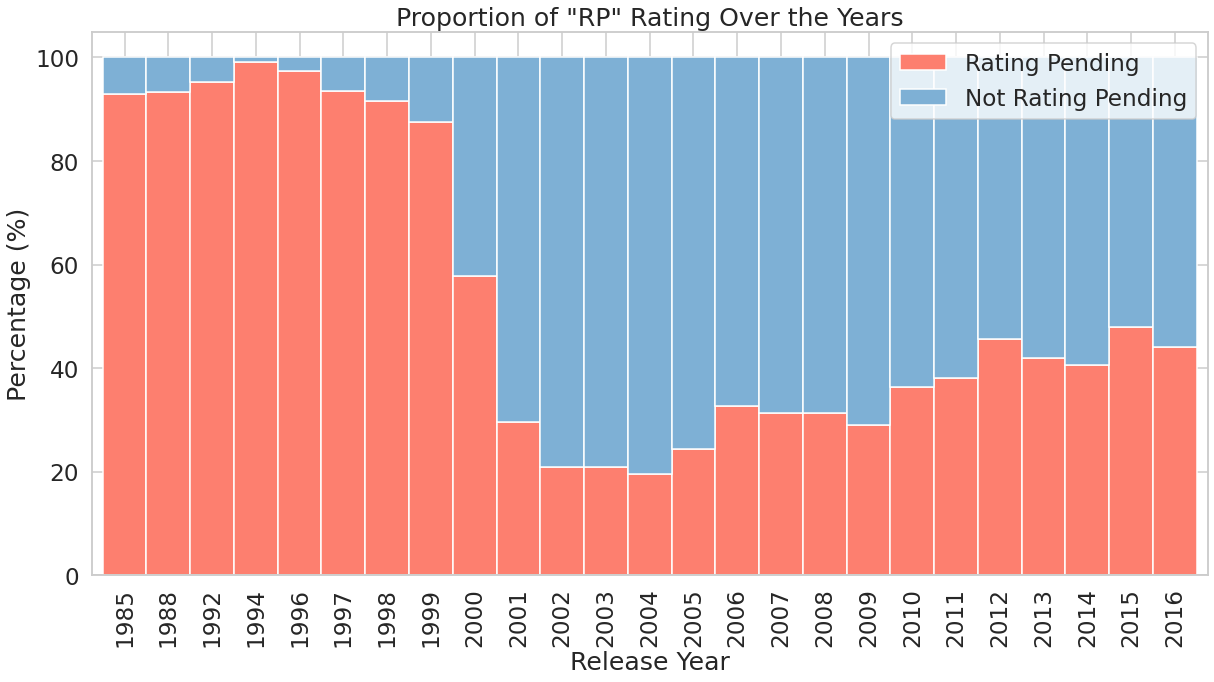

Rating Pending Proportion 
 Not Rating Pending Proportion 
 
 
 Release_Year 
 
 
 
 
 
 
 1985 
 92.857143 
 7.142857 
 
 
 1988 
 93.333333 
 6.666667 
 
 
 1992 
 95.348837 
 4.651163 
 
 
 1994 
 99.173554 
 0.826446 
 
 
 1996 
 97.338403 
 2.661597 
 
 
 1997 
 93.425606 
 6.574394 
 
 
 1998 
 91.556728 
 8.443272 
 
 
 1999 
 87.573964 
 12.426036 
 
 
 2000 
 57.714286 
 42.285714 
 
 
 2001 
 29.668050 
 70.331950 
 
 
 2002 
 20.989144 
 79.010856 
 
 
 2003 
 20.903226 
 79.096774 
 
 
 2004 
 19.515478 
 80.484522 
 
 
 2005 
 24.411135 
 75.588865 
 
 
 2006 
 32.604374 
 67.395626 
 
 
 2007 
 31.354515 
 68.645485 
 
 
 2008 
 31.254380 
 68.745620 
 
 
 2009 
 29.102384 
 70.897616 
 
 
 2010 
 36.312849 
 63.687151 
 
 
 2011 
 38.128861 
 61.871139 
 
 
 2012 
 45.705521 
 54.294479 
 
 
 2013 
 41.911765 
 58.088235 
 
 
 2014 
 40.619621 
 59.380379 
 
 
 2015 
 48.019802 
 51.980198 
 
 
 2016 
 44.000000 
 56.000000

In [70]:
games_with_rp = df[df['ESRB_Rating'] == 'RP'].groupby('Release_Year').ESRB_Rating.count()
games_without_rp = df[df['ESRB_Rating'] != 'RP'].groupby('Release_Year').ESRB_Rating.count()
combined = pd.merge(games_with_rp, games_without_rp, on='Release_Year')

proportion = combined.copy()
proportion['Rating Pending Proportion'] = proportion['ESRB_Rating_x'] / (proportion['ESRB_Rating_x'] + proportion['ESRB_Rating_y']) * 100
proportion['Not Rating Pending Proportion'] = proportion['ESRB_Rating_y'] / (proportion['ESRB_Rating_x'] + proportion['ESRB_Rating_y']) * 100

proportion[['Rating Pending Proportion', 'Not Rating Pending Proportion']].plot(figsize=(20,10), color=my_colors, kind='bar', stacked=True, width=1.0)
plt.ylabel('Percentage (%)')
plt.xlabel('Release Year')
plt.title('Proportion of "RP" Rating Over the Years')
plt.legend(['Rating Pending', "Not Rating Pending"])
plt.show()

proportion[['Rating Pending Proportion', 'Not Rating Pending Proportion']]

It seems after the year 2000, the number of games with a pending rating decreased in proportion to games with a rating. Nevertheless, the proportion of "RP" ratings remained significant by the 2010s. The high percentages in recent years suggest that a large proportion of games either haven't received a finalized rating or the data might be missing or not updated. 

### Conclusion

The "RP" rating being this significant in the proportion of ESRB ratings throughout the years could have some implication in the relationship of the three features we are focusing on. As the "RP" rating does not provide any meaningful information about a game's content, an association involving "RP" would offer little insight into a game's relationship and association of it throughout the years. Thus, there might be a need to compare the association with and without the "RP" rating to see if it might skew any kind of association with the other features.

## 8. How has the proportion of ESRB ratings in each Genre evolved throughout the years?

Knowing how ESRB rating has shifted for each genre throughout the years will be an invaluable insight on the evolution of societal norms.

### Preliminary Code

In [71]:
genres = df['Genre'].dropna().unique()


def get_genre_distribution(genre_name, exclude_rp=False):
    if exclude_rp:
        grouped = no_rp.groupby(['Release_Year', 'Genre', 'ESRB_Rating']).size().reset_index(name='Count')
    else:
        grouped = df.groupby(['Release_Year', 'Genre', 'ESRB_Rating']).size().reset_index(name='Count')
    
    total_count = grouped.groupby(['Release_Year', 'Genre'])['Count'].sum().reset_index(name='Total_Count')
    genre_distribution = pd.merge(grouped, total_count, on=['Release_Year', 'Genre'])
    genre_distribution['Percentage'] = (genre_distribution['Count'] / genre_distribution['Total_Count']) * 100
    
    return genre_distribution[genre_distribution['Genre'] == genre_name]

def plot_all_genres(exclude_rp=False):
   
    n_rows = (len(genres) + 1) // 2
    n_cols = 2 if len(genres) > 1 else 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7 * n_rows))
    
    # Flatten the axes array if there's only one row
    if n_rows == 1:
        axes = np.array(axes).reshape(1, -1)
    
    for ax, genre in zip(axes.ravel(), genres):
        genre_data = get_genre_distribution(genre, exclude_rp)
        sns.lineplot(data=genre_data, x='Release_Year', y='Percentage', hue='ESRB_Rating', ax=ax, marker='o', palette='tab10')
        ax.set_title(f'{genre} Genre\'s ESRB Rating Proportion')
        ax.set_ylabel('Percentage (%)')
        ax.set_xlabel('Year of Release')
        ax.legend(title='ESRB Rating', loc='upper left')
        ax.grid(True, which="both", ls="--", c='0.65')

    for i in range(len(genres), n_rows * n_cols):
        fig.delaxes(axes.ravel()[i])

    plt.tight_layout()
    plt.show()

### Action's ESRB rating proportion overtime
Let's take a peek at the "Action" genre and see how its ESRB rating proportion changed overtime.

In [72]:
get_genre_distribution("Action")

Release_Year 
 Genre 
 ESRB_Rating 
 Count 
 Total_Count 
 Percentage 
 
 
 
 
 0 
 1980 
 Action 
 RP 
 1 
 1 
 100.000000 
 
 
 5 
 1981 
 Action 
 RP 
 25 
 25 
 100.000000 
 
 
 12 
 1982 
 Action 
 RP 
 18 
 18 
 100.000000 
 
 
 19 
 1983 
 Action 
 RP 
 7 
 7 
 100.000000 
 
 
 26 
 1984 
 Action 
 RP 
 1 
 1 
 100.000000 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1018 
 2016 
 Action 
 E 
 9 
 177 
 5.084746 
 
 
 1019 
 2016 
 Action 
 E10+ 
 20 
 177 
 11.299435 
 
 
 1020 
 2016 
 Action 
 M 
 34 
 177 
 19.209040 
 
 
 1021 
 2016 
 Action 
 RP 
 87 
 177 
 49.152542 
 
 
 1022 
 2016 
 Action 
 T 
 27 
 177 
 15.254237 
 
 
 
 111 rows × 6 columns

RP seems to be a dominant rating in the years. Let us exclude RP to see the proportion of games actually rated more reasily.

In [73]:
get_genre_distribution("Action", exclude_rp=True)

Release_Year 
 Genre 
 ESRB_Rating 
 Count 
 Total_Count 
 Percentage 
 
 
 
 
 5 
 1996 
 Action 
 M 
 2 
 3 
 66.666667 
 
 
 6 
 1996 
 Action 
 T 
 1 
 3 
 33.333333 
 
 
 11 
 1997 
 Action 
 M 
 1 
 2 
 50.000000 
 
 
 12 
 1997 
 Action 
 T 
 1 
 2 
 50.000000 
 
 
 25 
 1998 
 Action 
 M 
 2 
 5 
 40.000000 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 616 
 2015 
 Action 
 T 
 38 
 121 
 31.404959 
 
 
 647 
 2016 
 Action 
 E 
 9 
 90 
 10.000000 
 
 
 648 
 2016 
 Action 
 E10+ 
 20 
 90 
 22.222222 
 
 
 649 
 2016 
 Action 
 M 
 34 
 90 
 37.777778 
 
 
 650 
 2016 
 Action 
 T 
 27 
 90 
 30.000000 
 
 
 
 74 rows × 6 columns

Now the proportions of actually rated games are easier to see. Let us now visualize the ESRB rating proportion per genre throughout the years.

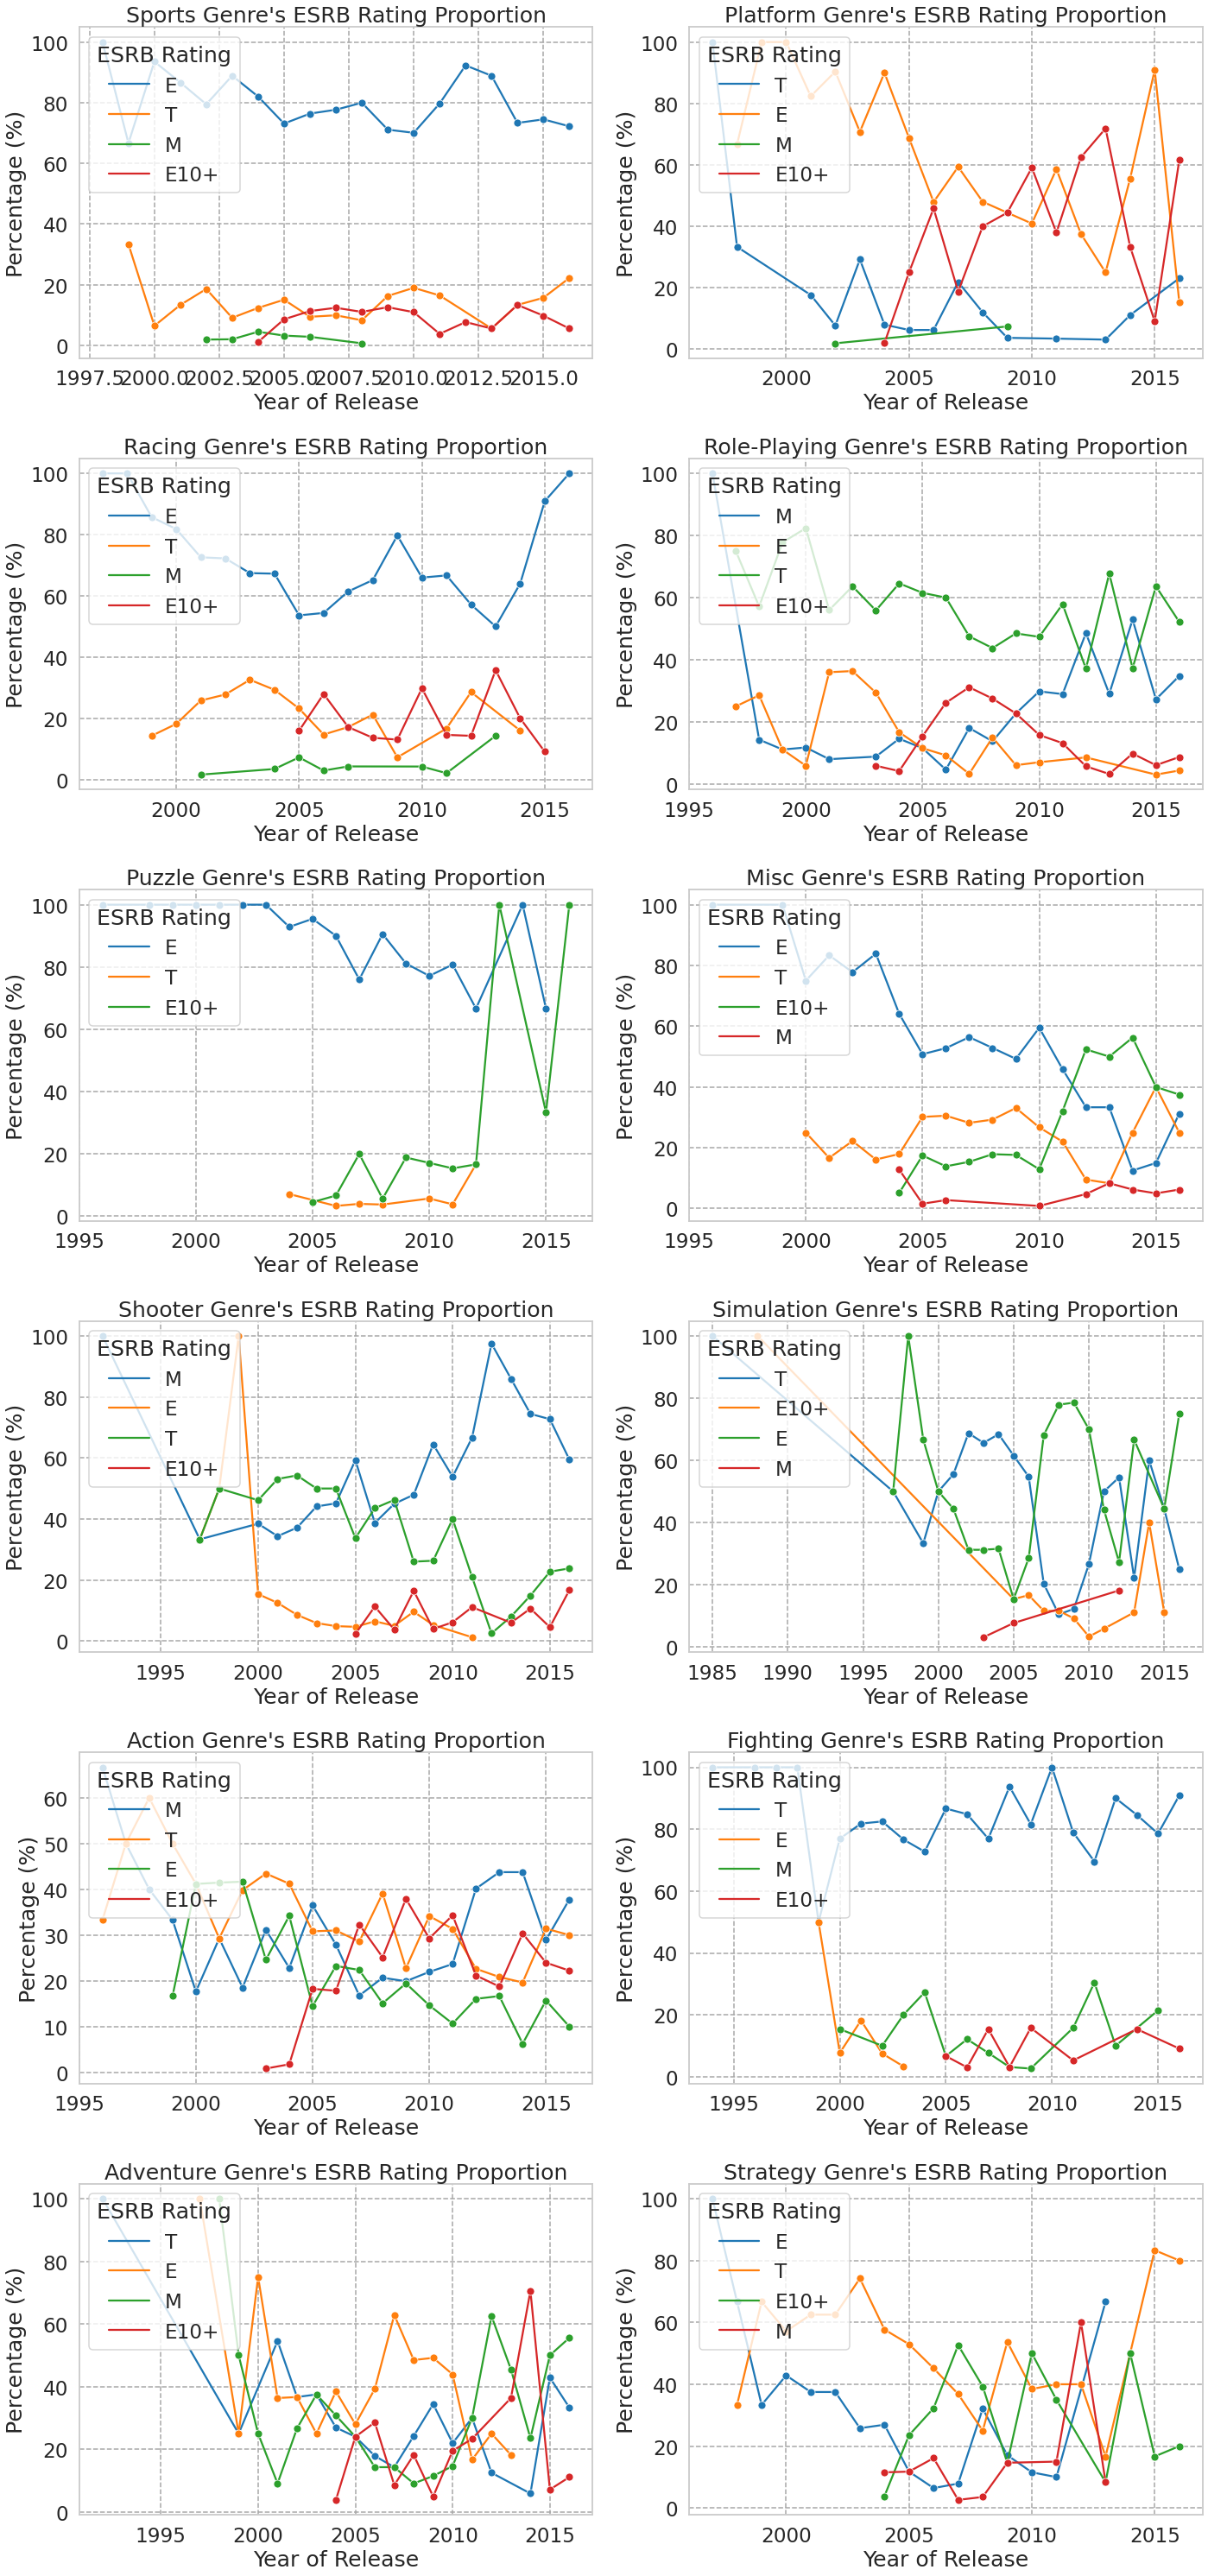

In [74]:
plot_all_genres(exclude_rp=True)

There are a lot of interesting trends in ESRB Rating proportion per genre throughout the years. Given the graphs, here are the interesting highlights per genre.

**Sports**
Sports appear to be the most consumer-friendly game genre, as the ESRB rating of “E” is dominant. This has been consistent over the years. There are some games with mature ratings, which might be due to certain sports being more intended for a mature audience.

**Platform**
Platform games initially targeted teens but later shifted to primarily being for everyone. Some games with mature ratings have appeared, but they are in the minority. The intended audience over the years has been everyone or kids aged 10 and up.

**Racing**
Like sports, the racing genre is also consumer-friendly, with the ESRB rating of “E” being dominant. Games with different ratings appeared in the late 2000s, but throughout the years, the target audience has remained everyone.
  
**Role-Playing**
The initial target audience was mature audiences. By the turn of the decade, it shifted to targeting teen audiences. Throughout the years, teens and mature audiences have been the target audience.

**Puzzle**
This is also one of the most consumer-friendly game genres. The target audience has predominantly been for everyone. There was a shift in the 2010s to target kids aged 10 and up. Throughout the years, its target audience has been for everyone and kids aged 10 and up.

**Misc**
The initial target audience was everyone, making it consumer-friendly. There was a shift to target kids aged 10 and up. Throughout the years, everyone has remained as the primary target audience.

**Shooter**
The initial target audience was for a mature audience. Despite the subject matter, there was a shift to target everyone as the audience by the turn of the decade. It then shifted back to targeting teen and mature audiences. Throughout the years, mature audiences have been the target audience.

**Simulation**
There seem to be games before 1994 that were rated. Despite that, everyone was initially targeted. Throughout the years, the target audience has been for everyone and teens.

**Action**
The target audience was initially for mature audiences. There was a shift to target teen audiences just before the 2000s. Throughout the years, the target audience has shifted between kids aged 10 and up, teens, and mature audiences. The plot suggests a diversity of games in this genre.

**Fighting**
The initial target audience was teens. Some games were rated as for everyone, kids aged 10 and up, and mature but these were few and far between. Teens have remained as its primary target audience throughout the years.

**Adventure**
The initial target audience was teens. It then shifted its target audience to everyone, kids aged 10 and up, teens, and mature audiences. The target audience has shifted constantly throughout the years. The plot suggests a diversity of games in this genre.

**Strategy**
Everyone was initially targeted. It then shifted to targeting teen audiences by the 2000s. It then constantly shifted between everyone, kids aged 10 and up, and teens. Throughout the years, the target audience has been between kids aged 10 and up and teens.

### Conclusion
In conclusion, our exploration of ESRB Ratings across various video game genres has unveiled intriguing patterns in target audiences. These observations provide valuable insights into genre-specific audience preferences, facilitating a more nuanced understanding of the evolving video game industry.

## 9. What is the proportion of "RP" Ratings of each Genre throughout the years?

Given the analysis of total "RP" ratings and the ESRB rating (excluding "RP") proportion of games throughout the years, there is a need to know the proportion of "RP" ratings of each genre throughout the years. This information can reveal genre-specific trends and practices that might influence the ESRB rating process. Moreover, it can help us assess how the significant presence of "RP" ratings in our dataset might skew the relationships between genre, release year, and ESRB rating.

For this analysis going forward, ESRB ratings "E", "E10+", "T", and "M" will be merged into one category called "Non-RP". This is done to easily visualize the proportion of "RP" ratings per genre

### Preliminary Code

In [75]:
rp_genre = df.copy()
rp_genre['Rating_Category'] = rp_genre['ESRB_Rating'].apply(lambda x: 'RP' if x == 'RP' else 'Non-RP')

grouped = rp_genre.groupby(['Release_Year', 'Genre', 'Rating_Category']).size().reset_index(name='Count')

total_count = grouped.groupby(['Release_Year', 'Genre'])['Count'].sum().reset_index(name='Total_Count')

rp_distribution = pd.merge(grouped, total_count, on=['Release_Year', 'Genre'])

rp_distribution['Percentage'] = (rp_distribution['Count'] / rp_distribution['Total_Count']) * 100

def get_rp_distribution(genre_name):
    return rp_distribution[rp_distribution['Genre'] == genre_name]

def show_rp_distribution(genre_name):
    rp_pivot = get_rp_distribution(genre_name).pivot(index='Release_Year', columns='Rating_Category', values='Count').fillna(0)
    print(rp_pivot)
    
def plot_rp_genres():
   
    n_rows = (len(genres) + 1) // 2
    n_cols = 2 if len(genres) > 1 else 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7 * n_rows))
    
    if n_rows == 1:
        axes = np.array(axes).reshape(1, -1)
    
    for ax, genre in zip(axes.ravel(), genres):
        rp_data = get_rp_distribution(genre)
        sns.lineplot(data=rp_data, x='Release_Year', y='Percentage', hue='Rating_Category', ax=ax, marker='o', palette='tab10')
        ax.set_title(f'"RP" Rating Proportion for {genre} Genre')
        ax.set_ylabel('Percentage (%)')
        ax.set_xlabel('Year of Release')
        ax.legend(title='ESRB Rating', loc='upper left')
        ax.grid(True, which="both", ls="--", c='0.65')

    for i in range(len(genres), n_rows * n_cols):
        fig.delaxes(axes.ravel()[i])

    plt.tight_layout()
    plt.show()

### Action's "RP" Rating proportion overtime
Let's take a peek at the Action genre and see how its "RP" rating proportion changed overtime.

In [76]:
get_rp_distribution('Action')

Release_Year 
 Genre 
 Rating_Category 
 Count 
 Total_Count 
 Percentage 
 
 
 
 
 0 
 1980 
 Action 
 RP 
 1 
 1 
 100.000000 
 
 
 5 
 1981 
 Action 
 RP 
 25 
 25 
 100.000000 
 
 
 12 
 1982 
 Action 
 RP 
 18 
 18 
 100.000000 
 
 
 19 
 1983 
 Action 
 RP 
 7 
 7 
 100.000000 
 
 
 26 
 1984 
 Action 
 RP 
 1 
 1 
 100.000000 
 
 
 33 
 1985 
 Action 
 RP 
 2 
 2 
 100.000000 
 
 
 40 
 1986 
 Action 
 RP 
 6 
 6 
 100.000000 
 
 
 46 
 1987 
 Action 
 RP 
 2 
 2 
 100.000000 
 
 
 53 
 1988 
 Action 
 RP 
 2 
 2 
 100.000000 
 
 
 61 
 1989 
 Action 
 RP 
 2 
 2 
 100.000000 
 
 
 68 
 1990 
 Action 
 RP 
 3 
 3 
 100.000000 
 
 
 75 
 1991 
 Action 
 RP 
 5 
 5 
 100.000000 
 
 
 87 
 1992 
 Action 
 RP 
 1 
 1 
 100.000000 
 
 
 101 
 1993 
 Action 
 RP 
 6 
 6 
 100.000000 
 
 
 113 
 1994 
 Action 
 RP 
 4 
 4 
 100.000000 
 
 
 126 
 1995 
 Action 
 RP 
 8 
 8 
 100.000000 
 
 
 138 
 1996 
 Action 
 Non-RP 
 3 
 20 
 15.000000 
 
 
 139 
 1996 
 Action 
 RP 
 17 
 20 
 85.000000 
 
 
 155 
 1997 
 Action 
 Non-RP 
 2 
 31 
 6.451613 
 
 
 156 
 1997 
 Action 
 RP 
 29 
 31 
 93.548387 
 
 
 176 
 1998 
 Action 
 Non-RP 
 5 
 44 
 11.363636 
 
 
 177 
 1998 
 Action 
 RP 
 39 
 44 
 88.636364 
 
 
 199 
 1999 
 Action 
 Non-RP 
 6 
 40 
 15.000000 
 
 
 200 
 1999 
 Action 
 RP 
 34 
 40 
 85.000000 
 
 
 223 
 2000 
 Action 
 Non-RP 
 17 
 44 
 38.636364 
 
 
 224 
 2000 
 Action 
 RP 
 27 
 44 
 61.363636 
 
 
 247 
 2001 
 Action 
 Non-RP 
 41 
 67 
 61.194030 
 
 
 248 
 2001 
 Action 
 RP 
 26 
 67 
 38.805970 
 
 
 271 
 2002 
 Action 
 Non-RP 
 108 
 125 
 86.400000 
 
 
 272 
 2002 
 Action 
 RP 
 17 
 125 
 13.600000 
 
 
 295 
 2003 
 Action 
 Non-RP 
 122 
 144 
 84.722222 
 
 
 296 
 2003 
 Action 
 RP 
 22 
 144 
 15.277778 
 
 
 319 
 2004 
 Action 
 Non-RP 
 114 
 125 
 91.200000 
 
 
 320 
 2004 
 Action 
 RP 
 11 
 125 
 8.800000 
 
 
 343 
 2005 
 Action 
 Non-RP 
 159 
 192 
 82.812500 
 
 
 344 
 2005 
 Action 
 RP 
 33 
 192 
 17.187500 
 
 
 367 
 2006 
 Action 
 Non-RP 
 129 
 184 
 70.108696 
 
 
 368 
 2006 
 Action 
 RP 
 55 
 184 
 29.891304 
 
 
 391 
 2007 
 Action 
 Non-RP 
 161 
 210 
 76.666667 
 
 
 392 
 2007 
 Action 
 RP 
 49 
 210 
 23.333333 
 
 
 415 
 2008 
 Action 
 Non-RP 
 179 
 221 
 80.995475 
 
 
 416 
 2008 
 Action 
 RP 
 42 
 221 
 19.004525 
 
 
 439 
 2009 
 Action 
 Non-RP 
 211 
 272 
 77.573529 
 
 
 440 
 2009 
 Action 
 RP 
 61 
 272 
 22.426471 
 
 
 463 
 2010 
 Action 
 Non-RP 
 164 
 226 
 72.566372 
 
 
 464 
 2010 
 Action 
 RP 
 62 
 226 
 27.433628 
 
 
 487 
 2011 
 Action 
 Non-RP 
 169 
 238 
 71.008403 
 
 
 488 
 2011 
 Action 
 RP 
 69 
 238 
 28.991597 
 
 
 511 
 2012 
 Action 
 Non-RP 
 137 
 265 
 51.698113 
 
 
 512 
 2012 
 Action 
 RP 
 128 
 265 
 48.301887 
 
 
 535 
 2013 
 Action 
 Non-RP 
 96 
 147 
 65.306122 
 
 
 536 
 2013 
 Action 
 RP 
 51 
 147 
 34.693878 
 
 
 558 
 2014 
 Action 
 Non-RP 
 112 
 188 
 59.574468 
 
 
 559 
 2014 
 Action 
 RP 
 76 
 188 
 40.425532 
 
 
 581 
 2015 
 Action 
 Non-RP 
 121 
 253 
 47.826087 
 
 
 582 
 2015 
 Action 
 RP 
 132 
 253 
 52.173913 
 
 
 605 
 2016 
 Action 
 Non-RP 
 90 
 177 
 50.847458 
 
 
 606 
 2016 
 Action 
 RP 
 87 
 177 
 49.152542

The Action Genre seems to follow the trend observed previously about the total proportion of "RP" ratings throughout the years. Wherein after the 2000s, the proportion of "RP" ratings declined rapidly, then its proportion slowly increased approaching the 2010s and it turned to be almost half of the proportion after.

Let us then see for each genre if they follow similar trends.

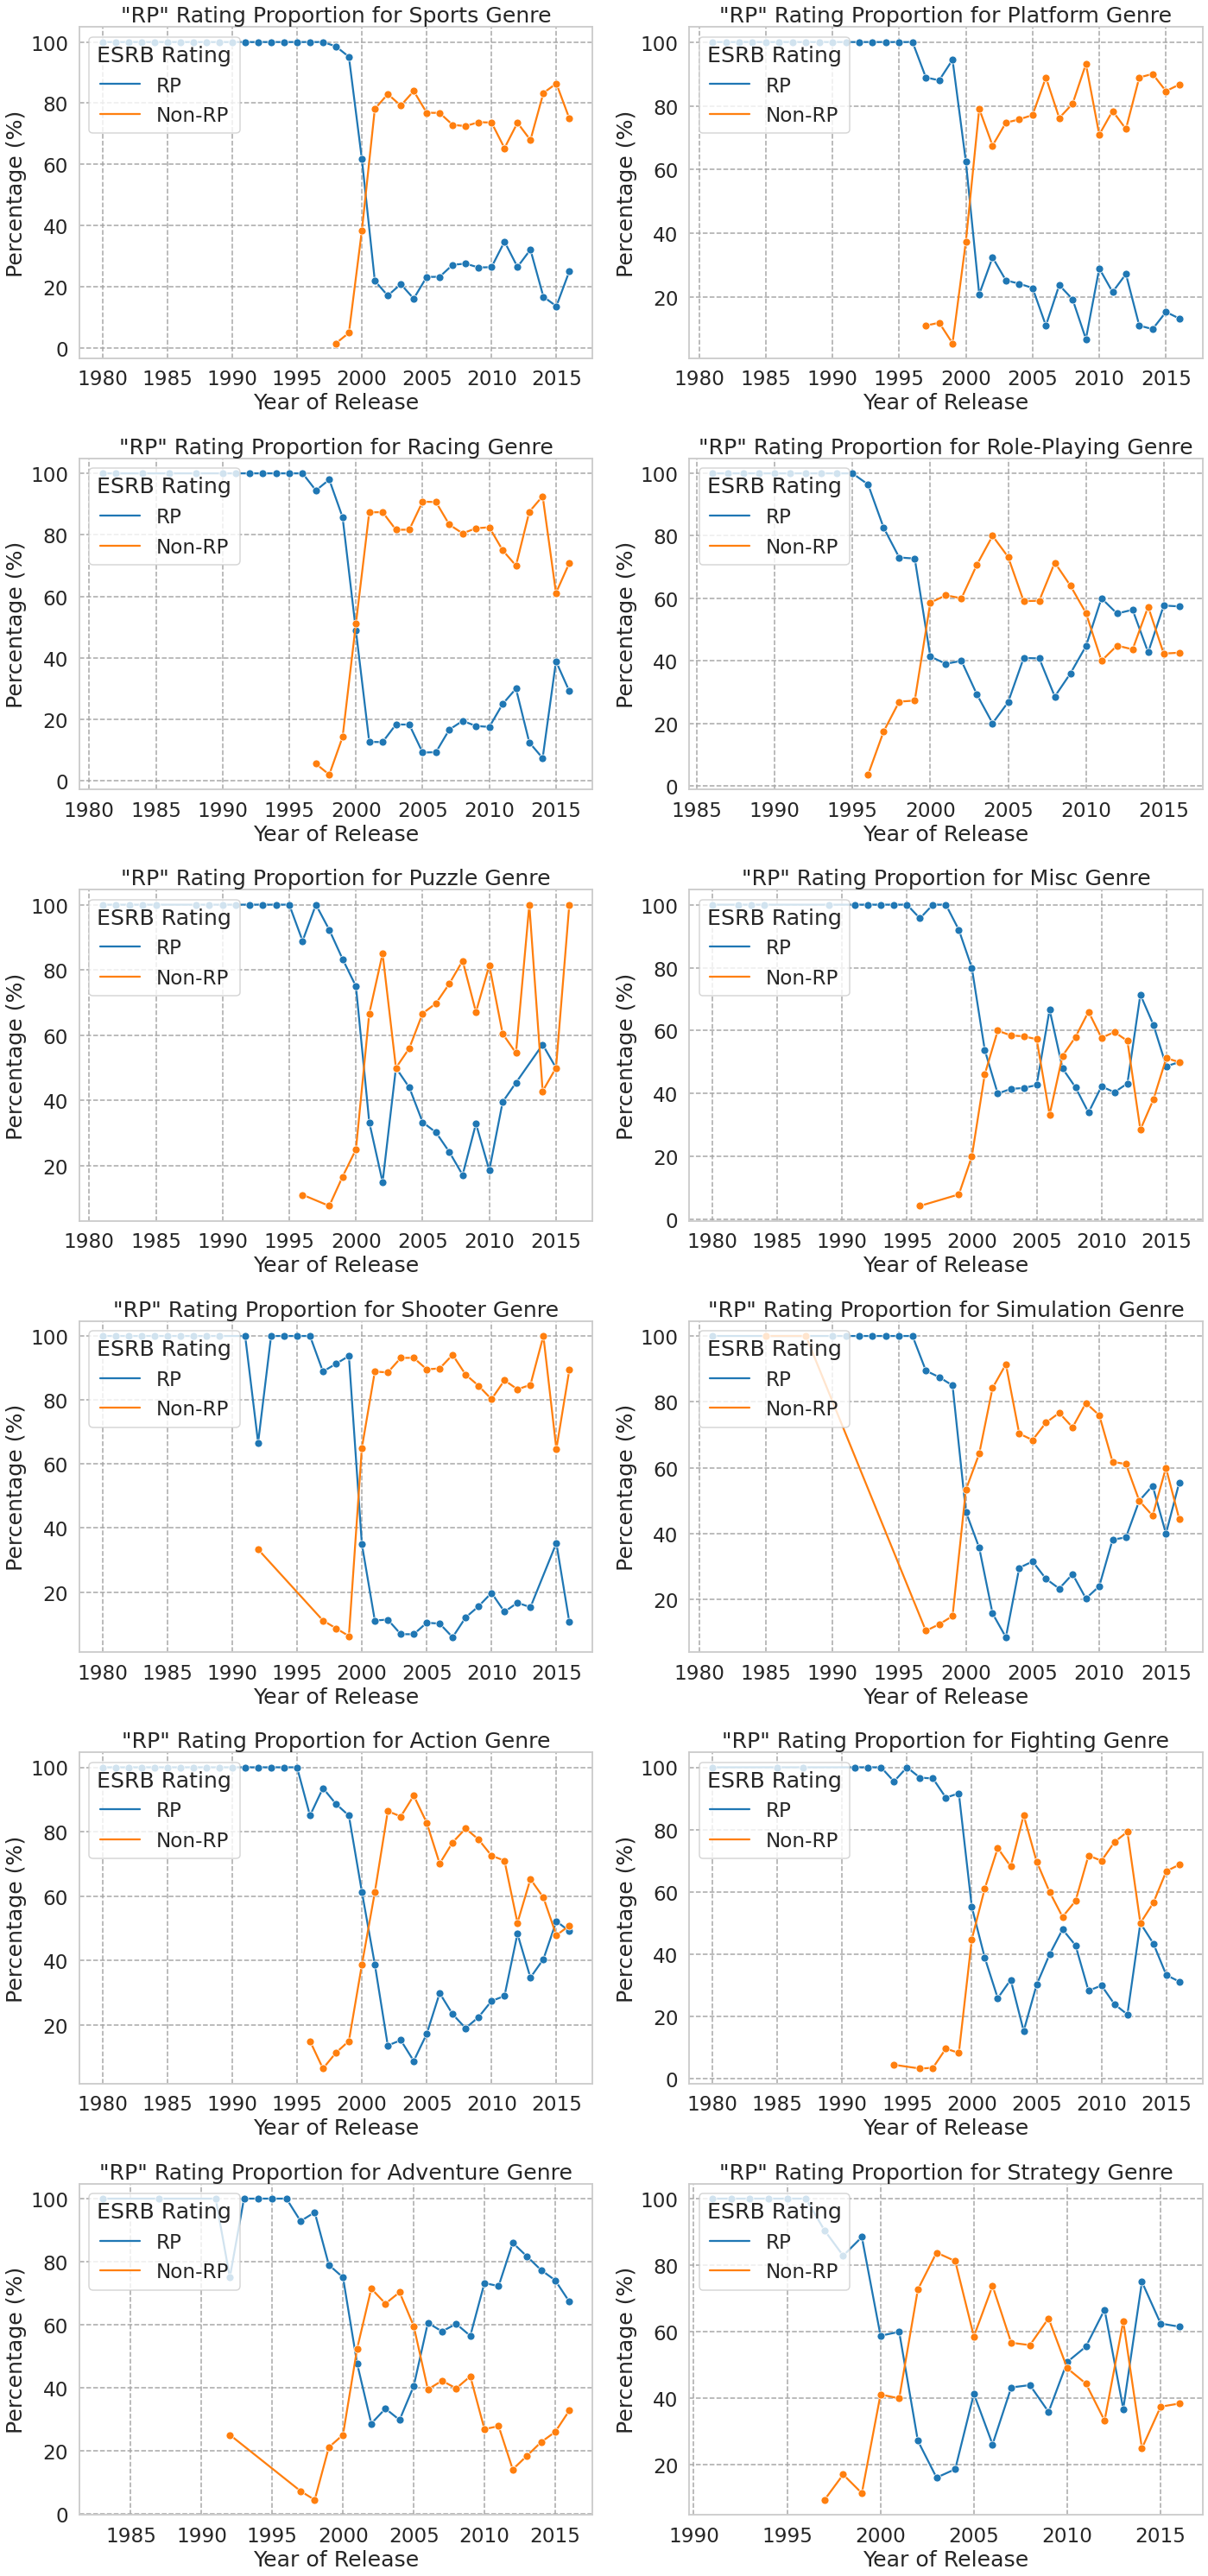

In [77]:
plot_rp_genres()

The graphs show interesting insights on each genre's ESRB "RP" rating throughout the years. While each genre follows the general trend found in the overall "RP" rating throughout the years, each genre has some interesting deviation worth noting. Here are short interpretations for each genre's "RP" rating proportion trend:

**Sports**
Sports follow similar trends wherein after the establishment of ESRB in 1994, there is a noticeable sharp decline in "RP" ratings approaching and after the 2000s. However, its "RP" proportion remained low throughout the years.

**Platform**
Platform follow similar trends wherein after the establishment of ESRB in 1994, there is a noticeable sharp decline in "RP" ratings approaching and after the 2000s. However, its "RP" proportion remained low throughout the years.

**Racing**
Racing follow similar trends wherein after the establishment of ESRB in 1994, there is a noticeable sharp decline in "RP" ratings approaching and after the 2000s. However, its "RP" proportion remained low throughout the years. In the year 2015, there was a noticeable "RP" rating proportion spike.
  
**Role-Playing**
Role-Playing follow similar trends wherein after the establishment of ESRB in 1994, there is a noticeable sharp decline in "RP" ratings approaching and after the 2000s. However, its "RP" proportion remained evenly high and at points, being a dominant proportion in some years after the 2010s.

**Puzzle**
Puzzle follow similar trends wherein after the establishment of ESRB in 1994, there is a noticeable sharp decline in "RP" ratings approaching and after the 2000s. However, its "RP" proportion deviates from the trend as it fluctuates approaching the 2010s and after it. There was a period between the years 2000 and 2005 where the proportion of "RP" and "Non-RP" ratings were evenly matched. After the 2010s, there was a point where the genre did not have any "RP" ratings and the next few years, the "RP" rating became the dominant proportion of ESRB ratings once again.

**Misc**
Misc follow similar trends wherein after the establishment of ESRB in 1994, there is a sharp decline in "RP" ratings approaching and after the 2000s. However, its "RP" proportion remained even with "Non-RP" ratings throughout the years. There were two occurences of the "RP" rating became the dominant proportion of ESRB ratings after the 2000s. One during the years 2005 and 2010, and another one during the years 2010 and 2015.

**Shooter**
Shooter follow similar trends wherein after the establishment of ESRB in 1994, there is a noticeable sharp decline in "RP" ratings approaching and after the 2000s. However, its "RP" proportion remained very low throughout the years.

**Simulation**
Simulation follow similar trends wherein after the establishment of ESRB in 1994, there is a noticeable sharp decline in "RP" ratings approaching and after the 2000s. However, its "RP" proportion remained low approaching the 2010s, but it then had a rapid increase after the 2010s as there were two instances of "RP" ratings being the dominant proportion of ESRB ratings

**Action**
Action follow similar trends wherein after the establishment of ESRB in 1994, there is a noticeable sharp decline in "RP" ratings approaching and after the 2000s. It also follows the trend of "RP" rating slowly increasing as it approaches the year 2010, and at one point after the 2010s, being the dominant proportion of ESRB ratings.

**Fighting**
Fighting follow similar trends wherein after the establishment of ESRB in 1994, there is a noticeable sharp decline in "RP" ratings approaching and after the 2000s. However, there are some slight fluctuation in the ESRB ratings proportion where there are instances that both "RP" and "Non-RP" ratings are even.

**Adventure**
Adventure follow similar trends wherein after the establishment of ESRB in 1994, there is a noticeable sharp decline in "RP" ratings approaching and after the 2000s. However, it deviates from the trend such that instead of a slow "RP" rating increase, it rapidly increased, and after the year 2005, the proportion of "RP" rating has remained as the dominant ESRB rating.

**Strategy**
Strategy follow similar trends wherein after the establishment of ESRB in 1994, there is a noticeable sharp decline in "RP" ratings approaching and after the 2000s. It also follows the trend of a slow "RP" rating proportion increase approaching the year 2010. However, after the year 2010, the "RP" rating rapidly increased and became the dominant ESRB rating. While there was one instance that "Non-RP" rating increased again, "RP" rating quickly overtook and has been the dominant ESRB rating since.

### Conclusion
The proportion of “RP” ratings varies significantly across genres and over time. This variation could potentially influence the results of later analysis that aims to find the association between the relationship of "Genre", "Release_Year" and "ESRB_Rating". 

Genres aimed at mature audiences (Like the Shooter Genre) appear to have a lower proportion of “RP” ratings, which suggest that they are more likely to receive a definitive ESRB rating before release. However, this observation needs to be validated using appropriate modeling techniques. Understanding these nuances is crucial as it helps us interpret the association rules more accurately and avoid potential skewness caused by the high prevalence of “RP” ratings in certain genres.

## 10. Is a game's genre independent of ESRB ratings?

### Test of Independence

We have to check whether there is a relationship between these two variables such that: 

H0: A game’s ESRB rating is independent of the genre (There is no relationship between a game’s ESRB rating and its genre)

H1: A game’s ESRB rating is dependent on the genre (There is a relationship between a game’s ESRB rating and its genre)

We will test these hypotheses at a 95% confidence level. 

In [78]:
crosstab = pd.crosstab(df["Genre"], df["ESRB_Rating"])

crosstab

ESRB_Rating 
 E 
 E10+ 
 M 
 RP 
 T 
 
 
 Genre 
 
 
 
 
 
 
 
 
 
 Action 
 411 
 468 
 597 
 1160 
 670 
 
 
 Adventure 
 161 
 67 
 98 
 851 
 114 
 
 
 Fighting 
 8 
 19 
 48 
 405 
 357 
 
 
 Misc 
 455 
 166 
 13 
 835 
 228 
 
 
 Platform 
 354 
 141 
 3 
 317 
 63 
 
 
 Puzzle 
 284 
 42 
 0 
 233 
 10 
 
 
 Racing 
 576 
 95 
 18 
 369 
 167 
 
 
 Role-Playing 
 83 
 111 
 161 
 711 
 415 
 
 
 Shooter 
 47 
 56 
 553 
 300 
 340 
 
 
 Simulation 
 320 
 47 
 5 
 296 
 186 
 
 
 Sports 
 1161 
 105 
 16 
 828 
 195 
 
 
 Strategy 
 70 
 76 
 25 
 342 
 159

In [79]:
crosstab, test_results = rp.crosstab(df["ESRB_Rating"], df["Genre"],
                                               test= "chi-square",
                                               prop= "cell")


crosstab

Genre 
 
 
 Genre 
 Action 
 Adventure 
 Fighting 
 Misc 
 Platform 
 Puzzle 
 Racing 
 Role-Playing 
 Shooter 
 Simulation 
 Sports 
 Strategy 
 All 
 
 
 ESRB_Rating 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 E 
 2.50 
 0.98 
 0.05 
 2.77 
 2.16 
 1.73 
 3.51 
 0.51 
 0.29 
 1.95 
 7.07 
 0.43 
 23.95 
 
 
 E10+ 
 2.85 
 0.41 
 0.12 
 1.01 
 0.86 
 0.26 
 0.58 
 0.68 
 0.34 
 0.29 
 0.64 
 0.46 
 8.49 
 
 
 M 
 3.64 
 0.60 
 0.29 
 0.08 
 0.02 
 0.00 
 0.11 
 0.98 
 3.37 
 0.03 
 0.10 
 0.15 
 9.37 
 
 
 RP 
 7.07 
 5.19 
 2.47 
 5.09 
 1.93 
 1.42 
 2.25 
 4.33 
 1.83 
 1.80 
 5.05 
 2.08 
 40.50 
 
 
 T 
 4.08 
 0.69 
 2.18 
 1.39 
 0.38 
 0.06 
 1.02 
 2.53 
 2.07 
 1.13 
 1.19 
 0.97 
 17.70 
 
 
 All 
 20.15 
 7.87 
 5.10 
 10.34 
 5.35 
 3.47 
 7.46 
 9.02 
 7.90 
 5.20 
 14.05 
 4.09 
 100.00

In [80]:
test_results

Chi-square test 
 results 
 
 
 
 
 0 
 Pearson Chi-square ( 44.0) = 
 6239.9480 
 
 
 1 
 p-value = 
 0.0000 
 
 
 2 
 Cramer's V = 
 0.3083

### Phi and Cramer's V
Let us also look at how strong the relationship of the two variables is, which can be done with Phi and Cramer's V. A good interpretation of the Phi and Cramer's V can be found in a paper by [Akoglu (2018)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/) where he states that 

<table>
<tr>
<th> Phi and Cramer's V</th>
<th> Interpretation </th>
</tr>
<tr>
<td> > 0.25 </td>
<td> Very Strong </td>
</tr>
<tr>
<td> > 0.15 </td>
<td> Strong </td>
</tr>
<tr>
<td> > 0.10 </td>
<td> Moderate </td>
</tr>
<tr>
<td> > 0.05 </td>
<td> Weak </td>
</tr>
<tr>
<td> > 0 </td>
<td> No or Very Weak </td>
</tr>
</table>

### Conclusion
Given the p-value of 0.0 and a confidence level of 95%, we reject the null hypothesis that a game’s ESRB rating is independent of its genre. The Cramer’s V value of 0.3083 provides strong evidence of a significant association between these two variables. Thus, the test result of our analysis strongly suggests that a game’s ESRB rating is highly dependent on its genre.

# Choosing a Research Question
After our Exploratory Data Analysis, we have come up with the following research question :

***"How have ESRB ratings for video game genres changed or evolved over the years?"***

It directly aligns with the insights obtained from our exploratory data analysis, which focused on understanding the relationships between Genre, Release Year, and ESRB Ratings in the video game industry dataset.

From our EDA we saw that there is definitely a strong relationship between ESRB Ratings and Genres, and seeing the trend of the relationship between these two interests us. 

The research question is highly answerable through data mining and data modeling techniques. It can be approached using time-series analysis, where the temporal dimension (Release Year) can be studied in connection with ESRB ratings to uncover trends and patterns. Techniques like data clustering can help group games with similar ESRB rating changes over time, while association rule mining can reveal any co-occurrence patterns between genre changes and ESRB rating shifts.

The importance and significance of this research question lie in its ability to provide a comprehensive understanding of how the video game industry has evolved in terms of content ratings and audience preferences over the years. This knowledge is invaluable for game developers, publishers, marketers, and industry analysts, as it can inform strategic decisions regarding game development, marketing campaigns, and target demographics. Furthermore, it contributes to a deeper comprehension of the dynamics between evolving content standards, changing societal norms, and shifts in consumer expectations within the gaming industry, making it a pertinent research inquiry.

# Phase 2

# Data Modelling: Association Rule Mining

To explore and answer the research question on the evolution of ESRB ratings across video game genres over time, Association Rule Mining (ARM) is employed. Traditionally used in retail for market basket analysis, ARM detects frequent patterns and associations between items in transactional datasets. While the dataset, comprising of video game genres, release years, and ESRB ratings, does not consist of transactions per se, the principles of ARM remain applicable.

Each video game entry, akin to a 'transaction', is characterized by 'items' represented by its genre, release year, and rating. By treating these attributes as parallel to items in a basket, ARM allows the identification of significant associations and trends within characteristics. This method is particularly suited to the proposed research question, which seeks to understand the interplay between game genre and ratings over time, making ARM an appropriate tool for uncovering the complex relationships between the focused features in a non-traditional dataset.

Thus, despite the unconventional context, ARM's capability to reveal hidden patterns justifies its use, offering a valuable perspective on the dynamics within the video game industry.

## Initials

The data modelling analysis is systematically divided into four key steps:

1. **Data Preprocessing:** This foundational step involves cleaning the data and preparing it for analysis, including one-hot encoding and removing unused features.
   
2. **Frequent Itemsets:** Application of the Apriori algorithm to identify common patterns in the data that meet a specified minimum support threshold.
   
3. **Association Rules and Filtering:** Generate association rules from the frequent itemsets and filtering the rules based on metrics such as lift to ensure relevance.
   
4. **Rule Evaluation and Interpretation:** Evaluating the strength and significance of the filtered rules and interpreting their implications within the context of our research question.


Furthermore, as discussed in the Exploratory Data Analysis section, there is a need to analyze a variation of the dataset to ensure a more nuance analysis is done on factors that might affect the relationship between the features.

1. **Analyzed Yearly**: The dataset is considered in its entirety, with all 32 years treated as distinct items.
   
2. **Analyzed Yearly without RP Rating**: Due to the high proportions of 'Rating Pending' (RP) ratings, games with 'RP' status will be excluded, and the remaining data will be analyzed on a yearly basis to check if 'RP' ratings have a significant effect on the relationship between the features.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
warnings.filterwarnings('ignore')
from itertools import product
import networkx as nx

In [2]:
df = pd.read_csv('cleaned_videogame_sales.csv')
vg_df = df.copy()

## Reusable Functions Used

In [3]:
genres = vg_df['Genre'].unique()
def find_rules(rules, genre="Genre", year="Release_Year", ratings="ESRB_Rating"):
    filtered_rules = rules[
        rules['antecedents'].apply(lambda ant: any(genre in str(item) for item in ant)) &
        rules['antecedents'].apply(lambda ant: any(year in str(item) for item in ant)) &
        rules['consequents'].apply(lambda cons: any(ratings in str(item) for item in cons))
    ]
    return filtered_rules

from mlxtend.frequent_patterns import apriori

def find_frequent_itemsets(support_thresholds, data, specific_threshold=None):
    itemsets_info = {}

    if specific_threshold is not None:
        return apriori(data, min_support=specific_threshold, use_colnames=True)

    for support in support_thresholds:
        frequent_itemsets = apriori(data, min_support=support, use_colnames=True)
        frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
        frequent_itemsets_of_length_three = frequent_itemsets[frequent_itemsets['length'] == 3]
        itemsets_info[support] = {
            'total_itemsets': len(frequent_itemsets),
            'itemsets_of_length_three': len(frequent_itemsets_of_length_three)
        }

        print(f'Support: {support}')
        print(f'Total itemsets: {len(frequent_itemsets)}')
        print(f'Itemsets of length 3: {len(frequent_itemsets_of_length_three)}')
        print('---')

    return

def summarize(rules):
    numerical_analysis = rules[['support','confidence', 'lift']].describe()
    return numerical_analysis

def format_rules(rules):
    # Function to remove prefix
    def remove_prefix(itemset):
        return {item.split('_')[-1] for item in itemset}

    rules['rule'] = rules.apply(lambda row: f"{remove_prefix(row['antecedents'])} => {remove_prefix(row['consequents'])}", axis=1)
    
    top_rules = rules[['rule', 'confidence', 'lift', 'support']]
    
    return top_rules


def plot_rules(rules_with_rp, rules_without_rp):
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))

    scatter_with_rp = axs[0].scatter(rules_with_rp['support'], rules_with_rp['confidence'], alpha=0.75, c=rules_with_rp['lift'], cmap='viridis', s=rules_with_rp['lift']*25)
    axs[0].set_xlabel('Support')
    axs[0].set_ylabel('Confidence')
    axs[0].set_title('Association Rules With RP: Confidence vs Support (Sized by Lift)')
    fig.colorbar(scatter_with_rp, ax=axs[0], label='Lift')

    scatter_without_rp = axs[1].scatter(rules_without_rp['support'], rules_without_rp['confidence'], alpha=0.75, c=rules_without_rp['lift'], cmap='viridis', s=rules_without_rp['lift']*25)
    axs[1].set_xlabel('Support')
    axs[1].set_ylabel('Confidence')
    axs[1].set_title('Association Rules Without RP: Confidence vs Support (Sized by Lift)')
    fig.colorbar(scatter_without_rp, ax=axs[1], label='Lift')

    plt.tight_layout()
    plt.show()


## 1. Data Preprocessing

In this section, the dataset will be trimmed to contain the focused features: Genre, Release Year, and ESRB Rating.

In [4]:
# filter df to only include the 3 features

vg_df = vg_df[["Genre", "Release_Year", "ESRB_Rating"]]
vg_df = vg_df.sort_values(by=["Release_Year"])
vg_df.head(10)
vg_df.to_csv("vg_df.csv", index=False)

As discussed in the EDA section, 'RP' rating is a majority in the proportion of ESRB ratings of each game. Thus, there is a need to do a separate analysis on the dataset without the 'RP' rating to see how much it affects the relationship between the items.

In [5]:
# Another DF where RP ESRB rating is not taken into account
no_rp = vg_df[vg_df["ESRB_Rating"] != "RP"]
no_rp["ESRB_Rating"].unique()

array(['T', 'E10+', 'M', 'E'], dtype=object)

To implement ARM, the mlxtend library is used. There are different algorithms used for ARM, but the mlxtend library uses the Apriori algorithm, which is a popular algorithm used in ARM to find the most frequent item set given a data set. 


One of the requirements of the algorithm is that the dataset must be one hot encoded. This is necessary because the algorithm only works with boolean or binary data (0 or 1). Thus, the datasets will be one hot encoded.

In [6]:
# One hot encode 3 variables for mlxtend library, done for each df variation

yearly_ohe = pd.get_dummies(vg_df[["Genre", "Release_Year", "ESRB_Rating"]], columns=["Genre", "Release_Year", "ESRB_Rating"])

no_rp_ohe = pd.get_dummies(no_rp[["Genre", "Release_Year", "ESRB_Rating"]], columns=["Genre", "Release_Year", "ESRB_Rating"])

yearly_ohe.head(50)

Genre_Action 
 Genre_Adventure 
 Genre_Fighting 
 Genre_Misc 
 Genre_Platform 
 Genre_Puzzle 
 Genre_Racing 
 Genre_Role-Playing 
 Genre_Shooter 
 Genre_Simulation 
 ... 
 Release_Year_2012 
 Release_Year_2013 
 Release_Year_2014 
 Release_Year_2015 
 Release_Year_2016 
 ESRB_Rating_E 
 ESRB_Rating_E10+ 
 ESRB_Rating_M 
 ESRB_Rating_RP 
 ESRB_Rating_T 
 
 
 
 
 1743 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 2611 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 6194 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 1946 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3960 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 6757 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 261 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 542 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 5276 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 5450 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 1943 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 4817 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 7012 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 8306 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 2539 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 5152 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 7010 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 2765 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 1539 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 5710 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 2188 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 4872 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 1097 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 2894 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3343 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 5032 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3347 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 1828 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3944 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 726 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 2480 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 763 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 6404 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 1291 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 6727 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 5899 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 4431 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 4301 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 

## 2. Frequent Itemsets

Frequent itemsets in ARM is important because this forms the basis of association rules between the selected features. The *mlxtend* library makes it easy to get the frequent itemset. However, the important hyperparamter to take into account is the minimum support threshold.

The minimum support threshold in ARM is a predefined cutoff value. It determines the minimum frequency at which a set of items must appear together in the dataset to be considered significant. This threshold helps to focus on the most common itemsets and exclude the less frequent ones.

There is no deterministic way to get the correct or best fit threshold value as it varies per dataset and their corresponding characteristics. Therefore, for this analysis, each variation of the dataset will be determined by the size of the itemset per threshold value.

### 2.1 Frequent Itemset By Year
Given that the total size of the dataset is 16719. A support threshold of 1% or 0.1 is a good start as that means the itemset must appear in at least 167.19 of transactions. However, since the focus is on the three features, itemsets that contain all items of each feature will be looked at. Thus, various threshold values will be tested, starting from 1% or 0.1, all the way to 0.0001.

In [7]:

support_thresholds = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]

# Calculate the frequent itemsets for each threshold and store the number of itemsets
find_frequent_itemsets(support_thresholds, yearly_ohe)

Support: 0.1
Total itemsets: 6
Itemsets of length 3: 0
---
Support: 0.05
Total itemsets: 28
Itemsets of length 3: 0
---
Support: 0.01
Total itemsets: 133
Itemsets of length 3: 0
---
Support: 0.005
Total itemsets: 224
Itemsets of length 3: 13
---
Support: 0.001
Total itemsets: 758
Itemsets of length 3: 334
---
Support: 0.0001
Total itemsets: 1498
Itemsets of length 3: 920
---


At a high threshold of 0.1, no itemsets of length three are observed, indicating that no three-feature combinations are prevalent enough to meet this level of support. As the threshold is lowered to 0.05 and 0.01, this pattern persists with zero itemsets of length three.

However, upon reaching a threshold of 0.005, a small number (13) of itemsets of length three is observed, this is suggesting that some combinations of genre, release year, and ESRB rating occur together in at least 0.5% of the games. This trend amplifies significantly at a threshold of 0.001, where 334 itemsets of length three are identified.

Further decreasing the threshold to 0.0001 yields an even larger number of itemsets (920), but many of these may be of less significance due to the very low support threshold, potentially including noise in the patterns.

Considering the balance between a sufficient number of itemsets for analysis and the relevance of these itemsets, a support value of 0.001 is deemed most appropriate. This threshold captures a comprehensive set of meaningful patterns that are likely to offer valuable insights for the proposed research question.

In [8]:
frequent_yearly = find_frequent_itemsets(support_thresholds, yearly_ohe, specific_threshold=0.001)

### 2.2 Frequent Itemsets by Year Excluding RP
The same test given various minimum support threshold will be done to determine the best frequent itemsets for the yearly dataset, excluding RP.

In [9]:
find_frequent_itemsets(support_thresholds, no_rp_ohe)

Support: 0.1
Total itemsets: 10
Itemsets of length 3: 0
---
Support: 0.05
Total itemsets: 27
Itemsets of length 3: 0
---
Support: 0.01
Total itemsets: 124
Itemsets of length 3: 2
---
Support: 0.005
Total itemsets: 236
Itemsets of length 3: 34
---
Support: 0.001
Total itemsets: 618
Itemsets of length 3: 291
---
Support: 0.0001
Total itemsets: 1095
Itemsets of length 3: 679
---


Comparing to the yearly itemset, while there is a noticeable decrease in size, the size is sufficient enough for analysis. Thus, similiar to the previous test, a support size of 0.001 will be used.

In [10]:
frequent_no_rp = find_frequent_itemsets(support_thresholds, no_rp_ohe, specific_threshold=0.001)

## 3. Association Rules and Filtering

After deriving the frequent itemsets from the data, association rules will be mined to reveal the conditional relationships within the items. To align with the research question, a filtering process for rules will be done such that it follows the implication structure of *"If Genre and Release Year, then ESRB rating"*. This focus will allow the examination of how the combination of a game's genre and its release year can influence its likely ESRB rating.

To ensure the relevance and strength of these rules, thresholds will be applied on the lift metric. Lift is chosen as the metric as it will show how much more likely the ESRB rating is given the genre and release year compared to its overall distribution.

By applying these measures, rules that do not meet the criteria for significance and relevance are filtered out, focusing on the most compelling associations. This targeted approach is designed to yield insights that are directly pertinent to the trends and changes in video game content ratings through time.

### 3.1 Association Rules for Yearly Itemsets
For the lift metric, a good minimum threshold value to use are values greater than 1. A lift value greater than 1 indicates that the items in the rule occur together more often expected if they were independent. In other words, the occurrence of one item has a positive effect on the occurrence of the other item. Proceeding forward, a minimum threshold value of 1.2 will be used

In [11]:
min_threshold = 1.2

rules_yearly = association_rules(frequent_yearly, metric='lift', min_threshold=min_threshold)
rules_yearly

antecedents 
 consequents 
 antecedent support 
 consequent support 
 support 
 confidence 
 lift 
 leverage 
 conviction 
 zhangs_metric 
 
 
 
 
 0 
 (Genre_Action) 
 (Release_Year_1981) 
 0.201450 
 0.002803 
 0.001523 
 0.007562 
 2.697829 
 0.000959 
 1.004795 
 0.788093 
 
 
 1 
 (Release_Year_1981) 
 (Genre_Action) 
 0.002803 
 0.201450 
 0.001523 
 0.543478 
 2.697829 
 0.000959 
 1.749204 
 0.631101 
 
 
 2 
 (Genre_Action) 
 (Release_Year_1982) 
 0.201450 
 0.002194 
 0.001097 
 0.005445 
 2.482002 
 0.000655 
 1.003269 
 0.747730 
 
 
 3 
 (Release_Year_1982) 
 (Genre_Action) 
 0.002194 
 0.201450 
 0.001097 
 0.500000 
 2.482002 
 0.000655 
 1.597100 
 0.598412 
 
 
 4 
 (Genre_Action) 
 (Release_Year_2012) 
 0.201450 
 0.039729 
 0.016148 
 0.080157 
 2.017579 
 0.008144 
 1.043951 
 0.631590 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1591 
 (ESRB_Rating_RP) 
 (Genre_Strategy, Release_Year_2010) 
 0.405033 
 0.003230 
 0.001645 
 0.004062 
 1.257759 
 0.000337 
 1.000836 
 0.344447 
 
 
 1592 
 (Genre_Strategy, Release_Year_2011) 
 (ESRB_Rating_RP) 
 0.002742 
 0.405033 
 0.001523 
 0.555556 
 1.371630 
 0.000413 
 1.338675 
 0.271685 
 
 
 1593 
 (Release_Year_2011, ESRB_Rating_RP) 
 (Genre_Strategy) 
 0.026324 
 0.040948 
 0.001523 
 0.057870 
 1.413260 
 0.000445 
 1.017962 
 0.300322 
 
 
 1594 
 (Genre_Strategy) 
 (Release_Year_2011, ESRB_Rating_RP) 
 0.040948 
 0.026324 
 0.001523 
 0.037202 
 1.413260 
 0.000445 
 1.011299 
 0.304901 
 
 
 1595 
 (ESRB_Rating_RP) 
 (Genre_Strategy, Release_Year_2011) 
 0.405033 
 0.002742 
 0.001523 
 0.003761 
 1.371630 
 0.000413 
 1.001023 
 0.455387 
 
 
 
 1596 rows × 10 columns

There are 1596 rules mined from the 758 frequent itemsets, this is to be expected due to the low support value but rules that follow the implication: {IF Genre AND Release_Year, THEN ESRB_Rating} will only be considered.

In [12]:
filtered_years = find_rules(rules=rules_yearly)
filtered_years

antecedents 
 consequents 
 antecedent support 
 consequent support 
 support 
 confidence 
 lift 
 leverage 
 conviction 
 zhangs_metric 
 
 
 
 
 273 
 (Genre_Action, Release_Year_1981) 
 (ESRB_Rating_RP) 
 0.001523 
 0.405033 
 0.001523 
 1.000000 
 2.468933 
 0.000906 
 inf 
 0.595875 
 
 
 279 
 (Genre_Action, Release_Year_1982) 
 (ESRB_Rating_RP) 
 0.001097 
 0.405033 
 0.001097 
 1.000000 
 2.468933 
 0.000653 
 inf 
 0.595620 
 
 
 284 
 (Genre_Action, Release_Year_1996) 
 (ESRB_Rating_RP) 
 0.001219 
 0.405033 
 0.001036 
 0.850000 
 2.098593 
 0.000542 
 3.966445 
 0.524129 
 
 
 287 
 (Genre_Action, Release_Year_1997) 
 (ESRB_Rating_RP) 
 0.001889 
 0.405033 
 0.001767 
 0.935484 
 2.309647 
 0.001002 
 9.221985 
 0.568107 
 
 
 290 
 (Genre_Action, Release_Year_1998) 
 (ESRB_Rating_RP) 
 0.002681 
 0.405033 
 0.002376 
 0.886364 
 2.188373 
 0.001291 
 5.235708 
 0.544499 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1564 
 (Genre_Strategy, Release_Year_2003) 
 (ESRB_Rating_T) 
 0.002255 
 0.176954 
 0.001401 
 0.621622 
 3.512890 
 0.001003 
 2.175192 
 0.716951 
 
 
 1570 
 (Genre_Strategy, Release_Year_2007) 
 (ESRB_Rating_E10+) 
 0.004083 
 0.084882 
 0.001219 
 0.298507 
 3.516731 
 0.000872 
 1.304530 
 0.718579 
 
 
 1582 
 (Genre_Strategy, Release_Year_2009) 
 (ESRB_Rating_T) 
 0.003900 
 0.176954 
 0.001341 
 0.343750 
 1.942590 
 0.000650 
 1.254165 
 0.487123 
 
 
 1588 
 (Genre_Strategy, Release_Year_2010) 
 (ESRB_Rating_RP) 
 0.003230 
 0.405033 
 0.001645 
 0.509434 
 1.257759 
 0.000337 
 1.212817 
 0.205599 
 
 
 1592 
 (Genre_Strategy, Release_Year_2011) 
 (ESRB_Rating_RP) 
 0.002742 
 0.405033 
 0.001523 
 0.555556 
 1.371630 
 0.000413 
 1.338675 
 0.271685 
 
 
 
 240 rows × 10 columns

Now filtered, the total size of the rules is 240. This is significant enough for analysis.

### 3.2 Association Rules for Yearly, No RP Itemsets
Similar to the previous test, a minimum threshold for the lift metric will be 1.2.

In [13]:
rules_no_rp = association_rules(frequent_no_rp, metric='lift', min_threshold=min_threshold)
rules_no_rp

antecedents 
 consequents 
 antecedent support 
 consequent support 
 support 
 confidence 
 lift 
 leverage 
 conviction 
 zhangs_metric 
 
 
 
 
 0 
 (Genre_Action) 
 (Release_Year_2012) 
 0.219787 
 0.036256 
 0.014031 
 0.063840 
 1.760822 
 0.006063 
 1.029465 
 0.553802 
 
 
 1 
 (Release_Year_2012) 
 (Genre_Action) 
 0.036256 
 0.219787 
 0.014031 
 0.387006 
 1.760822 
 0.006063 
 1.272790 
 0.448338 
 
 
 2 
 (Genre_Action) 
 (Release_Year_2013) 
 0.219787 
 0.032364 
 0.009832 
 0.044734 
 1.382236 
 0.002719 
 1.012950 
 0.354435 
 
 
 3 
 (Release_Year_2013) 
 (Genre_Action) 
 0.032364 
 0.219787 
 0.009832 
 0.303797 
 1.382236 
 0.002719 
 1.120670 
 0.285784 
 
 
 4 
 (Genre_Action) 
 (Release_Year_2014) 
 0.219787 
 0.035334 
 0.011471 
 0.052190 
 1.477056 
 0.003705 
 1.017784 
 0.413961 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1253 
 (ESRB_Rating_E10+) 
 (Genre_Strategy, Release_Year_2010) 
 0.142667 
 0.002663 
 0.001331 
 0.009332 
 3.504666 
 0.000952 
 1.006732 
 0.833592 
 
 
 1254 
 (Genre_Strategy, Release_Year_2010) 
 (ESRB_Rating_T) 
 0.002663 
 0.297419 
 0.001024 
 0.384615 
 1.293177 
 0.000232 
 1.141694 
 0.227316 
 
 
 1255 
 (ESRB_Rating_T, Release_Year_2010) 
 (Genre_Strategy) 
 0.023658 
 0.033798 
 0.001024 
 0.043290 
 1.280861 
 0.000225 
 1.009922 
 0.224588 
 
 
 1256 
 (Genre_Strategy) 
 (ESRB_Rating_T, Release_Year_2010) 
 0.033798 
 0.023658 
 0.001024 
 0.030303 
 1.280861 
 0.000225 
 1.006852 
 0.226945 
 
 
 1257 
 (ESRB_Rating_T) 
 (Genre_Strategy, Release_Year_2010) 
 0.297419 
 0.002663 
 0.001024 
 0.003444 
 1.293177 
 0.000232 
 1.000783 
 0.322682 
 
 
 
 1258 rows × 10 columns

Despite removing the RP rating, which is a significant portion on the total proportion of ESRB_Rating for each game, the number of rules found equated to 1258 rules. However, it is better to see if the number of rules that follow the established implication will remain significant.

In [14]:
filtered_no_rp = find_rules(rules=rules_no_rp)
filtered_no_rp

antecedents 
 consequents 
 antecedent support 
 consequent support 
 support 
 confidence 
 lift 
 leverage 
 conviction 
 zhangs_metric 
 
 
 
 
 186 
 (Genre_Action, Release_Year_2001) 
 (ESRB_Rating_M) 
 0.004199 
 0.157415 
 0.001229 
 0.292683 
 1.859308 
 0.000568 
 1.191241 
 0.464114 
 
 
 194 
 (Genre_Action, Release_Year_2002) 
 (ESRB_Rating_T) 
 0.011061 
 0.297419 
 0.004404 
 0.398148 
 1.338677 
 0.001114 
 1.167365 
 0.255824 
 
 
 196 
 (Genre_Action, Release_Year_2003) 
 (ESRB_Rating_M) 
 0.012495 
 0.157415 
 0.003892 
 0.311475 
 1.978690 
 0.001925 
 1.223754 
 0.500873 
 
 
 200 
 (Genre_Action, Release_Year_2003) 
 (ESRB_Rating_T) 
 0.012495 
 0.297419 
 0.005428 
 0.434426 
 1.460653 
 0.001712 
 1.242245 
 0.319365 
 
 
 206 
 (Genre_Action, Release_Year_2004) 
 (ESRB_Rating_M) 
 0.011676 
 0.157415 
 0.002663 
 0.228070 
 1.448847 
 0.000825 
 1.091531 
 0.313456 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1232 
 (Genre_Strategy, Release_Year_2007) 
 (ESRB_Rating_T) 
 0.003892 
 0.297419 
 0.001434 
 0.368421 
 1.238727 
 0.000276 
 1.112420 
 0.193473 
 
 
 1236 
 (Genre_Strategy, Release_Year_2008) 
 (ESRB_Rating_E10+) 
 0.002868 
 0.142667 
 0.001127 
 0.392857 
 2.753666 
 0.000717 
 1.412078 
 0.638679 
 
 
 1242 
 (Genre_Strategy, Release_Year_2009) 
 (ESRB_Rating_T) 
 0.004199 
 0.297419 
 0.002253 
 0.536585 
 1.804139 
 0.001004 
 1.516096 
 0.447598 
 
 
 1248 
 (Genre_Strategy, Release_Year_2010) 
 (ESRB_Rating_E10+) 
 0.002663 
 0.142667 
 0.001331 
 0.500000 
 3.504666 
 0.000952 
 1.714666 
 0.716574 
 
 
 1254 
 (Genre_Strategy, Release_Year_2010) 
 (ESRB_Rating_T) 
 0.002663 
 0.297419 
 0.001024 
 0.384615 
 1.293177 
 0.000232 
 1.141694 
 0.227316 
 
 
 
 201 rows × 10 columns

201 number rules when the RP rating is excluded is interesting as that means it is still significant enough for analysis despite removing a major proportion in the ESRB rating.

## 4. Rule Evaluation and Interpretation
This section aims to uncover and understand the underlying relationships that might exist between Genres, Release Years, and ESRB Ratings. Interesting findings found may shed light on the dynamics of the video game industry and how content preferences and trends have evolved overtime. Each variation of the dataset, segmented by year, decades, or removing a specific ESRB ratings, might offer a unique lens through which their trends can be viewed.

To evaluate and interpret the rules, three key metrics will be used: *Support, Confidence, and Lift.*

1. **Support**: This measures the frequency of a rule in the video game dataset. For instance, a rule like “IF Genre=Action AND Release_Year=2005, THEN ESRB_Rating=Mature”, the support dictates how common this rule is among all video games in the dataset.
   
2. **Confidence**: This measures the reliability of a rule. In the context of the video game dataset, a high confidence for the above rule would mean that for video games that are of the ‘Action’ genre and released in ‘2005’, it’s highly likely that their ESRB rating is ‘Mature’.
   
3. **Lift**: This measures the strength of a rule over the baseline probability of the consequent. A high lift for the above rule would indicate that ‘Action’ genre games from ‘2005’ have a ‘Mature’ rating more often than what would be expected if genre, release year, and ESRB rating were independent.

By analyzing these metrics for each rule, better insights are gained into the trends and patterns in ESRB ratings across different genres over time, providing a deeper understanding of the dynamics of the video game industry.

### General Evaluation of Rules from Yearly Itemsets

The mlxtend library makes it easy to visualize and interpret the rules by showing each rule's value for the support, confidence, and lift metric. To start, a general look at the rules gained from the yearly itemset will be numerically analyzed and visualized. This will be done for both where the 'RP' rating is included and excluded for easier comparsion

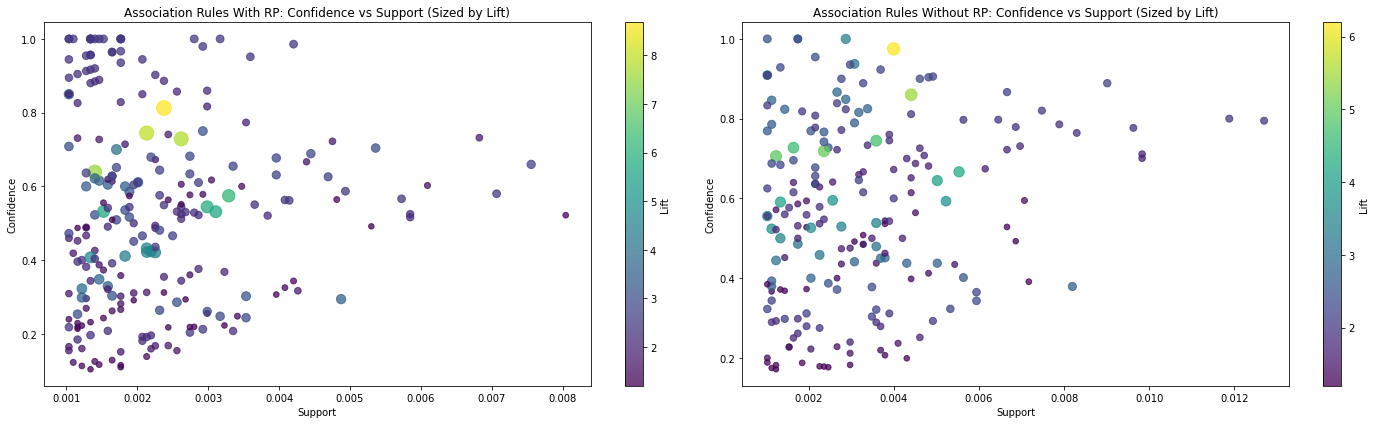

In [15]:
plot_rules(filtered_years, filtered_no_rp)

As seen above, the general trend of the plot for rules with 'RP' ratings shows a positive correlation between confidence and support of the rules. This suggests that the confidence of each rule is not based on a few isolated transactions, but represents a larger trend in the dataset.

The size of each point is also dictated by their lift value. Given the general size of each point, it suggests that the rules from the itemset have a strong relationship between their antecedent and consequent. There is also a few amount of points that are in the 1.0 confidence range, suggesting that there are few rules mined that have 100% confidence.

On the other hand, the scatter plot for the rules excluding 'RP' ratings indicates a positive trend in the correlation of the metrics. When compared to the rules that include 'RP' ratings, the lift of the rules is generally lower. This could be due to the absence of RP ratings from the early and mid-1990s, which were previously guaranteed to be associated with a specific genre released in a particular year. The plot also shows fewer rules with high to 100% confidence. This reduction could be attributed to the removal of RP ratings, which decreases the certainty of a video game of a specific genre released in a year having a specific ESRB rating.

In [16]:
summarize(filtered_years)

support 
 confidence 
 lift 
 
 
 
 
 count 
 240.000000 
 240.000000 
 240.000000 
 
 
 mean 
 0.002291 
 0.530791 
 2.373748 
 
 
 std 
 0.001252 
 0.258149 
 1.117497 
 
 
 min 
 0.001036 
 0.103774 
 1.202814 
 
 
 25% 
 0.001401 
 0.308469 
 1.708056 
 
 
 50% 
 0.001919 
 0.524490 
 2.214867 
 
 
 75% 
 0.002742 
 0.691509 
 2.616109 
 
 
 max 
 0.008043 
 1.000000 
 8.675301

The summary statistic of the yearly itemsets including the 'RP' rating rule's support, confidence, and lift suggests the following:

* **Support:** The average rule in the dataset has a support of 0.0023 which indicates that it applies to about 0.23% of all video games. The rule with the most support applies to about 0.80% of games while the rule with least amount of support applies to about 0.10% of games. 
  
* **Confidence:** The average confidence of a rule suggests that it is correct about 53.07% of the time. The least reliable rule is correct only about 10.37% of the time while the most reliable rule is always correct.
  
* **Lift:** The average lift of rules is 2.37 which suggests that on average, the Genre, Release Year, and ESRB Rating, occur together about 2.37 times more than expected if these "items" were independent. The average, minimum, and maximum values suggest a very strong relationship between each rule's antecedent and consequent

The low support value might be due to the diverse combination the three features or items and how they only apply to a small fraction of the total games release. One other factor might be due to how trends in video game genres and ESRB ratings has changed significantly throughout the years, which means that a rule that may have been common in one time period is now obsolete in another.

However, the low support values still provide valuable insights into specific trends and patterns in the changing landscape of the video game industry, especially since it is backed with both high confidence and lift values suggesting strong associations.

In [17]:
summarize(filtered_no_rp)

support 
 confidence 
 lift 
 
 
 
 
 count 
 201.000000 
 201.000000 
 201.000000 
 
 
 mean 
 0.003268 
 0.568406 
 2.155337 
 
 
 std 
 0.002106 
 0.223914 
 0.833754 
 
 
 min 
 0.001024 
 0.171429 
 1.201600 
 
 
 25% 
 0.001741 
 0.387097 
 1.593030 
 
 
 50% 
 0.002765 
 0.564103 
 1.958490 
 
 
 75% 
 0.004097 
 0.745098 
 2.445279 
 
 
 max 
 0.012700 
 1.000000 
 6.193819

Meanwhile, for rules excluding the 'RP' rating, these are its summary statistics:

- **Support**: The average support is approximately 0.003268, with a minimum of 0.001024 and a maximum of 0.012700. The low support is again expected due to the numerous combinations of items present.

- **Confidence**: The average confidence is approximately 0.568406, with a minimum of 0.171429 and a maximum of 1.000000. This suggests that for about 57% of the transactions that contain a particular combination of genre and release year, the ESRB rating also applies.

- **Lift**: The average lift is approximately 2.155337, with a minimum of 1.201600 and a maximum of 6.193819. A lift greater than 1 suggests a positive association between the genre, release year, and ESRB rating. The maximum lift of 6.193819 indicates a strong positive association for certain combinations.

Despite excluding the "RP" rating, the rules still have a relatively high confidence and lift values suggest that there are significant associations between the genre, release year, and ESRB rating. This could be due to consistent trends and standards in the video game industry regarding the content of different genres and how they are rated.

### Analysis on a Specific Genre's Associated Rules
While the general analyses gave insight on what to expect from the rules, specific analyses on a given genre will give a more detailed look on how a genre's ESRB rating has changed over the years, reflecting the shift in the societal standards and consumer preferences and how it has influenced the ESRB ratings of games within each genre.

For each genre, association rules will be evaluated and analyzed by their ‘support’, ‘confidence’, and ‘lift’ metrics. The trends in these metrics over time could indicate shifts in the ESRB ratings for games within the genre. For example, an increase in the ‘confidence’ of rules associating a genre with a particular ESRB rating could suggest that games in that genre are increasingly receiving that rating.

#### 1. Action Genre Rules
Further filtering will be done to only show rules that involve the Action genre

In [18]:
action_rules = find_rules(rules=rules_yearly, genre="Action")
action_noRP = find_rules(rules=rules_no_rp, genre="Action")
len(action_rules)

47

There are 47 rules for the Action Genre with 'RP' included. It will be interesting to see the values of the metrics of each rule.

In [19]:
len(action_noRP)

30

Meanwhile, excluding the 'RP' ratings yielded 30 rules associated with the Action genre. While it is less than the rules with RP ratings, analyzing the rules may yield interesting insights and a more nuanced look into the relationship between the items

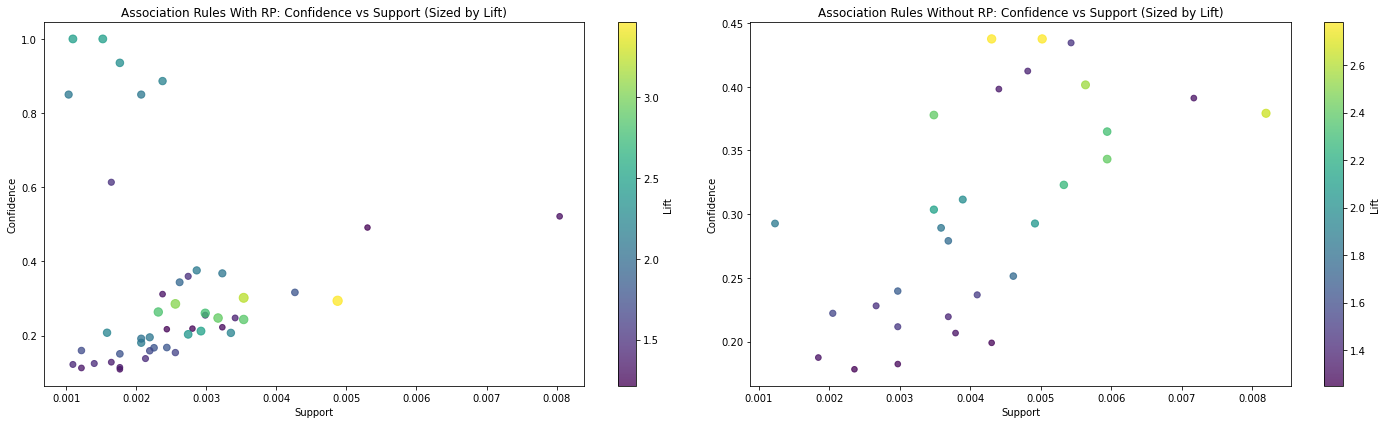

In [20]:
plot_rules(action_rules, action_noRP)

The scatter plot for the rules with the 'RP' rating suggests a positive correlation. However, it seems that both the support and confidence of the rules are a bit low and the majority of rules are found in the bottom-left part of the plot.

For the rules without the 'RP' rating, the scatter plot suggests a clear positive correlation between the metrics. However, it is interesting to note that the range of values for the confidence seems to be between 0.20 and 0.45 range, indicating that by removing the RP rating, it is now able to provide a more focused and reliable set of association rules. The narrower range of confidence values, from 0.20 to 0.45, suggests that the rules generated without the RP rating are more consistent and less varied in their degree of certainty.

This could indicate that the RP rating was introducing a level of uncertainty or variability in the previous rules. By excluding it, we’re left with a set of rules that, while perhaps less confident overall (as indicated by the lower upper limit of the confidence range), are more reliable and consistent in their associations.

In [21]:
summarize(action_rules)

support 
 confidence 
 lift 
 
 
 
 
 count 
 47.000000 
 47.000000 
 47.000000 
 
 
 mean 
 0.002579 
 0.329728 
 1.954380 
 
 
 std 
 0.001236 
 0.252664 
 0.594970 
 
 
 min 
 0.001036 
 0.109434 
 1.213544 
 
 
 25% 
 0.001767 
 0.167744 
 1.442402 
 
 
 50% 
 0.002376 
 0.243697 
 1.794503 
 
 
 75% 
 0.002986 
 0.352000 
 2.265262 
 
 
 max 
 0.008043 
 1.000000 
 3.465014

The summary statistic for associated rules including the 'RP' rating is as follows:

- **Support**: On average, about 0.26% of all video games contain both the antecedent and consequent of a rule. The range is from 0.10% to 0.80%.
  
- **Confidence**: On average, the consequent of a rule is true in 33% of the cases where the antecedent is true. The range is from 11% to 100%.
  
- **Lift**: On average, the likelihood of the consequent being true given the antecedent is 1.95 times higher than its general likelihood. The range is from 1.21 to 3.47.

In [22]:
summarize(action_noRP)

support 
 confidence 
 lift 
 
 
 
 
 count 
 30.000000 
 30.000000 
 30.000000 
 
 
 mean 
 0.004158 
 0.301072 
 1.817718 
 
 
 std 
 0.001541 
 0.085519 
 0.499796 
 
 
 min 
 0.001229 
 0.178295 
 1.249726 
 
 
 25% 
 0.003098 
 0.223684 
 1.388266 
 
 
 50% 
 0.003994 
 0.292683 
 1.721023 
 
 
 75% 
 0.004993 
 0.378805 
 2.229871 
 
 
 max 
 0.008193 
 0.437500 
 2.779278

Meanwhile, the summary statistic for associated rules excluding the 'RP' rating is as follows:

- **Support**: The rules apply to about 0.4% of all transactions, with a relatively narrow range of applicability (0.0012 to 0.0082).
  
- **Confidence**: The rules are correct about 30% of the time, with a moderate level of variability in reliability (0.178 to 0.438).
  
- **Lift**: The likelihood of the items in the rule occurring together is 1.82 times greater than if they were statistically independent, with a moderate level of variability in the strength of association (1.25 to 2.78).
  
The rules associated with the Action genre have a moderate variability in confidence, and moderate variability in lift. This suggests that they provide a reasonably reliable and moderately strong association between the items they contain. 

In [23]:
format_rules(action_rules)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 273 
 {'1981', 'Action'} => {'RP'} 
 1.000000 
 2.468933 
 0.001523 
 
 
 279 
 {'1982', 'Action'} => {'RP'} 
 1.000000 
 2.468933 
 0.001097 
 
 
 284 
 {'1996', 'Action'} => {'RP'} 
 0.850000 
 2.098593 
 0.001036 
 
 
 287 
 {'1997', 'Action'} => {'RP'} 
 0.935484 
 2.309647 
 0.001767 
 
 
 290 
 {'1998', 'Action'} => {'RP'} 
 0.886364 
 2.188373 
 0.002376 
 
 
 294 
 {'1999', 'Action'} => {'RP'} 
 0.850000 
 2.098593 
 0.002072 
 
 
 298 
 {'2000', 'Action'} => {'RP'} 
 0.613636 
 1.515027 
 0.001645 
 
 
 302 
 {'2002', 'Action'} => {'E'} 
 0.360000 
 1.503298 
 0.002742 
 
 
 306 
 {'2002', 'Action'} => {'M'} 
 0.160000 
 1.708367 
 0.001219 
 
 
 310 
 {'2002', 'Action'} => {'T'} 
 0.344000 
 1.944003 
 0.002620 
 
 
 316 
 {'2003', 'Action'} => {'M'} 
 0.263889 
 2.817619 
 0.002316 
 
 
 322 
 {'2003', 'Action'} => {'T'} 
 0.368056 
 2.079945 
 0.003230 
 
 
 326 
 {'2004', 'Action'} => {'E'} 
 0.312000 
 1.302858 
 0.002376 
 
 
 330 
 {'2004', 'Action'} => {'M'} 
 0.208000 
 2.220877 
 0.001584 
 
 
 334 
 {'2004', 'Action'} => {'T'} 
 0.376000 
 2.124840 
 0.002864 
 
 
 338 
 {'2005', 'Action'} => {'E10+'} 
 0.151042 
 1.779429 
 0.001767 
 
 
 342 
 {'2005', 'Action'} => {'M'} 
 0.302083 
 3.225432 
 0.003534 
 
 
 348 
 {'2005', 'Action'} => {'T'} 
 0.255208 
 1.442226 
 0.002986 
 
 
 352 
 {'2006', 'Action'} => {'E10+'} 
 0.125000 
 1.472631 
 0.001401 
 
 
 354 
 {'2006', 'Action'} => {'M'} 
 0.195652 
 2.089036 
 0.002194 
 
 
 358 
 {'2006', 'Action'} => {'T'} 
 0.217391 
 1.228515 
 0.002437 
 
 
 362 
 {'2007', 'Action'} => {'E10+'} 
 0.247619 
 2.917212 
 0.003169 
 
 
 368 
 {'2007', 'Action'} => {'M'} 
 0.128571 
 1.372795 
 0.001645 
 
 
 372 
 {'2007', 'Action'} => {'T'} 
 0.219048 
 1.237876 
 0.002803 
 
 
 374 
 {'2008', 'Action'} => {'E10+'} 
 0.203620 
 2.398856 
 0.002742 
 
 
 378 
 {'2008', 'Action'} => {'M'} 
 0.167421 
 1.787601 
 0.002255 
 
 
 382 
 {'2008', 'Action'} => {'T'} 
 0.316742 
 1.789964 
 0.004265 
 
 
 388 
 {'2009', 'Action'} => {'E10+'} 
 0.294118 
 3.465014 
 0.004875 
 
 
 394 
 {'2009', 'Action'} => {'M'} 
 0.154412 
 1.648700 
 0.002559 
 
 
 398 
 {'2010', 'Action'} => {'E10+'} 
 0.212389 
 2.502170 
 0.002925 
 
 
 404 
 {'2010', 'Action'} => {'M'} 
 0.159292 
 1.700808 
 0.002194 
 
 
 408 
 {'2010', 'Action'} => {'T'} 
 0.247788 
 1.400290 
 0.003412 
 
 
 412 
 {'2011', 'Action'} => {'E10+'} 
 0.243697 
 2.871012 
 0.003534 
 
 
 418 
 {'2011', 'Action'} => {'M'} 
 0.168067 
 1.794503 
 0.002437 
 
 
 422 
 {'2011', 'Action'} => {'T'} 
 0.222689 
 1.258454 
 0.003230 
 
 
 428 
 {'2012', 'Action'} => {'E10+'} 
 0.109434 
 1.289247 
 0.001767 
 
 
 434 
 {'2012', 'Action'} => {'M'} 
 0.207547 
 2.216042 
 0.003351 
 
 
 446 
 {'2013', 'Action'} => {'E10+'} 
 0.122449 
 1.442577 
 0.001097 
 
 
 450 
 {'2013', 'Action'} => {'M'} 
 0.285714 
 3.050655 
 0.002559 
 
 
 461 
 {'2014', 'Action'} => {'E10+'} 
 0.180851 
 2.130615 
 0.002072 
 
 
 467 
 {'2014', 'Action'} => {'M'} 
 0.260638 
 2.782912 
 0.002986 
 
 
 480 
 {'2015', 'Action'} => {'E10+'} 
 0.114625 
 1.350397 
 0.001767 
 
 
 486 
 {'2015', 'Action'} => {'M'} 
 0.138340 
 1.477096 
 0.002133 
 
 
 492 
 {'2015', 'Action'} => {'RP'} 
 0.521739 
 1.288139 
 0.008043 
 
 
 502 
 {'2016', 'Action'} => {'E10+'} 
 0.112994 
 1.331192 
 0.001219 
 
 
 508 
 {'2016', 'Action'} => {'M'} 
 0.192090 
 2.051006 
 0.002072 
 
 
 514 
 {'2016', 'Action'} => {'RP'} 
 0.491525 
 1.213544 
 0.005301

In the earliest years of the dataset, 1981 and 1982, every Action game was rated 'Rating Pending' (RP), as indicated by the confidence of 1.0. This is to be expected as the ESRB foundation was found the early 1990s.

From 1996 to 2000, the 'RP' rating is still the most common for Action games, with high confidence values ranging from 0.85 to 0.94. However, starting in 2002, other ESRB ratings start to appear in the rules. 
In 2002, the 'Everyone' (E) rating has the highest confidence of 0.36, but the 'Mature' (M) and 'Teen' (T) ratings also appear with lower confidence values. This suggests a diversification in the content of Action games starting in this year.

In the following years, 'E', 'M', and 'T' ratings continue to be associated with the Action genre, with varying degrees of confidence and lift. Notably, in 2010, the 'Everyone 10+' (E10+) rating appears with a high confidence of 0.21 and a lift of 2.50. This suggests a trend towards content suitable for ages 10 and up in Action games.

Finally, in 2015 and 2016, the 'RP' rating reappears with high confidence values of 0.52 and 0.49, respectively. This could indicate a delay in the finalization of ESRB ratings for Action games in more recent years.

In [24]:
format_rules(action_noRP)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 186 
 {'2001', 'Action'} => {'M'} 
 0.292683 
 1.859308 
 0.001229 
 
 
 194 
 {'2002', 'Action'} => {'T'} 
 0.398148 
 1.338677 
 0.004404 
 
 
 196 
 {'2003', 'Action'} => {'M'} 
 0.311475 
 1.978690 
 0.003892 
 
 
 200 
 {'2003', 'Action'} => {'T'} 
 0.434426 
 1.460653 
 0.005428 
 
 
 206 
 {'2004', 'Action'} => {'M'} 
 0.228070 
 1.448847 
 0.002663 
 
 
 208 
 {'2004', 'Action'} => {'T'} 
 0.412281 
 1.386194 
 0.004814 
 
 
 210 
 {'2005', 'Action'} => {'E10+'} 
 0.182390 
 1.278432 
 0.002970 
 
 
 214 
 {'2005', 'Action'} => {'M'} 
 0.364780 
 2.317313 
 0.005940 
 
 
 220 
 {'2006', 'Action'} => {'E10+'} 
 0.178295 
 1.249726 
 0.002356 
 
 
 222 
 {'2006', 'Action'} => {'M'} 
 0.279070 
 1.772828 
 0.003687 
 
 
 226 
 {'2007', 'Action'} => {'E10+'} 
 0.322981 
 2.263884 
 0.005326 
 
 
 234 
 {'2008', 'Action'} => {'E10+'} 
 0.251397 
 1.762123 
 0.004609 
 
 
 236 
 {'2008', 'Action'} => {'M'} 
 0.206704 
 1.313114 
 0.003789 
 
 
 240 
 {'2008', 'Action'} => {'T'} 
 0.391061 
 1.314850 
 0.007169 
 
 
 244 
 {'2009', 'Action'} => {'E10+'} 
 0.379147 
 2.657567 
 0.008193 
 
 
 250 
 {'2009', 'Action'} => {'M'} 
 0.199052 
 1.264506 
 0.004302 
 
 
 254 
 {'2010', 'Action'} => {'E10+'} 
 0.292683 
 2.051512 
 0.004916 
 
 
 260 
 {'2010', 'Action'} => {'M'} 
 0.219512 
 1.394481 
 0.003687 
 
 
 264 
 {'2011', 'Action'} => {'E10+'} 
 0.343195 
 2.405570 
 0.005940 
 
 
 270 
 {'2011', 'Action'} => {'M'} 
 0.236686 
 1.503582 
 0.004097 
 
 
 276 
 {'2012', 'Action'} => {'E10+'} 
 0.211679 
 1.483727 
 0.002970 
 
 
 282 
 {'2012', 'Action'} => {'M'} 
 0.401460 
 2.550328 
 0.005633 
 
 
 294 
 {'2013', 'Action'} => {'E10+'} 
 0.187500 
 1.314250 
 0.001844 
 
 
 299 
 {'2013', 'Action'} => {'M'} 
 0.437500 
 2.779278 
 0.004302 
 
 
 307 
 {'2014', 'Action'} => {'E10+'} 
 0.303571 
 2.127833 
 0.003482 
 
 
 313 
 {'2014', 'Action'} => {'M'} 
 0.437500 
 2.779278 
 0.005018 
 
 
 322 
 {'2015', 'Action'} => {'E10+'} 
 0.239669 
 1.679923 
 0.002970 
 
 
 328 
 {'2015', 'Action'} => {'M'} 
 0.289256 
 1.837539 
 0.003585 
 
 
 338 
 {'2016', 'Action'} => {'E10+'} 
 0.222222 
 1.557629 
 0.002048 
 
 
 344 
 {'2016', 'Action'} => {'M'} 
 0.377778 
 2.399884 
 0.003482

On the other hand, the associated rules for the Action genre interestingly reveal that there are several years (2003, 2008, 2009, 2011, 2013, 2014, 2015) where different ESRB ratings (E10+, M) are associated with the Action genre. This could indicate a diversity in the content of Action games released in those years, catering to different age groups. For instance, in 2003, both 'Mature' (M) and 'Teen' (T) ratings are associated with the Action genre. However, the 'Teen' (T) rating has a higher confidence and lift compared to the 'Mature' (M) rating, suggesting that in 2003, Action games were more likely to be rated 'Teen' (T) than 'Mature' (M).

Similarly, in 2008, all three ESRB ratings (E10+, M, T) are associated with the Action genre. However, the 'Teen' (T) rating has the highest confidence and lift, followed by 'Everyone 10+' (E10+) and 'Mature' (M).

In terms of the most frequent rating throughout the years, the ‘Mature’ (M) rating appears to be the most common, appearing in the rules for every year except 2005 and 2006. This suggests that Action games are more frequently rated as ‘Mature’ (M), indicating a trend towards more mature content in this genre over time.

#### 2. Adventure Genre Rules
Further filtering will be done to only show rules that involve the Adventure genre

In [25]:
adventure_rules = find_rules(rules=rules_yearly, genre="Adventure")
adventure_noRP = find_rules(rules=rules_no_rp, genre="Adventure")
len(adventure_rules)

13

There are only 13 rules for the adventure genre, which is very small compared to the previous genre.

In [26]:
len(adventure_noRP)

7

There are 7 rules associated with the Adventure genre without the RP rating. While small, this could yield further insights to the relationship and the trend of games of the Adventure genre

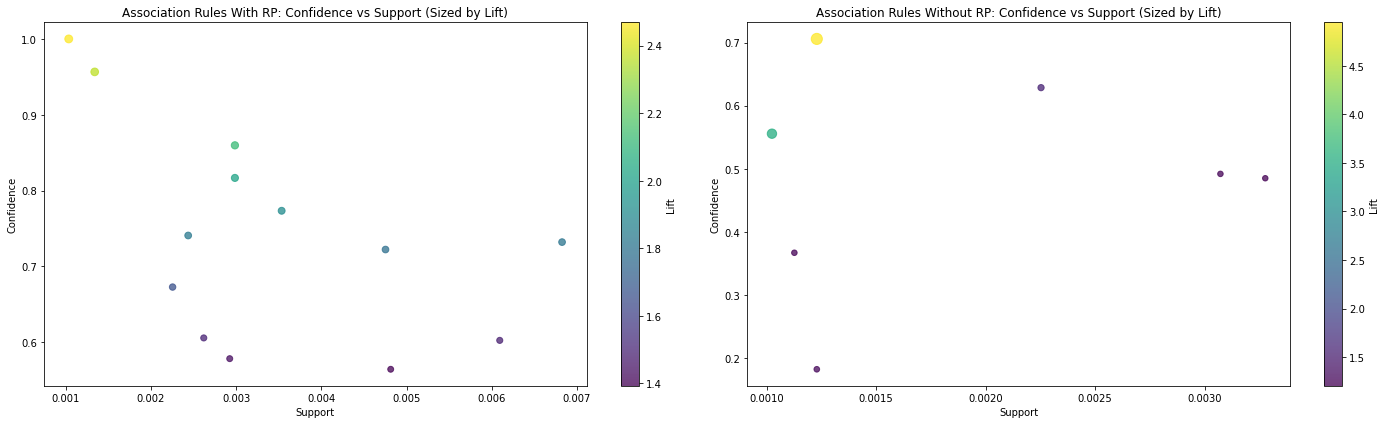

In [27]:
plot_rules(adventure_rules, adventure_noRP)

The scatter plot for the associated rules including the 'RP' rating has an uncertain correlation due to the small size of the dataset. Despite this, the high confidence and support values for these rules suggest a strong association between the Adventure genre and the ESRB ratings. This implies that while the trend may be changing, a significant proportion of Adventure games still receive specific ESRB ratings each year.

Similarly, for the associated rules excluding the 'RP' rating, due to the small size, the correlation cannot be determined from the scatter plot. However, the range of values for the metrics seems diverse and the size of the nodes are relatively big, suggesting that the metrics for the rules have more nuances.

In [28]:
summarize(adventure_rules)

support 
 confidence 
 lift 
 
 
 
 
 count 
 13.000000 
 13.000000 
 13.000000 
 
 
 mean 
 0.003431 
 0.740348 
 1.827871 
 
 
 std 
 0.001734 
 0.139849 
 0.345279 
 
 
 min 
 0.001036 
 0.564286 
 1.393184 
 
 
 25% 
 0.002437 
 0.605634 
 1.495269 
 
 
 50% 
 0.002986 
 0.732026 
 1.807324 
 
 
 75% 
 0.004753 
 0.816667 
 2.016296 
 
 
 max 
 0.006825 
 1.000000 
 2.468933

The summary statistic for associated rules including the 'RP' rating is as follows:

- **Support**: The average support value is approximately 0.0034, indicating that these rules are not very frequent in the dataset. The support values range from a minimum of 0.0010 to a maximum of 0.0068, with a standard deviation of 0.0017, suggesting a moderate variation in the frequency of these rules.

- **Confidence**: The average confidence value is approximately 0.74, indicating that these rules are often correct. The confidence values range from a minimum of 0.56 to a maximum of 1.0, with a standard deviation of 0.14, suggesting a moderate variation in the reliability of these rules.

- **Lift**: The average lift value is approximately 1.83. The lift values range from a minimum of 1.39 to a maximum of 2.47, with a standard deviation of 0.35, suggesting a moderate variation in the dependence of these items.

In [29]:
summarize(adventure_noRP)

support 
 confidence 
 lift 
 
 
 
 
 count 
 7.000000 
 7.000000 
 7.000000 
 
 
 mean 
 0.001887 
 0.487878 
 2.138914 
 
 
 std 
 0.000971 
 0.173345 
 1.496557 
 
 
 min 
 0.001024 
 0.181818 
 1.204596 
 
 
 25% 
 0.001178 
 0.425758 
 1.227351 
 
 
 50% 
 0.001229 
 0.491803 
 1.274424 
 
 
 75% 
 0.002663 
 0.592063 
 2.545457 
 
 
 max 
 0.003277 
 0.705882 
 4.947764

Meanwhile, the summary statistic for associated rules excluding the 'RP' rating is as follows:

- **Support**: The rules apply to about 0.19% of all transactions, with a relatively narrow range of applicability (0.001 to 0.0033).
  
- **Confidence**: The rules are correct about 49% of the time, with a moderate level of variability in reliability (0.18 to 0.71).
  
- **Lift**: The likelihood of the items in the rule occurring together is 2.14 times greater than if they were statistically independent, with a moderate level of variability in the strength of association (1.20 to 4.95).

While the Adventure genre may not be as prevalent in the dataset, the games that do fall into this genre show a moderately strong and reliable association between their genre, release year, and ESRB rating. 

In [30]:
format_rules(adventure_rules)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 525 
 {'1996', 'Adventure'} => {'RP'} 
 1.000000 
 2.468933 
 0.001036 
 
 
 528 
 {'Adventure', '1998'} => {'RP'} 
 0.956522 
 2.361588 
 0.001341 
 
 
 530 
 {'2006', 'Adventure'} => {'RP'} 
 0.605634 
 1.495269 
 0.002620 
 
 
 536 
 {'Adventure', '2007'} => {'RP'} 
 0.578313 
 1.427817 
 0.002925 
 
 
 542 
 {'Adventure', '2008'} => {'RP'} 
 0.602410 
 1.487309 
 0.006093 
 
 
 550 
 {'Adventure', '2009'} => {'RP'} 
 0.564286 
 1.393184 
 0.004814 
 
 
 560 
 {'2010', 'Adventure'} => {'RP'} 
 0.732026 
 1.807324 
 0.006825 
 
 
 564 
 {'Adventure', '2011'} => {'RP'} 
 0.722222 
 1.783119 
 0.004753 
 
 
 570 
 {'Adventure', '2012'} => {'RP'} 
 0.859649 
 2.122416 
 0.002986 
 
 
 576 
 {'2013', 'Adventure'} => {'RP'} 
 0.816667 
 2.016296 
 0.002986 
 
 
 583 
 {'Adventure', '2014'} => {'RP'} 
 0.773333 
 1.909308 
 0.003534 
 
 
 588 
 {'2015', 'Adventure'} => {'RP'} 
 0.740741 
 1.828840 
 0.002437 
 
 
 594 
 {'2016', 'Adventure'} => {'RP'} 
 0.672727 
 1.660919 
 0.002255

All the associated rules for the Adventure genre seems to suggest that an adventure game will most likely be rated 'Rating Pending' (RP). This could indicate that Adventure games often have content that requires further review by the ESRB before a final rating is assigned. However, an 'RP' rating doesn’t provide specific insights into the game’s content, making it a point of interest for further investigation.

In [31]:
format_rules(adventure_noRP)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 354 
 {'2002', 'Adventure'} => {'T'} 
 0.366667 
 1.232828 
 0.001127 
 
 
 358 
 {'Adventure', '2007'} => {'E'} 
 0.628571 
 1.561672 
 0.002253 
 
 
 365 
 {'Adventure', '2008'} => {'E'} 
 0.484848 
 1.204596 
 0.003277 
 
 
 370 
 {'Adventure', '2008'} => {'E10+'} 
 0.181818 
 1.274424 
 0.001229 
 
 
 381 
 {'Adventure', '2009'} => {'E'} 
 0.491803 
 1.221875 
 0.003073 
 
 
 395 
 {'Adventure', '2014'} => {'E10+'} 
 0.705882 
 4.947764 
 0.001229 
 
 
 402 
 {'2016', 'Adventure'} => {'M'} 
 0.555556 
 3.529242 
 0.001024

Excluding the 'RP' rating yielded a much better look at the likeliness of the Adventure genre's ESRB rating.

In 2002, Adventure games were more likely to be rated 'Teen' (T) with a confidence of 0.37 and a lift of 1.23. However, in 2007 and 2008, Adventure games were more likely to be rated 'Everyone' (E) with a confidence of 0.63 and 0.48, and a lift of 1.56 and 1.20, respectively. 

Interestingly, in 2008, there's also a rule associating Adventure games with the 'Everyone 10+' (E10+) rating, but with a lower confidence of 0.18 and a lift of 1.27. This suggests that while most Adventure games in 2008 were rated 'Everyone' (E), a smaller proportion were rated 'Everyone 10+' (E10+).

In 2009, the trend of Adventure games being rated 'Everyone' (E) continues with a confidence of 0.49 and a lift of 1.22. However, in 2014, Adventure games were more likely to be rated 'Everyone 10+' (E10+) with a high confidence of 0.71 and a lift of 4.95.

Finally, in 2016, Adventure games were more likely to be rated 'Mature' (M) with a confidence of 0.56 and a lift of 3.53. This suggests a shift towards more mature content in Adventure games in more recent years.

#### 3. Fighting Genre Rules
Further filtering will be done to only show rules that involve the Fighting genre

In [32]:
fighting_rules = find_rules(rules=rules_yearly, genre="Fighting")
fighting_noRP = find_rules(rules=rules_no_rp, genre="Fighting")
len(fighting_rules)

16

There are 16 rules for the fighting genre. While small, it could still lead to interesting insights about the fighting genre.

In [33]:
len(fighting_noRP)

15

There are 15 rules associated with the Fighting genre. Interestingly, only one less rule from when the 'RP' rating is included. Thus, analyzing the rules excluding the RP ratings may yield more nuances in the relationship between the items

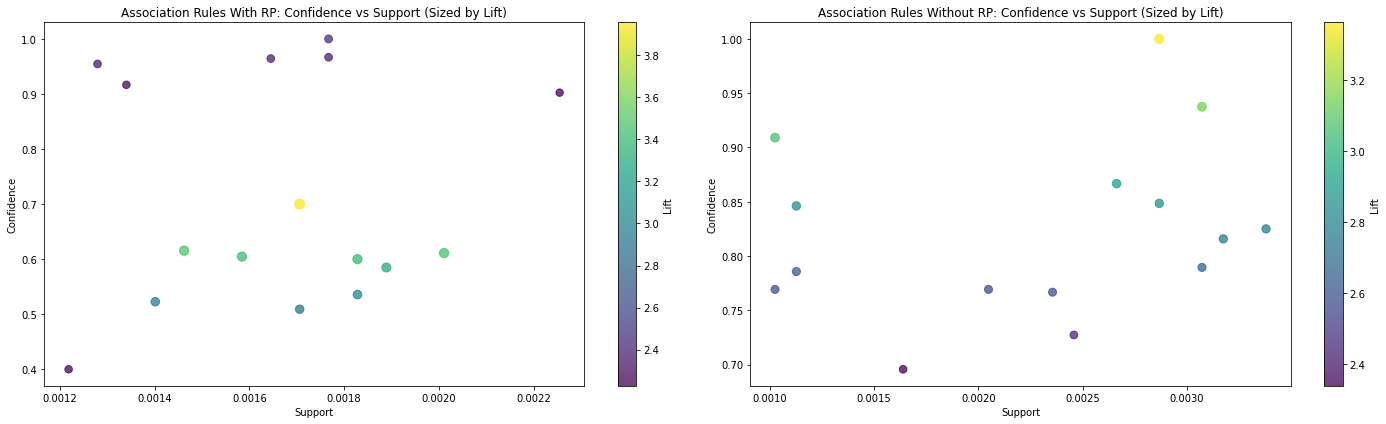

In [34]:
plot_rules(fighting_rules, fighting_noRP)

Similar to the previous genre, the trend for rules including the 'RP' rating is not clear due to the small size but the values for the confidence and support are high and the size of the nodes is also a bit bigger.

For rules excluding the 'RP' rating, it has similar unclear trends due to the small size. Interestingly, the range of values for the metrics are high, specifically for the confidence metric. This suggests a clear likeliness with the rating of a Fighting game 

In [35]:
summarize(fighting_rules)

support 
 confidence 
 lift 
 
 
 
 
 count 
 16.000000 
 16.000000 
 16.000000 
 
 
 mean 
 0.001668 
 0.711762 
 2.887700 
 
 
 std 
 0.000279 
 0.202275 
 0.561227 
 
 
 min 
 0.001219 
 0.400000 
 2.228062 
 
 
 25% 
 0.001447 
 0.572608 
 2.374745 
 
 
 50% 
 0.001706 
 0.613248 
 2.915490 
 
 
 75% 
 0.001828 
 0.926136 
 3.397274 
 
 
 max 
 0.002255 
 1.000000 
 3.955820

The summary statistic for associated rules including the 'RP' rating is as follows:

- **Support**: The average support value is approximately 0.0017. The support values range from a minimum of 0.0012 to a maximum of 0.0023.
  
- **Confidence**: The average confidence value is approximately 0.71, indicating these rules are often correct. The confidence values range from a minimum of 0.40 to a maximum of 1.0.
  
- **Lift**: The average lift value is approximately 2.89, indicating that the items in these rules are likely to be bought together. The lift values range from a minimum of 2.23 to a maximum of 3.96.

The rules associated with the Fighting genre, often correct and suggest a significant association between the Fighting genre and the ESRB ratings. However, there is a variation in these metrics, indicating that the strength of this association may vary across different rules.

In [36]:
summarize(fighting_noRP)

support 
 confidence 
 lift 
 
 
 
 
 count 
 15.000000 
 15.000000 
 15.000000 
 
 
 mean 
 0.002260 
 0.823462 
 2.768692 
 
 
 std 
 0.000863 
 0.080997 
 0.272333 
 
 
 min 
 0.001024 
 0.695652 
 2.338963 
 
 
 25% 
 0.001383 
 0.769231 
 2.586353 
 
 
 50% 
 0.002458 
 0.815789 
 2.742895 
 
 
 75% 
 0.002970 
 0.857576 
 2.883392 
 
 
 max 
 0.003380 
 1.000000 
 3.362259

Meanwhile, the summary statistics for the associated rules excluding 'RP' rating are as follows:

- **Support**: The rules apply to about 0.23% of all transactions, with a relatively narrow range of applicability (0.001 to 0.0034).
  
- **Confidence**: The rules are correct about 82% of the time, with a moderate level of variability in reliability (0.70 to 1.0).
  
- **Lift**: The likelihood of the items in the rule occurring together is 2.77 times greater than if they were statistically independent, with a moderate level of variability in the strength of association (2.34 to 3.36).

The high confidence and lift of these rules suggest that they provide a reliable and strong association between the Fighting genre, release year, and ESRB rating.

In [37]:
format_rules(fighting_rules)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 600 
 {'Fighting', '1994'} => {'RP'} 
 0.954545 
 2.356709 
 0.001280 
 
 
 606 
 {'Fighting', '1995'} => {'RP'} 
 1.000000 
 2.468933 
 0.001767 
 
 
 613 
 {'1996', 'Fighting'} => {'RP'} 
 0.966667 
 2.386636 
 0.001767 
 
 
 619 
 {'1997', 'Fighting'} => {'RP'} 
 0.964286 
 2.380757 
 0.001645 
 
 
 624 
 {'Fighting', '1998'} => {'RP'} 
 0.902439 
 2.228062 
 0.002255 
 
 
 630 
 {'1999', 'Fighting'} => {'RP'} 
 0.916667 
 2.263189 
 0.001341 
 
 
 636 
 {'2002', 'Fighting'} => {'T'} 
 0.611111 
 3.453493 
 0.002011 
 
 
 642 
 {'Fighting', '2003'} => {'T'} 
 0.522727 
 2.954021 
 0.001401 
 
 
 648 
 {'Fighting', '2004'} => {'T'} 
 0.615385 
 3.477644 
 0.001462 
 
 
 654 
 {'Fighting', '2005'} => {'T'} 
 0.604651 
 3.416987 
 0.001584 
 
 
 663 
 {'2006', 'Fighting'} => {'T'} 
 0.509091 
 2.876960 
 0.001706 
 
 
 670 
 {'Fighting', '2007'} => {'T'} 
 0.400000 
 2.260468 
 0.001219 
 
 
 674 
 {'Fighting', '2008'} => {'T'} 
 0.535714 
 3.027413 
 0.001828 
 
 
 678 
 {'Fighting', '2009'} => {'T'} 
 0.584906 
 3.305402 
 0.001889 
 
 
 682 
 {'2010', 'Fighting'} => {'T'} 
 0.700000 
 3.955820 
 0.001706 
 
 
 686 
 {'Fighting', '2011'} => {'T'} 
 0.600000 
 3.390702 
 0.001828

For games released between 1994 and 1999, there is a high confidence (ranging from 0.91 to 1.0) that a Fighting game will have a 'Rating Pending' (RP) rating. This is a common trend as the ESRB foundation has just been release so games are less likely to be subject with actual ratings.

From 2002 onwards, there’s a shift in the association from the 'RP' rating to the 'Teen' (T) rating. The confidence for these rules is lower (ranging from 0.40 to 0.70), indicating that a significant proportion of Fighting games receive a 'T'. This trend is consistent with the Fighting genre, likely to be rated the 'T' rating.

In [38]:
format_rules(fighting_noRP)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 406 
 {'Fighting', '2000'} => {'T'} 
 0.769231 
 2.586353 
 0.001024 
 
 
 412 
 {'2002', 'Fighting'} => {'T'} 
 0.825000 
 2.773864 
 0.003380 
 
 
 418 
 {'Fighting', '2003'} => {'T'} 
 0.766667 
 2.577732 
 0.002356 
 
 
 422 
 {'Fighting', '2004'} => {'T'} 
 0.727273 
 2.445279 
 0.002458 
 
 
 426 
 {'Fighting', '2005'} => {'T'} 
 0.866667 
 2.913958 
 0.002663 
 
 
 430 
 {'2006', 'Fighting'} => {'T'} 
 0.848485 
 2.852826 
 0.002868 
 
 
 434 
 {'Fighting', '2007'} => {'T'} 
 0.769231 
 2.586353 
 0.002048 
 
 
 438 
 {'Fighting', '2008'} => {'T'} 
 0.937500 
 3.152118 
 0.003073 
 
 
 442 
 {'Fighting', '2009'} => {'T'} 
 0.815789 
 2.742895 
 0.003175 
 
 
 446 
 {'2010', 'Fighting'} => {'T'} 
 1.000000 
 3.362259 
 0.002868 
 
 
 450 
 {'Fighting', '2011'} => {'T'} 
 0.789474 
 2.654415 
 0.003073 
 
 
 455 
 {'Fighting', '2012'} => {'T'} 
 0.695652 
 2.338963 
 0.001639 
 
 
 460 
 {'Fighting', '2014'} => {'T'} 
 0.846154 
 2.844988 
 0.001127 
 
 
 464 
 {'2015', 'Fighting'} => {'T'} 
 0.785714 
 2.641775 
 0.001127 
 
 
 468 
 {'2016', 'Fighting'} => {'T'} 
 0.909091 
 3.056599 
 0.001024

On the other hand, the association rules for the Fighting genre reveal a consistent pattern: the 'Teen' (T) rating is strongly associated with this genre across multiple years. The confidence of these rules, which indicates the probability of a rule being correct, is quite high, ranging from 0.70 to 1.0. This suggests that when a game is of the Fighting genre and released in a specific year, it is very likely to be rated 'Teen' (T). 

Interestingly, in 2010, every Fighting game was rated 'Teen' (T), as indicated by the confidence of 1.0. This suggests that in 2010, the content of Fighting games was consistently deemed suitable for teens.

It's also worth noting that whether the 'Rating Pending' (RP) rating is included or excluded, the Fighting genre remains to have a similar likeliness to be rated 'Teen' (T). This indicates that the 'Rating Pending' (RP) rating does not significantly impact the association between the Fighting genre and the 'Teen' (T) rating. This consistency underscores the robustness of these association rules and their ability to provide reliable insights into the trends and patterns within the Fighting genre of video games.

#### 4. Misc Genre Rules
Further filtering will be done to only show rules that involve the Misc genre

In [39]:
misc_rules = find_rules(rules=rules_yearly, genre="Misc")
misc_noRP = find_rules(rules=rules_no_rp, genre="Misc")
len(misc_rules)

20

There are 20 rules involving the Misc genre. While also small, it still offers valuable insight on the any findings on the shift of ESRB rating for this specific genre throughout the years

In [40]:
len(misc_noRP)

15

There are 15 rules associated with the Misc genre. While lesser than the rules with the 'RP' ratings included, analyzing the rules excluding the RP ratings may yield more nuances in the relationship between the items.

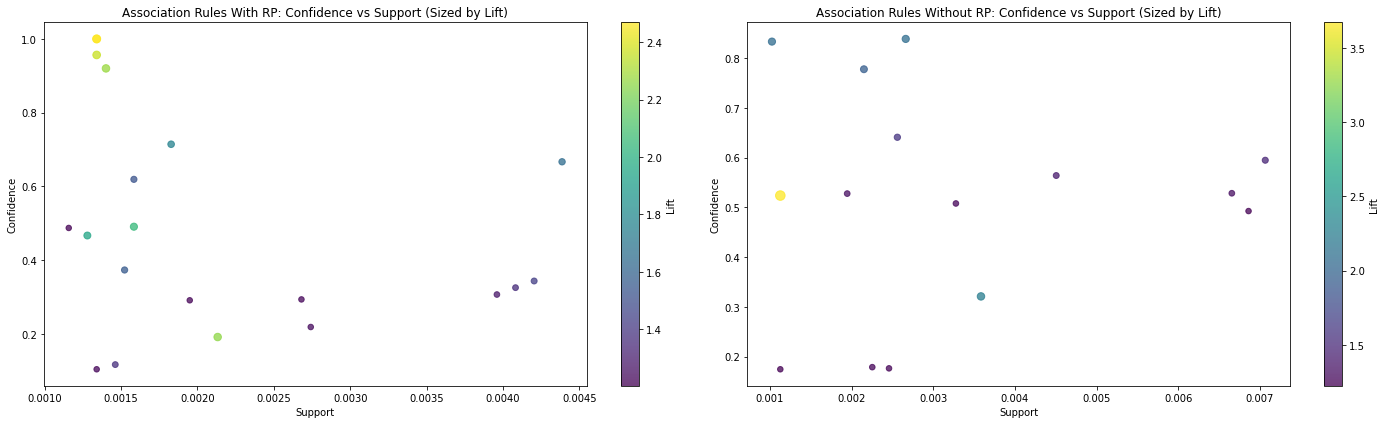

In [41]:
plot_rules(misc_rules, misc_noRP)

Similar to previous analysis, the plot of Misc rules with 'RP' ratings does not show a clear trend. While the lift makes the individual points bigger, its confidence and support value are low

For rules without the 'RP' rating, the scatter plot similarly does not show a clear trend in the correlation between the metrics, but it is noticeable that the range of values are diverse. It also seems to show that there are few rules that are below 0.5 and the rest of the rules are between 0.5 and 0.8. The size of the nodes are also relatively large.

In [42]:
summarize(misc_rules)

support 
 confidence 
 lift 
 
 
 
 
 count 
 20.000000 
 20.000000 
 20.000000 
 
 
 mean 
 0.002166 
 0.494171 
 1.693070 
 
 
 std 
 0.001111 
 0.294426 
 0.465431 
 
 
 min 
 0.001158 
 0.103774 
 1.202814 
 
 
 25% 
 0.001341 
 0.292727 
 1.268863 
 
 
 50% 
 0.001584 
 0.419900 
 1.543266 
 
 
 75% 
 0.002696 
 0.678571 
 2.099691 
 
 
 max 
 0.004387 
 1.000000 
 2.468933

The summary statistics for associated rules including 'RP' rating are as follows:

- **Support**: The average support value is approximately 0.0022.The support values range from a minimum of 0.0012 to a maximum of 0.0044.
  
- **Confidence**: The average confidence value is approximately 0.49, indicating these rules are correct about half of the time. The confidence values range from a minimum of 0.10 to a maximum of 1.0.
  
- **Lift**: The average lift value is approximately 1.69, indicating that the features in these rules co-occur more often than would be expected if they were statistically independent. The lift values range from a minimum of 1.20 to a maximum of 2.47.

The rules associated with the Misc genre are only correct about half of the time, they suggest a significant association between the Misc genre and the ESRB ratings. However, there is a variation in these metrics, indicating that the strength of this association may vary across different rules. 

In [43]:
summarize(misc_noRP)

support 
 confidence 
 lift 
 
 
 
 
 count 
 15.000000 
 15.000000 
 15.000000 
 
 
 mean 
 0.003284 
 0.512096 
 1.687023 
 
 
 std 
 0.002074 
 0.220672 
 0.656614 
 
 
 min 
 0.001024 
 0.174603 
 1.223852 
 
 
 25% 
 0.002048 
 0.406874 
 1.257829 
 
 
 50% 
 0.002560 
 0.527778 
 1.401501 
 
 
 75% 
 0.004045 
 0.617927 
 2.001385 
 
 
 max 
 0.007067 
 0.838710 
 3.671555

For associated rules without the 'RP' rating, here are its summary statistics:

- **Support**: The rules apply to about 0.33% of all transactions, with a relatively narrow range of applicability (0.001 to 0.0071).
  
- **Confidence**: The rules are correct about 51% of the time, with a moderate level of variability in reliability (0.17 to 0.84).
  
- **Lift**: The likelihood of the items in the rule occurring together is 1.69 times greater than if they were statistically independent, with a moderate level of variability in the strength of association (1.22 to 3.67).

The moderate confidence and lift of these rules suggest that they provide a reasonably reliable and moderately strong association between the Misc genre, release year, and ESRB rating.

In [44]:
format_rules(misc_rules)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 692 
 {'Misc', '1995'} => {'RP'} 
 1.000000 
 2.468933 
 0.001341 
 
 
 697 
 {'1996', 'Misc'} => {'RP'} 
 0.956522 
 2.361588 
 0.001341 
 
 
 700 
 {'1998', 'Misc'} => {'RP'} 
 1.000000 
 2.468933 
 0.001341 
 
 
 702 
 {'1999', 'Misc'} => {'RP'} 
 0.920000 
 2.271419 
 0.001401 
 
 
 706 
 {'2002', 'Misc'} => {'E'} 
 0.466667 
 1.948719 
 0.001280 
 
 
 709 
 {'Misc', '2003'} => {'E'} 
 0.490566 
 2.048519 
 0.001584 
 
 
 714 
 {'Misc', '2004'} => {'E'} 
 0.373134 
 1.558144 
 0.001523 
 
 
 721 
 {'2005', 'Misc'} => {'E'} 
 0.290909 
 1.214786 
 0.001950 
 
 
 731 
 {'2006', 'Misc'} => {'RP'} 
 0.666667 
 1.645956 
 0.004387 
 
 
 737 
 {'Misc', '2007'} => {'E'} 
 0.293333 
 1.224909 
 0.002681 
 
 
 746 
 {'Misc', '2008'} => {'E'} 
 0.306604 
 1.280324 
 0.003961 
 
 
 752 
 {'Misc', '2008'} => {'E10+'} 
 0.103774 
 1.222562 
 0.001341 
 
 
 764 
 {'Misc', '2009'} => {'E'} 
 0.325243 
 1.358157 
 0.004083 
 
 
 770 
 {'Misc', '2009'} => {'E10+'} 
 0.116505 
 1.372549 
 0.001462 
 
 
 776 
 {'Misc', '2009'} => {'T'} 
 0.218447 
 1.234479 
 0.002742 
 
 
 783 
 {'2010', 'Misc'} => {'E'} 
 0.343284 
 1.433493 
 0.004204 
 
 
 800 
 {'2011', 'Misc'} => {'E10+'} 
 0.191257 
 2.253206 
 0.002133 
 
 
 812 
 {'2013', 'Misc'} => {'RP'} 
 0.714286 
 1.763524 
 0.001828 
 
 
 816 
 {'2014', 'Misc'} => {'RP'} 
 0.619048 
 1.528387 
 0.001584 
 
 
 818 
 {'2015', 'Misc'} => {'RP'} 
 0.487179 
 1.202814 
 0.001158

Games released between 1995 and 1999, and in 2013 suggest that there is a high confidence (ranging from 0.71 to 1.0) that a Misc game will have a 'Rating Pending' (RP) rating. This again is expected for the earlier years due to the establishment of the ESRB foundaton, but in recent years, it seems to suggest that the content of fighting games is usually rated later.

From 2002 onwards, there’s a shift in the association from the 'RP' rating to the 'Everyone' (E) and 'Teen' (T) ratings. The confidence for these rules is lower (ranging from 0.10 to 0.49), indicating that a significant proportion, but not all, of Misc games receive an 'E' or 'T' rating.

In 2011, 2009, and 2008, there’s also an association with the 'Everyone 10+' (E10+) rating, although the confidence for these rules is relatively low (ranging from 0.10 to 0.19), suggesting that only a small proportion of Misc games receive an 'E10+' rating.

In [45]:
format_rules(misc_noRP)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 472 
 {'2001', 'Misc'} => {'E'} 
 0.833333 
 2.070399 
 0.001024 
 
 
 474 
 {'2002', 'Misc'} => {'E'} 
 0.777778 
 1.932372 
 0.002151 
 
 
 476 
 {'Misc', '2003'} => {'E'} 
 0.838710 
 2.083756 
 0.002663 
 
 
 478 
 {'Misc', '2004'} => {'E'} 
 0.641026 
 1.592614 
 0.002560 
 
 
 480 
 {'2005', 'Misc'} => {'E'} 
 0.507937 
 1.261957 
 0.003277 
 
 
 484 
 {'2005', 'Misc'} => {'E10+'} 
 0.174603 
 1.223852 
 0.001127 
 
 
 488 
 {'2006', 'Misc'} => {'E'} 
 0.527778 
 1.311252 
 0.001946 
 
 
 490 
 {'Misc', '2007'} => {'E'} 
 0.564103 
 1.401501 
 0.004506 
 
 
 494 
 {'Misc', '2008'} => {'E'} 
 0.528455 
 1.312936 
 0.006657 
 
 
 500 
 {'Misc', '2008'} => {'E10+'} 
 0.178862 
 1.253702 
 0.002253 
 
 
 510 
 {'Misc', '2009'} => {'E'} 
 0.492647 
 1.223971 
 0.006862 
 
 
 516 
 {'Misc', '2009'} => {'E10+'} 
 0.176471 
 1.236941 
 0.002458 
 
 
 527 
 {'2010', 'Misc'} => {'E'} 
 0.594828 
 1.477836 
 0.007067 
 
 
 540 
 {'2011', 'Misc'} => {'E10+'} 
 0.321101 
 2.250703 
 0.003585 
 
 
 550 
 {'2012', 'Misc'} => {'E10+'} 
 0.523810 
 3.671555 
 0.001127

Meanwhile, associated rules without the 'RP' rating shows a more nuanced set of rules.

In the early 2000s, specifically in 2001, 2002, and 2003, Misc games were more likely to be rated 'Everyone' (E) with high confidence values of 0.83, 0.78, and 0.84, respectively. This suggests that in these years, Misc games were very likely to be rated 'Everyone' (E), indicating a trend towards content suitable for all ages.

However, in 2004, while the 'Everyone' (E) rating is still the most common with a confidence of 0.64 and a lift of 1.59, the confidence has decreased compared to previous years. This trend continues in 2005, with the 'Everyone' (E) rating having a confidence of 0.51 and a lift of 1.26. Interestingly, in 2005, there's also a rule associating Misc games with the 'Everyone 10+' (E10+) rating, but with a lower confidence of 0.17 and a lift of 1.22. This suggests that while most Misc games in 2005 were rated 'Everyone' (E), a smaller proportion were rated 'Everyone 10+' (E10+).

In the following years, the 'Everyone' (E) rating remains the most common for Misc games, but with varying degrees of confidence and lift. Notably, in 2010, every Misc game was rated 'Everyone' (E), as indicated by the confidence of 1.0 and a lift of 2.47. This suggests that in 2010, the content of Misc games was consistently deemed suitable for everyone.

Finally, in 2011 and 2012, there's a shift towards the 'Everyone 10+' (E10+) rating, with confidence values of 0.32 and 0.52, and lift values of 2.25 and 3.67, respectively. This suggests a trend towards content suitable for ages 10 and up in more recent years.

Throughout the years, the ‘Everyone’ (E) rating appears to be the most common for Misc games, as indicated by the high confidence and lift values associated with this rating in most years. This suggests that Misc games are typically designed to be suitable for all ages. However, in more recent years, there’s a noticeable shift towards the ‘Everyone 10+’ (E10+) rating, indicating a trend towards content suitable for ages 10 and up.

#### 5. Platform Genre Rules
Further filtering will be done to only show rules that involve the Platform genre

In [46]:
platform_rules = find_rules(rules=rules_yearly, genre="Platform")
platform_noRP = find_rules(rules=rules_no_rp, genre="Platform")
len(platform_rules)

15

There are 15 rules involving the Platform genre. Despite the small size, it still offers valuable insight on the any findings on the shift of ESRB rating for this specific genre throughout the years

In [47]:
len(platform_noRP)

15

There are 15 rules associated with the Platform genre. Interestingly, it is the same size as rules with RP rating included. However, analyzing the rules excluding the RP ratings may yield more nuances in the relationship between the items

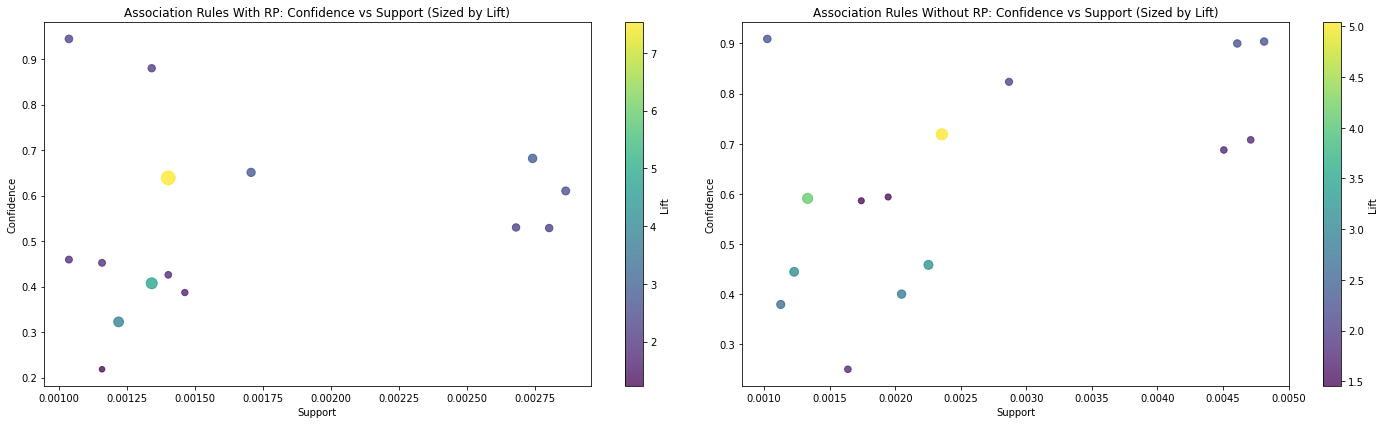

In [48]:
plot_rules(platform_rules, platform_noRP)

The scatter plot for rules including the 'RP' rating seems to suggest a relatively positive correlation. While some points have low confidence, the size of the point suggests high lift values.

For rules excluding the 'RP' rating, the scatter plot also suggests a relatively positive correlation between the metrics. The range of values is also diverse, and the size of the nodes are bigger.

In [49]:
summarize(platform_rules)

support 
 confidence 
 lift 
 
 
 
 
 count 
 15.000000 
 15.000000 
 15.000000 
 
 
 mean 
 0.001690 
 0.542587 
 2.773661 
 
 
 std 
 0.000698 
 0.197365 
 1.585942 
 
 
 min 
 0.001036 
 0.218391 
 1.234164 
 
 
 25% 
 0.001188 
 0.416667 
 1.903844 
 
 
 50% 
 0.001401 
 0.528736 
 2.213691 
 
 
 75% 
 0.002194 
 0.645026 
 2.783149 
 
 
 max 
 0.002864 
 0.944444 
 7.526781

The summary statistics for associated rules including the 'RP' rating are as follows:

- **Support:** The average support value is approximately 0.0017. The support values range from a minimum of 0.0010 to a maximum of 0.0029.
  
- **Confidence:** The average confidence value is approximately 0.54, indicating these rules are correct about half of the time. The confidence values range from a minimum of 0.22 to a maximum of 0.94.
  
- **Lift:** The average lift value is approximately 2.77, indicating that the features in these rules co-occur more often than would be expected if they were statistically independent. The lift values range from a minimum of 1.23 to a maximum of 7.53.
  
The rules associated with the Platform genre are correct about half of the time, they suggest a significant association between the Platform genre and the ESRB ratings. However, there is a variation in these metrics, indicating that the strength of this association may vary across different rules.

In [50]:
summarize(platform_noRP)

support 
 confidence 
 lift 
 
 
 
 
 count 
 15.000000 
 15.000000 
 15.000000 
 
 
 mean 
 0.002547 
 0.623558 
 2.527111 
 
 
 std 
 0.001408 
 0.208505 
 1.014334 
 
 
 min 
 0.001024 
 0.250000 
 1.456418 
 
 
 25% 
 0.001485 
 0.451389 
 1.755290 
 
 
 50% 
 0.002048 
 0.593750 
 2.245586 
 
 
 75% 
 0.003687 
 0.771140 
 2.959496 
 
 
 max 
 0.004814 
 0.909091 
 5.037958

Meanwhile, the summary statistics for associated rules excluding the 'RP' rating are as follows:

- **Support**: The rules apply to about 0.25% of all transactions, with a relatively narrow range of applicability (0.001 to 0.0048).
  
- **Confidence**: The rules are correct about 62% of the time, with a moderate level of variability in reliability (0.25 to 0.91).
  
- **Lift**: The likelihood of the items in the rule occurring together is 2.53 times greater than if they were statistically independent, with a moderate level of variability in the strength of association (1.46 to 5.04).

The rules associated with the Platform genre suggests that they do provide a highly reliable and moderately strong association between the items they contain.

In [51]:
format_rules(platform_rules)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 820 
 {'Platform', '1998'} => {'RP'} 
 0.880000 
 2.172661 
 0.001341 
 
 
 824 
 {'1999', 'Platform'} => {'RP'} 
 0.944444 
 2.331770 
 0.001036 
 
 
 829 
 {'2001', 'Platform'} => {'E'} 
 0.651163 
 2.719143 
 0.001706 
 
 
 834 
 {'2002', 'Platform'} => {'E'} 
 0.610390 
 2.548881 
 0.002864 
 
 
 845 
 {'Platform', '2003'} => {'E'} 
 0.528736 
 2.207909 
 0.002803 
 
 
 854 
 {'Platform', '2003'} => {'T'} 
 0.218391 
 1.234164 
 0.001158 
 
 
 860 
 {'Platform', '2004'} => {'E'} 
 0.681818 
 2.847155 
 0.002742 
 
 
 866 
 {'Platform', '2005'} => {'E'} 
 0.530120 
 2.213691 
 0.002681 
 
 
 874 
 {'2006', 'Platform'} => {'E'} 
 0.425926 
 1.778593 
 0.001401 
 
 
 879 
 {'2006', 'Platform'} => {'E10+'} 
 0.407407 
 4.799686 
 0.001341 
 
 
 884 
 {'Platform', '2007'} => {'E'} 
 0.452381 
 1.889065 
 0.001158 
 
 
 886 
 {'Platform', '2008'} => {'E'} 
 0.387097 
 1.616449 
 0.001462 
 
 
 888 
 {'Platform', '2008'} => {'E10+'} 
 0.322581 
 3.800338 
 0.001219 
 
 
 894 
 {'Platform', '2011'} => {'E'} 
 0.459459 
 1.918623 
 0.001036 
 
 
 898 
 {'Platform', '2013'} => {'E10+'} 
 0.638889 
 7.526781 
 0.001401

Platform games released in the early 90s follow similar trends of having 'Rating Pending' (RP) ratings.

From 2004 onwards, there’s a shift in the association from the 'RP' rating to the 'Everyone' (E) and 'Teen' (T) ratings. The confidence for these rules is lower (ranging from 0.22 to 0.68), indicating that a significant proportion, but not all, of Platform games receive an 'E' or 'T' rating.

In 2013, there’s also an association with the 'Everyone 10+' (E10+) rating, with confidence of 0.64, suggesting that a significant proportion of Platform games received an 'E10+' rating.

In 2006 and 2008, both 'E' and 'E10+' ESRB ratings had an association. This suggests that during these years, Platform games were not uniformly targeted at one specific age group but had a broader appeal.

In [52]:
format_rules(platform_noRP)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 557 
 {'2001', 'Platform'} => {'E'} 
 0.823529 
 2.046041 
 0.002868 
 
 
 562 
 {'2002', 'Platform'} => {'E'} 
 0.903846 
 2.245586 
 0.004814 
 
 
 568 
 {'Platform', '2003'} => {'E'} 
 0.707692 
 1.758246 
 0.004711 
 
 
 578 
 {'Platform', '2004'} => {'E'} 
 0.900000 
 2.236031 
 0.004609 
 
 
 584 
 {'Platform', '2005'} => {'E'} 
 0.687500 
 1.708079 
 0.004506 
 
 
 590 
 {'Platform', '2005'} => {'E10+'} 
 0.250000 
 1.752333 
 0.001639 
 
 
 599 
 {'2006', 'Platform'} => {'E10+'} 
 0.458333 
 3.212611 
 0.002253 
 
 
 604 
 {'Platform', '2007'} => {'E'} 
 0.593750 
 1.475159 
 0.001946 
 
 
 606 
 {'Platform', '2008'} => {'E10+'} 
 0.400000 
 2.803733 
 0.002048 
 
 
 612 
 {'Platform', '2009'} => {'E10+'} 
 0.444444 
 3.115259 
 0.001229 
 
 
 614 
 {'Platform', '2010'} => {'E10+'} 
 0.590909 
 4.141878 
 0.001331 
 
 
 618 
 {'Platform', '2011'} => {'E'} 
 0.586207 
 1.456418 
 0.001741 
 
 
 622 
 {'Platform', '2011'} => {'E10+'} 
 0.379310 
 2.658712 
 0.001127 
 
 
 628 
 {'Platform', '2013'} => {'E10+'} 
 0.718750 
 5.037958 
 0.002356 
 
 
 632 
 {'2015', 'Platform'} => {'E'} 
 0.909091 
 2.258617 
 0.001024

Rules associated with the Platform genre excluding the 'RP' rating yielded more nuanced rules.

In the early 2000s, specifically in 2001 and 2002, Platform games were more likely to be rated 'Everyone' (E) with high confidence values of 0.82 and 0.90, respectively. This suggests that in these years, Platform games were very likely to be rated 'Everyone' (E), indicating a trend towards content suitable for all ages.

However, starting in 2005, the 'Everyone 10+' (E10+) ratings started to appear in the rules. In 2005, the 'Everyone' (E) rating has the highest confidence of 0.69, but the 'Everyone 10+' (E10+) rating also appears with a lower confidence of 0.25.

In the following years, the 'Everyone' (E) and 'Everyone 10+' (E10+) ratings continue to be associated with the Platform genre, with varying degrees of confidence and lift. Notably, in 2013, the 'Everyone 10+' (E10+) rating appears with a high confidence of 0.72 and a lift of 5.04. This suggests a trend towards content suitable for ages 10 and up in Platform games.

Finally, in 2015, the 'Everyone' (E) rating reappears with a high confidence of 0.91 and a lift of 2.26. This could indicate a return to content suitable for all ages in Platform games in more recent years.

Throughout the years, the ‘Everyone’ (E) and ‘Everyone 10+’ (E10+) ratings appear to be the most common for Platform games. This suggests that Platform games are typically designed to be suitable for all ages or for ages 10 and up. However, the likelihood of a Platform game receiving one rating or the other varies from year to year, reflecting evolving content standards and audience preferences within the Platform genre of video games.

#### 6. Puzzle Genre Rules
Further filtering will be done to only show rules that involve the Puzzle genre

In [53]:
puzzle_rules = find_rules(rules=rules_yearly, genre="Puzzle")
puzzle_noRP = find_rules(rules=rules_no_rp, genre="Puzzle")
len(puzzle_rules)

8

The size of the rules for the Puzzle genre is few, which might indicate that small relationships were found involving the puzzle genre. This could mean that the puzzle genre is not that popular or only a few games are of the puzzle genre

In [54]:
len(puzzle_noRP)

12

There are 12 rules associated with the Puzzle genre excluding the 'RP' rating. It is interesting to note that this is a bit more rules compared to rules with the RP rating and thus, analyzing the rules excluding the RP ratings may yield more nuances in the relationship between the items

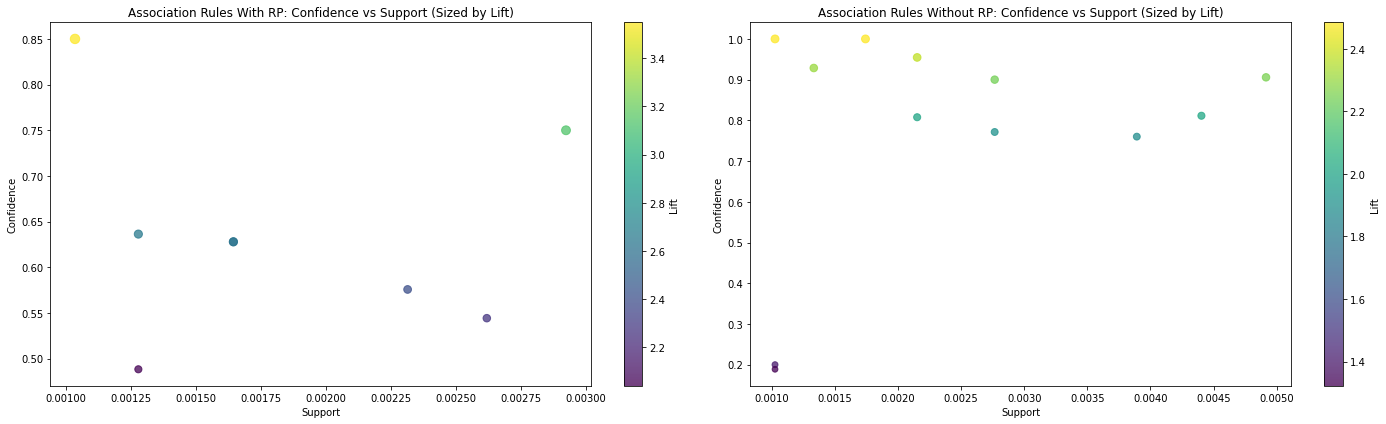

In [55]:
plot_rules(puzzle_rules, puzzle_noRP)

With such a small size for rules with 'RP' rating, a trend is not clearly seen. However, it seems that the metrics are a bit higher.

Meanwhile, excluding the 'RP' rating yielded a scatter plot which shows interesting findings. There are 2 points that have both low confidence and support, but are relatively sized from the lift value. The rest of the points are located highly, suggesting high confidence values.

In [56]:
summarize(puzzle_rules)

support 
 confidence 
 lift 
 
 
 
 
 count 
 8.000000 
 8.000000 
 8.000000 
 
 
 mean 
 0.001843 
 0.637576 
 2.662409 
 
 
 std 
 0.000693 
 0.115099 
 0.480634 
 
 
 min 
 0.001036 
 0.488372 
 2.039357 
 
 
 25% 
 0.001280 
 0.567894 
 2.371428 
 
 
 50% 
 0.001645 
 0.627907 
 2.622031 
 
 
 75% 
 0.002392 
 0.664773 
 2.775976 
 
 
 max 
 0.002925 
 0.850000 
 3.549453

The summary statistics for associated rules with 'RP' rating are as follows:

- **Support:** The average support value is approximately 0.0018, indicating these rules are not very frequent in the dataset. The support values range from a minimum of 0.0010 to a maximum of 0.0029.
  
- **Confidence:** The average confidence value is approximately 0.64, indicating these rules are correct about two-thirds of the time. The confidence values range from a minimum of 0.49 to a maximum of 0.85.
  
- **Lift:** The average lift value is approximately 2.66, indicating that the features in these rules co-occur more often than would be expected if they were statistically independent. The lift values range from a minimum of 2.04 to a maximum of 3.55.

The rules associated with the Puzzle genre are often correct and suggest a significant association between the Puzzle genre and the ESRB ratings. However, there is a variation in these metrics, indicating that the strength of this association may vary across different rules.

In [57]:
summarize(puzzle_noRP)

support 
 confidence 
 lift 
 
 
 
 
 count 
 12.000000 
 12.000000 
 12.000000 
 
 
 mean 
 0.002432 
 0.768992 
 2.057103 
 
 
 std 
 0.001355 
 0.280642 
 0.383449 
 
 
 min 
 0.001024 
 0.188679 
 1.322516 
 
 
 25% 
 0.001255 
 0.768571 
 1.909499 
 
 
 50% 
 0.002151 
 0.855660 
 2.125870 
 
 
 75% 
 0.003047 
 0.935065 
 2.323149 
 
 
 max 
 0.004916 
 1.000000 
 2.484478

The summary statistics for associated rules excluding the 'RP' rating are as follows:

- **Support**: The average support value is approximately 0.0024, with a minimum of 0.0010 and a maximum of 0.0049.

- **Confidence**: The average confidence value is approximately 0.77, with a minimum of 0.19 and a maximum of 1.00. This suggests that the rules for the puzzle genre without RP ratings are generally quite reliable.

- **Lift**: The average lift value is approximately 2.06, with a minimum of 1.32 and a maximum of 2.48. This suggests that the rules for the puzzle genre without RP ratings are more likely to occur than would be expected if the items were independent.

The rules for the puzzle genre are generally quite reliable and more likely to occur than would be expected if the items were independent. There's some variability in these metrics, suggesting that the specific rules can differ quite a bit in their frequency, reliability, and likelihood of occurrence.

In [58]:
format_rules(puzzle_rules)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 905 
 {'2002', 'Puzzle'} => {'E'} 
 0.850000 
 3.549453 
 0.001036 
 
 
 909 
 {'2005', 'Puzzle'} => {'E'} 
 0.636364 
 2.657344 
 0.001280 
 
 
 916 
 {'2006', 'Puzzle'} => {'E'} 
 0.627907 
 2.622031 
 0.001645 
 
 
 921 
 {'2007', 'Puzzle'} => {'E'} 
 0.575758 
 2.404264 
 0.002316 
 
 
 927 
 {'Puzzle', '2008'} => {'E'} 
 0.750000 
 3.131870 
 0.002925 
 
 
 933 
 {'2009', 'Puzzle'} => {'E'} 
 0.544304 
 2.272918 
 0.002620 
 
 
 944 
 {'2010', 'Puzzle'} => {'E'} 
 0.627907 
 2.622031 
 0.001645 
 
 
 949 
 {'2011', 'Puzzle'} => {'E'} 
 0.488372 
 2.039357 
 0.001280

The rules interestingly show that puzzle games do not have any 'Rating Pending' (RP) ratings whatsoever in earlier years and the succeeding years. It's dominantly rated 'Everyone' (E) rating

The rule suggests that Puzzle games released in 2002 will most likely (0.85) have an 'E' rating.

From 2005 onwards, the confidence for these rules is lower (ranging from 0.49 to 0.75), indicating that a significant proportion, but not all, of Puzzle games receive an 'E' rating.

In [59]:
format_rules(puzzle_noRP)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 637 
 {'2001', 'Puzzle'} => {'E'} 
 1.000000 
 2.484478 
 0.001024 
 
 
 641 
 {'2002', 'Puzzle'} => {'E'} 
 1.000000 
 2.484478 
 0.001741 
 
 
 645 
 {'2004', 'Puzzle'} => {'E'} 
 0.928571 
 2.307016 
 0.001331 
 
 
 649 
 {'2005', 'Puzzle'} => {'E'} 
 0.954545 
 2.371548 
 0.002151 
 
 
 654 
 {'2006', 'Puzzle'} => {'E'} 
 0.900000 
 2.236031 
 0.002765 
 
 
 659 
 {'2007', 'Puzzle'} => {'E'} 
 0.760000 
 1.888204 
 0.003892 
 
 
 664 
 {'2007', 'Puzzle'} => {'E10+'} 
 0.200000 
 1.401866 
 0.001024 
 
 
 671 
 {'Puzzle', '2008'} => {'E'} 
 0.905660 
 2.250094 
 0.004916 
 
 
 677 
 {'2009', 'Puzzle'} => {'E'} 
 0.811321 
 2.015709 
 0.004404 
 
 
 682 
 {'2009', 'Puzzle'} => {'E10+'} 
 0.188679 
 1.322516 
 0.001024 
 
 
 689 
 {'2010', 'Puzzle'} => {'E'} 
 0.771429 
 1.916598 
 0.002765 
 
 
 693 
 {'2011', 'Puzzle'} => {'E'} 
 0.807692 
 2.006694 
 0.002151

Meanwhile, excluding the 'RP' rating yielded more nuanced rules associated with the Puzzle genre

In the early 2000s, saw puzzle games consistently received an 'Everyone' (E) rating, indicating their suitability for all ages. This was the case for every puzzle game released in 2001 and 2002. The trend continued with high confidence into 2004 and 2005, where the vast majority of puzzle games were still rated 'Everyone' (E). 

However, by 2006, a small shift began to occur. While the majority of puzzle games were still rated 'Everyone' (E), the confidence in this rating dropped slightly to 90%. This suggests that a small proportion of puzzle games may have started to receive a different rating.

The year 2007 marked a significant change in the ESRB ratings of puzzle games. The confidence in the 'Everyone' (E) rating dropped to 76%, and a new rating, 'Everyone 10+' (E10+), emerged for 20% of puzzle games. This indicates a shift in the content of puzzle games, possibly becoming slightly more complex or mature.

In 2008, puzzle games rebounded with over 90% receiving an 'Everyone' (E) rating. However, the confidence dropped again to around 81% in 2009, with the 'Everyone 10+' (E10+) rating appearing for approximately 19% of puzzle games.

The years 2010 and 2011 saw the confidence for the 'Everyone' (E) rating hover around 77% and 81% respectively, suggesting a stabilization in the ratings of puzzle games.

Overall, while the ESRB rating for puzzle games has predominantly been 'Everyone' (E) from 2001 to 2011, a new rating Everyone 10+' (E10+) started to appear from 2007 onwards. This shift could reflect evolving societal norms and standards, or changes in the content and complexity of puzzle games.

#### 7. Racing Genre Rules
Further filtering will be done to only show rules that involve the Racing genre

In [60]:
racing_rules = find_rules(rules=rules_yearly, genre="Racing")
racing_noRP = find_rules(rules=rules_no_rp, genre="Racing")
len(racing_rules)

22

The size of the rules for the racing genre is 22. This will be valuable for analysis as there is a lot more than usual compared to the previous genres

In [61]:
len(racing_noRP)

19

There are 19 rules associated with the Platform genre without the 'RP' rating. Interestingly, it is only slightly less than the rules with the RP ratings. Analyzing the rules excluding the RP ratings may yield more nuances in the relationship between the items

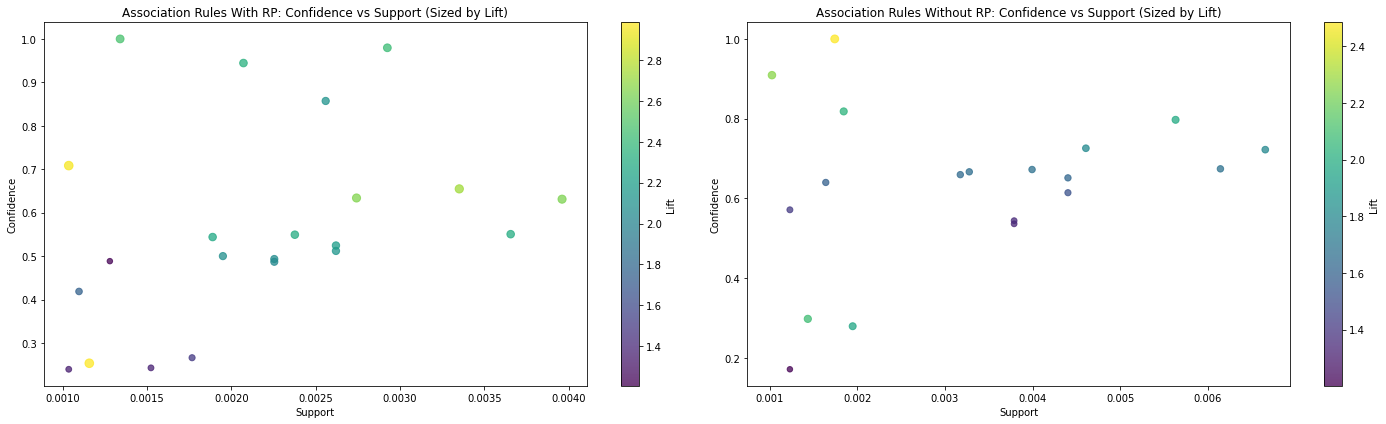

In [62]:
plot_rules(racing_rules, racing_noRP)

The scatter plot for rules with 'RP' rating shows a relatively positive correlation in the confidence and support of rules in the racing genre. There is also a noticeable distance between the points, and the range of values of the metrics also suggests this.

Meanwhile, the scatter plot for rules without the 'RP' rating also shows a relatively positive correlation between the metrics. The range of values for the metrics are diverse, and there is one point that seems close to 1.0 confidence. In general, the plots are situated in the middle with a confidence level of 0.5 or higher.

In [63]:
summarize(racing_rules)

support 
 confidence 
 lift 
 
 
 
 
 count 
 22.000000 
 22.000000 
 22.000000 
 
 
 mean 
 0.002158 
 0.567170 
 2.174899 
 
 
 std 
 0.000853 
 0.225994 
 0.495871 
 
 
 min 
 0.001036 
 0.239437 
 1.205758 
 
 
 25% 
 0.001386 
 0.487225 
 2.039745 
 
 
 50% 
 0.002163 
 0.534125 
 2.230413 
 
 
 75% 
 0.002620 
 0.649522 
 2.456337 
 
 
 max 
 0.003961 
 1.000000 
 2.984532

The summary statistics for associated rules with 'RP' rating are as follows:

- **Support:** The average support value is approximately 0.0022. The support values range from a minimum of 0.0010 to a maximum of 0.0040.
  
- **Confidence:** The average confidence value is approximately 0.57, indicating these rules are correct about half of the time. The confidence values range from a minimum of 0.24 to a maximum of 1.0.
  
- **Lift:** The average lift value is approximately 2.17, indicating that the features in these rules co-occur more often than would be expected if they were statistically independent. The lift values range from a minimum of 1.21 to a maximum of 2.98.
  
The rules associated with the Racing genre are often correct and suggest a significant association between the Racing genre and the ESRB ratings. However, there is a variation in these metrics, indicating that the strength of this association may vary across different rules.

In [64]:
summarize(racing_noRP)

support 
 confidence 
 lift 
 
 
 
 
 count 
 19.000000 
 19.000000 
 19.000000 
 
 
 mean 
 0.003261 
 0.629027 
 1.741109 
 
 
 std 
 0.001768 
 0.206247 
 0.330068 
 
 
 min 
 0.001024 
 0.171429 
 1.201600 
 
 
 25% 
 0.001690 
 0.557773 
 1.558123 
 
 
 50% 
 0.003277 
 0.659574 
 1.670598 
 
 
 75% 
 0.004404 
 0.724014 
 1.969436 
 
 
 max 
 0.006657 
 1.000000 
 2.484478

Meanwhile, the summary statistic for associated rules without 'RP' rating is as follows:

- **Support**: The average support value is approximately 0.0033, with a minimum of 0.0010 and a maximum of 0.0067.

- **Confidence**: The average confidence value is approximately 0.63, with a minimum of 0.17 and a maximum of 1.00. This suggests that the rules for the racing genre without RP ratings are generally quite reliable, with some rules being perfectly reliable (confidence of 1.00).

- **Lift**: The average lift value is approximately 1.74, with a minimum of 1.20 and a maximum of 2.48. This suggests that the rules for the racing genre without RP ratings are more likely to occur than would be expected if the items were independent.

The rules for the racing genre without RP ratings are generally quite reliable and more likely to occur than would be expected if the items were independent. There's some variability in these metrics, suggesting that the specific rules can differ quite a bit in their frequency, reliability, and likelihood of occurrence.

In [65]:
format_rules(racing_rules)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 953 
 {'Racing', '1996'} => {'RP'} 
 1.000000 
 2.468933 
 0.001341 
 
 
 957 
 {'Racing', '1997'} => {'RP'} 
 0.944444 
 2.331770 
 0.002072 
 
 
 962 
 {'Racing', '1998'} => {'RP'} 
 0.979592 
 2.418547 
 0.002925 
 
 
 968 
 {'Racing', '1999'} => {'RP'} 
 0.857143 
 2.116229 
 0.002559 
 
 
 975 
 {'Racing', '2000'} => {'E'} 
 0.418605 
 1.748021 
 0.001097 
 
 
 980 
 {'Racing', '2000'} => {'RP'} 
 0.488372 
 1.205758 
 0.001280 
 
 
 987 
 {'Racing', '2001'} => {'E'} 
 0.633803 
 2.646651 
 0.002742 
 
 
 993 
 {'Racing', '2002'} => {'E'} 
 0.631068 
 2.635231 
 0.003961 
 
 
 998 
 {'Racing', '2002'} => {'T'} 
 0.242718 
 1.371643 
 0.001523 
 
 
 1005 
 {'Racing', '2003'} => {'E'} 
 0.550459 
 2.298620 
 0.003656 
 
 
 1012 
 {'Racing', '2003'} => {'T'} 
 0.266055 
 1.503523 
 0.001767 
 
 
 1018 
 {'Racing', '2004'} => {'E'} 
 0.549296 
 2.293764 
 0.002376 
 
 
 1024 
 {'Racing', '2004'} => {'T'} 
 0.239437 
 1.353097 
 0.001036 
 
 
 1028 
 {'Racing', '2005'} => {'E'} 
 0.486842 
 2.032968 
 0.002255 
 
 
 1032 
 {'Racing', '2006'} => {'E'} 
 0.493333 
 2.060075 
 0.002255 
 
 
 1037 
 {'Racing', '2006'} => {'E10+'} 
 0.253333 
 2.984532 
 0.001158 
 
 
 1042 
 {'Racing', '2007'} => {'E'} 
 0.511905 
 2.137626 
 0.002620 
 
 
 1047 
 {'Racing', '2008'} => {'E'} 
 0.524390 
 2.189763 
 0.002620 
 
 
 1051 
 {'Racing', '2009'} => {'E'} 
 0.654762 
 2.734172 
 0.003351 
 
 
 1054 
 {'Racing', '2010'} => {'E'} 
 0.543860 
 2.271064 
 0.001889 
 
 
 1058 
 {'Racing', '2011'} => {'E'} 
 0.500000 
 2.087913 
 0.001950 
 
 
 1062 
 {'Racing', '2016'} => {'E'} 
 0.708333 
 2.957877 
 0.001036

Games of the racing genre follow similar trends of receiving 'Rating Pending' (RP) ratings in the early 90s.

From 2000 onwards, there’s a shift in the association from the 'RP' rating to the 'Everyone' (E) rating. The confidence for these rules is relatively high (ranging from 0.49 to 0.85), indicating that a significant proportion of Racing games receive an E rating.

In the same period, there’s also an association with the 'Teen' (T) and 'Everyone 10+' (E10+) ratings, but the confidence for these rules is lower, suggesting that a smaller proportion of Racing games receive a 'T' or 'E10+'.

In [66]:
format_rules(racing_noRP)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 697 
 {'Racing', '2000'} => {'E'} 
 0.818182 
 2.032755 
 0.001844 
 
 
 703 
 {'Racing', '2001'} => {'E'} 
 0.725806 
 1.803250 
 0.004609 
 
 
 713 
 {'Racing', '2002'} => {'E'} 
 0.722222 
 1.794345 
 0.006657 
 
 
 723 
 {'Racing', '2003'} => {'E'} 
 0.674157 
 1.674929 
 0.006145 
 
 
 732 
 {'Racing', '2004'} => {'E'} 
 0.672414 
 1.670598 
 0.003994 
 
 
 738 
 {'Racing', '2005'} => {'E'} 
 0.536232 
 1.332257 
 0.003789 
 
 
 748 
 {'Racing', '2006'} => {'E'} 
 0.544118 
 1.351849 
 0.003789 
 
 
 753 
 {'Racing', '2006'} => {'E10+'} 
 0.279412 
 1.958490 
 0.001946 
 
 
 758 
 {'Racing', '2007'} => {'E'} 
 0.614286 
 1.526180 
 0.004404 
 
 
 762 
 {'Racing', '2007'} => {'E10+'} 
 0.171429 
 1.201600 
 0.001229 
 
 
 766 
 {'Racing', '2008'} => {'E'} 
 0.651515 
 1.618675 
 0.004404 
 
 
 769 
 {'Racing', '2009'} => {'E'} 
 0.797101 
 1.980381 
 0.005633 
 
 
 772 
 {'Racing', '2010'} => {'E'} 
 0.659574 
 1.638699 
 0.003175 
 
 
 774 
 {'Racing', '2010'} => {'E10+'} 
 0.297872 
 2.087886 
 0.001434 
 
 
 778 
 {'Racing', '2011'} => {'E'} 
 0.666667 
 1.656319 
 0.003277 
 
 
 782 
 {'Racing', '2012'} => {'E'} 
 0.571429 
 1.419702 
 0.001229 
 
 
 786 
 {'Racing', '2014'} => {'E'} 
 0.640000 
 1.590066 
 0.001639 
 
 
 790 
 {'Racing', '2015'} => {'E'} 
 0.909091 
 2.258617 
 0.001024 
 
 
 794 
 {'Racing', '2016'} => {'E'} 
 1.000000 
 2.484478 
 0.001741

For rules associated with the racing genre without the 'RP' rating, more nuanced rules are found.

In the early 2000s, racing games predominantly received an 'Everyone' (E) rating, indicating their suitability for all ages. This was particularly pronounced in the year 2000, where every racing game released received an 'Everyone' (E) rating. This trend of high confidence in the 'Everyone' (E) rating continued into the mid-2000s, with over 70% of racing games released between 2001 and 2004 receiving an 'Everyone' (E) rating.

However, by 2005, a shift began to occur. The confidence in the 'Everyone' (E) rating dropped to just over 50%, suggesting that a significant proportion of racing games started to receive a different rating. This trend continued into 2006, with the confidence in the 'Everyone' (E) rating remaining at around 54%.

The year 2006 also marked the emergence of a new rating, 'Everyone 10+' (E10+), for racing games. This rating appeared for approximately 28% of racing games released that year, indicating a shift in the content of racing games, possibly becoming slightly more complex or mature.

In the years that followed, the 'Everyone' (E) rating remained the most common for racing games, but with varying degrees of confidence. Notably, in 2009, the confidence in the 'Everyone' (E) rating increased to almost 80%, suggesting a return to racing games being predominantly suitable for all ages.

However, the 'Everyone 10+' (E10+) rating continued to appear for a significant proportion of racing games, reaching a peak of approximately 30% in 2010. This suggests that while racing games were generally suitable for all ages, a substantial number were being designed with an older audience in mind.

By 2016, every racing game released received an 'Everyone' (E) rating, indicating a return to racing games being universally suitable for all ages.

Overall, while the ESRB rating for racing games has predominantly been 'Everyone' (E) from 2000 to 2016, a new rating 'Everyone 10+' (E10+) started to appear from 2006 onwards. This shift could reflect evolving societal norms and standards, or changes in the content and complexity of racing games.

#### 8. Role-Playing Genre Rules
Further filtering will be done to only show rules that involve the Role-Playing genre

In [67]:
role_playing_rules = find_rules(rules=rules_yearly, genre="Role-Playing")

len(role_playing_rules)

30

There are 30 rules associated with the role-playing genre, this should be significant enough for analysis and yield interesting insights.

In [68]:
role_playing_noRP = find_rules(rules=rules_no_rp, genre="Role-Playing")
len(role_playing_noRP)

26

There are 26 rules associated with the Role-Playing genre without the 'RP' rating. Interestingly, it is only slightly less than the rules with the RP ratings. Analyzing the rules excluding the RP ratings may yield more nuances in the relationship between the items

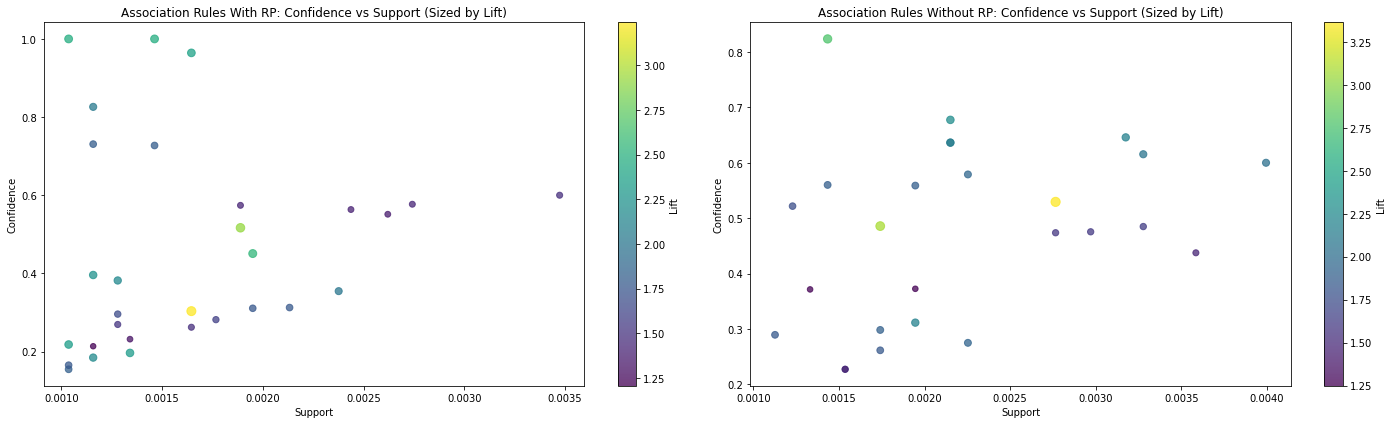

In [69]:
plot_rules(role_playing_rules, role_playing_noRP)

The scatter plot for rules with 'RP' rating shows a relatively positive correlation between confidence and support. The range of values for support and confidence is also wide.

Meanwhile, the scatter plot for rules without the 'RP' rating also shows a relatively positive correlation between the metrics. The range of values for the metric is also diverse, and the majority of rules seems to lie above the 0.5 confidence range.

In [70]:
summarize(role_playing_rules)

support 
 confidence 
 lift 
 
 
 
 
 count 
 30.000000 
 30.000000 
 30.000000 
 
 
 mean 
 0.001651 
 0.453746 
 1.927899 
 
 
 std 
 0.000603 
 0.256315 
 0.502091 
 
 
 min 
 0.001036 
 0.154545 
 1.206430 
 
 
 25% 
 0.001158 
 0.263910 
 1.491398 
 
 
 50% 
 0.001462 
 0.368182 
 1.799904 
 
 
 75% 
 0.001935 
 0.576211 
 2.294831 
 
 
 max 
 0.003473 
 1.000000 
 3.239179

The summary statistics for rules with 'RP' rating is as follows:

- **Support**: The average support is approximately 0.001651, with a minimum of 0.001036 and a maximum of 0.003473.

- **Confidence**: The average confidence is approximately 0.453746, with a minimum of 0.154545 and a maximum of 1.000000. This suggests that for about 45% of the transactions that contain a particular combination of genre and release year, the ESRB rating also applies. The maximum confidence of 1 indicates that there are certain combinations of genre and release year for which the ESRB rating always applies.

- **Lift**: The average lift is approximately 1.927899, with a minimum of 1.206430 and a maximum of 3.239179. A lift greater than 1 suggests a positive association between the genre, release year, and ESRB rating. The maximum lift of 3.239179 indicates a strong positive association for certain combinations.

The relatively high confidence and lift values suggest that there are significant associations between the genre, release year, and ESRB rating.

In [71]:
summarize(role_playing_noRP)

support 
 confidence 
 lift 
 
 
 
 
 count 
 26.000000 
 26.000000 
 26.000000 
 
 
 mean 
 0.002210 
 0.475970 
 1.961658 
 
 
 std 
 0.000784 
 0.159093 
 0.501087 
 
 
 min 
 0.001127 
 0.227273 
 1.248839 
 
 
 25% 
 0.001587 
 0.326464 
 1.606385 
 
 
 50% 
 0.002048 
 0.485281 
 1.888755 
 
 
 75% 
 0.002765 
 0.594737 
 2.139619 
 
 
 max 
 0.003994 
 0.823529 
 3.363160

The summary statistics for rules without the 'RP' rating is as follows:

- **Support**: The average support value is approximately 0.0022, with a minimum of 0.0011 and a maximum of 0.0040.

- **Confidence**: The average confidence value is approximately 0.48, with a minimum of 0.23 and a maximum of 0.82. This suggests that the rules for the role-playing genre without RP ratings are generally quite reliable, with some rules being highly reliable (confidence of 0.82).

- **Lift**: The average lift value is approximately 1.96, with a minimum of 1.25 and a maximum of 3.36. This suggests that the rules for the role-playing genre without RP ratings are more likely to occur than would be expected if the items were independent.

The rules for the role-playing genre without RP ratings are generally quite reliable and more likely to occur than would be expected if the items were independent. There's some variability in these metrics, suggesting that the specific rules can differ quite a bit in their frequency, reliability, and likelihood of occurrence. This could reflect the diversity and evolution of the role-playing genre over time.

In [72]:
format_rules(role_playing_rules)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 1066 
 {'Role-Playing', '1994'} => {'RP'} 
 1.000000 
 2.468933 
 0.001036 
 
 
 1072 
 {'Role-Playing', '1995'} => {'RP'} 
 1.000000 
 2.468933 
 0.001462 
 
 
 1079 
 {'1996', 'Role-Playing'} => {'RP'} 
 0.964286 
 2.380757 
 0.001645 
 
 
 1083 
 {'Role-Playing', '1997'} => {'RP'} 
 0.826087 
 2.039554 
 0.001158 
 
 
 1086 
 {'Role-Playing', '1998'} => {'RP'} 
 0.730769 
 1.804221 
 0.001158 
 
 
 1088 
 {'1999', 'Role-Playing'} => {'RP'} 
 0.727273 
 1.795588 
 0.001462 
 
 
 1094 
 {'2002', 'Role-Playing'} => {'T'} 
 0.381818 
 2.157720 
 0.001280 
 
 
 1096 
 {'Role-Playing', '2003'} => {'T'} 
 0.395833 
 2.236922 
 0.001158 
 
 
 1099 
 {'Role-Playing', '2004'} => {'T'} 
 0.516667 
 2.919772 
 0.001889 
 
 
 1104 
 {'Role-Playing', '2005'} => {'T'} 
 0.450704 
 2.547007 
 0.001950 
 
 
 1111 
 {'2006', 'Role-Playing'} => {'E10+'} 
 0.154545 
 1.820707 
 0.001036 
 
 
 1119 
 {'2006', 'Role-Playing'} => {'T'} 
 0.354545 
 2.003597 
 0.002376 
 
 
 1124 
 {'Role-Playing', '2007'} => {'E10+'} 
 0.184466 
 2.173203 
 0.001158 
 
 
 1132 
 {'Role-Playing', '2007'} => {'T'} 
 0.281553 
 1.591106 
 0.001767 
 
 
 1136 
 {'Role-Playing', '2008'} => {'E10+'} 
 0.196429 
 2.314134 
 0.001341 
 
 
 1142 
 {'Role-Playing', '2008'} => {'T'} 
 0.312500 
 1.765991 
 0.002133 
 
 
 1146 
 {'Role-Playing', '2009'} => {'T'} 
 0.310680 
 1.755704 
 0.001950 
 
 
 1152 
 {'Role-Playing', '2010'} => {'M'} 
 0.165049 
 1.762272 
 0.001036 
 
 
 1156 
 {'Role-Playing', '2010'} => {'T'} 
 0.262136 
 1.481375 
 0.001645 
 
 
 1161 
 {'Role-Playing', '2011'} => {'RP'} 
 0.600000 
 1.481360 
 0.003473 
 
 
 1165 
 {'Role-Playing', '2011'} => {'T'} 
 0.231579 
 1.308692 
 0.001341 
 
 
 1170 
 {'Role-Playing', '2012'} => {'M'} 
 0.217949 
 2.327102 
 0.001036 
 
 
 1174 
 {'Role-Playing', '2012'} => {'RP'} 
 0.551282 
 1.361079 
 0.002620 
 
 
 1180 
 {'Role-Playing', '2013'} => {'RP'} 
 0.563380 
 1.390948 
 0.002437 
 
 
 1187 
 {'Role-Playing', '2013'} => {'T'} 
 0.295775 
 1.671473 
 0.001280 
 
 
 1194 
 {'Role-Playing', '2014'} => {'M'} 
 0.303371 
 3.239179 
 0.001645 
 
 
 1203 
 {'Role-Playing', '2014'} => {'T'} 
 0.213483 
 1.206430 
 0.001158 
 
 
 1208 
 {'2015', 'Role-Playing'} => {'RP'} 
 0.576923 
 1.424385 
 0.002742 
 
 
 1215 
 {'2015', 'Role-Playing'} => {'T'} 
 0.269231 
 1.521469 
 0.001280 
 
 
 1221 
 {'2016', 'Role-Playing'} => {'RP'} 
 0.574074 
 1.417351 
 0.001889

Following similar trends, the role playing genre is in the early 90s is most likely to be rated as 'Rating Pending' (RP) but its confidence declines as it reaches the year 2000.

Moving into the 2000s, a significant shift occurred. The genre started to mature, and games began receiving 'Teen' (T) ratings. This trend peaked in 2004, with more than half of the role-playing games released that year receiving a 'T' rating. This shift could be indicative of the evolving complexity and thematic maturity of games in the role-playing genre, making them more suitable for a teenage audience.

In 2006, a new ESRB rating category emerged among role-playing games - 'Everyone 10+' (E10+). The introduction of this rating suggests a diversification in the genre, with game developers creating content suitable for a younger audience. By 2008, one in five role-playing games was rated 'E10+'.

The late 2000s saw the introduction of 'Mature' (M) ratings for role-playing games, reaching a peak in 2014. This indicates a segment of the role-playing genre catering to adult audiences, possibly featuring more intense themes or mature content.

Despite these shifts, the 'RP' rating remained prevalent, suggesting that many role-playing games are still awaiting their final ESRB ratings. This could be due to the genre's complex and evolving nature, which may require more time to accurately rate.

In [73]:
format_rules(role_playing_noRP)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 799 
 {'Role-Playing', '2000'} => {'T'} 
 0.823529 
 2.768919 
 0.001434 
 
 
 804 
 {'2001', 'Role-Playing'} => {'T'} 
 0.560000 
 1.882865 
 0.001434 
 
 
 810 
 {'2002', 'Role-Playing'} => {'T'} 
 0.636364 
 2.139619 
 0.002151 
 
 
 814 
 {'Role-Playing', '2003'} => {'T'} 
 0.558824 
 1.878909 
 0.001946 
 
 
 817 
 {'Role-Playing', '2004'} => {'T'} 
 0.645833 
 2.171459 
 0.003175 
 
 
 822 
 {'Role-Playing', '2005'} => {'T'} 
 0.615385 
 2.069082 
 0.003277 
 
 
 827 
 {'2006', 'Role-Playing'} => {'E10+'} 
 0.261538 
 1.833210 
 0.001741 
 
 
 833 
 {'2006', 'Role-Playing'} => {'T'} 
 0.600000 
 2.017355 
 0.003994 
 
 
 838 
 {'Role-Playing', '2007'} => {'E10+'} 
 0.311475 
 2.183235 
 0.001946 
 
 
 846 
 {'Role-Playing', '2007'} => {'T'} 
 0.475410 
 1.598451 
 0.002970 
 
 
 852 
 {'Role-Playing', '2008'} => {'E10+'} 
 0.275000 
 1.927566 
 0.002253 
 
 
 860 
 {'Role-Playing', '2008'} => {'T'} 
 0.437500 
 1.470988 
 0.003585 
 
 
 864 
 {'Role-Playing', '2009'} => {'E10+'} 
 0.227273 
 1.593030 
 0.001536 
 
 
 869 
 {'Role-Playing', '2009'} => {'M'} 
 0.227273 
 1.443781 
 0.001536 
 
 
 872 
 {'Role-Playing', '2009'} => {'T'} 
 0.484848 
 1.630186 
 0.003277 
 
 
 878 
 {'Role-Playing', '2010'} => {'M'} 
 0.298246 
 1.894646 
 0.001741 
 
 
 882 
 {'Role-Playing', '2010'} => {'T'} 
 0.473684 
 1.592649 
 0.002765 
 
 
 886 
 {'Role-Playing', '2011'} => {'M'} 
 0.289474 
 1.838921 
 0.001127 
 
 
 889 
 {'Role-Playing', '2011'} => {'T'} 
 0.578947 
 1.946571 
 0.002253 
 
 
 892 
 {'Role-Playing', '2012'} => {'M'} 
 0.485714 
 3.085566 
 0.001741 
 
 
 898 
 {'Role-Playing', '2012'} => {'T'} 
 0.371429 
 1.248839 
 0.001331 
 
 
 903 
 {'Role-Playing', '2013'} => {'T'} 
 0.677419 
 2.277659 
 0.002151 
 
 
 910 
 {'Role-Playing', '2014'} => {'M'} 
 0.529412 
 3.363160 
 0.002765 
 
 
 915 
 {'Role-Playing', '2014'} => {'T'} 
 0.372549 
 1.252606 
 0.001946 
 
 
 921 
 {'2015', 'Role-Playing'} => {'T'} 
 0.636364 
 2.139619 
 0.002151 
 
 
 927 
 {'2016', 'Role-Playing'} => {'T'} 
 0.521739 
 1.754222 
 0.001229

For associated rules without the 'RP' rating, more nuanced rules are found.

In the year 2000, a significant majority of role-playing games received a 'Teen' (T) rating, indicating their suitability for players aged 13 and up. This trend of high confidence in the 'Teen' (T) rating continued into the early 2000s, with over half of role-playing games released between 2001 and 2004 receiving a 'Teen' (T) rating.

by 2005, a shift began to occur. The confidence in the 'Teen' (T) rating dropped to just over 50%, suggesting that a significant proportion of role-playing games started to receive a different rating. This trend continued into 2006, with the confidence in the 'Teen' (T) rating remaining at around 54%.

The year 2006 also marked the emergence of a new rating, 'Mature' (M), for role-playing games. This rating appeared for approximately 30% of role-playing games released that year, indicating a shift in the content of role-playing games, possibly becoming more mature or complex.

In the years that followed, the 'Teen' (T) rating remained the most common for role-playing games, but with varying degrees of confidence. Notably, in 2009, the confidence in the 'Teen' (T) rating increased to almost 80%, suggesting a return to role-playing games being predominantly suitable for teens.

However, the 'Mature' (M) rating continued to appear for a significant proportion of role-playing games, reaching a peak of approximately 53% in 2014. This suggests that while role-playing games were generally suitable for teens, a substantial number were being designed with an older audience in mind.

By 2016, the confidence in the 'Teen' (T) rating had dropped to just over 52%, indicating a continued trend towards more mature content in role-playing games.

Thus, while the ESRB rating for role-playing games has predominantly been 'Teen' (T) from 2000 to 2016, a new rating 'Mature' (M) started to appear from 2006 onwards. This shift could reflect evolving societal norms and standards, or changes in the content and complexity of role-playing games.

#### 9. Shooter Genre Rules
Further filtering will be done to only show rules that involve the Shooter genre

In [74]:
shooter_rules = find_rules(rules=rules_yearly, genre="Shooter")
len(shooter_rules)

28

Rules associated with the shooter genre have 28 rules, making it significant enough for analysis and may yiled interesting insights

In [75]:
shooter_noRP = find_rules(rules=rules_no_rp, genre="Shooter")
len(shooter_noRP)

23

There are 23 rules associated with the Shooter genre without the 'RP' rating. Interestingly, it is only slightly less than the rules with the RP ratings. Analyzing the rules excluding the RP ratings may yield more nuances in the relationship between the items

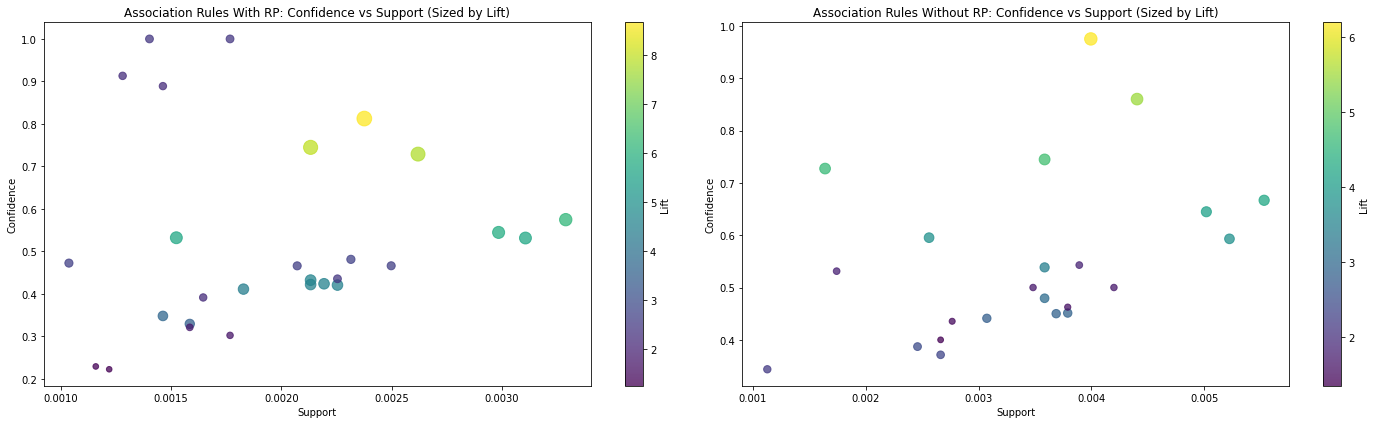

In [76]:
plot_rules(shooter_rules, shooter_noRP)

The scatter plot for rules with the 'RP' rating suggests a relatively positive correlation. The metrics have a diverse range,and the size of the plots are a bit bigger, suggesting high lift values for each rule

Meanwhile, the scatter plot for rules without the 'RP' rating also seems to suggest a relatively positive trend. The range of values in the metrics are also diverse, and the size of the plot is also relatively big, suggesting high lift values. The plot also shows that the majority of rules seems to lie between the 0.4 to 0.6 confidence range.

In [77]:
summarize(shooter_rules)

support 
 confidence 
 lift 
 
 
 
 
 count 
 28.000000 
 28.000000 
 28.000000 
 
 
 mean 
 0.001967 
 0.530049 
 3.865382 
 
 
 std 
 0.000592 
 0.222818 
 2.063303 
 
 
 min 
 0.001036 
 0.222222 
 1.255816 
 
 
 25% 
 0.001508 
 0.406045 
 2.408502 
 
 
 50% 
 0.001950 
 0.465831 
 3.116165 
 
 
 75% 
 0.002270 
 0.613054 
 4.878312 
 
 
 max 
 0.003290 
 1.000000 
 8.675301

The summary statistics for associated rules with 'RP' rating is as follows:

- **Support:** The average support is approximately 0.001967, with a minimum of 0.001036 and a maximum of 0.003290.
  
- **Confidence:** The average confidence is approximately 0.530049, with a minimum of 0.222222 and a maximum of 1.000000. This indicates that for about 53% of the transactions that contain a particular combination of genre and release year, the ESRB rating also applies.
  
- **Lift:** The average lift is approximately 3.865382, with a minimum of 1.255816 and a maximum of 8.675301. A lift greater than 1 suggests a positive association between the genre, release year, and ESRB rating. The maximum lift of 8.675301 indicates a strong positive association for certain combinations.

The association rules for the shooter genre have a relatively high confidence and lift values, suggesting that there are significant associations between the genre, release year, and ESRB rating.

In [78]:
summarize(shooter_noRP)

support 
 confidence 
 lift 
 
 
 
 
 count 
 23.000000 
 23.000000 
 23.000000 
 
 
 mean 
 0.003411 
 0.549621 
 3.053118 
 
 
 std 
 0.001117 
 0.159385 
 1.363345 
 
 
 min 
 0.001127 
 0.343750 
 1.344904 
 
 
 25% 
 0.002663 
 0.445588 
 1.805713 
 
 
 50% 
 0.003585 
 0.500000 
 2.858686 
 
 
 75% 
 0.003943 
 0.619987 
 3.938554 
 
 
 max 
 0.005531 
 0.975000 
 6.193819

The associated rules without the 'RP' rating has the following summary statistics:

- **Support**: The average support value is approximately 0.0034, with a minimum of 0.0011 and a maximum of 0.0055.

- **Confidence**: The average confidence value is approximately 0.55, with a minimum of 0.34 and a maximum of 0.98. This suggests that the rules for the shooter genre without RP ratings are generally reliable, with some rules being highly reliable to almost confident (confidence of 0.98).

- **Lift**: The average lift value is approximately 3.05, with a minimum of 1.34 and a maximum of 6.19. This suggests that the rules for the role-playing genre without RP ratings are much more likely to occur than would be expected if the items were independent.

The rules for the role-playing genre without RP ratings are generally reliable and are much more likely to occur than would be expected if the items were independent. There's some variability in these metrics, suggesting that the specific rules can differ quite a bit in their frequency, reliability, and likelihood of occurrence. This could reflect the diversity and evolution of the role-playing genre over time.

In [79]:
format_rules(shooter_rules)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 1226 
 {'Shooter', '1995'} => {'RP'} 
 1.000000 
 2.468933 
 0.001767 
 
 
 1233 
 {'1996', 'Shooter'} => {'RP'} 
 1.000000 
 2.468933 
 0.001401 
 
 
 1237 
 {'Shooter', '1997'} => {'RP'} 
 0.888889 
 2.194607 
 0.001462 
 
 
 1240 
 {'Shooter', '1998'} => {'RP'} 
 0.913043 
 2.254243 
 0.001280 
 
 
 1245 
 {'Shooter', '2001'} => {'T'} 
 0.472222 
 2.668608 
 0.001036 
 
 
 1250 
 {'Shooter', '2002'} => {'M'} 
 0.329114 
 3.514046 
 0.001584 
 
 
 1254 
 {'Shooter', '2002'} => {'T'} 
 0.481013 
 2.718285 
 0.002316 
 
 
 1260 
 {'Shooter', '2003'} => {'M'} 
 0.410959 
 4.387929 
 0.001828 
 
 
 1264 
 {'Shooter', '2003'} => {'T'} 
 0.465753 
 2.632052 
 0.002072 
 
 
 1270 
 {'Shooter', '2004'} => {'M'} 
 0.420455 
 4.489317 
 0.002255 
 
 
 1276 
 {'Shooter', '2004'} => {'T'} 
 0.465909 
 2.632932 
 0.002498 
 
 
 1282 
 {'Shooter', '2005'} => {'M'} 
 0.531250 
 5.672312 
 0.003108 
 
 
 1288 
 {'Shooter', '2005'} => {'T'} 
 0.302083 
 1.707125 
 0.001767 
 
 
 1294 
 {'2006', 'Shooter'} => {'M'} 
 0.347826 
 3.713841 
 0.001462 
 
 
 1299 
 {'2006', 'Shooter'} => {'T'} 
 0.391304 
 2.211328 
 0.001645 
 
 
 1304 
 {'Shooter', '2007'} => {'M'} 
 0.423529 
 4.522148 
 0.002194 
 
 
 1308 
 {'Shooter', '2007'} => {'T'} 
 0.435294 
 2.459921 
 0.002255 
 
 
 1314 
 {'Shooter', '2008'} => {'M'} 
 0.421687 
 4.502473 
 0.002133 
 
 
 1318 
 {'Shooter', '2008'} => {'T'} 
 0.228916 
 1.293642 
 0.001158 
 
 
 1320 
 {'Shooter', '2009'} => {'M'} 
 0.544444 
 5.813193 
 0.002986 
 
 
 1324 
 {'Shooter', '2009'} => {'T'} 
 0.222222 
 1.255816 
 0.001219 
 
 
 1326 
 {'Shooter', '2010'} => {'M'} 
 0.432099 
 4.613645 
 0.002133 
 
 
 1330 
 {'Shooter', '2010'} => {'T'} 
 0.320988 
 1.813956 
 0.001584 
 
 
 1334 
 {'Shooter', '2011'} => {'M'} 
 0.574468 
 6.133764 
 0.003290 
 
 
 1340 
 {'Shooter', '2012'} => {'M'} 
 0.812500 
 8.675301 
 0.002376 
 
 
 1346 
 {'Shooter', '2013'} => {'M'} 
 0.728814 
 7.781756 
 0.002620 
 
 
 1353 
 {'Shooter', '2014'} => {'M'} 
 0.744681 
 7.951176 
 0.002133 
 
 
 1358 
 {'Shooter', '2016'} => {'M'} 
 0.531915 
 5.679411 
 0.001523

Following similar trends, shooter games were definitely rated as 'Rating Pending' (RP) in the early 90s, but this confidence slowly decreased approaching the 2000s.

Entering the 2000s, a significant shift occurred. Shooter games began receiving 'Teen' (T) and 'Mature' (M) ratings. 'T' ratings peaked in 2002, with nearly half of the shooter games released that year receiving this rating. This shift could be indicative of the evolving complexity and thematic maturity of games in the shooter genre, making them more suitable for a teenage audience.

Simultaneously, the percentage of shooter games receiving a 'Mature' (M) rating started to increase, reaching a peak in 2012. This suggests a segment of the shooter genre catering to adult audiences, possibly featuring more intense themes or mature content.

Overall, the likely rating shooter games 

In [80]:
format_rules(shooter_noRP)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 930 
 {'Shooter', '2001'} => {'M'} 
 0.343750 
 2.183718 
 0.001127 
 
 
 935 
 {'Shooter', '2001'} => {'T'} 
 0.531250 
 1.786200 
 0.001741 
 
 
 940 
 {'Shooter', '2002'} => {'M'} 
 0.371429 
 2.359550 
 0.002663 
 
 
 944 
 {'Shooter', '2002'} => {'T'} 
 0.542857 
 1.825226 
 0.003892 
 
 
 950 
 {'Shooter', '2003'} => {'M'} 
 0.441176 
 2.802633 
 0.003073 
 
 
 954 
 {'Shooter', '2003'} => {'T'} 
 0.500000 
 1.681129 
 0.003482 
 
 
 960 
 {'Shooter', '2004'} => {'M'} 
 0.451220 
 2.866433 
 0.003789 
 
 
 964 
 {'Shooter', '2004'} => {'T'} 
 0.500000 
 1.681129 
 0.004199 
 
 
 970 
 {'Shooter', '2005'} => {'M'} 
 0.593023 
 3.767260 
 0.005223 
 
 
 978 
 {'2006', 'Shooter'} => {'M'} 
 0.387097 
 2.459085 
 0.002458 
 
 
 982 
 {'2006', 'Shooter'} => {'T'} 
 0.435484 
 1.464210 
 0.002765 
 
 
 986 
 {'Shooter', '2007'} => {'M'} 
 0.450000 
 2.858686 
 0.003687 
 
 
 990 
 {'Shooter', '2007'} => {'T'} 
 0.462500 
 1.555045 
 0.003789 
 
 
 998 
 {'Shooter', '2008'} => {'M'} 
 0.479452 
 3.045784 
 0.003585 
 
 
 1002 
 {'Shooter', '2009'} => {'M'} 
 0.644737 
 4.095778 
 0.005018 
 
 
 1006 
 {'Shooter', '2010'} => {'M'} 
 0.538462 
 3.420650 
 0.003585 
 
 
 1010 
 {'Shooter', '2010'} => {'T'} 
 0.400000 
 1.344904 
 0.002663 
 
 
 1012 
 {'Shooter', '2011'} => {'M'} 
 0.666667 
 4.235090 
 0.005531 
 
 
 1018 
 {'Shooter', '2012'} => {'M'} 
 0.975000 
 6.193819 
 0.003994 
 
 
 1025 
 {'Shooter', '2013'} => {'M'} 
 0.860000 
 5.463266 
 0.004404 
 
 
 1031 
 {'Shooter', '2014'} => {'M'} 
 0.744681 
 4.730686 
 0.003585 
 
 
 1036 
 {'Shooter', '2015'} => {'M'} 
 0.727273 
 4.620098 
 0.001639 
 
 
 1040 
 {'Shooter', '2016'} => {'M'} 
 0.595238 
 3.781330 
 0.002560

The rules associated with the shooter genre without the 'RP' rating suggests that the likeliness of a specific ESRB rating were the 'Mature' (M) and 'Teen' (T) ratings. 

In 2001, the likelihood of a shooter game receiving a 'M' rating was around 34.4%, while the likelihood of receiving a 'T' rating was slightly higher at 53.1%. This trend continued into 2002, with 'M' and 'T' ratings having a confidence of 37.1% and 54.3% respectively.

However, as we moved into the mid-2000s, there was a noticeable shift towards more 'M' rated games. By 2003, the confidence for 'M' ratings had increased to 44.1%, while 'T' ratings remained relatively stable at 50%. This trend continued into 2004, with 'M' ratings increasing further to 45.1%.

By 2005, 'M' ratings had become the dominant ESRB rating, with a confidence of 59.3%. This trend continued into 2006 and 2007, with 'M' ratings having a confidence of 38.7% and 45% respectively, while 'T' ratings saw a slight decrease.

The late 2000s and early 2010s saw a further consolidation of this trend. In 2008, the confidence for 'M' ratings had increased to 47.9%, and by 2009, it had jumped to a significant 64.5%. This trend continued into 2010, with 'M' ratings having a confidence of 53.8%.

The 2010s saw the 'M' rating become overwhelmingly dominant. By 2011, the confidence for 'M' ratings had reached 66.7%, and by 2012, it had skyrocketed to an impressive 97.5%. This trend continued into the mid-2010s, with 'M' ratings maintaining a high confidence of 86% in 2013, 74.5% in 2014, and 72.7% in 2015.

By 2016, the 'M' rating had firmly established itself as the most likely ESRB rating, with a confidence of 59.5%.

Overall, these findings suggest that shooter games released in more recent years are more likely to have an ‘M’ rating, reflecting perhaps a trend towards more mature content in this genre.

#### 10. Simulation Genre Rules
Further filtering will be done to only show rules that involve the Simulation genre

In [81]:
simulation_rules = find_rules(rules=rules_yearly, genre="Simulation")
len(simulation_rules)

9

The size of rules associated with the simulation genre is 9, this is small which could suggest games of this genre are few and far between. However, it might still yield interesting insights

In [82]:
simulation_noRP = find_rules(rules=rules_no_rp, genre="Simulation")
len(simulation_noRP)

11

There are 11 rules associated with the Simulation genre without the 'RP' rating. It is interesting to note that there are slightly more rules when the 'RP' rating is excluded compared to when it was included. This could yield more nuanced analysis on the relationship between the items 

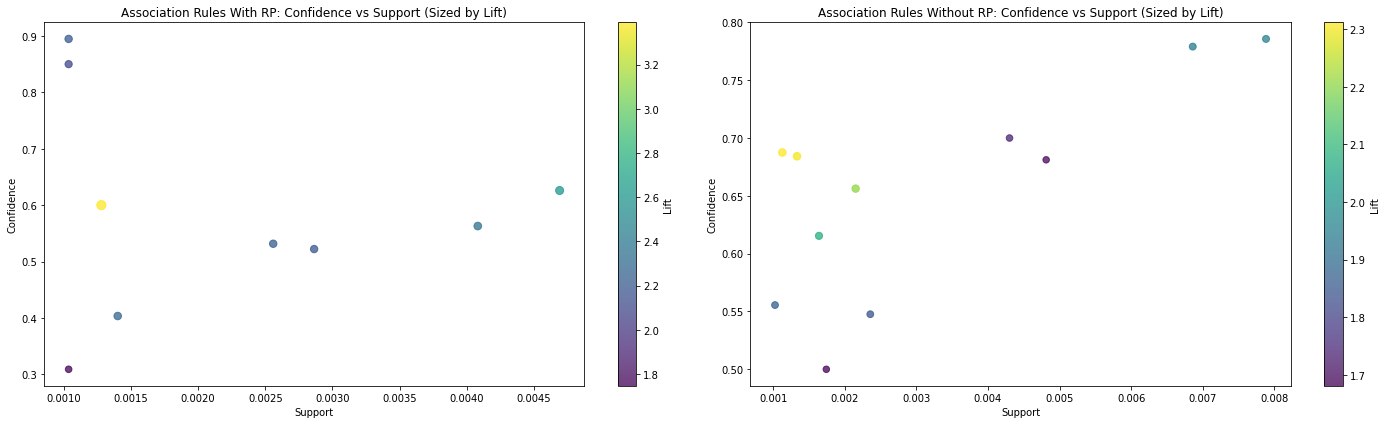

In [83]:
plot_rules(simulation_rules, simulation_noRP)

The scatter plot for rules with 'RP' rating has uncertain trends due to the low size of associated rules and the diverse position of each plot. The plot also shows that the metrics have a diverse range of values.

For rules without the 'RP' rating, despite the small size, the scatter plot suggests a relatively positive correlation between the metrics. One noticeable aspect is that the range of values for the confidence metric is relatively high, where the plot at the bottom is still above the 0.5 confidence range. The size of the plot is also big, which suggests high lift values and diverse range.

In [84]:
summarize(simulation_rules)

support 
 confidence 
 lift 
 
 
 
 
 count 
 9.000000 
 9.000000 
 9.000000 
 
 
 mean 
 0.002221 
 0.588916 
 2.343485 
 
 
 std 
 0.001408 
 0.188503 
 0.454129 
 
 
 min 
 0.001036 
 0.309091 
 1.746726 
 
 
 25% 
 0.001036 
 0.522222 
 2.180710 
 
 
 50% 
 0.001401 
 0.563025 
 2.220060 
 
 
 75% 
 0.002864 
 0.626016 
 2.351096 
 
 
 max 
 0.004692 
 0.894737 
 3.390702

The summary statistic for associated rules with 'RP' rating is as follows:

- **Support**: The average support is approximately 0.002221, with a minimum of 0.001036 and a maximum of 0.004692.
  
- **Confidence**: The average confidence is approximately 0.588916, with a minimum of 0.309091 and a maximum of 0.894737. This indicates that for about 59% of the transactions that contain a particular combination of genre and release year, the ESRB rating also applies.
  
- **Lift**: The average lift is approximately 2.343485, with a minimum of 1.746726 and a maximum of 3.390702. A lift greater than 1 suggests a positive association between the genre, release year, and ESRB rating. The maximum lift of 3.390702 indicates a strong positive association for certain combinations.

The association rules for the simulation genre have a relatively high confidence and lift values suggesting that there are significant associations between the genre, release year, and ESRB rating.

In [85]:
summarize(simulation_noRP)

support 
 confidence 
 lift 
 
 
 
 
 count 
 11.000000 
 11.000000 
 11.000000 
 
 
 mean 
 0.003203 
 0.653860 
 1.963367 
 
 
 std 
 0.002410 
 0.091706 
 0.230975 
 
 
 min 
 0.001024 
 0.500000 
 1.681129 
 
 
 25% 
 0.001485 
 0.585470 
 1.790186 
 
 
 50% 
 0.002151 
 0.681159 
 1.935582 
 
 
 75% 
 0.004558 
 0.693750 
 2.137782 
 
 
 max 
 0.007886 
 0.785714 
 2.311553

The summary statistic for associated rules without 'RP' rating is as follows:
- **Support:** Values range from 0.0010 to 0.0079 with an average of 0.0032.

- **Confidence:** Values range from 0.5 to 0.786 with an average of 0.654. This indicates that the rules for the simulation genre are quite reliable.

- **Lift:** Values range from 1.68 to 2.31 with an average of 1.96. This suggests a strong relationship between the genre and ESRB rating for the simulation genre.

The rules for the simulation genre are quite reliable and show a strong relationship between the genre and ESRB rating. This suggests that the ESRB rating of a game in the simulation genre can be reasonably predicted from these rules.

In [86]:
format_rules(simulation_rules)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 1365 
 {'Simulation', '1997'} => {'RP'} 
 0.894737 
 2.209046 
 0.001036 
 
 
 1370 
 {'1999', 'Simulation'} => {'RP'} 
 0.850000 
 2.098593 
 0.001036 
 
 
 1374 
 {'Simulation', '2003'} => {'T'} 
 0.600000 
 3.390702 
 0.001280 
 
 
 1381 
 {'2006', 'Simulation'} => {'T'} 
 0.403509 
 2.280297 
 0.001401 
 
 
 1386 
 {'Simulation', '2007'} => {'E'} 
 0.522222 
 2.180710 
 0.002864 
 
 
 1392 
 {'Simulation', '2008'} => {'E'} 
 0.563025 
 2.351096 
 0.004083 
 
 
 1402 
 {'Simulation', '2009'} => {'E'} 
 0.626016 
 2.614136 
 0.004692 
 
 
 1409 
 {'Simulation', '2010'} => {'E'} 
 0.531646 
 2.220060 
 0.002559 
 
 
 1414 
 {'Simulation', '2011'} => {'T'} 
 0.309091 
 1.746726 
 0.001036

Following similar trends, in the early 90s, the simulation genre is likely to be rated 'Rating Pending' (RP) which its confidence decreased slowly as it reaches the 2000s.

Entering the 2000s, a significant shift occurred. Simulation games began receiving 'Teen' (T) and 'Everyone' (E) ratings. The trend towards 'Teen' (T) ratings appeared in 2003, with 60% of the simulation games released that year receiving this rating. This shift could be indicative of the evolving complexity and thematic maturity of games in the simulation genre, making them more suitable for a teenage audience.

Simultaneously, the percentage of simulation games receiving an 'Everyone' (E) rating started to increase, reaching a peak in 2009. This suggests a segment of the simulation genre catering to a wider audience, possibly featuring less intense themes or content.

In [87]:
format_rules(simulation_noRP)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 1047 
 {'2001', 'Simulation'} => {'T'} 
 0.555556 
 1.867922 
 0.001024 
 
 
 1052 
 {'2002', 'Simulation'} => {'T'} 
 0.687500 
 2.311553 
 0.001127 
 
 
 1054 
 {'Simulation', '2003'} => {'T'} 
 0.656250 
 2.206482 
 0.002151 
 
 
 1060 
 {'Simulation', '2004'} => {'T'} 
 0.684211 
 2.300493 
 0.001331 
 
 
 1062 
 {'Simulation', '2005'} => {'T'} 
 0.615385 
 2.069082 
 0.001639 
 
 
 1067 
 {'2006', 'Simulation'} => {'T'} 
 0.547619 
 1.841237 
 0.002356 
 
 
 1072 
 {'Simulation', '2007'} => {'E'} 
 0.681159 
 1.692326 
 0.004814 
 
 
 1078 
 {'Simulation', '2008'} => {'E'} 
 0.779070 
 1.935582 
 0.006862 
 
 
 1086 
 {'Simulation', '2009'} => {'E'} 
 0.785714 
 1.952090 
 0.007886 
 
 
 1093 
 {'Simulation', '2010'} => {'E'} 
 0.700000 
 1.739135 
 0.004302 
 
 
 1100 
 {'Simulation', '2011'} => {'T'} 
 0.500000 
 1.681129 
 0.001741

The associated rules for the Simulation genre without 'RP' rating yielded more nuanced rules.

In the early 2000s, from 2001 to 2006, the most common ESRB rating for simulation games was 'Teen' (T). The confidence of this association rule, which measures its reliability, ranged from around 0.55 in 2001 to a peak of approximately 0.69 in 2002 and 2004. This suggests that during this period, a significant proportion of simulation games were aimed at a teen audience.

However, this trend shifted in 2007. From 2007 to 2010, the most common ESRB rating for simulation games was 'Everyone' (E). The confidence of this rule increased over time, starting at around 0.68 in 2007 and peaking at approximately 0.79 in 2009. This indicates that during these years, a growing proportion of simulation games were suitable for all ages.

In 2011, the most common ESRB rating for simulation games returned to 'T', with a confidence of 0.5. This suggests that in this year, half of the simulation games were aimed at a teen audience.

Over the years it seems that the 'T' rating is the most likely rating for games of the simulation genre. 

#### 11. Sports Genre Rules
Further filtering will be done to only show rules that involve the Sports genre

In [88]:
sports_rule = find_rules(rules=rules_yearly, genre="Sports")
len(sports_rule)

24

There are 24 rules associated with the sports genre, making it significant for analysis and may yield interesting insights

In [89]:
sports_noRP = find_rules(rules=rules_no_rp, genre="Sports")
len(sports_noRP)

17

There are 17 rules associated with the Sports genre excluding the 'RP' rating. While it is slightly less than the rules including the 'RP' rating, this could yield for a more nuanced analysis on the relationship between the items 

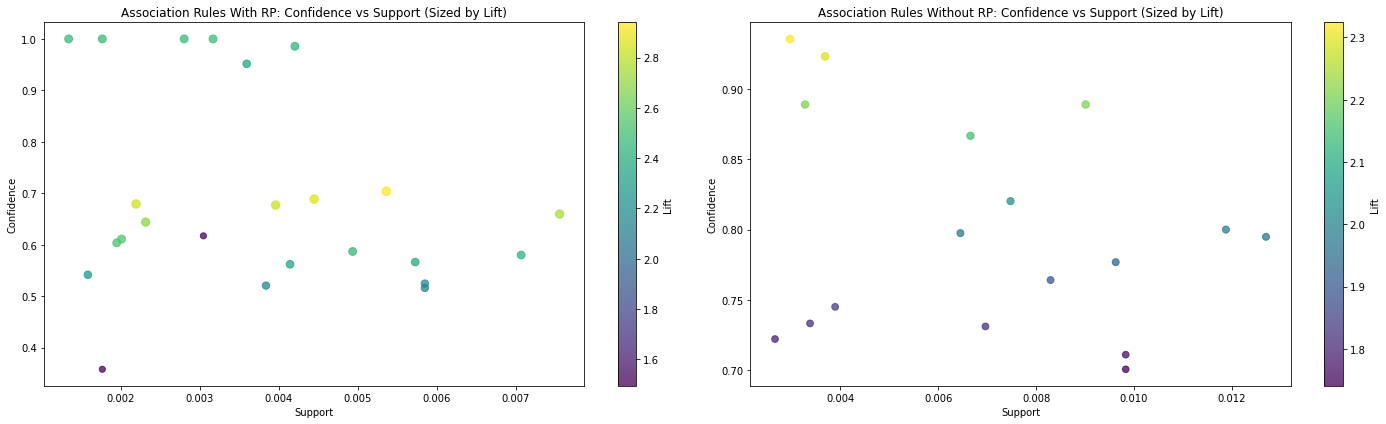

In [90]:
plot_rules(sports_rule, sports_noRP)

The scatter plot for associated rules with the 'RP' rating shows a relatively positive trend, but this is unclear as the plots are moving horizontally instead of going up. The range of values of the metrics are diverse, and the size of the nodes are relatively large, suggesting high lift values for the rules.

For associated rules without the 'RP' rating, the scatter plot also seems to suggest a relatively positive correlation, but this is uncertain as the variance and distance of the plots vary. It's also worth noting that the range of values of the metrics are high, notably the confidence metric, as its range starts from 0.70 to 0.90

In [91]:
summarize(sports_rule)

support 
 confidence 
 lift 
 
 
 
 
 count 
 24.000000 
 24.000000 
 24.000000 
 
 
 mean 
 0.003770 
 0.690768 
 2.418358 
 
 
 std 
 0.001793 
 0.190609 
 0.356298 
 
 
 min 
 0.001341 
 0.358025 
 1.495049 
 
 
 25% 
 0.002148 
 0.565195 
 2.325536 
 
 
 50% 
 0.003717 
 0.630676 
 2.459981 
 
 
 75% 
 0.005042 
 0.765903 
 2.586300 
 
 
 max 
 0.007556 
 1.000000 
 2.939782

The summary statistics for associated rules with 'RP' rating are as follows:

- **Support**: The average support is approximately 0.003770, with a minimum of 0.001341 and a maximum of 0.007556.
  
- **Confidence**: The average confidence is approximately 0.690768, with a minimum of 0.358025 and a maximum of 1.000000. This indicates that for about 69% of the transactions that contain a particular combination of genre and release year, the ESRB rating also applies.
  
- **Lift**: The average lift is approximately 2.418358, with a minimum of 1.495049 and a maximum of 2.939782. A lift greater than 1 suggests a positive association between the genre, release year, and ESRB rating. The maximum lift of 2.939782 indicates a strong positive association for certain combinations.

The association rules for the sports genre have a relatively high confidence and lift values suggesting that there are significant associations between the genre, release year, and ESRB rating.

In [92]:
summarize(sports_noRP)

support 
 confidence 
 lift 
 
 
 
 
 count 
 17.000000 
 17.000000 
 17.000000 
 
 
 mean 
 0.006976 
 0.800015 
 1.987620 
 
 
 std 
 0.003243 
 0.075834 
 0.188408 
 
 
 min 
 0.002663 
 0.700730 
 1.740948 
 
 
 25% 
 0.003687 
 0.733333 
 1.821951 
 
 
 50% 
 0.006964 
 0.794872 
 1.974842 
 
 
 75% 
 0.009627 
 0.866667 
 2.153215 
 
 
 max 
 0.012700 
 0.935484 
 2.324189

The summary statistics for the sports genre excluding 'Rating Pending' (RP) ratings reveal some interesting insights:

- **Support:** The support values have an average of approximately 0.007, with a standard deviation of 0.003. The minimum support is around 0.003 and the maximum is about 0.013.

- **Confidence:** The confidence values have an average of approximately 0.8, with a standard deviation of 0.076. The minimum confidence is around 0.7 and the maximum is about 0.94. This indicates that the rules for the sports genre are highly reliable.

- **Lift:** The lift values have an average of approximately 1.99, with a standard deviation of 0.19. The minimum lift is around 1.74 and the maximum is about 2.32. This suggests a strong relationship between the genre and ESRB rating for the sports genre.

The association rules for the sports genre excluding RP ratings are highly reliable and show a strong relationship between the genre and ESRB rating. This suggests that the ESRB rating of a game in the sports genre can be reasonably predicted from these rules.

In [93]:
format_rules(sports_rule)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 1421 
 {'Sports', '1994'} => {'RP'} 
 1.000000 
 2.468933 
 0.001341 
 
 
 1426 
 {'Sports', '1995'} => {'RP'} 
 1.000000 
 2.468933 
 0.001767 
 
 
 1432 
 {'Sports', '1996'} => {'RP'} 
 1.000000 
 2.468933 
 0.003169 
 
 
 1437 
 {'Sports', '1997'} => {'RP'} 
 1.000000 
 2.468933 
 0.002803 
 
 
 1442 
 {'Sports', '1998'} => {'RP'} 
 0.985714 
 2.433663 
 0.004204 
 
 
 1448 
 {'Sports', '1999'} => {'RP'} 
 0.951613 
 2.349469 
 0.003595 
 
 
 1454 
 {'Sports', '2000'} => {'E'} 
 0.358025 
 1.495049 
 0.001767 
 
 
 1458 
 {'Sports', '2000'} => {'RP'} 
 0.617284 
 1.524033 
 0.003047 
 
 
 1466 
 {'Sports', '2001'} => {'E'} 
 0.677083 
 2.827383 
 0.003961 
 
 
 1471 
 {'Sports', '2002'} => {'E'} 
 0.659574 
 2.754269 
 0.007556 
 
 
 1481 
 {'Sports', '2003'} => {'E'} 
 0.704000 
 2.939782 
 0.005362 
 
 
 1487 
 {'Sports', '2004'} => {'E'} 
 0.688679 
 2.875805 
 0.004448 
 
 
 1493 
 {'Sports', '2005'} => {'E'} 
 0.561983 
 2.346746 
 0.004144 
 
 
 1497 
 {'Sports', '2006'} => {'E'} 
 0.586957 
 2.451029 
 0.004936 
 
 
 1501 
 {'Sports', '2007'} => {'E'} 
 0.566265 
 2.364625 
 0.005728 
 
 
 1505 
 {'Sports', '2008'} => {'E'} 
 0.580000 
 2.421980 
 0.007068 
 
 
 1509 
 {'Sports', '2009'} => {'E'} 
 0.524590 
 2.190598 
 0.005850 
 
 
 1517 
 {'Sports', '2010'} => {'E'} 
 0.516129 
 2.155266 
 0.005850 
 
 
 1523 
 {'Sports', '2011'} => {'E'} 
 0.520661 
 2.174191 
 0.003839 
 
 
 1527 
 {'Sports', '2012'} => {'E'} 
 0.679245 
 2.836411 
 0.002194 
 
 
 1531 
 {'Sports', '2013'} => {'E'} 
 0.603774 
 2.521254 
 0.001950 
 
 
 1535 
 {'Sports', '2014'} => {'E'} 
 0.611111 
 2.551894 
 0.002011 
 
 
 1539 
 {'Sports', '2015'} => {'E'} 
 0.644068 
 2.689516 
 0.002316 
 
 
 1543 
 {'Sports', '2016'} => {'E'} 
 0.541667 
 2.261906 
 0.001584

Following similar trends, the sports genre are definitely rated as 'Rating Pending' (RP) ratings in the early 90s, slowly decreasing in confidence level as it approaches the 2000s.

Entering the 2000s, a significant shift occurred. Sports games began receiving 'Everyone' (E) ratings. The trend towards E ratings started in 2000 and continued to grow over the years, reaching a peak in 2012. This shift could be indicative of the evolving complexity and thematic maturity of games in the sports genre, making them more suitable for a wider audience.

In [94]:
format_rules(sports_noRP)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 1107 
 {'Sports', '2000'} => {'E'} 
 0.935484 
 2.324189 
 0.002970 
 
 
 1114 
 {'Sports', '2001'} => {'E'} 
 0.866667 
 2.153215 
 0.006657 
 
 
 1121 
 {'Sports', '2002'} => {'E'} 
 0.794872 
 1.974842 
 0.012700 
 
 
 1129 
 {'Sports', '2003'} => {'E'} 
 0.888889 
 2.208425 
 0.009013 
 
 
 1135 
 {'Sports', '2004'} => {'E'} 
 0.820225 
 2.037831 
 0.007476 
 
 
 1139 
 {'Sports', '2005'} => {'E'} 
 0.731183 
 1.816608 
 0.006964 
 
 
 1143 
 {'Sports', '2006'} => {'E'} 
 0.764151 
 1.898516 
 0.008296 
 
 
 1148 
 {'Sports', '2007'} => {'E'} 
 0.776860 
 1.930091 
 0.009627 
 
 
 1155 
 {'Sports', '2008'} => {'E'} 
 0.800000 
 1.987583 
 0.011880 
 
 
 1161 
 {'Sports', '2009'} => {'E'} 
 0.711111 
 1.766740 
 0.009832 
 
 
 1167 
 {'Sports', '2010'} => {'E'} 
 0.700730 
 1.740948 
 0.009832 
 
 
 1175 
 {'Sports', '2011'} => {'E'} 
 0.797468 
 1.981293 
 0.006452 
 
 
 1179 
 {'Sports', '2012'} => {'E'} 
 0.923077 
 2.293365 
 0.003687 
 
 
 1183 
 {'Sports', '2013'} => {'E'} 
 0.888889 
 2.208425 
 0.003277 
 
 
 1187 
 {'Sports', '2014'} => {'E'} 
 0.733333 
 1.821951 
 0.003380 
 
 
 1191 
 {'Sports', '2015'} => {'E'} 
 0.745098 
 1.851180 
 0.003892 
 
 
 1195 
 {'Sports', '2016'} => {'E'} 
 0.722222 
 1.794345 
 0.002663

The association rules for the sports genre excluding 'Rating Pending' (RP) ratings reveal a consistent pattern over the years. From 2000 to 2016, the most common ESRB rating for sports games was 'Everyone' (E). This suggests that sports games were predominantly suitable for all ages during this period.

Starting in the year 2000, the confidence of this rule was at its highest, at approximately 0.94, indicating that almost all sports games released that year were rated 'E'. 

The confidence then fluctuated over the years, reaching a low of around 0.7 in 2010 and 2011, suggesting that during these years, a smaller proportion of sports games were rated 'E'. However, the confidence remained relatively high throughout, never dropping below 0.7.

The association rules for the sports genre excluding RP ratings reveal that the 'E' rating was consistently the most common ESRB rating for sports games from 2000 to 2016. This suggests that sports games were predominantly suitable for all ages during this period.

#### 12. Strategy Genre Rules
Further filtering will be done to only show rules that involve the Strategy genre

In [95]:
strategy_rules = find_rules(rules=rules_yearly, genre="Strategy")
len(strategy_rules)

8

The rules associated with the strategy genre are 8, which is very few compared to the other genres. This could suggest strategy games are few but this might still yield interesting insights

In [96]:
strategy_noRP = find_rules(rules=rules_no_rp, genre="Strategy")
len(strategy_noRP)

11

There are 11 rules associated with the Strategy genre excluding the 'RP' rating. Interestingly, it is slightly more than rules where 'RP' rating is included. This could yield a more nuanced analysis on the relationship between the items 

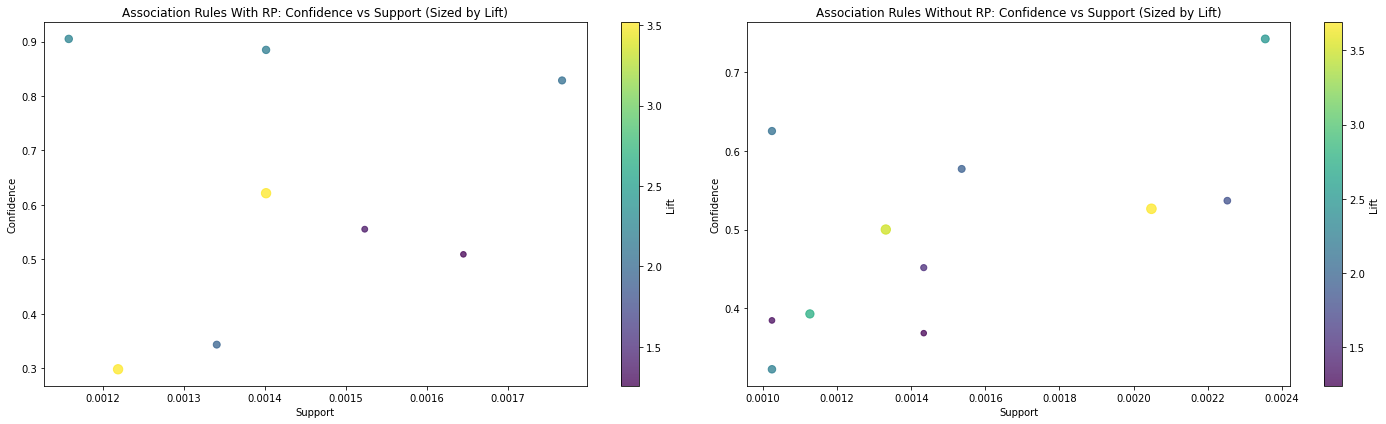

In [97]:
plot_rules(strategy_rules, strategy_noRP)

The scatter plot for associated rules with 'RP' rating has uncertain trends due to the low size of rules and that the distance of the plots vary widely. However, the range of values for the metrics are diverse and the size of the nodes is larger, suggesting high lift.

For associated rules without the 'RP' rating, the scatter plot seems to suggest a relatively positive trend, but it is a bit uncertain due to the size and the distance and variance of the plots. The range of values for the metrics is somewhat diverse, but it is relatively low, specifically for the confidence range where it is between 0.4 and 0.7.

In [98]:
summarize(strategy_rules)

support 
 confidence 
 lift 
 
 
 
 
 count 
 8.000000 
 8.000000 
 8.000000 
 
 
 mean 
 0.001432 
 0.618352 
 2.258142 
 
 
 std 
 0.000206 
 0.236233 
 0.853221 
 
 
 min 
 0.001158 
 0.298507 
 1.257759 
 
 
 25% 
 0.001310 
 0.468013 
 1.799850 
 
 
 50% 
 0.001401 
 0.588589 
 2.114872 
 
 
 75% 
 0.001554 
 0.842582 
 2.553570 
 
 
 max 
 0.001767 
 0.904762 
 3.516731

The summary statistics for associated rules with 'RP' rating are as follows:

- **Support**: The average support is approximately 0.001432, with a minimum of 0.001158 and a maximum of 0.001767. 
  
- **Confidence**: The average confidence is approximately 0.618352, with a minimum of 0.298507 and a maximum of 0.904762. This indicates that for about 62% of the transactions that contain a particular combination of genre and release year, the ESRB rating also applies.
  
- **Lift**: The average lift is approximately 2.258142, with a minimum of 1.257759 and a maximum of 3.516731. A lift greater than 1 suggests a positive association between the genre, release year, and ESRB rating. The maximum lift of 3.516731 indicates a strong positive association for certain combinations.

The strategy genre has a relatively high confidence and lift values suggest that there are significant associations between the genre, release year, and ESRB rating.

In [99]:
summarize(strategy_noRP)

support 
 confidence 
 lift 
 
 
 
 
 count 
 11.000000 
 11.000000 
 11.000000 
 
 
 mean 
 0.001508 
 0.493350 
 2.236252 
 
 
 std 
 0.000496 
 0.125517 
 0.821419 
 
 
 min 
 0.001024 
 0.322581 
 1.238727 
 
 
 25% 
 0.001075 
 0.388736 
 1.661289 
 
 
 50% 
 0.001434 
 0.500000 
 2.101412 
 
 
 75% 
 0.001792 
 0.556754 
 2.624123 
 
 
 max 
 0.002356 
 0.741935 
 3.689122

The summary statistics for associated rules without 'RP' rating are as follows:

- **Support**: The support values range from 0.0010 to 0.0024, with an average of approximately 0.0015.

- **Confidence**: The confidence values range from 0.32 to 0.74, with an average of approximately 0.49. This indicates that the rules for the strategy genre have a moderate level of reliability.

- **Lift**: The lift values range from 1.24 to 3.69, with an average of approximately 2.24. This suggests a strong relationship between the genre and ESRB rating for the strategy genre.

The association rules for the strategy genre excluding RP ratings have a strong relationship between the genre and ESRB rating. However, the moderate level of confidence suggests that the ESRB rating of a game in the strategy genre can be reasonably, but not always, predicted from these rules.

In [100]:
format_rules(strategy_rules)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 1547 
 {'1997', 'Strategy'} => {'RP'} 
 0.904762 
 2.233797 
 0.001158 
 
 
 1552 
 {'1998', 'Strategy'} => {'RP'} 
 0.828571 
 2.045688 
 0.001767 
 
 
 1558 
 {'1999', 'Strategy'} => {'RP'} 
 0.884615 
 2.184056 
 0.001401 
 
 
 1564 
 {'Strategy', '2003'} => {'T'} 
 0.621622 
 3.512890 
 0.001401 
 
 
 1570 
 {'Strategy', '2007'} => {'E10+'} 
 0.298507 
 3.516731 
 0.001219 
 
 
 1582 
 {'Strategy', '2009'} => {'T'} 
 0.343750 
 1.942590 
 0.001341 
 
 
 1588 
 {'2010', 'Strategy'} => {'RP'} 
 0.509434 
 1.257759 
 0.001645 
 
 
 1592 
 {'2011', 'Strategy'} => {'RP'} 
 0.555556 
 1.371630 
 0.001523

Following similar trends, strategy games were likely rated as 'Rating Pending' (RP) in the early 90s and slowly decreasing in confidence approaching the 2000s.

Entering the 2000s, a significant shift occurred. Strategy games began receiving 'Teen' (T) and 'Everyone 10+' (E10+) ratings. The trend towards 'Teen' (T) ratings appeared in 2003, with about 62% of the strategy games released that year receiving this rating. This shift could be indicative of the evolving complexity and thematic maturity of games in the strategy genre, making them more suitable for a teenage audience.

Simultaneously, the percentage of strategy games receiving an 'Everyone 10+' (E10+) rating started to increase, reaching about 30% in 2007. This suggests a segment of the strategy genre catering to a wider audience, possibly featuring less intense themes or content.

Despite these shifts, the 'Rating Pending' (RP) rating remained prevalent in the later years, suggesting that many strategy games were still awaiting their final ESRB ratings. This could be due to the genre's complex and evolving nature, which may require more time to accurately rate.

In [101]:
format_rules(strategy_noRP)

rule 
 confidence 
 lift 
 support 
 
 
 
 
 1198 
 {'2002', 'Strategy'} => {'T'} 
 0.625000 
 2.101412 
 0.001024 
 
 
 1202 
 {'Strategy', '2003'} => {'T'} 
 0.741935 
 2.494579 
 0.002356 
 
 
 1208 
 {'2004', 'Strategy'} => {'T'} 
 0.576923 
 1.939765 
 0.001536 
 
 
 1215 
 {'2006', 'Strategy'} => {'E10+'} 
 0.322581 
 2.261075 
 0.001024 
 
 
 1221 
 {'2006', 'Strategy'} => {'T'} 
 0.451613 
 1.518440 
 0.001434 
 
 
 1226 
 {'Strategy', '2007'} => {'E10+'} 
 0.526316 
 3.689122 
 0.002048 
 
 
 1232 
 {'Strategy', '2007'} => {'T'} 
 0.368421 
 1.238727 
 0.001434 
 
 
 1236 
 {'Strategy', '2008'} => {'E10+'} 
 0.392857 
 2.753666 
 0.001127 
 
 
 1242 
 {'Strategy', '2009'} => {'T'} 
 0.536585 
 1.804139 
 0.002253 
 
 
 1248 
 {'2010', 'Strategy'} => {'E10+'} 
 0.500000 
 3.504666 
 0.001331 
 
 
 1254 
 {'2010', 'Strategy'} => {'T'} 
 0.384615 
 1.293177 
 0.001024

The associated rules for the Strategy genre excluding the 'RP' rating yielded more nuanced rules.

In 2002 and 2003, the most common ESRB rating for strategy games was 'Teen' (T), with a confidence of 0.63 and 0.74 respectively. This suggests that during these years, a significant proportion of strategy games were aimed at a teen audience.

However, this trend shifted in 2006, with the 'Everyone 10+' (E10+) rating becoming more common. The confidence of this rule was around 0.32, suggesting that during this year, about a third of strategy games were suitable for players aged 10 and older. The 'T' rating was still present in 2006, but with a lower confidence of 0.45.

In 2007, both 'E10+' and 'T' ratings were common, with confidences of 0.53 and 0.37 respectively. This indicates that in this year, strategy games were split between being suitable for players aged 10 and older and a teen audience.

In 2008, the 'E10+' rating was the most common with a confidence of 0.39, suggesting that nearly 40% of strategy games were suitable for players aged 10 and older.

In 2009, the 'T' rating returned as the most common rating with a confidence of 0.54, indicating that over half of the strategy games released that year were aimed at a teen audience.

In 2010, both 'E10+' and 'T' ratings were common, with confidences of 0.5 and 0.38 respectively. This suggests that strategy games in this year were evenly split between being suitable for players aged 10 and older and a teen audience.

Over the years,the 'E10+' and 'T' ratings were the most common ESRB ratings for strategy games throughout these years.

# Insights and Conclusion

The comprehensive analysis conducted on the video game sales dataset has revealed significant insights into the dynamics of the video game industry, particularly in relation to the evolution of ESRB ratings across different game genres over time.

During the Exploratory Data Analysis section, some of the exploration involved hypothesis testing.
The first hypothesis testing analysis involved the statistical method Chi-Square test of independence, which was done to examine the relationship between the frequency of each ESRB rating and the year of release. The results provided strong evidence of a statistically significant change in the frequency of each ESRB rating over the years. This was confirmed by the extremely low p-values obtained from the tests, which were far less than the significance level of 0.05. This means that there is a statistically significant change in the frequency of each ESRB rating over the years.

The second hypothesis testing involved another Chi-Square test of independence, which was done to examine the relationship between a game’s ESRB rating and its genre. The results provided strong evidence that a game’s ESRB rating is dependent on its genre. This was confirmed by the extremely low p-value obtained from the test, which was far less than the significance level of 0.05. Furthermore, the Cramer’s V value indicated a strong association between these two variables. This means that there is a statistically significant relationship between a game’s ESRB rating and its genre.

The final part of the analysis involved Association Rule Mining, both including and excluding the 'Rating Pending' (RP) ratings. The results revealed significant associations between the genre, release year, and ESRB rating of video games. Despite the low support values, the rules had high confidence and lift values, suggesting strong associations. The removal of the 'RP' rating provided a more nuanced look at the relationship between the features and its itemset, revealing more confident associations between genre, release year, and ESRB rating.

In response to the research question, *"How have ESRB ratings for video game genres changed or evolved over the years?"*, the analysis provides strong evidence that both the year of release and the genre of a game have a significant impact on its ESRB rating. This finding is crucial as it not only confirms the visual observations made during the exploratory data analysis but also provides a solid statistical basis for understanding the dynamics of the video game industry. 

Given the comprehensive analyses and its result, it can be concluded that the ESRB ratings for video game genres have indeed changed and evolved over the years, and these changes are closely tied to the genre of the game and the year of its release. This trend reflects the shifting societal norms and standards over time, providing a fascinating insight into the evolution of the video game industry. 

The insights gained from this analysis could be invaluable for various stakeholders in the video game industry. For game developers, understanding these trends can guide the development process, helping them create games that align with current rating standards and audience preferences. For publishers, this knowledge can inform their decisions about which games to publish and how to market them effectively. 

For marketers, understanding the evolution of ESRB ratings can help them target their campaigns more effectively, reaching the right audience with the right message. For industry analysts, these insights can contribute to a deeper understanding of the industry's dynamics, informing their analyses and predictions.

Moreover, these insights can also be beneficial for policymakers and regulators in the gaming industry. Understanding the trends in ESRB ratings can help them develop and adjust policies that ensure the appropriateness of game content for different age groups. 

Finally, for gamers and consumers, these insights can provide a historical perspective on the games they play, enriching their understanding and appreciation of the gaming landscape.
